In [149]:
df = pd.read_csv('NY_true.csv', encoding = 'utf-8-sig', index_col = 0)
review_text = df[['review_text']]

def preprocessing_nl(review):
    review = review.apply(lambda x : x.lower())#모두 소문자로 변환
    review = review.apply(lambda row: nltk.word_tokenize(row))#단어 토큰화
    stop_words = stopwords.words('english')
    review = review.apply(lambda x: [word for word in x if word not in (stop_words)])#불용어 제거
    review = review.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) #표제어 추출
    review = review.apply(lambda x: [word for word in x if len(word) > 3]) #길이 3이하 제거
    
    return review

temp = preprocessing_nl(review_text['review_text'])

In [150]:
df['preprocessing'] = temp

In [151]:
df.to_csv('NY_true.csv', encoding = 'utf-8-sig')

In [152]:
df = pd.read_csv('NY_true.csv', encoding = 'utf-8-sig', index_col = 0)
review_text = df[['review_text']]

def preprocessing_nl(review):
    review = review.apply(lambda x : x.lower())#모두 소문자로 변환
    review = review.apply(lambda row: nltk.word_tokenize(row))#단어 토큰화
    stop_words = stopwords.words('english')
    review = review.apply(lambda x: [word for word in x if word not in (stop_words)])#불용어 제거
    review = review.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) #표제어 추출
    review = review.apply(lambda x: [word for word in x if len(word) > 3]) #길이 3이하 제거
    
    return review

temp = preprocessing_nl(review_text['review_text'])

In [153]:
df['preprocessing'] = temp

In [154]:
df.to_csv('NY_true.csv', encoding = 'utf-8-sig')

In [155]:
df = pd.read_csv('NY_fake.csv', encoding = 'utf-8-sig', index_col = 0)
review_text = df[['review_text']]

def preprocessing_nl(review):
    review = review.apply(lambda x : x.lower())#모두 소문자로 변환
    review = review.apply(lambda row: nltk.word_tokenize(row))#단어 토큰화
    stop_words = stopwords.words('english')
    review = review.apply(lambda x: [word for word in x if word not in (stop_words)])#불용어 제거
    review = review.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) #표제어 추출
    review = review.apply(lambda x: [word for word in x if len(word) > 3]) #길이 3이하 제거
    
    return review

temp = preprocessing_nl(review_text['review_text'])

In [156]:
df['preprocessing'] = temp

In [157]:
df.to_csv('NY_fake.csv', encoding = 'utf-8-sig')

In [1]:
import pandas as pd
import re
from textblob import TextBlob
import textstat
from nltk import sent_tokenize, word_tokenize
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
import xgboost as xgb
###
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
####
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from tqdm import tqdm
import time
import contractions
import re, string
from bs4 import BeautifulSoup
from langdetect import detect
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

# topic modeling gensim llibrary
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from gensim.models.coherencemodel import CoherenceModel


In [37]:
freview_LV = pd.read_csv('review_info/LIWC_fc.csv', encoding = 'utf-8-sig')
# review_LV = pd.read_csv('review_info/review_info_LV.csv', encoding = 'utf-8-sig')
# reviewer_LV = pd.read_csv('reviewer_info/reviewer_info_LV_use.csv', encoding = 'utf-8-sig')
# reviewer = pd.read_csv('review_info/review_info_LV.csv', encoding = 'utf-8-sig')
# reviewer.rename(columns = {'rating':'reviewer_rating'}, inplace = True)
# p = pd.merge(review, reviewer, on = ['reviewer_url'])

In [2]:
a = pd.read_csv('use_data/info_NY_LIWC.csv', encoding = 'utf-8-sig', index_col = 0)
b = pd.read_csv('use_data/info_LV_LIWC.csv', encoding = 'utf-8-sig', index_col = 0)


In [16]:
c = pd.read_csv('use_data/fake_review_NY_LIWC.csv', encoding = 'utf-8-sig', index_col = 0)

In [10]:
b.columns = ['review_res', 'review_res_url', 'review_rating', 'review_date',
       'reviewer_url', 'review_text', 'photo', 'location',
       'reputation', 'expereince', 'reviewer_photo', 'fake', 'Segment',
       'WC', 'WPS', 'i', 'we', 'Cognition', 'Affect', 'emotion', 'Social',
       'Perception', 'motion', 'focuspast', 'focuspresent', 'focusfuture']

In [14]:
a.columns = ['review_res', 'review_res_url', 'review_rating', 'review_date',
       'reviewer_url', 'review_text', 'photo', 'location',
       'reputation', 'expereince', 'reviewer_photo', 'Segment',
       'WC', 'WPS', 'i', 'we', 'Cognition', 'Affect', 'emotion', 'Social',
       'Perception', 'motion', 'focuspast', 'focuspresent', 'focusfuture', 'fake']

In [39]:
review_text = p[['review_text']]

def preprocessing_nl(review):
    review = review.apply(lambda x : x.lower())#모두 소문자로 변환
    review = review.apply(lambda row: nltk.word_tokenize(row))#단어 토큰화
    stop_words = stopwords.words('english')
    review = review.apply(lambda x: [word for word in x if word not in (stop_words)])#불용어 제거
    review = review.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) #표제어 추출
    review = review.apply(lambda x: [word for word in x if len(word) > 3]) #길이 3이하 제거
    
    return review

temp = preprocessing_nl(review_text['review_text'])

In [25]:
c.columns = ['Unnamed: 0', 'review_res', 'review_res_url', 'review_rating',
       'review_date', 'reviewer_url', 'location', 'reputation',
       'experience', 'reviewer_photo', 'review_text', 'fake', 'Segment',
       'WC', 'WPS', 'i', 'we', 'Cognition', 'Affect', 'emotion', 'Social',
       'Perception', 'motion', 'focuspast', 'focuspresent', 'focusfuture']

In [37]:
p = pd.concat([p, c], ignore_index = True)

In [27]:
c = c.drop(['Unnamed: 0'], axis = 1)

In [41]:
reviewer_LV.rename(columns = {'url':'reviewer_url'}, inplace = True)

In [47]:
reviewer_LV.drop_duplicates(subset = ['reviewer_url'])

,Unnamed: 0,reviewer_url,name,location,friends,review,photo
0,0,/user_details?userid=FfDVmZKtd0VBXfq5KmAjzA,Roy P.,"Enterprise, NV",16,21,12
1,1,/user_details?userid=hZ5lGKgdrkR_B975WKdlbA,Mike W.,"CA, CA",0,2,0
2,2,/user_details?userid=LS6su7-40ZK2oWzILWw5SQ,Alex B.,NaN,0,3,2
3,3,/user_details?userid=SnAE6T8Ln82zjNoBzgA-RQ,Jhun Amador I.,"Spring Valley, Las Vegas, NV",5,18,9
4,4,/user_details?userid=JvU6e4C0yYMqBdF20V6UNg,John D.,"Las Vegas, NV",0,15,3
...,...,...,...,...,...,...,...
482613,482613,/user_details?userid=jXxDRz-ol7Idz6MLIkqsiw,Christina T.,"Las Vegas, NV",16,45,92
483310,483310,/user_details?userid=ZdJvuIyOaz7ggYpH0uvS_g,Sally S.,"Rocklin, CA",97,84,28
483455,483455,/user_details?userid=vbslMbgZxhPOkwhchUyJyQ,Tracy M.,"Roseville, CA",73,217,39
483954,483954,/user_details?userid=jnDiXchfYG3keRn1IUeONQ,Robert H.,"Rowland Heights, CA",155,226,17


In [74]:
info_LV = info_LV.drop(['name'], axis = 1)

In [96]:
len(info_LV.reviewer_url.unique())# = info_LV.dropna(subset=['reviewer_url'])# = info_LV.drop_duplicates(['review_res_url', 'review_rating', 'review_date', 'review_text','reviewer_url'], keep = 'last', ignore_index = True)# = info_LV.drop_duplicates() #= pd.merge(review_LV, reviewer_LV, on = ['reviewer_url'])
info_LV.to_csv('use_data/info_LV.csv', encoding = 'utf-8-sig')

In [93]:
len(freview_LV.reviewer_url.unique())#.drop_duplicates(subset = ['reviewer_url','review_loca','review_friends', 'reviewer_review', 'reviewer_photo'])

18928

In [121]:
# NY = pd.read_csv('use_data/real_NY.csv', encoding = 'utf-8-sig')
LV1 = pd.read_csv('use_data/real_LV.csv', encoding = 'utf-8-sig')

In [139]:
a

,review_res,review_res_url,review_rating,review_date,reviewer_url,review_text,review_photo,review_loca,review_friends,reviewer_review,...,Affect,emotion,Social,Perception,motion,focuspast,focuspresent,focusfuture,Unnamed: 27,reviewer_loca
0,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,4,2/2/2023,/user_details?userid=BDNreU6L0tubtGqHgWrr1w,Great restaurant with quality meats. Lots of s...,1,"Santa Ana, CA",0,1,...,2.78,0.00,5.56,8.33,0.00,0.00,2.78,5.56,NaN,1
1,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,5,2/15/2023,/user_details?userid=rmCFwpIpOj5m0ibvz5mcpQ,Amazing food. We are former GYU customers and ...,1,"Las Vegas, NV",0,1,...,8.54,2.44,7.32,10.98,4.88,4.88,9.76,0.00,NaN,1
2,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,5,2/7/2023,/user_details?userid=ndsOBBH-XTm7t7DM6PX6Og,One of the best Japanese BBQ restaurants we ha...,2,"Mountain Home Air Force Base, ID",38,1,...,5.36,1.79,7.14,5.36,0.00,12.50,3.57,1.79,NaN,1
3,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,5,3/13/2023,/user_details?userid=SRK_sUnvRmMwfexoL_DLQA,888 Japanese BBQTip - If you are going to eat ...,40,"Scottsdale, AZ",415,1093,...,3.95,1.69,6.21,10.17,4.52,2.82,5.65,3.39,NaN,1
4,Yum Cha,/biz/yum-cha-las-vegas?osq=Restaurants,2,1/3/2022,/user_details?userid=SRK_sUnvRmMwfexoL_DLQA,"Yum ChaDim Sum in Las Vegas, looked up through...",13,"Scottsdale, AZ",415,1093,...,6.08,3.38,4.73,11.49,0.68,6.08,0.68,0.00,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330090,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,7/22/2014,Ernie B.,"Great food at a very affordable price, normall...",0,"Las Vegas, NV",116,51,...,10.81,0.00,5.41,8.11,0.00,2.70,2.70,0.00,NaN,1
330091,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,6/23/2014,Lizzie L.,Good and tasty food! Reasonable price!Good ser...,0,"Las Vegas, NV",27,105,...,33.33,20.00,13.33,6.67,0.00,0.00,0.00,0.00,NaN,1
330092,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,6/6/2014,Mandy W.,"Food is always delicious, friendly service. Lo...",0,"North Las Vegas, NV",1,5,...,30.00,30.00,20.00,10.00,0.00,0.00,10.00,0.00,NaN,1
330093,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,12/30/2012,Ryan Duong D.,Very cheap and nice food. My most favorite res...,0,"Sunnyvale, CA",132,1,...,18.18,0.00,0.00,9.09,0.00,0.00,0.00,0.00,NaN,1


In [128]:
p= pd.read_csv('use_data/LV_fake.csv', encoding = 'utf-8-sig')

In [129]:
p.rename(columns = {'WPS':'text_structure', 'WC':'depth', 'review_friends':'reputation', 'reviewer_review':'experience', 'review_photo':'photo'}, inplace = True)

In [ ]:
fake['reputation'] = fake['fake_reviewer_friends']

In [ ]:
fake['experience'] = fake['fake_reviewer_review']

In [112]:
p[50:80]

,Unnamed: 0,review_res,review_res_url,review_rating,review_date,reviewer_url,review_text,photo,review_loca,reputation,...,we,Cognition,Affect,emotion,Social,Perception,motion,focuspast,focuspresent,focusfuture
50,50,Bouchon,/biz/bouchon-las-vegas-3?osq=Restaurants,4,2/13/2021,/user_details?userid=t1YrELAeIDjS70Y5L3We-Q,Food was cooked very well. You can taste the q...,7,"Rancho Cucamonga, CA",29,...,0.00,7.37,10.53,3.16,3.16,2.11,0.00,8.42,4.21,0.00
51,51,Grand Lux Cafe - The Venetian,/biz/grand-lux-cafe-the-venetian-las-vegas?osq...,4,7/27/2014,/user_details?userid=t1YrELAeIDjS70Y5L3We-Q,"For a 24/7 casino cafe, the food was very good...",2,"Rancho Cucamonga, CA",29,...,0.00,7.81,7.81,4.69,3.13,6.25,1.56,7.81,4.69,0.00
52,52,Gordon Ramsay Steak,/biz/gordon-ramsay-steak-las-vegas-4?osq=Resta...,2,7/26/2014,/user_details?userid=t1YrELAeIDjS70Y5L3We-Q,My husband and I did not like the service. I t...,5,"Rancho Cucamonga, CA",29,...,2.79,9.96,4.38,1.59,9.96,10.36,1.20,12.75,2.39,1.20
53,53,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,5,2/12/2023,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,We tried the Prime Rib tier this go round and ...,8,"Las Vegas, NV",199,...,4.92,8.20,4.92,1.64,6.01,6.56,1.09,4.92,3.28,0.55
54,54,888 Korean BBQ,/biz/888-korean-bbq-las-vegas-2?osq=Restaurants,5,3/30/2019,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,As part deux of wifey's B-Day/V-Day celebratio...,6,"Las Vegas, NV",199,...,0.48,12.92,2.87,0.96,10.53,5.74,0.48,2.87,5.74,1.44
55,55,Hobak Korean BBQ,/biz/hobak-korean-bbq-las-vegas?osq=Restaurants,5,12/27/2022,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,One of the few non-AYCE Korean BBQ spots that'...,1,"Las Vegas, NV",199,...,3.75,6.88,5.63,1.88,11.88,6.88,0.00,3.13,4.38,0.00
56,56,Chubby Cattle,/biz/chubby-cattle-las-vegas-5?osq=Restaurants,5,2/13/2023,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,I've decided to spread out our Valentine dates...,6,"Las Vegas, NV",199,...,6.90,8.46,4.08,1.57,10.97,6.90,2.19,7.21,2.51,0.00
57,57,Tang Together,/biz/tang-together-no-title?osq=Restaurants,5,2/8/2023,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,We've been hoping and looking for a good Korea...,2,"Las Vegas, NV",199,...,4.00,9.33,6.33,3.67,9.67,8.33,1.33,5.67,2.67,0.33
58,58,Fukuburger Chinatown,/biz/fukuburger-chinatown-las-vegas-4?osq=Rest...,4,9/25/2021,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,"I love Fuku Burger's food, no question about i...",5,"Las Vegas, NV",199,...,5.67,8.76,3.09,2.06,15.46,7.73,0.52,9.28,1.55,0.52
59,59,Oodle Noodle,/biz/oodle-noodle-las-vegas-3?osq=Restaurants,5,7/24/2018,/user_details?userid=J4LGq7xYlHDfbfHbwbyK8Q,We've always wanted to try Oodle Noodle but ke...,7,"Las Vegas, NV",199,...,2.17,11.76,4.02,1.55,9.91,10.84,1.86,5.57,2.17,1.24


In [98]:
d = []
k = 1
for i in tqdm(range(0, len(dupli), k)):
    temp = []
    for j in range(i, len(dupli)):
        if dupli['reviewer_url'].iloc[i] == dupli['reviewer_url'].iloc[j]:
            a = dupli.iloc[j]
            temp.append(a)
        else:
            break
    k = len(temp)
    temp = pd.DataFrame(temp, columns= ['reviewer_url', 'name', 'location', 'friends', 'review', 'photo'])
    num = []
    for k in range(len(temp)):
        if k+1 == len(temp):
             break
        elif temp['friends'].iloc[k] > temp['friends'].iloc[k+1]:
            if len(num)==0:
                num.append(temp.iloc[k])
                print(num)
            else:
                num = []
                num.append(temp.iloc[[k]])
            
        elif temp['review'].iloc[k] > temp['friends'].iloc[k+1]:
            if len(num)==0:
                num.append(temp.iloc[[k]])
            else:
                num = []
                num.append(temp.iloc[[k]])
        elif temp['photo'].iloc[k] > temp['friends'].iloc[k+1]:
            if len(num)==0:
                num.append(temp.iloc[[k]])
            else:
                num = []
                num.append(temp.iloc[[k]])
        else:
            if len(num)==0:
                num.append(temp.iloc[[k]])
            else:
                num = []
                num.append(temp.iloc[[k]])
             
    d.append(num)
            

  0%|                                                                            | 172/115676 [00:00<08:58, 214.69it/s]

[reviewer_url    /user_details?userid=gouslNcYNpgBib9GBLVpcw
name                                             Johanna T.
location                                       New York, NY
friends                                               471.0
review                                                305.0
photo                                                  76.0
Name: 121, dtype: object]
[reviewer_url    /user_details?userid=gouslNcYNpgBib9GBLVpcw
name                                             Johanna T.
location                                       New York, NY
friends                                               472.0
review                                                305.0
photo                                                  76.0
Name: 123, dtype: object]
[reviewer_url    /user_details?userid=LukDAvdJiVVibsb8A43JoA
name                                            Kimberly T.
location                               Huntington Beach, CA
friends                                      

  0%|▏                                                                           | 217/115676 [00:01<09:27, 203.55it/s]

[reviewer_url    /user_details?userid=mgytZAasaiBf-END4aZD9w
name                                                 Cat N.
location                               Huntington Beach, CA
friends                                              5000.0
review                                               2018.0
photo                                               11566.0
Name: 189, dtype: object]
[reviewer_url    /user_details?userid=mgytZAasaiBf-END4aZD9w
name                                                 Cat N.
location                               Huntington Beach, CA
friends                                              5000.0
review                                               2018.0
photo                                               11566.0
Name: 195, dtype: object]
[reviewer_url    /user_details?userid=zhkRDqBzx1n4US_YVH4hoA
name                                              Jubell T.
location                                  Santa Clarita, CA
friends                                      

  0%|▏                                                                           | 310/115676 [00:01<09:55, 193.77it/s]

[reviewer_url    /user_details?userid=EpIkXeN4GCLOvFmz-3mywg
name                                               Henry T.
location                                        Burbank, CA
friends                                                36.0
review                                                239.0
photo                                                 189.0
Name: 260, dtype: object]
[reviewer_url    /user_details?userid=iR54aSd1mCRvdnr84t_VRA
name                                     Judy "JUDYBEAR" V.
location                                       San Jose, CA
friends                                               446.0
review                                                669.0
photo                                                4889.0
Name: 291, dtype: object]


  0%|▏                                                                           | 373/115676 [00:01<08:06, 237.15it/s]

[reviewer_url    /user_details?userid=JFsSRKubPALtOnR_nSmI8A
name                                             Breanna L.
location                                      Las Vegas, NV
friends                                               301.0
review                                                139.0
photo                                                 179.0
Name: 349, dtype: object]
[reviewer_url    /user_details?userid=JFsSRKubPALtOnR_nSmI8A
name                                             Breanna L.
location                                      Las Vegas, NV
friends                                               301.0
review                                                139.0
photo                                                 179.0
Name: 354, dtype: object]


  0%|▎                                                                           | 470/115676 [00:02<08:48, 218.13it/s]

[reviewer_url    /user_details?userid=GkyBwCMnuT6w1gnnyBaujA
name                          Sanhsany Aka Sunny "Sunny" S.
location                                      Las Vegas, NV
friends                                               506.0
review                                                 91.0
photo                                                 883.0
Name: 399, dtype: object]
[reviewer_url    /user_details?userid=GkyBwCMnuT6w1gnnyBaujA
name                          Sanhsany Aka Sunny "Sunny" S.
location                                      Las Vegas, NV
friends                                               510.0
review                                                 93.0
photo                                                 914.0
Name: 401, dtype: object]
[reviewer_url    /user_details?userid=TxsBmDe_R6DOvgrDPmNV0Q
name                                             La Toya L.
location                                      Las Vegas, NV
friends                                      

  0%|▎                                                                           | 513/115676 [00:02<10:44, 178.55it/s]

[reviewer_url    /user_details?userid=wV4uhvJGok8nOR56Ex5mAg
name                    Grace "Desserts with Every Meal" C.
location                                       Monrovia, CA
friends                                               411.0
review                                               1365.0
photo                                                1997.0
Name: 484, dtype: object]
[reviewer_url    /user_details?userid=wV4uhvJGok8nOR56Ex5mAg
name                    Grace "Desserts with Every Meal" C.
location                                       Monrovia, CA
friends                                               411.0
review                                               1365.0
photo                                                1997.0
Name: 494, dtype: object]
[reviewer_url    /user_details?userid=wV4uhvJGok8nOR56Ex5mAg
name                    Grace "Desserts with Every Meal" C.
location                                       Monrovia, CA
friends                                      

  1%|▍                                                                           | 586/115676 [00:03<14:39, 130.81it/s]

[reviewer_url    /user_details?userid=_VMGbmIeK71rQGwOBWt_Kg
name                        Chris "San Jose Left Sharks" V.
location                                      Henderson, NV
friends                                               975.0
review                                               1414.0
photo                                               10766.0
Name: 542, dtype: object]
[reviewer_url    /user_details?userid=_VMGbmIeK71rQGwOBWt_Kg
name                        Chris "San Jose Left Sharks" V.
location                                      Henderson, NV
friends                                               975.0
review                                               1413.0
photo                                               10761.0
Name: 552, dtype: object]
[reviewer_url    /user_details?userid=_VMGbmIeK71rQGwOBWt_Kg
name                        Chris "San Jose Left Sharks" V.
location                                      Henderson, NV
friends                                      

  1%|▍                                                                           | 670/115676 [00:04<17:40, 108.42it/s]

[reviewer_url    /user_details?userid=ZfDkm8pFjjnN6za5Nh4Rsw
name                                              Martha L.
location                                      Las Vegas, NV
friends                                               100.0
review                                                 62.0
photo                                                 471.0
Name: 626, dtype: object]
[reviewer_url    /user_details?userid=ZfDkm8pFjjnN6za5Nh4Rsw
name                                              Martha L.
location                                      Las Vegas, NV
friends                                               100.0
review                                                 63.0
photo                                                 476.0
Name: 629, dtype: object]


  1%|▍                                                                           | 685/115676 [00:04<17:18, 110.72it/s]

[reviewer_url    /user_details?userid=_kqz6I6UQnJF3e2pphRrxA
name                                               April E.
location                                      Las Vegas, NV
friends                                                41.0
review                                                102.0
photo                                                 253.0
Name: 683, dtype: object]


  1%|▍                                                                           | 749/115676 [00:05<15:43, 121.83it/s]

[reviewer_url    /user_details?userid=B1829_hxXSEpDPEDJtYeIw
name              Jin "I'm on the keto + high carb diet" N.
location                                      Las Vegas, NV
friends                                               452.0
review                                               1316.0
photo                                                2241.0
Name: 720, dtype: object]
[reviewer_url    /user_details?userid=qtOCfMTrozmUSHWIcohc6Q
name                                                 Mae B.
location                                      Las Vegas, NV
friends                                               334.0
review                                                202.0
photo                                                3426.0
Name: 753, dtype: object]
[reviewer_url    /user_details?userid=qtOCfMTrozmUSHWIcohc6Q
name                                                 Mae B.
location                                      Las Vegas, NV
friends                                      

  1%|▌                                                                           | 792/115676 [00:05<14:41, 130.40it/s]


[reviewer_url    /user_details?userid=9-YU-svmnMfKs_DkcZc0Tg
name                                               Jesus D.
location                                     Montgomery, TX
friends                                               108.0
review                                                209.0
photo                                                1226.0
Name: 777, dtype: object]
[reviewer_url    /user_details?userid=9-YU-svmnMfKs_DkcZc0Tg
name                                               Jesus D.
location                                     Montgomery, TX
friends                                               108.0
review                                                209.0
photo                                                1234.0
Name: 779, dtype: object]
[reviewer_url    /user_details?userid=9-YU-svmnMfKs_DkcZc0Tg
name                                               Jesus D.
location                                     Montgomery, TX
friends                                     

  1%|▌                                                                           | 832/115676 [00:05<15:33, 123.06it/s]

[reviewer_url    /user_details?userid=kC2Ul6DYmRYnO2ntbHpvGg
name                                            Michelle S.
location                                      Las Vegas, NV
friends                                                13.0
review                                                 48.0
photo                                                 172.0
Name: 793, dtype: object]
[reviewer_url    /user_details?userid=0911xXCgLexupPGkDJusLQ
name                                             Monique W.
location                                      Las Vegas, NV
friends                                              2463.0
review                                               1218.0
photo                                                7432.0
Name: 828, dtype: object]
[reviewer_url    /user_details?userid=0911xXCgLexupPGkDJusLQ
name                                             Monique W.
location                                      Las Vegas, NV
friends                                      

  1%|▌                                                                           | 865/115676 [00:06<18:23, 104.01it/s]


[reviewer_url    /user_details?userid=0911xXCgLexupPGkDJusLQ
name                                             Monique W.
location                                      Las Vegas, NV
friends                                              2472.0
review                                               1218.0
photo                                                7432.0
Name: 845, dtype: object]
[reviewer_url    /user_details?userid=0911xXCgLexupPGkDJusLQ
name                                             Monique W.
location                                      Las Vegas, NV
friends                                              2474.0
review                                               1218.0
photo                                                7432.0
Name: 848, dtype: object]
[reviewer_url    /user_details?userid=0911xXCgLexupPGkDJusLQ
name                                             Monique W.
location                                      Las Vegas, NV
friends                                     

  1%|▌                                                                            | 905/115676 [00:06<20:59, 91.10it/s]

[reviewer_url    /user_details?userid=l8N9a8BG2G1PHazbieOqng
name                                               Rolly T.
location                                      Las Vegas, NV
friends                                               454.0
review                                                566.0
photo                                                7205.0
Name: 885, dtype: object]
[reviewer_url    /user_details?userid=l8N9a8BG2G1PHazbieOqng
name                                               Rolly T.
location                                      Las Vegas, NV
friends                                               454.0
review                                                568.0
photo                                                7228.0
Name: 887, dtype: object]
[reviewer_url    /user_details?userid=l8N9a8BG2G1PHazbieOqng
name                                               Rolly T.
location                                      Las Vegas, NV
friends                                      

  1%|▋                                                                           | 978/115676 [00:07<12:04, 158.23it/s]

[reviewer_url    /user_details?userid=pfFPmmeYD4u15k9FoNHMCQ
name                                                 Jen C.
location                                      Las Vegas, NV
friends                                               178.0
review                                                570.0
photo                                                1265.0
Name: 924, dtype: object]


  1%|▋                                                                          | 1019/115676 [00:07<10:47, 177.09it/s]

[reviewer_url    /user_details?userid=UtUy4oOu92zOahLQAO34eQ
name                                                Rose C.
location                                      Las Vegas, NV
friends                                               207.0
review                                                126.0
photo                                                 290.0
Name: 992, dtype: object]
[reviewer_url         /user_details?userid=_hTace_9MbAghCLYRg2hjA
name            Khoa "KETO Khoa! The food and travel critic!" D.
location                                         Los Angeles, CA
friends                                                    157.0
review                                                     152.0
photo                                                      480.0
Name: 1011, dtype: object]


  1%|▋                                                                          | 1087/115676 [00:07<12:11, 156.64it/s]

[reviewer_url    /user_details?userid=3nDUQBjKyVor5wV0reJChg
name                                       Nelson "Mr.Q" Q.
location                                      Las Vegas, NV
friends                                              2941.0
review                                               1569.0
photo                                               37177.0
Name: 1042, dtype: object]
[reviewer_url    /user_details?userid=Zm2rOksCSgNK_o0U1Vt-qQ
name                                                 Mia G.
location                                      Las Vegas, NV
friends                                               190.0
review                                                152.0
photo                                                 228.0
Name: 1048, dtype: object]
[reviewer_url    /user_details?userid=lZiqaMOH-thX0t48mT0Qug
name                                         Jason "Ohh" Y.
location                                         Irvine, CA
friends                                    

  1%|▋                                                                          | 1140/115676 [00:08<12:28, 152.92it/s]

[reviewer_url    /user_details?userid=lZiqaMOH-thX0t48mT0Qug
name                                         Jason "Ohh" Y.
location                                         Irvine, CA
friends                                               442.0
review                                                469.0
photo                                                 195.0
Name: 1087, dtype: object]
[reviewer_url    /user_details?userid=tXoJxIcIGlEPmcSs_v-Oog
name                                       Jeri "Paypay" F.
location                                      Las Vegas, NV
friends                                                98.0
review                                                121.0
photo                                                 278.0
Name: 1107, dtype: object]
[reviewer_url    /user_details?userid=tXoJxIcIGlEPmcSs_v-Oog
name                                       Jeri "Paypay" F.
location                                      Las Vegas, NV
friends                                    

  1%|▊                                                                           | 1249/115676 [00:09<21:35, 88.30it/s]

[reviewer_url    /user_details?userid=OIa6ptM1qUts5arovQUAFQ
name                                                Eric B.
location                                      Las Vegas, NV
friends                                               182.0
review                                                543.0
photo                                                3113.0
Name: 1209, dtype: object]


  1%|▊                                                                          | 1313/115676 [00:09<15:54, 119.84it/s]

[reviewer_url    /user_details?userid=np_PA4ejejVhk4klYvnMDA
name                                   Dang "Team Wrong" N.
location                               Huntington Beach, CA
friends                                               299.0
review                                               1824.0
photo                                                 358.0
Name: 1270, dtype: object]
[reviewer_url          /user_details?userid=QCtHk02W_Asu2LFfdmGQDA
name            Chris "Memories of Beautiful Mistakes & Lost S...
location                                            Las Vegas, NV
friends                                                    1152.0
review                                                      509.0
photo                                                      2148.0
Name: 1300, dtype: object]
[reviewer_url          /user_details?userid=QCtHk02W_Asu2LFfdmGQDA
name            Chris "Memories of Beautiful Mistakes & Lost S...
location                                            Las

  1%|▉                                                                          | 1385/115676 [00:10<16:05, 118.42it/s]

[reviewer_url    /user_details?userid=wxQCLMnuVYbdtmQCc2ryZg
name                                Geselle "lolgeselle" R.
location                                      Henderson, NV
friends                                              1620.0
review                                                725.0
photo                                               14795.0
Name: 1334, dtype: object]
[reviewer_url    /user_details?userid=wxQCLMnuVYbdtmQCc2ryZg
name                                Geselle "lolgeselle" R.
location                                      Henderson, NV
friends                                              1620.0
review                                                725.0
photo                                               14799.0
Name: 1340, dtype: object]
[reviewer_url    /user_details?userid=wxQCLMnuVYbdtmQCc2ryZg
name                                Geselle "lolgeselle" R.
location                                      Henderson, NV
friends                                    

  1%|▉                                                                          | 1431/115676 [00:10<14:37, 130.14it/s]

[reviewer_url    /user_details?userid=NrpzAH3EoNhWUR8OysUhBQ
name                                        Mary "Ninja" W.
location                                      Las Vegas, NV
friends                                              1003.0
review                                                516.0
photo                                                2202.0
Name: 1395, dtype: object]
[reviewer_url    /user_details?userid=NrpzAH3EoNhWUR8OysUhBQ
name                                        Mary "Ninja" W.
location                                      Las Vegas, NV
friends                                              1003.0
review                                                516.0
photo                                                2210.0
Name: 1401, dtype: object]


  1%|▉                                                                          | 1488/115676 [00:11<18:37, 102.17it/s]

[reviewer_url    /user_details?userid=wwAfMjITOu4jL6XnhTBmIQ
name                  Will "mounstrín. (little monster)" E.
location                                      Las Vegas, NV
friends                                               295.0
review                                                263.0
photo                                                1400.0
Name: 1447, dtype: object]
[reviewer_url    /user_details?userid=wwAfMjITOu4jL6XnhTBmIQ
name                  Will "mounstrín. (little monster)" E.
location                                      Las Vegas, NV
friends                                               295.0
review                                                263.0
photo                                                1400.0
Name: 1450, dtype: object]


  1%|▉                                                                          | 1520/115676 [00:11<15:27, 123.12it/s]

[reviewer_url    /user_details?userid=46-qsKjqR4vptCIYrHH1yw
name                                              Annika R.
location                                      Las Vegas, NV
friends                                               570.0
review                                                201.0
photo                                                1114.0
Name: 1500, dtype: object]
[reviewer_url    /user_details?userid=46-qsKjqR4vptCIYrHH1yw
name                                              Annika R.
location                                      Las Vegas, NV
friends                                               570.0
review                                                201.0
photo                                                1114.0
Name: 1504, dtype: object]
[reviewer_url    /user_details?userid=QPbXBYWCSmw6-NhVWteaWA
name                                            Angelica M.
location                                      Las Vegas, NV
friends                                    

  1%|█                                                                          | 1588/115676 [00:11<11:59, 158.63it/s]

[reviewer_url    /user_details?userid=zL4bcVvYN8QmVTt8PiWsoQ
name                                 Derek "DuhRiceHero" T.
location                                      Las Vegas, NV
friends                                               969.0
review                                                 83.0
photo                                                 152.0
Name: 1556, dtype: object]
[reviewer_url    /user_details?userid=zL4bcVvYN8QmVTt8PiWsoQ
name                                 Derek "DuhRiceHero" T.
location                                      Las Vegas, NV
friends                                               969.0
review                                                 83.0
photo                                                 152.0
Name: 1558, dtype: object]


  1%|█                                                                          | 1688/115676 [00:12<11:08, 170.39it/s]

[reviewer_url    /user_details?userid=zsJLk34mTDMyuVS_EaBLxw
name                                                Jane M.
location                                      Las Vegas, NV
friends                                                84.0
review                                                443.0
photo                                                2438.0
Name: 1642, dtype: object]
[reviewer_url    /user_details?userid=zsJLk34mTDMyuVS_EaBLxw
name                                                Jane M.
location                                      Las Vegas, NV
friends                                                84.0
review                                                443.0
photo                                                2438.0
Name: 1649, dtype: object]
[reviewer_url    /user_details?userid=zsJLk34mTDMyuVS_EaBLxw
name                                                Jane M.
location                                      Las Vegas, NV
friends                                    

  2%|█▏                                                                         | 1737/115676 [00:12<15:09, 125.24it/s]

[reviewer_url    /user_details?userid=GrG9RjzmTXiVXsA81d_wYA
name                                                 Roy T.
location                                       San Jose, CA
friends                                                 3.0
review                                                191.0
photo                                                  65.0
Name: 1709, dtype: object]
[reviewer_url    /user_details?userid=TGSi0e7-ovol_PBIQgodOg
name                        Greyson "Sweet Tooth Sleuth" N.
location                                      Las Vegas, NV
friends                                               242.0
review                                                553.0
photo                                                3550.0
Name: 1739, dtype: object]

  2%|█▏                                                                         | 1793/115676 [00:13<12:58, 146.27it/s]

  2%|█▏                                                                         | 1874/115676 [00:13<12:04, 157.18it/s]

[reviewer_url    /user_details?userid=SGlB4O-RtNlUIXJQBVf29Q
name                                               Tasha N.
location                                      Las Vegas, NV
friends                                               791.0
review                                                242.0
photo                                                  71.0
Name: 1818, dtype: object]
[reviewer_url    /user_details?userid=SGlB4O-RtNlUIXJQBVf29Q
name                                               Tasha N.
location                                      Las Vegas, NV
friends                                               791.0
review                                                242.0
photo                                                  71.0
Name: 1824, dtype: object]
[reviewer_url    /user_details?userid=SGlB4O-RtNlUIXJQBVf29Q
name                                               Tasha N.
location                                      Las Vegas, NV
friends                                    

  2%|█▎                                                                         | 1946/115676 [00:14<09:25, 201.09it/s]

[reviewer_url    /user_details?userid=5ArMzPUBncPqDrB7PmZBCg
name                                             Leticia P.
location                                      Las Vegas, NV
friends                                               186.0
review                                                301.0
photo                                                1424.0
Name: 1874, dtype: object]


  2%|█▎                                                                         | 1991/115676 [00:14<10:29, 180.54it/s]

[reviewer_url    /user_details?userid=PiAez4G8xCXfkoXqUDdS6w
name                                              Mahrad M.
location                                  Redondo Beach, CA
friends                                               446.0
review                                                180.0
photo                                                 595.0
Name: 1966, dtype: object]


  2%|█▍                                                                         | 2127/115676 [00:15<16:00, 118.28it/s]

[reviewer_url    /user_details?userid=FLZVbNL6gLji3ghze303Fg
name                                               Kelly C.
location                                      Las Vegas, NV
friends                                                51.0
review                                                294.0
photo                                                 292.0
Name: 2082, dtype: object]
[reviewer_url    /user_details?userid=FLZVbNL6gLji3ghze303Fg
name                                               Kelly C.
location                                      Las Vegas, NV
friends                                                51.0
review                                                294.0
photo                                                 292.0
Name: 2086, dtype: object]
[reviewer_url    /user_details?userid=FLZVbNL6gLji3ghze303Fg
name                                               Kelly C.
location                                      Las Vegas, NV
friends                                    

  2%|█▍                                                                         | 2185/115676 [00:15<11:49, 159.91it/s]

[reviewer_url    /user_details?userid=WPcEBAbrPZxvCGlvH9XLsQ
name                                               Sarah A.
location                           Southwest, Las Vegas, NV
friends                                               136.0
review                                                160.0
photo                                                 310.0
Name: 2144, dtype: object]
[reviewer_url    /user_details?userid=yqalu0DaW5gH5UU8UHsHyA
name                                      Peggy "Syrena" C.
location                                      Las Vegas, NV
friends                                               871.0
review                                                217.0
photo                                                 624.0
Name: 2157, dtype: object]


  2%|█▍                                                                         | 2264/115676 [00:16<10:49, 174.75it/s]

[reviewer_url    /user_details?userid=LjVk0FjIsERqmjfJQR48zg
name                                               Terry J.
location                                      Las Vegas, NV
friends                                               197.0
review                                                112.0
photo                                                 424.0
Name: 2222, dtype: object]
[reviewer_url    /user_details?userid=LjVk0FjIsERqmjfJQR48zg
name                                               Terry J.
location                                      Las Vegas, NV
friends                                               197.0
review                                                112.0
photo                                                 424.0
Name: 2226, dtype: object]
[reviewer_url    /user_details?userid=7FGaox4G5LG361eZkx4o_Q
name                                           Stephanie A.
location                                North Las Vegas, NV
friends                                    

  2%|█▍                                                                         | 2312/115676 [00:16<17:02, 110.89it/s]

[reviewer_url    /user_details?userid=7FGaox4G5LG361eZkx4o_Q
name                                           Stephanie A.
location                                North Las Vegas, NV
friends                                               242.0
review                                                298.0
photo                                                1276.0
Name: 2264, dtype: object]
[reviewer_url    /user_details?userid=7FGaox4G5LG361eZkx4o_Q
name                                           Stephanie A.
location                                North Las Vegas, NV
friends                                               242.0
review                                                297.0
photo                                                1275.0
Name: 2267, dtype: object]
[reviewer_url    /user_details?userid=ewtoMdU18BDfoEnRsQ8QiA
name                                                 Jay ..
location                                      Las Vegas, NV
friends                                    

  2%|█▌                                                                          | 2370/115676 [00:17<23:43, 79.61it/s]

[reviewer_url    /user_details?userid=AFNmXav79eOXttbfiYc-rg
name                                                  Vi P.
location                                North Las Vegas, NV
friends                                               490.0
review                                                135.0
photo                                                  17.0
Name: 2347, dtype: object]
[reviewer_url    /user_details?userid=Mfmx6DSGOrJjr4jeWmqCuw
name                     Courtney "@No Passports Needed" M.
location                                      Las Vegas, NV
friends                                              2280.0
review                                               1386.0
photo                                               15463.0
Name: 2368, dtype: object]


  2%|█▌                                                                          | 2394/115676 [00:17<22:41, 83.20it/s]

[reviewer_url    /user_details?userid=Mfmx6DSGOrJjr4jeWmqCuw
name                     Courtney "@No Passports Needed" M.
location                                      Las Vegas, NV
friends                                              2280.0
review                                               1386.0
photo                                               15463.0
Name: 2378, dtype: object]
[reviewer_url    /user_details?userid=Mfmx6DSGOrJjr4jeWmqCuw
name                     Courtney "@No Passports Needed" M.
location                                      Las Vegas, NV
friends                                              2284.0
review                                               1386.0
photo                                               15524.0
Name: 2384, dtype: object]
[reviewer_url    /user_details?userid=Mfmx6DSGOrJjr4jeWmqCuw
name                     Courtney "@No Passports Needed" M.
location                                      Las Vegas, NV
friends                                    

  2%|█▌                                                                         | 2459/115676 [00:18<14:58, 125.95it/s]

[reviewer_url    /user_details?userid=8rYnOC6IU_A_f-o73aDt9g
name                                               Diana L.
location                                      Las Vegas, NV
friends                                                84.0
review                                                342.0
photo                                                 662.0
Name: 2419, dtype: object]
[reviewer_url    /user_details?userid=8rYnOC6IU_A_f-o73aDt9g
name                                               Diana L.
location                                      Las Vegas, NV
friends                                                84.0
review                                                343.0
photo                                                 662.0
Name: 2423, dtype: object]
[reviewer_url    /user_details?userid=7AKWPQLa4QxKOVE_FBRtUA
name                                      Lea "VegasMom" H.
location                                      Las Vegas, NV
friends                                    

  2%|█▌                                                                         | 2490/115676 [00:18<15:56, 118.36it/s]

[reviewer_url    /user_details?userid=7AKWPQLa4QxKOVE_FBRtUA
name                                      Lea "VegasMom" H.
location                                      Las Vegas, NV
friends                                               376.0
review                                                280.0
photo                                                 318.0
Name: 2465, dtype: object]
[reviewer_url    /user_details?userid=6WaFlZxILBkPG3bmGICcRg
name                                               Bruce G.
location                                      Las Vegas, NV
friends                                                89.0
review                                                113.0
photo                                                  87.0
Name: 2515, dtype: object]


  2%|█▋                                                                         | 2618/115676 [00:19<10:16, 183.28it/s]

[reviewer_url    /user_details?userid=ro8A7lv5nkJDl7j0rh78Gw
name                                                  Bo K.
location                                      San Diego, CA
friends                                               218.0
review                                                268.0
photo                                                 834.0
Name: 2562, dtype: object]
[reviewer_url    /user_details?userid=ro8A7lv5nkJDl7j0rh78Gw
name                                                  Bo K.
location                                      San Diego, CA
friends                                               218.0
review                                                268.0
photo                                                 834.0
Name: 2564, dtype: object]


  2%|█▋                                                                         | 2671/115676 [00:19<12:45, 147.69it/s]

[reviewer_url    /user_details?userid=yPVnXy6Zf3LefjcbjOABDQ
name                                             Cecille L.
location                                      Las Vegas, NV
friends                                               249.0
review                                                440.0
photo                                                 550.0
Name: 2645, dtype: object]
[reviewer_url    /user_details?userid=yPVnXy6Zf3LefjcbjOABDQ
name                                             Cecille L.
location                                      Las Vegas, NV
friends                                               250.0
review                                                446.0
photo                                                 563.0
Name: 2648, dtype: object]
[reviewer_url    /user_details?userid=8WBl95I34hGMxkmngjVDuQ
name                                 Marian "Mariannerz" S.
location                                      Las Vegas, NV
friends                                    

  2%|█▊                                                                         | 2797/115676 [00:20<10:11, 184.51it/s]

[reviewer_url    /user_details?userid=WFhdxaVsZW72kzCpn23yuQ
name                                                  Mi V.
location                                      Las Vegas, NV
friends                                                40.0
review                                                 82.0
photo                                                 213.0
Name: 2750, dtype: object]


  3%|█▉                                                                         | 2939/115676 [00:20<08:45, 214.53it/s]

[reviewer_url    /user_details?userid=ltS_sPLR-k5ei3i2INauhg
name                                     Hyundong "Dave" K.
location                                      Las Vegas, NV
friends                                                79.0
review                                                 27.0
photo                                                  57.0
Name: 2919, dtype: object]
[reviewer_url    /user_details?userid=HRyFtrmf19GTKEM_kOa2pg
name                                     EJay "RICO act" D.
location                                      Las Vegas, NV
friends                                                77.0
review                                                392.0
photo                                                  37.0
Name: 2940, dtype: object]
[reviewer_url    /user_details?userid=HRyFtrmf19GTKEM_kOa2pg
name                                     EJay "RICO act" D.
location                                      Las Vegas, NV
friends                                    

  3%|█▉                                                                         | 3024/115676 [00:21<15:02, 124.77it/s]

[reviewer_url    /user_details?userid=7DmUbNOJgTMYOX_Ap_Ja_w
name                    Vi "insert something witty here" Y.
location                                      Las Vegas, NV
friends                                               519.0
review                                               2001.0
photo                                                 612.0
Name: 2977, dtype: object]


  3%|██                                                                         | 3175/115676 [00:22<09:20, 200.77it/s]

[reviewer_url    /user_details?userid=fZLsAqgUsFflVHwW_1cuTQ
name                                         Trang "Kim" Q.
location                                      Henderson, NV
friends                                               201.0
review                                                360.0
photo                                                 326.0
Name: 3135, dtype: object]


  3%|██▏                                                                        | 3329/115676 [00:23<09:16, 201.92it/s]

[reviewer_url    /user_details?userid=qb-8RrNbVj-3WkXYuxpi3w
name                Jenny "Eater, Eater, Chicken Dinner" W.
location                                      Las Vegas, NV
friends                                               470.0
review                                                147.0
photo                                                 152.0
Name: 3279, dtype: object]


  3%|██▏                                                                        | 3407/115676 [00:24<08:42, 214.79it/s]

[reviewer_url    /user_details?userid=m41620Bk0VZT9Fj8vP3pdw
name                                             Patrick W.
location                            San Fernando Valley, CA
friends                                                46.0
review                                                319.0
photo                                                 668.0
Name: 3353, dtype: object]


  3%|██▎                                                                        | 3499/115676 [00:24<07:28, 250.30it/s]

[reviewer_url    /user_details?userid=F2wXZgI2UsSFokTiWIiU1g
name                                           Christina M.
location                                    Los Angeles, CA
friends                                               840.0
review                                                 74.0
photo                                                 100.0
Name: 3428, dtype: object]
[reviewer_url    /user_details?userid=6I4fXdYdnw0SmV7wtYdf7g
name                               Sinead "sineadsecret" c.
location                                  San Francisco, CA
friends                                                31.0
review                                                 61.0
photo                                                 184.0
Name: 3484, dtype: object]


  3%|██▎                                                                        | 3553/115676 [00:24<07:32, 247.52it/s]

[reviewer_url    /user_details?userid=lWEUZl4dqQ1SdC2tKcZ69Q
name                                                Tony T.
location                                      Las Vegas, NV
friends                                                 4.0
review                                                 19.0
photo                                                  44.0
Name: 3517, dtype: object]
[reviewer_url    /user_details?userid=MHiKdBFx4McRQONnuMbByw
name                                             Melissa M.
location                                North Las Vegas, NV
friends                                                40.0
review                                                 41.0
photo                                                  52.0
Name: 3543, dtype: object]
[reviewer_url    /user_details?userid=MHiKdBFx4McRQONnuMbByw
name                                             Melissa M.
location                                North Las Vegas, NV
friends                                    

  3%|██▎                                                                        | 3633/115676 [00:25<09:27, 197.36it/s]

[reviewer_url    /user_details?userid=rSZhh3j6hs9zcsMj7aZQKg
name                                               Aimee K.
location                                      Las Vegas, NV
friends                                               582.0
review                                                140.0
photo                                                  23.0
Name: 3575, dtype: object]


  4%|██▊                                                                        | 4295/115676 [00:28<06:31, 284.46it/s]

[reviewer_url    /user_details?userid=V9QpeWbOgHivXES7v9gpnw
name                                              Krista C.
location                                  Coral Springs, FL
friends                                                73.0
review                                                137.0
photo                                                 675.0
Name: 4292, dtype: object]


  4%|██▊                                                                        | 4369/115676 [00:28<11:54, 155.85it/s]

[reviewer_url    /user_details?userid=yefrejDWV_FQGNnurZaVVg
name                                              Au'Jah W.
location                                         Newark, NJ
friends                                                23.0
review                                                100.0
photo                                                 187.0
Name: 4326, dtype: object]
[reviewer_url    /user_details?userid=zFYs8gSUYDvXkb6O7YkRkw
name                                  Joyce "#GucciBang" W.
location                                        Phoenix, AZ
friends                                              4991.0
review                                               1249.0
photo                                                6496.0
Name: 4331, dtype: object]
[reviewer_url    /user_details?userid=zFYs8gSUYDvXkb6O7YkRkw
name                                  Joyce "#GucciJWow" W.
location                                        Phoenix, AZ
friends                                    

  4%|██▉                                                                        | 4467/115676 [00:29<08:35, 215.54it/s]

[reviewer_url    /user_details?userid=G5FCjQJVAwClrNhEch6gQQ
name                                      Jeanette "Jen" L.
location                                      Las Vegas, NV
friends                                               618.0
review                                                321.0
photo                                                 526.0
Name: 4391, dtype: object]
[reviewer_url    /user_details?userid=G5FCjQJVAwClrNhEch6gQQ
name                                      Jeanette "Jen" L.
location                                      Las Vegas, NV
friends                                               618.0
review                                                321.0
photo                                                 526.0
Name: 4394, dtype: object]
[reviewer_url    /user_details?userid=G5FCjQJVAwClrNhEch6gQQ
name                                      Jeanette "Jen" L.
location                                      Las Vegas, NV
friends                                    

  4%|██▉                                                                        | 4561/115676 [00:29<06:45, 273.81it/s]

[reviewer_url    /user_details?userid=EcHwiEc4OeNXQBPWwJBFPQ
name                                       Tay "Tay Tay" N.
location                                  Thousand Oaks, CA
friends                                                62.0
review                                                 99.0
photo                                                 306.0
Name: 4475, dtype: object]
[reviewer_url    /user_details?userid=SZEY3EfGLvYu-eRF-lZPoA
name                                               Cindy H.
location                                  Monterey Park, CA
friends                                               219.0
review                                                605.0
photo                                                2142.0
Name: 4484, dtype: object]
[reviewer_url    /user_details?userid=yIXLkXiXdP7EvdLDKB3cxg
name                                               Nancy H.
location                                         Boston, MA
friends                                    

  4%|███                                                                        | 4644/115676 [00:29<08:08, 227.34it/s]

[reviewer_url    /user_details?userid=RYVmdVIZ95mOinIXrfaJyA
name                                            Jonathan C.
location                                       New York, NY
friends                                               315.0
review                                                371.0
photo                                                1807.0
Name: 4578, dtype: object]
[reviewer_url    /user_details?userid=aqMF6AMrh1afuqmWIgTRuw
name                                                 Sin Y.
location                                       Cerritos, CA
friends                                               362.0
review                                                198.0
photo                                                 575.0
Name: 4583, dtype: object]
[reviewer_url    /user_details?userid=aqMF6AMrh1afuqmWIgTRuw
name                                                 Sin Y.
location                                       Cerritos, CA
friends                                    

  4%|███                                                                        | 4716/115676 [00:30<09:35, 192.71it/s]

[reviewer_url    /user_details?userid=DoV1uhkYJBqME2nAmfEVrA
name                            Jasmin Nina "The Hangry" S.
location                                      Las Vegas, NV
friends                                               204.0
review                                                170.0
photo                                                 374.0
Name: 4647, dtype: object]
[reviewer_url    /user_details?userid=DoV1uhkYJBqME2nAmfEVrA
name                            Jasmin Nina "The Hangry" S.
location                                      Las Vegas, NV
friends                                               204.0
review                                                170.0
photo                                                 374.0
Name: 4652, dtype: object]
[reviewer_url    /user_details?userid=DoV1uhkYJBqME2nAmfEVrA
name                            Jasmin Nina "The Hangry" S.
location                                      Las Vegas, NV
friends                                    

  4%|███                                                                        | 4783/115676 [00:30<11:04, 166.85it/s]

[reviewer_url    /user_details?userid=I-4KVZ9lqHhk8469X9FvhA
name                                        Susan "Suze" R.
location                                      Las Vegas, NV
friends                                               470.0
review                                               1308.0
photo                                                6492.0
Name: 4722, dtype: object]
[reviewer_url    /user_details?userid=I-4KVZ9lqHhk8469X9FvhA
name                                        Susan "Suze" R.
location                                      Las Vegas, NV
friends                                               470.0
review                                               1310.0
photo                                                6507.0
Name: 4724, dtype: object]


  4%|███▏                                                                       | 4834/115676 [00:31<09:09, 201.54it/s]

[reviewer_url    /user_details?userid=Htx0bjQtOsoEIVBoSbjh5g
name                                                Jeff D.
location                                      Cleveland, OH
friends                                                48.0
review                                                374.0
photo                                                  98.0
Name: 4790, dtype: object]
[reviewer_url    /user_details?userid=UQa9RqoJZWAawzqN-2pT2Q
name                                  Francine "Jessyca" L.
location                                    Los Angeles, CA
friends                                              1860.0
review                                               2650.0
photo                                                7346.0
Name: 4841, dtype: object]

  4%|███▏                                                                       | 4899/115676 [00:31<10:05, 182.96it/s]


[reviewer_url    /user_details?userid=UQa9RqoJZWAawzqN-2pT2Q
name                                  Francine "Jessyca" L.
location                                    Los Angeles, CA
friends                                              1860.0
review                                               2650.0
photo                                                7346.0
Name: 4844, dtype: object]
[reviewer_url    /user_details?userid=UQa9RqoJZWAawzqN-2pT2Q
name                                  Francine "Jessyca" L.
location                                    Los Angeles, CA
friends                                              1860.0
review                                               2650.0
photo                                                7346.0
Name: 4848, dtype: object]
[reviewer_url    /user_details?userid=UQa9RqoJZWAawzqN-2pT2Q
name                                  Francine "Jessyca" L.
location                                    Los Angeles, CA
friends                                   

  4%|███▏                                                                       | 4944/115676 [00:31<10:17, 179.43it/s]

[reviewer_url    /user_details?userid=7OpqPKWwEjAMIidhaiU2mA
name                                               Marie F.
location                                       Paradise, NV
friends                                                28.0
review                                                 84.0
photo                                                 415.0
Name: 4900, dtype: object]
[reviewer_url    /user_details?userid=VzdF-Eqnp3FpKb8cYWeTSw
name                                                Matt K.
location                                      San Diego, CA
friends                                               391.0
review                                                718.0
photo                                                1621.0
Name: 4924, dtype: object]
[reviewer_url    /user_details?userid=VzdF-Eqnp3FpKb8cYWeTSw
name                                                Matt K.
location                                      San Diego, CA
friends                                    

  4%|███▏                                                                       | 4986/115676 [00:31<10:05, 182.89it/s]

[reviewer_url    /user_details?userid=8X1yYVqGXuhHW65oEVwBsw
name                                             Annette M.
location                                         Denver, CO
friends                                               623.0
review                                                745.0
photo                                                1318.0
Name: 4962, dtype: object]
[reviewer_url    /user_details?userid=aq7PsU-EerT2gSPsBc_FCw
name                                              Robert S.
location                                      Las Vegas, NV
friends                                               432.0
review                                                448.0
photo                                                1981.0
Name: 4984, dtype: object]
[reviewer_url    /user_details?userid=aq7PsU-EerT2gSPsBc_FCw
name                                              Robert S.
location                                      Las Vegas, NV
friends                                    

  4%|███▎                                                                       | 5084/115676 [00:32<09:20, 197.15it/s]


[reviewer_url    /user_details?userid=aq7PsU-EerT2gSPsBc_FCw
name                                              Robert S.
location                                      Las Vegas, NV
friends                                               433.0
review                                                450.0
photo                                                1982.0
Name: 5001, dtype: object]
[reviewer_url    /user_details?userid=aq7PsU-EerT2gSPsBc_FCw
name                                              Robert S.
location                                      Las Vegas, NV
friends                                               432.0
review                                                449.0
photo                                                1981.0
Name: 5002, dtype: object]
[reviewer_url    /user_details?userid=aq7PsU-EerT2gSPsBc_FCw
name                                              Robert S.
location                                      Las Vegas, NV
friends                                   

  5%|███▍                                                                       | 5230/115676 [00:33<09:24, 195.64it/s]

[reviewer_url    /user_details?userid=jOBRMoOtFULuBfLj2Nvn3Q
name                                    Peter "Aspected" K.
location                                       Whittier, CA
friends                                               192.0
review                                                430.0
photo                                                 407.0
Name: 5180, dtype: object]
[reviewer_url    /user_details?userid=BIO98HB3ZDpNpQT49q3djQ
name                                       Karen "Kacey" A.
location                                       San Jose, CA
friends                                                84.0
review                                                340.0
photo                                                1642.0
Name: 5234, dtype: object]


  5%|███▍                                                                       | 5316/115676 [00:33<11:49, 155.50it/s]

[reviewer_url    /user_details?userid=9PODl32fViCXhN4NxBdGPQ
name                                      Cortney "Coco" A.
location                                      Las Vegas, NV
friends                                               206.0
review                                                379.0
photo                                                1215.0
Name: 5251, dtype: object]
[reviewer_url    /user_details?userid=9PODl32fViCXhN4NxBdGPQ
name                                      Cortney "Coco" A.
location                                      Las Vegas, NV
friends                                               206.0
review                                                379.0
photo                                                1215.0
Name: 5260, dtype: object]
[reviewer_url    /user_details?userid=9PODl32fViCXhN4NxBdGPQ
name                                      Cortney "Coco" A.
location                                      Las Vegas, NV
friends                                    

  5%|███▍                                                                       | 5355/115676 [00:34<10:47, 170.27it/s]

[reviewer_url    /user_details?userid=bI1LU7afjYabPlLQLtiGBQ
name                                              Kelsey K.
location                                             CA, CA
friends                                                12.0
review                                                 72.0
photo                                                  12.0
Name: 5325, dtype: object]
[reviewer_url    /user_details?userid=bI1LU7afjYabPlLQLtiGBQ
name                                              Kelsey K.
location                                             CA, CA
friends                                                12.0
review                                                 72.0
photo                                                  12.0
Name: 5328, dtype: object]
[reviewer_url    /user_details?userid=GkoESM9G3qJC3PTLgCif8A
name                                                Ryan S.
location                                       Pasadena, CA
friends                                    

  5%|███▌                                                                       | 5414/115676 [00:34<11:51, 154.87it/s]


[reviewer_url    /user_details?userid=d8KR5c1ievS0C53h4fhEeQ
name                                               Kevin W.
location                                    Temple City, CA
friends                                               793.0
review                                               3000.0
photo                                               20125.0
Name: 5368, dtype: object]
[reviewer_url    /user_details?userid=d8KR5c1ievS0C53h4fhEeQ
name                                               Kevin W.
location                                    Temple City, CA
friends                                               793.0
review                                               3000.0
photo                                               20125.0
Name: 5370, dtype: object]
[reviewer_url    /user_details?userid=d8KR5c1ievS0C53h4fhEeQ
name                                               Kevin W.
location                                    Temple City, CA
friends                                   

  5%|███▌                                                                       | 5484/115676 [00:34<08:59, 204.30it/s]

[reviewer_url    /user_details?userid=0x9xu_b0Ct_6hG6jaxpztw
name                                             Crystal L.
location                                 West Hollywood, CA
friends                                              3486.0
review                                               1587.0
photo                                                4138.0
Name: 5421, dtype: object]
[reviewer_url    /user_details?userid=0x9xu_b0Ct_6hG6jaxpztw
name                                             Crystal L.
location                                 West Hollywood, CA
friends                                              3486.0
review                                               1587.0
photo                                                4138.0
Name: 5423, dtype: object]
[reviewer_url    /user_details?userid=sdLns7062kz3Ur_b8wgeYw
name                                              Kristy A.
location                                      Charlotte, NC
friends                                    

  5%|███▌                                                                       | 5570/115676 [00:35<07:16, 252.10it/s]

[reviewer_url    /user_details?userid=o0emAbW2Z9MnyGxBUzH2ZA
name                                    Patricia "Trish" N.
location                                   Indianapolis, IN
friends                                               198.0
review                                                821.0
photo                                                 408.0
Name: 5489, dtype: object]
[reviewer_url    /user_details?userid=evX3hPoTbfcvb_D13O1P2A
name                                                 Hai L.
location                                         Mather, CA
friends                                               134.0
review                                                592.0
photo                                                1606.0
Name: 5547, dtype: object]
[reviewer_url    /user_details?userid=Bim-SoK8wItqFC5NqnN_Sw
name                                               Sandy S.
location                                      Las Vegas, NV
friends                                    

  5%|███▋                                                                       | 5620/115676 [00:35<08:40, 211.26it/s]

[reviewer_url    /user_details?userid=DICLJDdq0HpvOVYR5mB4gA
name                                                Eric F.
location                                       Torrance, CA
friends                                               992.0
review                                               3425.0
photo                                                 595.0
Name: 5570, dtype: object]
[reviewer_url    /user_details?userid=biT1VUb-gOXAVJy28-9xMQ
name                              Yun-Wen "sbbcampervan" L.
location                                      Las Vegas, NV
friends                                                23.0
review                                                295.0
photo                                                1596.0
Name: 5585, dtype: object]
[reviewer_url    /user_details?userid=kZJWAY828P8QZTqVYzhTCg
name                                    Fancypants "fpx" X.
location                                  San Francisco, CA
friends                                    

  5%|███▊                                                                       | 5923/115676 [00:36<07:11, 254.45it/s]

[reviewer_url    /user_details?userid=__Qfi5Gwfsz03y4HcDqCoA
name                                              Alexis M.
location                                North Las Vegas, NV
friends                                                55.0
review                                                121.0
photo                                                 236.0
Name: 5850, dtype: object]
[reviewer_url    /user_details?userid=t-3nVGIKX7FmS_spfvzgzw
name                                               Emily L.
location                                       San Jose, CA
friends                                               180.0
review                                               1771.0
photo                                               16512.0
Name: 5870, dtype: object]
[reviewer_url    /user_details?userid=t-3nVGIKX7FmS_spfvzgzw
name                                               Emily L.
location                                       San Jose, CA
friends                                    

  5%|███▉                                                                       | 5996/115676 [00:37<13:16, 137.72it/s]

[reviewer_url      /user_details?userid=AyjqBovADgbskmLrIBOMlQ
name            Steff "I'm not a foodie I just Yelp a lot" A.
location                    Green Valley South, Henderson, NV
friends                                                 888.0
review                                                  903.0
photo                                                  9837.0
Name: 5926, dtype: object]
[reviewer_url      /user_details?userid=AyjqBovADgbskmLrIBOMlQ
name            Steff "I'm not a foodie I just Yelp a lot" A.
location                    Green Valley South, Henderson, NV
friends                                                 887.0
review                                                  903.0
photo                                                  9812.0
Name: 5927, dtype: object]
[reviewer_url      /user_details?userid=AyjqBovADgbskmLrIBOMlQ
name            Steff "I'm not a foodie I just Yelp a lot" A.
location                    Green Valley South, Henderson, NV
friends      

  5%|███▉                                                                       | 6077/115676 [00:38<09:37, 189.77it/s]

[reviewer_url    /user_details?userid=6dh8oGrZ3PA8ISSKtRhqFQ
name                                              Oliver B.
location                                    San Antonio, TX
friends                                               124.0
review                                                301.0
photo                                                 754.0
Name: 6014, dtype: object]
[reviewer_url    /user_details?userid=6dh8oGrZ3PA8ISSKtRhqFQ
name                                              Oliver B.
location                                    San Antonio, TX
friends                                               125.0
review                                                304.0
photo                                                 766.0
Name: 6019, dtype: object]
[reviewer_url    /user_details?userid=6dh8oGrZ3PA8ISSKtRhqFQ
name                                              Oliver B.
location                                    San Antonio, TX
friends                                    

  5%|███▉                                                                       | 6108/115676 [00:38<08:31, 214.33it/s]

[reviewer_url    /user_details?userid=sH0Ojl1OPWhOG1Wr5YnYwQ
name                                        Danielle "D" T.
location                                      Las Vegas, NV
friends                                               395.0
review                                                129.0
photo                                                 543.0
Name: 6080, dtype: object]
[reviewer_url    /user_details?userid=DpbQMqF6OVdxURD-jPiwnA
name                                         Danika "DZ" Z.
location                                   Walnut Creek, CA
friends                                               415.0
review                                                203.0
photo                                                  22.0
Name: 6091, dtype: object]
[reviewer_url    /user_details?userid=nC4x02Sv0YYT9CV0UcMSxw
name                                        Dennis "Den" T.
location                                      Las Vegas, NV
friends                                    

  5%|███▉                                                                       | 6154/115676 [00:38<13:49, 132.02it/s]


[reviewer_url          /user_details?userid=Ar3bat-NGasrXDiS7WF8OA
name            Nette "Don't you wish your girlfriend was Elit...
location                                            Las Vegas, NV
friends                                                    1972.0
review                                                     1814.0
photo                                                      9384.0
Name: 6151, dtype: object]


  5%|████                                                                       | 6205/115676 [00:39<17:20, 105.22it/s]

[reviewer_url          /user_details?userid=Ar3bat-NGasrXDiS7WF8OA
name            Nette "Don't you wish your girlfriend was Elit...
location                                            Las Vegas, NV
friends                                                    1974.0
review                                                     1812.0
photo                                                      9351.0
Name: 6157, dtype: object]
[reviewer_url          /user_details?userid=Ar3bat-NGasrXDiS7WF8OA
name            Nette "Don't you wish your girlfriend was Elit...
location                                            Las Vegas, NV
friends                                                    1972.0
review                                                     1814.0
photo                                                      9385.0
Name: 6163, dtype: object]
[reviewer_url          /user_details?userid=Ar3bat-NGasrXDiS7WF8OA
name            Nette "Don't you wish your girlfriend was Elit...
location           

  5%|████                                                                       | 6298/115676 [00:39<10:35, 172.04it/s]

[reviewer_url    /user_details?userid=1vCljetn2MxqQqD8qOAlBg
name                                              Nicole E.
location                                  Orange County, CA
friends                                               315.0
review                                                513.0
photo                                                3246.0
Name: 6230, dtype: object]
[reviewer_url    /user_details?userid=YySgItMZ8hHNJFVID1lz3g
name                                                 Ben Y.
location                                     Pearl City, HI
friends                                               210.0
review                                                115.0
photo                                                   0.0
Name: 6272, dtype: object]
[reviewer_url    /user_details?userid=ymrxe5_3G7TARPyM8q_NkA
name                                               Karri B.
location                                          Elgin, OK
friends                                    

  5%|████                                                                       | 6334/115676 [00:40<16:25, 110.93it/s]

[reviewer_url    /user_details?userid=1v2UxV8i_Ae64yxT17rRRg
name                                               Apple S.
location                                      Las Vegas, NV
friends                                               849.0
review                                               3418.0
photo                                               32920.0
Name: 6308, dtype: object]
[reviewer_url    /user_details?userid=1v2UxV8i_Ae64yxT17rRRg
name                                               Apple S.
location                                      Las Vegas, NV
friends                                               850.0
review                                               3420.0
photo                                               32922.0
Name: 6314, dtype: object]
[reviewer_url    /user_details?userid=1v2UxV8i_Ae64yxT17rRRg
name                                               Apple S.
location                                      Las Vegas, NV
friends                                    

  6%|████▏                                                                      | 6399/115676 [00:40<11:32, 157.76it/s]


[reviewer_url    /user_details?userid=1v2UxV8i_Ae64yxT17rRRg
name                                               Apple S.
location                                      Las Vegas, NV
friends                                               850.0
review                                               3422.0
photo                                               32924.0
Name: 6338, dtype: object]
[reviewer_url    /user_details?userid=TIrOT3y33xydiOnNSqDvOA
name                                                Hang T.
location                                       San Jose, CA
friends                                               424.0
review                                               1014.0
photo                                                2722.0
Name: 6371, dtype: object]


  6%|████▏                                                                      | 6481/115676 [00:41<10:15, 177.28it/s]

[reviewer_url    /user_details?userid=CrPMsT6dNza7KeJceW8u9g
name                                             Sabrina H.
location                                      Las Vegas, NV
friends                                               371.0
review                                                 76.0
photo                                                 330.0
Name: 6447, dtype: object]
[reviewer_url    /user_details?userid=Hm0diOkWwpo9zotlJlqMUQ
name                                                 May A.
location                                      Roseville, CA
friends                                               654.0
review                                               2912.0
photo                                               49532.0
Name: 6485, dtype: object]
[reviewer_url    /user_details?userid=Hm0diOkWwpo9zotlJlqMUQ
name                                                 May A.
location                                      Roseville, CA
friends                                    

  6%|████▎                                                                      | 6601/115676 [00:41<12:30, 145.28it/s]

[reviewer_url    /user_details?userid=JNTHN9MKeTnEp2xcpLr-7g
name                                                Lisa L.
location                                       Torrance, CA
friends                                               431.0
review                                                349.0
photo                                                1520.0
Name: 6526, dtype: object]
[reviewer_url    /user_details?userid=gmM7maEZA7FrV9XbGsThrQ
name                               Lauren "Yelps and Go" X.
location                                    Los Angeles, CA
friends                                               277.0
review                                                623.0
photo                                                1221.0
Name: 6560, dtype: object]


  6%|████▎                                                                      | 6676/115676 [00:42<09:30, 191.22it/s]

[reviewer_url    /user_details?userid=iCYMf_sHRevmzWg8la-LVw
name                                              Denise L.
location                                    Santa Clara, CA
friends                                              1236.0
review                                               3236.0
photo                                                6374.0
Name: 6607, dtype: object]
[reviewer_url    /user_details?userid=iCYMf_sHRevmzWg8la-LVw
name                                              Denise L.
location                                    Santa Clara, CA
friends                                              1236.0
review                                               3238.0
photo                                                6374.0
Name: 6612, dtype: object]
[reviewer_url    /user_details?userid=iCYMf_sHRevmzWg8la-LVw
name                                              Denise L.
location                                    Santa Clara, CA
friends                                    

  6%|████▍                                                                      | 6782/115676 [00:42<12:12, 148.71it/s]

[reviewer_url    /user_details?userid=WQHn7oSzITEe1VBPsmxQLg
name                                              Farrah F.
location                                        Antioch, CA
friends                                               254.0
review                                                287.0
photo                                                3547.0
Name: 6720, dtype: object]
[reviewer_url    /user_details?userid=omtZLg0ryIeaJfLTM7JPIA
name                                              Saleen D.
location                                      San Diego, CA
friends                                              1033.0
review                                               2133.0
photo                                                2092.0
Name: 6723, dtype: object]
[reviewer_url    /user_details?userid=omtZLg0ryIeaJfLTM7JPIA
name                                              Saleen D.
location                                      San Diego, CA
friends                                    

  6%|████▍                                                                      | 6852/115676 [00:43<09:19, 194.55it/s]

[reviewer_url    /user_details?userid=PLOYtrCMUFPHQe2IbYAd5g
name                             Joanna "Frequent Flyer" T.
location                                      Wauwatosa, WI
friends                                               517.0
review                                               3054.0
photo                                                3836.0
Name: 6819, dtype: object]
[reviewer_url    /user_details?userid=zUKeZNu4tCG56xjwWH54Vw
name                        Bill "The Black Badge Baron" S.
location                                    Long Island, NY
friends                                               601.0
review                                               3050.0
photo                                                8752.0
Name: 6854, dtype: object]
[reviewer_url    /user_details?userid=dAfdS9l7DOMze3orptDxiQ
name                                              Janice L.
location                                      Las Vegas, NV
friends                                    

  6%|████▍                                                                      | 6935/115676 [00:43<11:13, 161.48it/s]


[reviewer_url    /user_details?userid=dAfdS9l7DOMze3orptDxiQ
name                                              Janice L.
location                                      Las Vegas, NV
friends                                               285.0
review                                                200.0
photo                                                1401.0
Name: 6871, dtype: object]
[reviewer_url    /user_details?userid=dAfdS9l7DOMze3orptDxiQ
name                                              Janice L.
location                                      Las Vegas, NV
friends                                               285.0
review                                                200.0
photo                                                1401.0
Name: 6875, dtype: object]
[reviewer_url    /user_details?userid=dAfdS9l7DOMze3orptDxiQ
name                                              Janice L.
location                                      Las Vegas, NV
friends                                   

  6%|████▌                                                                      | 7054/115676 [00:44<11:23, 158.97it/s]

[reviewer_url    /user_details?userid=lQGJcwX105k17081f6pulg
name                                              Monica D.
location                                      Las Vegas, NV
friends                                               878.0
review                                                628.0
photo                                                 113.0
Name: 7015, dtype: object]
[reviewer_url    /user_details?userid=xNKjIktegMyHVSXFznJTRg
name                                Wayne "Wayne Gorsek" G.
location                                      Las Vegas, NV
friends                                               401.0
review                                               1029.0
photo                                                1539.0
Name: 7039, dtype: object]
[reviewer_url    /user_details?userid=xNKjIktegMyHVSXFznJTRg
name                                Wayne "Wayne Gorsek" G.
location                                      Las Vegas, NV
friends                                    

  6%|████▌                                                                      | 7117/115676 [00:44<12:01, 150.50it/s]

[reviewer_url    /user_details?userid=j7Ew20Kh33lFEaUXW1rGNw
name                                               David H.
location                                   Falls Church, VA
friends                                               449.0
review                                               1671.0
photo                                                2850.0
Name: 7057, dtype: object]
[reviewer_url    /user_details?userid=j7Ew20Kh33lFEaUXW1rGNw
name                                               David H.
location                                   Falls Church, VA
friends                                               449.0
review                                               1671.0
photo                                                2850.0
Name: 7063, dtype: object]
[reviewer_url    /user_details?userid=JKIkdVqAJLEXTq92gF98bA
name                                                Mike L.
location                                  San Francisco, CA
friends                                    

  6%|████▋                                                                      | 7154/115676 [00:44<11:50, 152.81it/s]

[reviewer_url    /user_details?userid=yW6MoCSRNnqyehn3_EXnSg
name                                   Paula "Lady Baba" B.
location                                    Culver City, CA
friends                                               248.0
review                                                383.0
photo                                                 165.0
Name: 7136, dtype: object]
[reviewer_url    /user_details?userid=tCqLhaJmsrucFfk5w-fLnw
name                                              Malisa C.
location                                    Diamond Bar, CA
friends                                              1158.0
review                                                385.0
photo                                                 855.0
Name: 7138, dtype: object]
[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                    

  6%|████▋                                                                       | 7170/115676 [00:45<20:20, 88.90it/s]

[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                              1358.0
review                                               2914.0
photo                                               17020.0
Name: 7164, dtype: object]
[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                              1358.0
review                                               2914.0
photo                                               17020.0
Name: 7174, dtype: object]
[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                    

  6%|████▋                                                                       | 7198/115676 [00:45<20:37, 87.65it/s]


[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                              1358.0
review                                               2914.0
photo                                               17020.0
Name: 7181, dtype: object]
[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                              1358.0
review                                               2914.0
photo                                               17020.0
Name: 7184, dtype: object]
[reviewer_url    /user_details?userid=PKEzKWv_FktMm2mGPjwd0Q
name                                     Norm "LV_Hiker" K.
location                                      Las Vegas, NV
friends                                   

  6%|████▋                                                                      | 7314/115676 [00:46<09:12, 196.25it/s]

[reviewer_url    /user_details?userid=oQM1HlheCRO0-HRqZOUETg
name                                               Annie L.
location                                     Santa Rosa, CA
friends                                               312.0
review                                                715.0
photo                                                2779.0
Name: 7247, dtype: object]
[reviewer_url    /user_details?userid=x1paA3aUHJTurbtFkBSOGg
name                                       Tiff "moosie" C.
location                                  San Francisco, CA
friends                                              1441.0
review                                               1279.0
photo                                                2210.0
Name: 7279, dtype: object]


  6%|████▊                                                                       | 7337/115676 [00:46<18:21, 98.37it/s]

[reviewer_url    /user_details?userid=gm9MU9CqAfMXhrLvpPclQw
name                                              Stella L.
location                                       Monrovia, CA
friends                                               586.0
review                                                537.0
photo                                                2235.0
Name: 7314, dtype: object]
[reviewer_url    /user_details?userid=U4INQZOPSUaj8hMjLlZ3KA
name                              Michael "@endoedibles" U.
location                                      Las Vegas, NV
friends                                              3556.0
review                                               5375.0
photo                                              152660.0
Name: 7326, dtype: object]
[reviewer_url    /user_details?userid=U4INQZOPSUaj8hMjLlZ3KA
name                              Michael "@endoedibles" U.
location                                      Las Vegas, NV
friends                                    

  6%|████▊                                                                      | 7433/115676 [00:47<10:58, 164.33it/s]

[reviewer_url    /user_details?userid=U4INQZOPSUaj8hMjLlZ3KA
name                              Michael "@endoedibles" U.
location                                      Las Vegas, NV
friends                                              3559.0
review                                               5393.0
photo                                              153022.0
Name: 7355, dtype: object]
[reviewer_url    /user_details?userid=U4INQZOPSUaj8hMjLlZ3KA
name                              Michael "@endoedibles" U.
location                                      Las Vegas, NV
friends                                              3557.0
review                                               5390.0
photo                                              152939.0
Name: 7357, dtype: object]
[reviewer_url    /user_details?userid=U4INQZOPSUaj8hMjLlZ3KA
name                              Michael "@endoedibles" U.
location                                      Las Vegas, NV
friends                                    

  6%|████▊                                                                      | 7515/115676 [00:47<08:22, 215.18it/s]

[reviewer_url    /user_details?userid=WaAOt_eG0_-yLpG3fI--3g
name                               Nicole "Patty Hearst" V.
location                                      Las Vegas, NV
friends                                               912.0
review                                                549.0
photo                                                 620.0
Name: 7475, dtype: object]
[reviewer_url    /user_details?userid=V-BbqKqO8anwplGRx9Q5aQ
name                                    Laura "Pepper T" A.
location                                        Phoenix, AZ
friends                                               319.0
review                                               1198.0
photo                                               10012.0
Name: 7527, dtype: object]

  7%|████▉                                                                      | 7566/115676 [00:47<08:27, 213.23it/s]


[reviewer_url    /user_details?userid=V-BbqKqO8anwplGRx9Q5aQ
name                                    Laura "Pepper T" A.
location                                        Phoenix, AZ
friends                                               319.0
review                                               1198.0
photo                                               10013.0
Name: 7530, dtype: object]
[reviewer_url    /user_details?userid=V-BbqKqO8anwplGRx9Q5aQ
name                                    Laura "Pepper T" A.
location                                        Phoenix, AZ
friends                                               319.0
review                                               1199.0
photo                                               10017.0
Name: 7534, dtype: object]
[reviewer_url    /user_details?userid=V-BbqKqO8anwplGRx9Q5aQ
name                                    Laura "Pepper T" A.
location                                        Phoenix, AZ
friends                                   

  7%|████▉                                                                      | 7641/115676 [00:48<11:24, 157.78it/s]


[reviewer_url    /user_details?userid=0IxMxTEoobRr6QA-k4Cbzg
name                                                  Tj C.
location                                      Las Vegas, NV
friends                                                84.0
review                                                120.0
photo                                                 390.0
Name: 7577, dtype: object]
[reviewer_url    /user_details?userid=0IxMxTEoobRr6QA-k4Cbzg
name                                                  Tj C.
location                                      Las Vegas, NV
friends                                                85.0
review                                                121.0
photo                                                 393.0
Name: 7582, dtype: object]
[reviewer_url    /user_details?userid=0IxMxTEoobRr6QA-k4Cbzg
name                                                  Tj C.
location                                      Las Vegas, NV
friends                                   

  7%|█████                                                                      | 7713/115676 [00:48<10:13, 175.97it/s]

[reviewer_url    /user_details?userid=HH7iiWvBqV-20lA7JlSRWQ
name                                                Lyla D.
location                                       Honolulu, HI
friends                                               798.0
review                                               1779.0
photo                                               35754.0
Name: 7670, dtype: object]
[reviewer_url    /user_details?userid=HH7iiWvBqV-20lA7JlSRWQ
name                                                Lyla D.
location                                       Honolulu, HI
friends                                               798.0
review                                               1779.0
photo                                               35755.0
Name: 7673, dtype: object]
[reviewer_url    /user_details?userid=HH7iiWvBqV-20lA7JlSRWQ
name                                                Lyla D.
location                                       Honolulu, HI
friends                                    

  7%|█████                                                                      | 7827/115676 [00:49<14:14, 126.15it/s]

[reviewer_url    /user_details?userid=N9Futp2p_4r8R5MLcCRMVQ
name                                         Lauren "Lo" S.
location                            San Fernando Valley, CA
friends                                               186.0
review                                                865.0
photo                                                 697.0
Name: 7804, dtype: object]
[reviewer_url    /user_details?userid=DIckqqZNAQwL5ySdqWIJyw
name                                                John C.
location                                      San Diego, CA
friends                                               843.0
review                                               1911.0
photo                                               14954.0
Name: 7809, dtype: object]
[reviewer_url    /user_details?userid=DIckqqZNAQwL5ySdqWIJyw
name                                                John C.
location                                      San Diego, CA
friends                                    

  7%|█████▏                                                                     | 7910/115676 [00:49<09:26, 190.22it/s]

[reviewer_url    /user_details?userid=DIckqqZNAQwL5ySdqWIJyw
name                                                John C.
location                                      San Diego, CA
friends                                               843.0
review                                               1911.0
photo                                               14954.0
Name: 7829, dtype: object]
[reviewer_url    /user_details?userid=DIckqqZNAQwL5ySdqWIJyw
name                                                John C.
location                                      San Diego, CA
friends                                               843.0
review                                               1911.0
photo                                               14954.0
Name: 7831, dtype: object]
[reviewer_url    /user_details?userid=o8Lpbd9-X4Ep3z-gcVdNSw
name                                              Dianna N.
location                                        Seattle, WA
friends                                    

  7%|█████▏                                                                     | 7958/115676 [00:50<08:33, 209.65it/s]

[reviewer_url    /user_details?userid=JfnY0VcP63s5RF1sfOHjBQ
name                                             Jessica P.
location                            Westside, Las Vegas, NV
friends                                               262.0
review                                                201.0
photo                                                1187.0
Name: 7926, dtype: object]
[reviewer_url    /user_details?userid=JfnY0VcP63s5RF1sfOHjBQ
name                                             Jessica P.
location                            Westside, Las Vegas, NV
friends                                               262.0
review                                                201.0
photo                                                1188.0
Name: 7930, dtype: object]
[reviewer_url    /user_details?userid=wClUV2KsLWNZwOw5nlw6UQ
name                                   Graciela "Gracie" C.
location                                    San Gabriel, CA
friends                                    

  7%|█████▏                                                                     | 8027/115676 [00:50<10:08, 176.82it/s]


[reviewer_url    /user_details?userid=3xBFFH866WoySDG7uuwBSQ
name                                                 Tom B.
location                                      Henderson, NV
friends                                              3786.0
review                                               3345.0
photo                                               14999.0
Name: 7972, dtype: object]
[reviewer_url    /user_details?userid=3xBFFH866WoySDG7uuwBSQ
name                                                 Tom B.
location                                      Henderson, NV
friends                                              3786.0
review                                               3345.0
photo                                               14984.0
Name: 7974, dtype: object]
[reviewer_url    /user_details?userid=3xBFFH866WoySDG7uuwBSQ
name                                                 Tom B.
location                                      Henderson, NV
friends                                   

  7%|█████▎                                                                     | 8165/115676 [00:51<09:05, 197.03it/s]

[reviewer_url    /user_details?userid=VdGROLLl2il5-gXmdKkUMQ
name                                               Daryl C.
location                                  Redondo Beach, CA
friends                                              2127.0
review                                                699.0
photo                                                 566.0
Name: 8096, dtype: object]
[reviewer_url    /user_details?userid=HorQ90eiUPfnesQlIraaJA
name                                         Amy "Cramy" W.
location                                  San Francisco, CA
friends                                               337.0
review                                               1736.0
photo                                                3101.0
Name: 8142, dtype: object]
[reviewer_url    /user_details?userid=HorQ90eiUPfnesQlIraaJA
name                                         Amy "Cramy" W.
location                                  San Francisco, CA
friends                                    

  7%|█████▎                                                                     | 8187/115676 [00:51<16:01, 111.81it/s]

[reviewer_url    /user_details?userid=ol4WxweKYfn2ncAXHrFh6g
name                                    Richard "Richie" H.
location                                          Mason, MI
friends                                               513.0
review                                                267.0
photo                                                2585.0
Name: 8172, dtype: object]


  7%|█████▍                                                                     | 8319/115676 [00:52<09:04, 197.33it/s]

[reviewer_url    /user_details?userid=HZYQoZfIvyuVjKUThw-o3g
name                         Tamar "Allergy-Free Finder" K.
location                                       New York, NY
friends                                               374.0
review                                                367.0
photo                                                2071.0
Name: 8270, dtype: object]
[reviewer_url    /user_details?userid=OHVhLKw_uIE7saIt_S-udw
name                                       Mike "Mickey" M.
location                               Huntington Beach, CA
friends                                              2125.0
review                                               2156.0
photo                                                1332.0
Name: 8294, dtype: object]
[reviewer_url    /user_details?userid=OHVhLKw_uIE7saIt_S-udw
name                                       Mike "Mickey" M.
location                               Huntington Beach, CA
friends                                    

  7%|█████▌                                                                      | 8421/115676 [00:53<18:50, 94.86it/s]

[reviewer_url    /user_details?userid=tH0uKD-vNwMoEc3Xk3Cbdg
name                          Cathy "Hungry Curious Cat" C.
location                                North Las Vegas, NV
friends                                              1349.0
review                                               1513.0
photo                                               19987.0
Name: 8394, dtype: object]
[reviewer_url    /user_details?userid=tH0uKD-vNwMoEc3Xk3Cbdg
name                          Cathy "Hungry Curious Cat" C.
location                                North Las Vegas, NV
friends                                              1349.0
review                                               1513.0
photo                                               19987.0
Name: 8404, dtype: object]
[reviewer_url    /user_details?userid=tH0uKD-vNwMoEc3Xk3Cbdg
name                          Cathy "Hungry Curious Cat" C.
location                                North Las Vegas, NV
friends                                    

  7%|█████▍                                                                     | 8475/115676 [00:53<11:46, 151.77it/s]

[reviewer_url    /user_details?userid=Cekpdh_OBgh-VhOlHaXEhg
name                                             Michael T.
location                                     Snellville, GA
friends                                               305.0
review                                                853.0
photo                                                 396.0
Name: 8454, dtype: object]
[reviewer_url    /user_details?userid=Cekpdh_OBgh-VhOlHaXEhg
name                                             Michael T.
location                                     Snellville, GA
friends                                               305.0
review                                                853.0
photo                                                 396.0
Name: 8457, dtype: object]
[reviewer_url    /user_details?userid=Cp10iqqbOWOmzgW-EmrmaA
name                                             Malcolm D.
location                                             TX, TX
friends                                    

  7%|█████▌                                                                     | 8525/115676 [00:54<17:26, 102.38it/s]

[reviewer_url    /user_details?userid=swmrfBnaqU0nyJ3pFBfNgQ
name                                                  Ry T.
location                                  San Francisco, CA
friends                                               654.0
review                                               1944.0
photo                                                4906.0
Name: 8491, dtype: object]
[reviewer_url    /user_details?userid=swmrfBnaqU0nyJ3pFBfNgQ
name                                                  Ry T.
location                                  San Francisco, CA
friends                                               654.0
review                                               1946.0
photo                                                4932.0
Name: 8493, dtype: object]
[reviewer_url    /user_details?userid=swmrfBnaqU0nyJ3pFBfNgQ
name                                                  Ry T.
location                                  San Francisco, CA
friends                                    

  7%|█████▌                                                                     | 8593/115676 [00:54<12:50, 138.99it/s]

[reviewer_url    /user_details?userid=d3RYKGIlPXv3mRqUEuVqrg
name                                    Joe "Hangry Joe" K.
location                                      San Diego, CA
friends                                               591.0
review                                                187.0
photo                                                 127.0
Name: 8534, dtype: object]
[reviewer_url    /user_details?userid=q46P4WXcdOeIx0yE5keY9Q
name                               Jason "master critic" S.
location                                          Boise, ID
friends                                              2093.0
review                                               1415.0
photo                                                4412.0
Name: 8572, dtype: object]
[reviewer_url    /user_details?userid=aWXGwath_dSGPwNdFiy9BQ
name                                  Tommy "FooD NinJa" D.
location                                      Las Vegas, NV
friends                                    

  7%|█████▌                                                                     | 8632/115676 [00:55<12:01, 148.32it/s]

[reviewer_url    /user_details?userid=wZPizeBxMAyOSl0M0zuCjg
name                                        Jess "Panda" L.
location                             Westchester County, NY
friends                                              3468.0
review                                               5152.0
photo                                                4999.0
Name: 8613, dtype: object]
[reviewer_url    /user_details?userid=wZPizeBxMAyOSl0M0zuCjg
name                                        Jess "Panda" L.
location                             Westchester County, NY
friends                                              3468.0
review                                               5152.0
photo                                                4999.0
Name: 8618, dtype: object]
[reviewer_url    /user_details?userid=wZPizeBxMAyOSl0M0zuCjg
name                                        Jess "Panda" L.
location                             Westchester County, NY
friends                                    

  8%|█████▋                                                                     | 8705/115676 [00:55<08:45, 203.63it/s]


[reviewer_url          /user_details?userid=le3Xn9Mheb1hNxWurF7RSw
name            Gregg "Fat, drunk and stupid is no way to go t...
location                                            Henderson, NV
friends                                                     620.0
review                                                     1106.0
photo                                                      1720.0
Name: 8642, dtype: object]


  8%|█████▋                                                                     | 8772/115676 [00:55<10:05, 176.65it/s]

[reviewer_url    /user_details?userid=qPVtjjp8sNQ32p9860SR9Q
name                                Alex "Prohetic Lexx" N.
location                                      Las Vegas, NV
friends                                               563.0
review                                               1192.0
photo                                                3125.0
Name: 8739, dtype: object]


  8%|█████▋                                                                     | 8842/115676 [00:56<08:39, 205.66it/s]

[reviewer_url    /user_details?userid=ENgL9AxV7uu-v5EUCpF69Q
name                                      Tammy "Guamie" L.
location                                    Lake Forest, CA
friends                                               439.0
review                                               1201.0
photo                                                1590.0
Name: 8784, dtype: object]
[reviewer_url    /user_details?userid=ENgL9AxV7uu-v5EUCpF69Q
name                                      Tammy "Guamie" L.
location                                    Lake Forest, CA
friends                                               439.0
review                                               1201.0
photo                                                1590.0
Name: 8788, dtype: object]
[reviewer_url    /user_details?userid=ENgL9AxV7uu-v5EUCpF69Q
name                                      Tammy "Guamie" L.
location                                    Lake Forest, CA
friends                                    

  8%|█████▊                                                                     | 8920/115676 [00:56<08:46, 202.81it/s]

[reviewer_url    /user_details?userid=Ac2oeT_2_xFn117_UszdcQ
name                                              Ashley W.
location                                    New Orleans, LA
friends                                               263.0
review                                                119.0
photo                                                 602.0
Name: 8888, dtype: object]


  8%|█████▊                                                                     | 8982/115676 [00:57<10:50, 164.01it/s]

[reviewer_url    /user_details?userid=8Ox2EA8A7FVSzVEM3TRn7Q
name                                                Lisa H.
location                                      Las Vegas, NV
friends                                               185.0
review                                                330.0
photo                                                1004.0
Name: 8933, dtype: object]
[reviewer_url    /user_details?userid=8Ox2EA8A7FVSzVEM3TRn7Q
name                                                Lisa H.
location                                      Las Vegas, NV
friends                                               185.0
review                                                330.0
photo                                                1004.0
Name: 8937, dtype: object]
[reviewer_url    /user_details?userid=8Ox2EA8A7FVSzVEM3TRn7Q
name                                                Lisa H.
location                                      Las Vegas, NV
friends                                    

  8%|█████▊                                                                     | 9060/115676 [00:57<08:26, 210.39it/s]

[reviewer_url    /user_details?userid=37muZxUZDqPKUmCYg5931w
name                                                Anne C.
location                                      San Diego, CA
friends                                              1703.0
review                                                913.0
photo                                                5912.0
Name: 9010, dtype: object]


  8%|█████▉                                                                     | 9128/115676 [00:57<09:48, 181.14it/s]

[reviewer_url    /user_details?userid=wXZS42D0L8hoCiSh2Krc_A
name                         Robert "Dazed and Confused" W.
location                                      Henderson, NV
friends                                               254.0
review                                                564.0
photo                                                 426.0
Name: 9067, dtype: object]
[reviewer_url    /user_details?userid=wXZS42D0L8hoCiSh2Krc_A
name                         Robert "Dazed and Confused" W.
location                                      Henderson, NV
friends                                               254.0
review                                                564.0
photo                                                 426.0
Name: 9072, dtype: object]
[reviewer_url    /user_details?userid=lLfcbYGTeVxQN5Ig0ompJg
name                                    Elena "Feed Me!" N.
location                                  San Francisco, CA
friends                                    

  8%|██████                                                                     | 9282/115676 [00:58<07:21, 241.07it/s]

[reviewer_url    /user_details?userid=mG2dx3FPFDugUFLpnjo6pA
name                                               Janna A.
location                                        Norwalk, CA
friends                                               234.0
review                                                 84.0
photo                                                 100.0
Name: 9202, dtype: object]
[reviewer_url    /user_details?userid=eP9g0ucAhIff4ZwdYrqcGg
name                                               Lanha T.
location                                        Houston, TX
friends                                               135.0
review                                                597.0
photo                                                1961.0
Name: 9236, dtype: object]
[reviewer_url    /user_details?userid=eP9g0ucAhIff4ZwdYrqcGg
name                                               Lanha T.
location                                        Houston, TX
friends                                    

  8%|██████                                                                     | 9366/115676 [00:58<08:03, 219.89it/s]

[reviewer_url    /user_details?userid=XXKjsdglgwSs9kWtK6ZWUQ
name                                             Heather N.
location                                      Las Vegas, NV
friends                                               435.0
review                                                710.0
photo                                                2185.0
Name: 9369, dtype: object]
[reviewer_url    /user_details?userid=XXKjsdglgwSs9kWtK6ZWUQ
name                                             Heather N.
location                                      Las Vegas, NV
friends                                               435.0
review                                                710.0
photo                                                2185.0
Name: 9373, dtype: object]
[reviewer_url    /user_details?userid=XXKjsdglgwSs9kWtK6ZWUQ
name                                             Heather N.
location                                      Las Vegas, NV
friends                                    

  8%|██████                                                                     | 9434/115676 [00:59<09:55, 178.37it/s]


[reviewer_url    /user_details?userid=o4tYl3Hz0oDfpNn4k02DCw
name                             Sandy "Working to Yelp" K.
location                                       Whittier, CA
friends                                              3417.0
review                                               1729.0
photo                                               13334.0
Name: 9393, dtype: object]
[reviewer_url    /user_details?userid=o4tYl3Hz0oDfpNn4k02DCw
name                             Sandy "Working to Yelp" K.
location                                       Whittier, CA
friends                                              3417.0
review                                               1729.0
photo                                               13338.0
Name: 9396, dtype: object]
[reviewer_url    /user_details?userid=o4tYl3Hz0oDfpNn4k02DCw
name                             Sandy "Working to Yelp" K.
location                                       Whittier, CA
friends                                   

  8%|██████▏                                                                    | 9472/115676 [00:59<12:46, 138.58it/s]

[reviewer_url    /user_details?userid=KxRf-umHzdz5noKH5Cg6Mg
name                                             Carnita M.
location                                           Bay Area
friends                                               135.0
review                                                504.0
photo                                                1159.0
Name: 9435, dtype: object]
[reviewer_url    /user_details?userid=KxRf-umHzdz5noKH5Cg6Mg
name                                             Carnita M.
location                                           Bay Area
friends                                               135.0
review                                                509.0
photo                                                1170.0
Name: 9442, dtype: object]
[reviewer_url    /user_details?userid=KxRf-umHzdz5noKH5Cg6Mg
name                                             Carnita M.
location                                           Bay Area
friends                                    

  8%|██████▏                                                                    | 9563/115676 [01:00<11:03, 159.98it/s]


[reviewer_url    /user_details?userid=3nIuSCZk5f_2WWYMLN7h3w
name                            Lauren "Meow's It Going" C.
location                                      Henderson, NV
friends                                               379.0
review                                               1709.0
photo                                                6877.0
Name: 9559, dtype: object]


  8%|██████▏                                                                    | 9625/115676 [01:00<10:08, 174.25it/s]

[reviewer_url    /user_details?userid=0QdwQLVxZpgy9Qb2Qakflw
name                                                 Jim G.
location                        West Hills, Los Angeles, CA
friends                                               581.0
review                                                843.0
photo                                                 542.0
Name: 9613, dtype: object]
[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                              4996.0
review                                                835.0
photo                                                2139.0
Name: 9634, dtype: object]


  8%|██████▎                                                                    | 9645/115676 [01:00<17:27, 101.25it/s]

[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                              4996.0
review                                                835.0
photo                                                2140.0
Name: 9639, dtype: object]
[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                              4996.0
review                                                835.0
photo                                                2139.0
Name: 9651, dtype: object]
[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                    

  8%|██████▎                                                                    | 9746/115676 [01:01<09:32, 185.02it/s]


[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                              4996.0
review                                                835.0
photo                                                2139.0
Name: 9659, dtype: object]
[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                              4995.0
review                                                835.0
photo                                                2140.0
Name: 9661, dtype: object]
[reviewer_url    /user_details?userid=8DEyKVyplnOcSKx39vatbg
name                                              Philip T.
location                                      Las Vegas, NV
friends                                   

  9%|██████▍                                                                    | 9981/115676 [01:06<08:47, 200.34it/s]

[reviewer_url    /user_details?userid=EiwxlbR8fb68lMgEXhcWKA
name                                Lorrie "bCaHnIaCnKa" M.
location                                      San Mateo, CA
friends                                              4015.0
review                                               3163.0
photo                                                 423.0
Name: 9915, dtype: object]
[reviewer_url    /user_details?userid=EiwxlbR8fb68lMgEXhcWKA
name                                Lorrie "bCaHnIaCnKa" M.
location                                      San Mateo, CA
friends                                              4015.0
review                                               3163.0
photo                                                 423.0
Name: 9918, dtype: object]


  9%|██████▍                                                                   | 10028/115676 [01:07<10:22, 169.65it/s]

[reviewer_url    /user_details?userid=dXIO-WFQJ8pwQ5M2STewZA
name                                 George "FOOD JUDGE" T.
location                                      Las Vegas, NV
friends                                               332.0
review                                                322.0
photo                                                2341.0
Name: 10009, dtype: object]
[reviewer_url    /user_details?userid=dXIO-WFQJ8pwQ5M2STewZA
name                                 George "FOOD JUDGE" T.
location                                      Las Vegas, NV
friends                                               332.0
review                                                322.0
photo                                                2341.0
Name: 10020, dtype: object]


  9%|██████▍                                                                   | 10118/115676 [01:07<10:03, 175.03it/s]

[reviewer_url    /user_details?userid=C1K9VHWJuBInQTNBEfWqhw
name                                               Mitch K.
location                                        Seekonk, MA
friends                                                24.0
review                                                721.0
photo                                                  97.0
Name: 10060, dtype: object]


  9%|██████▌                                                                   | 10198/115676 [01:07<08:27, 208.01it/s]

[reviewer_url    /user_details?userid=BLqRthBLY22d5WWBkl6drw
name                                                Lynn V.
location                                       San Jose, CA
friends                                               309.0
review                                                568.0
photo                                                 391.0
Name: 10119, dtype: object]


  9%|██████▌                                                                   | 10257/115676 [01:08<10:28, 167.75it/s]

[reviewer_url    /user_details?userid=LNPyE5X1K5B_flcTCH9StQ
name                                                Ania K.
location                                      Las Vegas, NV
friends                                              2760.0
review                                                716.0
photo                                                9456.0
Name: 10219, dtype: object]
[reviewer_url    /user_details?userid=LNPyE5X1K5B_flcTCH9StQ
name                                                Ania K.
location                                      Las Vegas, NV
friends                                              2760.0
review                                                716.0
photo                                                9456.0
Name: 10222, dtype: object]
[reviewer_url    /user_details?userid=LNPyE5X1K5B_flcTCH9StQ
name                                                Ania K.
location                                      Las Vegas, NV
friends                                  

  9%|██████▌                                                                   | 10343/115676 [01:08<08:28, 206.94it/s]

[reviewer_url    /user_details?userid=Xvv0P_0B57LoyGrVHGG_8A
name                                             Tiffany D.
location                                   West Chester, OH
friends                                              3085.0
review                                               1005.0
photo                                                6628.0
Name: 10269, dtype: object]
[reviewer_url    /user_details?userid=ThkRYqLyPL9pdethCPs8Bw
name                               Rob "The Flying Fork" B.
location                                        Kaneohe, HI
friends                                               315.0
review                                               1864.0
photo                                                1687.0
Name: 10338, dtype: object]


  9%|██████▋                                                                   | 10412/115676 [01:08<08:35, 204.17it/s]

[reviewer_url    /user_details?userid=4wp4XI9AxKNqJima-xahlg
name                Rachel "always up for a dance party" C.
location                                     Pittsburgh, PA
friends                                              3303.0
review                                               1362.0
photo                                                2720.0
Name: 10343, dtype: object]
[reviewer_url    /user_details?userid=ENtSjbekFHjltp2TFkstHg
name                              Hector "Macho Camacho" G.
location                                   Sutter Creek, CA
friends                                               883.0
review                                                778.0
photo                                                 178.0
Name: 10352, dtype: object]
[reviewer_url    /user_details?userid=ENtSjbekFHjltp2TFkstHg
name                              Hector "Macho Camacho" G.
location                                   Sutter Creek, CA
friends                                  

  9%|██████▋                                                                   | 10492/115676 [01:09<07:14, 242.22it/s]

[reviewer_url    /user_details?userid=45M5omomIiT6Xbj6Zs583w
name                                                Kari B.
location                                      Henderson, NV
friends                                               125.0
review                                                 74.0
photo                                                  25.0
Name: 10412, dtype: object]
[reviewer_url    /user_details?userid=TrV-mhw2YhiL6Mxmzs3hYw
name                                                Eric T.
location                                         Waimea, HI
friends                                                 8.0
review                                                 25.0
photo                                                   0.0
Name: 10468, dtype: object]


  9%|██████▊                                                                   | 10726/115676 [01:10<07:55, 220.87it/s]

[reviewer_url    /user_details?userid=2F8x9BxN5uXhLpRwH42EdA
name                                               Mychi V.
location                                Fountain Valley, CA
friends                                               238.0
review                                                208.0
photo                                                 236.0
Name: 10652, dtype: object]


  9%|██████▉                                                                   | 10871/115676 [01:10<06:22, 274.16it/s]

[reviewer_url    /user_details?userid=xj_hlbvcwrxBn-S7B_ehfw
name                                           JK "KUHL" X.
location                                      Las Vegas, NV
friends                                               287.0
review                                                172.0
photo                                                 336.0
Name: 10826, dtype: object]
[reviewer_url    /user_details?userid=IJBKi0BxcJ7M1jeBrUwjzw
name                                                Yuri N.
location                                      Las Vegas, NV
friends                                                70.0
review                                                 84.0
photo                                                 440.0
Name: 10874, dtype: object]
[reviewer_url    /user_details?userid=ia8TiqYNNkJezXIFoiP7BQ
name                                               Jonah B.
location                           Southwest, Las Vegas, NV
friends                                  

  9%|██████▉                                                                   | 10899/115676 [01:11<07:55, 220.26it/s]

  9%|███████                                                                   | 10961/115676 [01:11<12:13, 142.82it/s]

[reviewer_url    /user_details?userid=Y41ufFG_FJceqJ4FxSY58A
name                                           Wei Chieh C.
location                                      Las Vegas, NV
friends                                                49.0
review                                                194.0
photo                                                 944.0
Name: 10924, dtype: object]
[reviewer_url    /user_details?userid=Y41ufFG_FJceqJ4FxSY58A
name                                           Wei Chieh C.
location                                      Las Vegas, NV
friends                                                49.0
review                                                194.0
photo                                                 944.0
Name: 10930, dtype: object]
[reviewer_url    /user_details?userid=Y41ufFG_FJceqJ4FxSY58A
name                                           Wei Chieh C.
location                                      Las Vegas, NV
friends                                  

 10%|███████                                                                   | 11102/115676 [01:12<09:33, 182.21it/s]

[reviewer_url    /user_details?userid=BIEa9xl1_hguNjIRvu1C9A
name                                               Glenn N.
location                                      Las Vegas, NV
friends                                               248.0
review                                                221.0
photo                                                 431.0
Name: 11031, dtype: object]
[reviewer_url    /user_details?userid=LNfmDErpNFSJveqdlOKxXQ
name                                     Mike "DJ Speed" D.
location                                      Las Vegas, NV
friends                                               217.0
review                                                 37.0
photo                                                 104.0
Name: 11042, dtype: object]


 10%|███████▏                                                                  | 11263/115676 [01:13<08:42, 199.91it/s]

[reviewer_url    /user_details?userid=B-0Ga2K-wP-yZvXt79bBaw
name                                               Derek T.
location                                    Los Angeles, CA
friends                                               757.0
review                                               1055.0
photo                                                1918.0
Name: 11212, dtype: object]
[reviewer_url    /user_details?userid=B-0Ga2K-wP-yZvXt79bBaw
name                                               Derek T.
location                                    Los Angeles, CA
friends                                               757.0
review                                               1056.0
photo                                                1918.0
Name: 11216, dtype: object]
[reviewer_url    /user_details?userid=B-0Ga2K-wP-yZvXt79bBaw
name                                               Derek T.
location                                    Los Angeles, CA
friends                                  

 10%|███████▎                                                                  | 11399/115676 [01:14<11:28, 151.41it/s]

[reviewer_url          /user_details?userid=8fsZcLADFrPTbGrFqMACpg
name            Shannon ""It was like that when I got here.......
location                                            Las Vegas, NV
friends                                                     590.0
review                                                      467.0
photo                                                      2137.0
Name: 11344, dtype: object]
[reviewer_url    /user_details?userid=0aGMVKiNqmY1kCc5983UkQ
name                                              Esther A.
location                                      Las Vegas, NV
friends                                               167.0
review                                                372.0
photo                                                 271.0
Name: 11356, dtype: object]
[reviewer_url    /user_details?userid=0aGMVKiNqmY1kCc5983UkQ
name                                              Esther A.
location                                      Las Vegas, NV
frien

 10%|███████▍                                                                   | 11429/115676 [01:15<28:03, 61.92it/s]

[reviewer_url    /user_details?userid=oeAhRa8yFa9jtrhaHnOyxQ
name                                      Rod "UR Phate" U.
location                                     Pearl City, HI
friends                                               601.0
review                                               1378.0
photo                                                4027.0
Name: 11415, dtype: object]


 10%|███████▎                                                                  | 11517/115676 [01:15<12:50, 135.23it/s]

[reviewer_url    /user_details?userid=_xpO4n9VMC_qbvRygfUrbQ
name                                               Vance N.
location                                         Irvine, CA
friends                                               287.0
review                                                144.0
photo                                                 610.0
Name: 11489, dtype: object]
[reviewer_url    /user_details?userid=tIzlJPZrxF-0zQNgTfSJ0w
name                                            Rain Bow T.
location                                      Las Vegas, NV
friends                                               175.0
review                                                259.0
photo                                                 656.0
Name: 11496, dtype: object]
[reviewer_url    /user_details?userid=tIzlJPZrxF-0zQNgTfSJ0w
name                                            Rain Bow T.
location                                      Las Vegas, NV
friends                                  

 10%|███████▍                                                                  | 11554/115676 [01:15<11:17, 153.74it/s]


[reviewer_url    /user_details?userid=1UALZXAXUv7qPmDCIItm1Q
name                                                Noah T.
location                                      Henderson, NV
friends                                              1453.0
review                                                126.0
photo                                                 421.0
Name: 11547, dtype: object]
[reviewer_url    /user_details?userid=1UALZXAXUv7qPmDCIItm1Q
name                                                Noah T.
location                                      Henderson, NV
friends                                              1453.0
review                                                126.0
photo                                                 421.0
Name: 11549, dtype: object]


 10%|███████▍                                                                  | 11649/115676 [01:16<08:13, 210.76it/s]

[reviewer_url    /user_details?userid=H3k6a9MC_Hl08uHAdqE3aA
name                                               Billy L.
location                                      Las Vegas, NV
friends                                               107.0
review                                                246.0
photo                                                1409.0
Name: 11584, dtype: object]
[reviewer_url    /user_details?userid=H3k6a9MC_Hl08uHAdqE3aA
name                                               Billy L.
location                                      Las Vegas, NV
friends                                               107.0
review                                                249.0
photo                                                1427.0
Name: 11588, dtype: object]
[reviewer_url    /user_details?userid=WoE8rLUh8Pu76lWw8soohQ
name                                           Katherine P.
location                            San Fernando Valley, CA
friends                                  

 10%|███████▍                                                                  | 11721/115676 [01:16<07:33, 229.00it/s]

[reviewer_url    /user_details?userid=PdSTPJZwWNU4FH7OB4iWYQ
name                                                 Mee L.
location                                      Las Vegas, NV
friends                                               179.0
review                                                113.0
photo                                                 305.0
Name: 11664, dtype: object]
[reviewer_url    /user_details?userid=QdADKJ8zTuybNCkOrTtWSA
name                                     Hannah "Banana" N.
location                                     Fort Worth, TX
friends                                                61.0
review                                                504.0
photo                                                3997.0
Name: 11701, dtype: object]
[reviewer_url    /user_details?userid=JMU4hmWtKJ_fYnDgS_RFag
name                                               Rolly U.
location                                      Las Vegas, NV
friends                                  

 10%|███████▌                                                                  | 11775/115676 [01:16<09:43, 178.18it/s]

[reviewer_url    /user_details?userid=JMU4hmWtKJ_fYnDgS_RFag
name                                               Rolly U.
location                                      Las Vegas, NV
friends                                               377.0
review                                                439.0
photo                                                6306.0
Name: 11726, dtype: object]
[reviewer_url    /user_details?userid=IGgHC--a0qVwKqQDpp5zCA
name                                     Vannie "Vannie" C.
location                                    Diamond Bar, CA
friends                                                40.0
review                                                179.0
photo                                                 557.0
Name: 11736, dtype: object]


 10%|███████▌                                                                  | 11858/115676 [01:17<12:10, 142.04it/s]

[reviewer_url    /user_details?userid=EiT_pSuIb08oRn4CfwfMJg
name                     Samantha "The Traveling Foodie" L.
location                                      Rockville, MD
friends                                              3325.0
review                                               2833.0
photo                                               23848.0
Name: 11839, dtype: object]
[reviewer_url    /user_details?userid=EiT_pSuIb08oRn4CfwfMJg
name                     Samantha "The Traveling Foodie" L.
location                                      Rockville, MD
friends                                              3318.0
review                                               2830.0
photo                                               23840.0
Name: 11840, dtype: object]
[reviewer_url    /user_details?userid=EiT_pSuIb08oRn4CfwfMJg
name                     Samantha "The Traveling Foodie" L.
location                                      Rockville, MD
friends                                  

 10%|███████▋                                                                  | 11938/115676 [01:18<10:33, 163.66it/s]

[reviewer_url    /user_details?userid=6NK3jFV7T0oOIt2lRaSBUA
name                                             Preston T.
location                                      Las Vegas, NV
friends                                               802.0
review                                                186.0
photo                                                 682.0
Name: 11881, dtype: object]
[reviewer_url    /user_details?userid=6NK3jFV7T0oOIt2lRaSBUA
name                                             Preston T.
location                                      Las Vegas, NV
friends                                               802.0
review                                                186.0
photo                                                 682.0
Name: 11885, dtype: object]
[reviewer_url    /user_details?userid=6NK3jFV7T0oOIt2lRaSBUA
name                                             Preston T.
location                                      Las Vegas, NV
friends                                  

 10%|███████▋                                                                  | 11995/115676 [01:18<09:50, 175.50it/s]

[reviewer_url    /user_details?userid=nBrO2xWNnHtgynjzZrRYwA
name                                              Regina B.
location                                      Las Vegas, NV
friends                                                15.0
review                                                 80.0
photo                                                 115.0
Name: 11945, dtype: object]


 10%|███████▋                                                                  | 12050/115676 [01:18<11:28, 150.44it/s]

[reviewer_url    /user_details?userid=dpvR4LYXr0CYHtHf8BeCKg
name                                   Marites "Empress" D.
location                                      Las Vegas, NV
friends                                               465.0
review                                                443.0
photo                                                5926.0
Name: 12002, dtype: object]
[reviewer_url    /user_details?userid=dpvR4LYXr0CYHtHf8BeCKg
name                                   Marites "Empress" D.
location                                      Las Vegas, NV
friends                                               465.0
review                                                443.0
photo                                                5926.0
Name: 12006, dtype: object]
[reviewer_url    /user_details?userid=dpvR4LYXr0CYHtHf8BeCKg
name                                   Marites "Empress" D.
location                                      Las Vegas, NV
friends                                  

 10%|███████▊                                                                  | 12132/115676 [01:19<10:17, 167.68it/s]

[reviewer_url    /user_details?userid=KrT4LHYdRt-m1DMPtVKN4w
name                      Cindy "Great Food Connoisseur" R.
location                                     Lake Wales, FL
friends                                               148.0
review                                                667.0
photo                                                2169.0
Name: 12071, dtype: object]
[reviewer_url    /user_details?userid=KrT4LHYdRt-m1DMPtVKN4w
name                      Cindy "Great Food Connoisseur" R.
location                                     Lake Wales, FL
friends                                               148.0
review                                                667.0
photo                                                2169.0
Name: 12075, dtype: object]
[reviewer_url    /user_details?userid=KrT4LHYdRt-m1DMPtVKN4w
name                      Cindy "Great Food Connoisseur" R.
location                                     Lake Wales, FL
friends                                  

 11%|███████▊                                                                  | 12201/115676 [01:19<09:26, 182.55it/s]

[reviewer_url    /user_details?userid=c9yABxGxddckfYxH-sVqbA
name                                            Katelynn C.
location                                      Las Vegas, NV
friends                                               131.0
review                                                 72.0
photo                                                 120.0
Name: 12139, dtype: object]
[reviewer_url    /user_details?userid=c9yABxGxddckfYxH-sVqbA
name                                            Katelynn C.
location                                      Las Vegas, NV
friends                                               131.0
review                                                 72.0
photo                                                 120.0
Name: 12146, dtype: object]
[reviewer_url    /user_details?userid=tUOFr5CL0dMwugPdBMhWpg
name                                               Tanya M.
location                                        Vallejo, CA
friends                                  

 11%|███████▊                                                                  | 12271/115676 [01:19<08:18, 207.45it/s]

[reviewer_url    /user_details?userid=KIecI6C6SNq8Vb2XGJiZ_g
name                                                Alex C.
location                                      Las Vegas, NV
friends                                                31.0
review                                                238.0
photo                                                 471.0
Name: 12201, dtype: object]
[reviewer_url    /user_details?userid=OjTmF0_TItc6OETFHNdP9A
name                                                Lora B.
location                                    Chula Vista, CA
friends                                               157.0
review                                                161.0
photo                                                 194.0
Name: 12234, dtype: object]
[reviewer_url    /user_details?userid=xPqMjZrlX8BKRAyREd5WuA
name                                               Diana W.
location                                    Los Angeles, CA
friends                                  

 11%|███████▉                                                                  | 12391/115676 [01:20<08:36, 199.85it/s]

[reviewer_url    /user_details?userid=2XxFMs0SNa7-Vl1cYqf33w
name                                              Regina L.
location                                      Las Vegas, NV
friends                                                23.0
review                                                173.0
photo                                                 192.0
Name: 12344, dtype: object]
[reviewer_url    /user_details?userid=2XxFMs0SNa7-Vl1cYqf33w
name                                              Regina L.
location                                      Las Vegas, NV
friends                                                23.0
review                                                173.0
photo                                                 192.0
Name: 12346, dtype: object]


 11%|███████▉                                                                  | 12491/115676 [01:21<09:29, 181.06it/s]

[reviewer_url    /user_details?userid=9brb3jp3oZVIlL5jt4ilCA
name                                       Thuy Dan "TD" T.
location                                       Pasadena, CA
friends                                              4486.0
review                                                896.0
photo                                                7156.0
Name: 12439, dtype: object]
[reviewer_url    /user_details?userid=9brb3jp3oZVIlL5jt4ilCA
name                                       Thuy Dan "TD" T.
location                                       Pasadena, CA
friends                                              4453.0
review                                                877.0
photo                                                7040.0
Name: 12440, dtype: object]
[reviewer_url    /user_details?userid=9brb3jp3oZVIlL5jt4ilCA
name                                       Thuy Dan "TD" T.
location                                       Pasadena, CA
friends                                  

 11%|████████                                                                  | 12589/115676 [01:21<09:55, 173.25it/s]

[reviewer_url    /user_details?userid=GXqmHp69DTRgkGZIE_gLVg
name                                      Maria-Maybelyn C.
location                                      Las Vegas, NV
friends                                               178.0
review                                                178.0
photo                                                 730.0
Name: 12542, dtype: object]
[reviewer_url    /user_details?userid=GXqmHp69DTRgkGZIE_gLVg
name                                      Maria-Maybelyn C.
location                                      Las Vegas, NV
friends                                               178.0
review                                                180.0
photo                                                 759.0
Name: 12547, dtype: object]


 11%|████████                                                                  | 12651/115676 [01:22<10:12, 168.18it/s]

[reviewer_url    /user_details?userid=Yn3kgAr-IocVXhqtqUsQwA
name                                             Richard Z.
location                                      Las Vegas, NV
friends                                               613.0
review                                                241.0
photo                                                 226.0
Name: 12594, dtype: object]
[reviewer_url    /user_details?userid=KiXkvugLXYtWyGHJRU8-Og
name                        Chris "CRSBBQ/ObesitySherpa" S.
location                                             NV, NV
friends                                               319.0
review                                                923.0
photo                                                1256.0
Name: 12649, dtype: object]


 11%|████████▏                                                                 | 12714/115676 [01:22<09:07, 188.00it/s]

[reviewer_url    /user_details?userid=KiXkvugLXYtWyGHJRU8-Og
name                        Chris "CRSBBQ/ObesitySherpa" S.
location                                             NV, NV
friends                                               312.0
review                                                923.0
photo                                                1246.0
Name: 12654, dtype: object]


 11%|████████▏                                                                 | 12802/115676 [01:23<09:35, 178.89it/s]

[reviewer_url    /user_details?userid=renPzRDqMZpMaHiCD_e1_A
name                             Lisa "Mina Mac Gabhann" H.
location                                      Las Vegas, NV
friends                                               867.0
review                                                592.0
photo                                                1354.0
Name: 12748, dtype: object]
[reviewer_url    /user_details?userid=renPzRDqMZpMaHiCD_e1_A
name                             Lisa "Mina Mac Gabhann" H.
location                                      Las Vegas, NV
friends                                               867.0
review                                                591.0
photo                                                1354.0
Name: 12755, dtype: object]
[reviewer_url    /user_details?userid=z-A05WYPfXjx2wr0qrVqQQ
name                                              Chanté B.
location                                North Las Vegas, NV
friends                                  

 11%|████████▎                                                                 | 12903/115676 [01:23<10:44, 159.58it/s]

[reviewer_url    /user_details?userid=3EH2tdkynaDxsvAH19rL2Q
name                                          Aleksandra K.
location                                      Las Vegas, NV
friends                                                 7.0
review                                                 43.0
photo                                                  66.0
Name: 12855, dtype: object]
[reviewer_url    /user_details?userid=3EH2tdkynaDxsvAH19rL2Q
name                                          Aleksandra K.
location                                      Las Vegas, NV
friends                                                 7.0
review                                                 43.0
photo                                                  66.0
Name: 12857, dtype: object]
[reviewer_url    /user_details?userid=3EH2tdkynaDxsvAH19rL2Q
name                                          Aleksandra K.
location                                      Las Vegas, NV
friends                                  

 11%|████████▎                                                                 | 13059/115676 [01:24<09:12, 185.64it/s]

[reviewer_url    /user_details?userid=hM3oEy9HoC_uQExSdwUysg
name                                John "The Championg" O.
location                                      Las Vegas, NV
friends                                               381.0
review                                                442.0
photo                                                 744.0
Name: 13043, dtype: object]
[reviewer_url    /user_details?userid=dO_7oulTxFLSlXTkf9Lz9A
name                                              Ashley L.
location                                      Las Vegas, NV
friends                                               236.0
review                                                 85.0
photo                                                 749.0
Name: 13077, dtype: object]


 11%|████████▍                                                                 | 13227/115676 [01:25<09:40, 176.63it/s]

[reviewer_url    /user_details?userid=Jtoi5k9Pw_L4MOP4SfJTNg
name                                                Ruth S.
location                                      Las Vegas, NV
friends                                                78.0
review                                                349.0
photo                                                 699.0
Name: 13169, dtype: object]
[reviewer_url    /user_details?userid=Jtoi5k9Pw_L4MOP4SfJTNg
name                                                Ruth S.
location                                      Las Vegas, NV
friends                                                78.0
review                                                349.0
photo                                                 699.0
Name: 13176, dtype: object]


 12%|████████▌                                                                 | 13333/115676 [01:25<09:31, 179.20it/s]

[reviewer_url    /user_details?userid=o7Vg4OzPU7yq_JDusJ1qnA
name                                              Robbin B.
location                                      Henderson, NV
friends                                                34.0
review                                                361.0
photo                                                2855.0
Name: 13306, dtype: object]
[reviewer_url    /user_details?userid=o7Vg4OzPU7yq_JDusJ1qnA
name                                              Robbin B.
location                                      Henderson, NV
friends                                                34.0
review                                                367.0
photo                                                2893.0
Name: 13311, dtype: object]
[reviewer_url    /user_details?userid=bLbSNkLggFnqwNNzzq-Ijw
name                           Stefany "@Vegasbythebite" V.
location                                      Las Vegas, NV
friends                                  

 12%|████████▋                                                                  | 13352/115676 [01:26<20:06, 84.82it/s]

[reviewer_url    /user_details?userid=bLbSNkLggFnqwNNzzq-Ijw
name                           Stefany "@Vegasbythebite" V.
location                                      Las Vegas, NV
friends                                              3200.0
review                                               5190.0
photo                                               18598.0
Name: 13355, dtype: object]
[reviewer_url    /user_details?userid=bLbSNkLggFnqwNNzzq-Ijw
name                           Stefany "@Vegasbythebite" V.
location                                      Las Vegas, NV
friends                                              3197.0
review                                               5188.0
photo                                               18573.0
Name: 13365, dtype: object]


 12%|████████▋                                                                  | 13394/115676 [01:27<19:32, 87.21it/s]

[reviewer_url    /user_details?userid=bLbSNkLggFnqwNNzzq-Ijw
name                           Stefany "@Vegasbythebite" V.
location                                      Las Vegas, NV
friends                                              3200.0
review                                               5190.0
photo                                               18598.0
Name: 13368, dtype: object]
[reviewer_url    /user_details?userid=bLbSNkLggFnqwNNzzq-Ijw
name                           Stefany "@Vegasbythebite" V.
location                                      Las Vegas, NV
friends                                              3200.0
review                                               5190.0
photo                                               18598.0
Name: 13371, dtype: object]
[reviewer_url    /user_details?userid=bLbSNkLggFnqwNNzzq-Ijw
name                           Stefany "@Vegasbythebite" V.
location                                      Las Vegas, NV
friends                                  

 12%|████████▋                                                                 | 13488/115676 [01:27<09:10, 185.78it/s]

[reviewer_url    /user_details?userid=xZqWU7ozR38ziDe8qMWWBA
name                                             Mariela T.
location                  Green Valley Ranch, Henderson, NV
friends                                                33.0
review                                                 84.0
photo                                                 200.0
Name: 13432, dtype: object]
[reviewer_url    /user_details?userid=xZqWU7ozR38ziDe8qMWWBA
name                                             Mariela T.
location                  Green Valley Ranch, Henderson, NV
friends                                                34.0
review                                                 84.0
photo                                                 200.0
Name: 13437, dtype: object]
[reviewer_url    /user_details?userid=xZqWU7ozR38ziDe8qMWWBA
name                                             Mariela T.
location                  Green Valley Ranch, Henderson, NV
friends                                  

 12%|████████▉                                                                 | 13917/115676 [01:29<08:24, 201.86it/s]

[reviewer_url    /user_details?userid=8e2KqFt1W67MA3ah09IYbw
name                                               Alain V.
location                                      Las Vegas, NV
friends                                              1414.0
review                                                163.0
photo                                                 594.0
Name: 13883, dtype: object]


 12%|████████▉                                                                 | 14028/115676 [01:30<06:59, 242.24it/s]

[reviewer_url    /user_details?userid=pgfEIQ0w9LUwQGjI7D-fLw
name                                                Paul H.
location                                      Henderson, NV
friends                                                 8.0
review                                                185.0
photo                                                  57.0
Name: 13965, dtype: object]


 12%|█████████                                                                 | 14132/115676 [01:30<07:19, 230.85it/s]

[reviewer_url    /user_details?userid=JEHOKNliBVFhTnjSgdZ55w
name                                           Katherine G.
location                                  San Francisco, CA
friends                                                66.0
review                                                643.0
photo                                                 932.0
Name: 14053, dtype: object]
[reviewer_url    /user_details?userid=TT-sxxkQWmBaF08U6aOBGQ
name                                               Dayna M.
location                         San Francisco Bay Area, CA
friends                                               404.0
review                                                 95.0
photo                                                 141.0
Name: 14064, dtype: object]
[reviewer_url    /user_details?userid=ufICbdVlGBGKTKkyy6uBmQ
name                                              Neluta G.
location                                        Anaheim, CA
friends                                  

 12%|█████████                                                                 | 14206/115676 [01:31<07:15, 232.98it/s]

[reviewer_url    /user_details?userid=5W4kBOuS_ZfoO3ENjVn4mQ
name                                 Itzel "Itzelarator" S.
location                                      Las Vegas, NV
friends                                               251.0
review                                                135.0
photo                                                 912.0
Name: 14153, dtype: object]
[reviewer_url    /user_details?userid=5W4kBOuS_ZfoO3ENjVn4mQ
name                                 Itzel "Itzelarator" S.
location                                      Las Vegas, NV
friends                                               251.0
review                                                135.0
photo                                                 913.0
Name: 14156, dtype: object]
[reviewer_url    /user_details?userid=5W4kBOuS_ZfoO3ENjVn4mQ
name                                 Itzel "Itzelarator" S.
location                                      Las Vegas, NV
friends                                  

 12%|█████████                                                                 | 14251/115676 [01:31<09:00, 187.60it/s]

[reviewer_url    /user_details?userid=u6OIc9ndbqrd6fO_jU2xcw
name                                      Joy "Sunshine" C.
location                                North Las Vegas, NV
friends                                               231.0
review                                                231.0
photo                                                 891.0
Name: 14221, dtype: object]
[reviewer_url    /user_details?userid=mymrtbm056IQw1YwoWbIfw
name                                             Derrick G.
location                                        Seattle, WA
friends                                               421.0
review                                               1254.0
photo                                                7297.0
Name: 14228, dtype: object]
[reviewer_url    /user_details?userid=mymrtbm056IQw1YwoWbIfw
name                                             Derrick G.
location                                        Seattle, WA
friends                                  

 12%|█████████▏                                                                | 14314/115676 [01:31<08:37, 195.71it/s]

[reviewer_url    /user_details?userid=xIjw368KoWqmAZ7JUrwf3A
name                                                Lisa L.
location                                      Las Vegas, NV
friends                                               447.0
review                                                196.0
photo                                                 800.0
Name: 14276, dtype: object]
[reviewer_url    /user_details?userid=VtiE3eXNYtH-tb0aFCF1Pw
name                             Erik "The one and only" P.
location                                     Long Beach, CA
friends                                              1574.0
review                                               1477.0
photo                                               10343.0
Name: 14295, dtype: object]
[reviewer_url    /user_details?userid=VtiE3eXNYtH-tb0aFCF1Pw
name                             Erik "The one and only" P.
location                                     Long Beach, CA
friends                                  

 12%|█████████▏                                                                | 14389/115676 [01:31<07:11, 234.74it/s]

[reviewer_url    /user_details?userid=JD2tBCZvkV4BLJarQ3FnPg
name                                               Sonia P.
location                            Downtown, Las Vegas, NV
friends                                               162.0
review                                                167.0
photo                                                 508.0
Name: 14339, dtype: object]
[reviewer_url    /user_details?userid=f4JyDdEEFO5kJ8L4IM3TXw
name               Jara "...still don't have a nickname" S.
location                                        Ventura, CA
friends                                              1020.0
review                                                524.0
photo                                                2109.0
Name: 14350, dtype: object]
[reviewer_url    /user_details?userid=f4JyDdEEFO5kJ8L4IM3TXw
name               Jara "...still don't have a nickname" S.
location                                        Ventura, CA
friends                                  

 12%|█████████▏                                                                | 14413/115676 [01:32<08:33, 197.27it/s]


[reviewer_url    /user_details?userid=web0ackNoyqQKhf7Q-cQqQ
name                                           Mickenzee R.
location                                       Herriman, UT
friends                                               115.0
review                                                166.0
photo                                                 216.0
Name: 14413, dtype: object]
[reviewer_url    /user_details?userid=joVSpv4UlzDA_mAiACAXaw
name                                              Gloria L.
location                                  Monterey Park, CA
friends                                               280.0
review                                                411.0
photo                                                2526.0
Name: 14424, dtype: object]
[reviewer_url    /user_details?userid=joVSpv4UlzDA_mAiACAXaw
name                                              Gloria L.
location                                  Monterey Park, CA
friends                                 

 12%|█████████▏                                                                | 14456/115676 [01:32<09:47, 172.33it/s]


[reviewer_url    /user_details?userid=joVSpv4UlzDA_mAiACAXaw
name                                              Gloria L.
location                                  Monterey Park, CA
friends                                               281.0
review                                                418.0
photo                                                2570.0
Name: 14434, dtype: object]


 13%|█████████▎                                                                | 14609/115676 [01:33<07:35, 221.83it/s]

[reviewer_url    /user_details?userid=vgB4SxbepNvUc-otkzkkZg
name                                               Chris M.
location                                     Sacramento, CA
friends                                               206.0
review                                                285.0
photo                                                 874.0
Name: 14522, dtype: object]


 13%|█████████▎                                                                | 14652/115676 [01:33<10:03, 167.34it/s]

[reviewer_url    /user_details?userid=wcf29i2VrUNLn1FqVwjb1A
name                                                 Lee D.
location                                           Reno, NV
friends                                               109.0
review                                                917.0
photo                                               12169.0
Name: 14623, dtype: object]
[reviewer_url    /user_details?userid=buz-dg1IVyFPw8tLQQ2fOQ
name                                             Liberty L.
location                                North Las Vegas, NV
friends                                                10.0
review                                                 53.0
photo                                                  71.0
Name: 14658, dtype: object]


 13%|█████████▍                                                                | 14733/115676 [01:33<09:45, 172.47it/s]

[reviewer_url    /user_details?userid=ZRZCGSbYFKJj_16gA7d-Nw
name                                               Jamie Y.
location                                    Los Angeles, CA
friends                                              1479.0
review                                                768.0
photo                                                2104.0
Name: 14691, dtype: object]
[reviewer_url    /user_details?userid=ZRZCGSbYFKJj_16gA7d-Nw
name                                               Jamie Y.
location                                    Los Angeles, CA
friends                                              1479.0
review                                                768.0
photo                                                2104.0
Name: 14696, dtype: object]
[reviewer_url    /user_details?userid=HfSaPwjoIYf3qD7VMheO9w
name                                               James H.
location                                      San Bruno, CA
friends                                  

 13%|█████████▍                                                                | 14843/115676 [01:34<08:49, 190.53it/s]

[reviewer_url    /user_details?userid=Y2znUUlJVlBXxlMZ4I24zA
name                                                Khoi N.
location                                  Silver Spring, MD
friends                                               474.0
review                                                952.0
photo                                                2298.0
Name: 14810, dtype: object]
[reviewer_url    /user_details?userid=Y2znUUlJVlBXxlMZ4I24zA
name                                                Khoi N.
location                                  Silver Spring, MD
friends                                               474.0
review                                                952.0
photo                                                2298.0
Name: 14812, dtype: object]
[reviewer_url    /user_details?userid=Y2znUUlJVlBXxlMZ4I24zA
name                                                Khoi N.
location                                  Silver Spring, MD
friends                                  

 13%|█████████▌                                                                | 14922/115676 [01:34<10:10, 165.11it/s]

[reviewer_url    /user_details?userid=tbZyggzv-q_usSgTTev6Xw
name                                               Karen Y.
location                                  San Francisco, CA
friends                                               323.0
review                                                267.0
photo                                                 922.0
Name: 14867, dtype: object]
[reviewer_url    /user_details?userid=tbZyggzv-q_usSgTTev6Xw
name                                               Karen Y.
location                                  San Francisco, CA
friends                                               323.0
review                                                267.0
photo                                                 922.0
Name: 14869, dtype: object]
[reviewer_url    /user_details?userid=VsKKGKX3pOiApq5SIZ-J8Q
name                                               Linda L.
location                                  Coconut Creek, FL
friends                                  

 13%|█████████▌                                                                | 14969/115676 [01:35<08:31, 196.80it/s]

[reviewer_url    /user_details?userid=M0QyPEAAa1YS4atriRZMgQ
name                                                 Mad O.
location                                         Malibu, CA
friends                                               803.0
review                                                447.0
photo                                                1423.0
Name: 14925, dtype: object]
[reviewer_url    /user_details?userid=M0QyPEAAa1YS4atriRZMgQ
name                                                 Mad O.
location                                         Malibu, CA
friends                                               803.0
review                                                447.0
photo                                                1423.0
Name: 14929, dtype: object]
[reviewer_url    /user_details?userid=Dbjz_pg5DT85blIcmidOow
name                                                Ruby B.
location                                           Reno, NV
friends                                  

 13%|█████████▋                                                                | 15123/115676 [01:35<07:48, 214.59it/s]

[reviewer_url    /user_details?userid=WPpk2XgfCSQ2Y-jud8a4yA
name                                                John P.
location                                      Las Vegas, NV
friends                                                37.0
review                                                326.0
photo                                                1392.0
Name: 15053, dtype: object]
[reviewer_url    /user_details?userid=WPpk2XgfCSQ2Y-jud8a4yA
name                                                John P.
location                                      Las Vegas, NV
friends                                                37.0
review                                                326.0
photo                                                1392.0
Name: 15061, dtype: object]
[reviewer_url    /user_details?userid=pq-S79U0Bw90dgbdSYejhw
name                                               Emily W.
location                                      Palo Alto, CA
friends                                  

 13%|█████████▋                                                                | 15203/115676 [01:36<06:52, 243.41it/s]

[reviewer_url    /user_details?userid=QOapFul_-FYbqkk7180rIQ
name                                              Stephy H.
location                                      San Mateo, CA
friends                                               166.0
review                                                182.0
photo                                                 277.0
Name: 15140, dtype: object]
[reviewer_url    /user_details?userid=b4JIfvtxhMBDglcsuSLGag
name                                   Ray "Noodle Soup" L.
location                                      San Ramon, CA
friends                                               250.0
review                                                 80.0
photo                                                  34.0
Name: 15169, dtype: object]
[reviewer_url    /user_details?userid=RxAwucQ-bEOmlovEtEFUwg
name                                 Michael "Miguelito" W.
location                                         Draper, UT
friends                                  

 13%|█████████▊                                                                | 15284/115676 [01:36<06:24, 261.34it/s]

[reviewer_url    /user_details?userid=Kw4lH6C5wSrYVxaDP68pfA
name                                                 Lon H.
location                                        Fremont, CA
friends                                               631.0
review                                                911.0
photo                                                5070.0
Name: 15203, dtype: object]
[reviewer_url    /user_details?userid=Kw4lH6C5wSrYVxaDP68pfA
name                                                 Lon H.
location                                        Fremont, CA
friends                                               631.0
review                                                911.0
photo                                                5070.0
Name: 15205, dtype: object]
[reviewer_url    /user_details?userid=egZzaswEI1D1o7trLaRNkA
name                                               Riley S.
location                                       Pasadena, CA
friends                                  

 13%|█████████▊                                                                | 15370/115676 [01:36<06:07, 273.14it/s]

[reviewer_url    /user_details?userid=TX9sluY-YVY4iZrJmg26fQ
name                            Rangie "Chef Reggie-Tee" T.
location                                       Cerritos, CA
friends                                                42.0
review                                                363.0
photo                                                 787.0
Name: 15325, dtype: object]
[reviewer_url    /user_details?userid=z7-rJVJYblE77S1SsQ5B4A
name                                  Miles "Ramen Snob" C.
location                                      Las Vegas, NV
friends                                                19.0
review                                                106.0
photo                                                 163.0
Name: 15348, dtype: object]


 13%|█████████▉                                                                | 15473/115676 [01:37<07:36, 219.61it/s]

[reviewer_url    /user_details?userid=TwjiWvK0ZP15lzGC049oIQ
name                   Darylynn "instagram: Now_Grubbin" D.
location                                    Los Angeles, CA
friends                                               351.0
review                                               2848.0
photo                                               19959.0
Name: 15414, dtype: object]
[reviewer_url    /user_details?userid=TwjiWvK0ZP15lzGC049oIQ
name                   Darylynn "instagram: Now_Grubbin" D.
location                                    Los Angeles, CA
friends                                               351.0
review                                               2851.0
photo                                               19962.0
Name: 15416, dtype: object]
[reviewer_url    /user_details?userid=TwjiWvK0ZP15lzGC049oIQ
name                   Darylynn "instagram: Now_Grubbin" D.
location                                    Los Angeles, CA
friends                                  

 13%|█████████▉                                                                | 15565/115676 [01:37<08:03, 207.03it/s]

[reviewer_url    /user_details?userid=OH93UQIpOSHdYH86UEflhw
name                                                Kate S.
location                                      Baltimore, MD
friends                                               146.0
review                                                694.0
photo                                                1471.0
Name: 15500, dtype: object]
[reviewer_url    /user_details?userid=HL-yuLGS7eUPx6z9kRMQtg
name                                            Jeff "J" K.
location                                  Newport Beach, CA
friends                                               592.0
review                                                464.0
photo                                                1112.0
Name: 15514, dtype: object]
[reviewer_url    /user_details?userid=HL-yuLGS7eUPx6z9kRMQtg
name                                            Jeff "J" K.
location                                  Newport Beach, CA
friends                                  

 13%|█████████▉                                                                | 15614/115676 [01:37<07:27, 223.53it/s]

[reviewer_url    /user_details?userid=PAWnWKEsmXUmkQh721nD4Q
name                                             Brandis S.
location                 Salt Lake City, Salt Lake City, UT
friends                                               199.0
review                                                348.0
photo                                                 264.0
Name: 15576, dtype: object]


 14%|██████████                                                                | 15733/115676 [01:38<09:27, 176.19it/s]

[reviewer_url    /user_details?userid=GHtcfd7DYF_awESn6jCBtQ
name                                               Ellen Z.
location                        Valencia, Santa Clarita, CA
friends                                                33.0
review                                                241.0
photo                                                 662.0
Name: 15685, dtype: object]


 14%|██████████                                                                | 15802/115676 [01:39<11:00, 151.20it/s]

[reviewer_url    /user_details?userid=LNEXz0drBNtLHwrb1G-VPA
name                                                Lori N.
location                         San Francisco Bay Area, CA
friends                                               745.0
review                                                743.0
photo                                                5256.0
Name: 15765, dtype: object]
[reviewer_url    /user_details?userid=LNEXz0drBNtLHwrb1G-VPA
name                                                Lori N.
location                         San Francisco Bay Area, CA
friends                                               745.0
review                                                743.0
photo                                                5256.0
Name: 15773, dtype: object]
[reviewer_url    /user_details?userid=LNEXz0drBNtLHwrb1G-VPA
name                                                Lori N.
location                         San Francisco Bay Area, CA
friends                                  

 14%|██████████▏                                                               | 15889/115676 [01:39<09:28, 175.66it/s]

[reviewer_url    /user_details?userid=7PKIzjs2zwXUgkbgDtf3NA
name                                Sophie "Happy Eater" K.
location                                          Tempe, AZ
friends                                               224.0
review                                                251.0
photo                                                 824.0
Name: 15835, dtype: object]


 14%|██████████▏                                                               | 15970/115676 [01:39<07:47, 213.50it/s]

[reviewer_url    /user_details?userid=wNAl53ratOTCNTWDoxLcHQ
name                                              Hannah W.
location                                      San Diego, CA
friends                                                92.0
review                                                299.0
photo                                                 784.0
Name: 15934, dtype: object]
[reviewer_url    /user_details?userid=U2f_VCU5GrfOZlZHsJjetg
name                                               Linda C.
location                                    San Gabriel, CA
friends                                              1040.0
review                                                375.0
photo                                                1941.0
Name: 15970, dtype: object]
[reviewer_url    /user_details?userid=ZpUI9ze0YlA6nMSHwx3ZYQ
name                                      Derek "Yum E." S.
location                                       San Jose, CA
friends                                  

 14%|██████████▏                                                               | 16014/115676 [01:40<08:13, 201.86it/s]

 14%|██████████▎                                                               | 16152/115676 [01:40<10:13, 162.10it/s]

[reviewer_url    /user_details?userid=8drMKNHWavs2g6uf0pLtvg
name                                            Charlene G.
location                                     Sacramento, CA
friends                                              2122.0
review                                               2031.0
photo                                                9863.0
Name: 16086, dtype: object]
[reviewer_url    /user_details?userid=8drMKNHWavs2g6uf0pLtvg
name                                            Charlene G.
location                                     Sacramento, CA
friends                                              2121.0
review                                               2025.0
photo                                                9836.0
Name: 16087, dtype: object]
[reviewer_url    /user_details?userid=8drMKNHWavs2g6uf0pLtvg
name                                            Charlene G.
location                                     Sacramento, CA
friends                                  

 14%|██████████▍                                                               | 16279/115676 [01:41<07:43, 214.68it/s]

[reviewer_url    /user_details?userid=qaR54XtzJGIGxnTEjisM-w
name                                                 Noc L.
location                                      Las Vegas, NV
friends                                               210.0
review                                                154.0
photo                                                 545.0
Name: 16212, dtype: object]
[reviewer_url    /user_details?userid=qaR54XtzJGIGxnTEjisM-w
name                                                 Noc L.
location                                      Las Vegas, NV
friends                                               211.0
review                                                154.0
photo                                                 545.0
Name: 16217, dtype: object]
[reviewer_url    /user_details?userid=qlaVQkSxKcqfHJhoZU3rKg
name                              Lisa "Cute Aggression" C.
location                                    San Gabriel, CA
friends                                  

 14%|██████████▍                                                               | 16379/115676 [01:41<09:02, 182.94it/s]

[reviewer_url    /user_details?userid=fJlCRA7zVRW2zcuKGUhCMA
name                                       John "HOLLOW" T.
location                                  Thousand Oaks, CA
friends                                              2353.0
review                                                369.0
photo                                                2897.0
Name: 16324, dtype: object]
[reviewer_url    /user_details?userid=Bbar1EB4JEviStEAqUEFOg
name                              Sivilay "Troublemaker" T.
location                                         Orinda, CA
friends                                                31.0
review                                               1684.0
photo                                                4715.0
Name: 16338, dtype: object]
[reviewer_url    /user_details?userid=Bbar1EB4JEviStEAqUEFOg
name                              Sivilay "Troublemaker" T.
location                                         Orinda, CA
friends                                  

 14%|██████████▌                                                               | 16474/115676 [01:42<08:16, 199.88it/s]

[reviewer_url    /user_details?userid=bQCHF5rn5lMI9c5kEwCaNA
name                                             Vincent L.
location                                         Quincy, MA
friends                                               502.0
review                                              11301.0
photo                                               40547.0
Name: 16380, dtype: object]
[reviewer_url    /user_details?userid=bQCHF5rn5lMI9c5kEwCaNA
name                                             Vincent L.
location                                         Quincy, MA
friends                                               500.0
review                                              11220.0
photo                                               40503.0
Name: 16381, dtype: object]
[reviewer_url    /user_details?userid=bQCHF5rn5lMI9c5kEwCaNA
name                                             Vincent L.
location                                         Quincy, MA
friends                                  

 14%|██████████▌                                                               | 16514/115676 [01:42<09:59, 165.41it/s]

[reviewer_url    /user_details?userid=QHWq2EWWx4cWeyP8bQyTxQ
name                                               Kayla B.
location                                      Las Vegas, NV
friends                                               158.0
review                                                 60.0
photo                                                  61.0
Name: 16491, dtype: object]


 14%|██████████▋                                                               | 16650/115676 [01:43<06:30, 253.43it/s]

[reviewer_url    /user_details?userid=3UIa8YVjETNwJwnOl4SEdg
name                                                 Vic C.
location                                         Duarte, CA
friends                                               135.0
review                                               3552.0
photo                                               15574.0
Name: 16581, dtype: object]
[reviewer_url    /user_details?userid=3UIa8YVjETNwJwnOl4SEdg
name                                                 Vic C.
location                                         Duarte, CA
friends                                               135.0
review                                               3552.0
photo                                               15574.0
Name: 16586, dtype: object]
[reviewer_url    /user_details?userid=3UIa8YVjETNwJwnOl4SEdg
name                                                 Vic C.
location                                         Duarte, CA
friends                                  

 14%|██████████▋                                                               | 16715/115676 [01:44<13:04, 126.11it/s]

[reviewer_url    /user_details?userid=byV70bKT87SHgN0uRtow6w
name                                           Christina R.
location                                      Las Vegas, NV
friends                                               229.0
review                                               1026.0
photo                                                4260.0
Name: 16662, dtype: object]
[reviewer_url    /user_details?userid=byV70bKT87SHgN0uRtow6w
name                                           Christina R.
location                                      Las Vegas, NV
friends                                               229.0
review                                               1026.0
photo                                                4260.0
Name: 16671, dtype: object]
[reviewer_url    /user_details?userid=byV70bKT87SHgN0uRtow6w
name                                           Christina R.
location                                      Las Vegas, NV
friends                                  

 15%|██████████▋                                                               | 16788/115676 [01:44<08:46, 187.91it/s]

[reviewer_url    /user_details?userid=94r0BrYa6pVa8RoAFMm1DQ
name                            Aaron "thebougiehippie." F.
location                                      Las Vegas, NV
friends                                               960.0
review                                                209.0
photo                                                 562.0
Name: 16716, dtype: object]
[reviewer_url    /user_details?userid=94r0BrYa6pVa8RoAFMm1DQ
name                            Aaron "thebougiehippie." F.
location                                      Las Vegas, NV
friends                                               960.0
review                                                209.0
photo                                                 562.0
Name: 16719, dtype: object]


 15%|██████████▊                                                               | 16886/115676 [01:44<08:09, 201.65it/s]

[reviewer_url    /user_details?userid=25UdzX-Gq2Zq6qTXzXMbJg
name                              Chris "The Big Kahuna" M.
location                                      Rochester, PA
friends                                               441.0
review                                                803.0
photo                                                3943.0
Name: 16788, dtype: object]
[reviewer_url    /user_details?userid=X1Cy1xsDawDiH0o9dmDIXA
name                                              Ayesha A.
location                                      San Diego, CA
friends                                               399.0
review                                                165.0
photo                                                 964.0
Name: 16848, dtype: object]
[reviewer_url    /user_details?userid=X1Cy1xsDawDiH0o9dmDIXA
name                                              Ayesha A.
location                                      San Diego, CA
friends                                  

 15%|██████████▊                                                               | 16970/115676 [01:45<10:53, 150.93it/s]

[reviewer_url    /user_details?userid=lQCY0csLfjdDn6cdVq43UA
name                                                Jeff Y.
location                                     Long Beach, CA
friends                                               305.0
review                                                963.0
photo                                                4416.0
Name: 16918, dtype: object]


 15%|██████████▉                                                               | 17033/115676 [01:45<09:40, 169.84it/s]

[reviewer_url    /user_details?userid=a2aLsf3MvvX9-nuOiQRdUQ
name                                             Richard O.
location                                      Las Vegas, NV
friends                                               250.0
review                                                141.0
photo                                                1037.0
Name: 16970, dtype: object]
[reviewer_url    /user_details?userid=FjpfRE7uoBpKmh9m01q2Vg
name                              Alli "(@alliy_foodie)" Y.
location                                         Irvine, CA
friends                                               756.0
review                                               1242.0
photo                                                3426.0
Name: 17007, dtype: object]


 15%|██████████▉                                                               | 17091/115676 [01:46<09:35, 171.39it/s]

[reviewer_url    /user_details?userid=JZsDEj8EnFppjzoAFKm-mQ
name                                                Joel J.
location                                      Las Vegas, NV
friends                                              2499.0
review                                                290.0
photo                                                 233.0
Name: 17039, dtype: object]
[reviewer_url    /user_details?userid=JZsDEj8EnFppjzoAFKm-mQ
name                                                Joel J.
location                                      Las Vegas, NV
friends                                              2499.0
review                                                290.0
photo                                                 233.0
Name: 17049, dtype: object]
[reviewer_url    /user_details?userid=JZsDEj8EnFppjzoAFKm-mQ
name                                                Joel J.
location                                      Las Vegas, NV
friends                                  

 15%|██████████▉                                                               | 17171/115676 [01:46<08:49, 185.94it/s]

[reviewer_url    /user_details?userid=tQVTyovdm4doXxDSkfYUUw
name                                             Shannon L.
location                                      Las Vegas, NV
friends                                               100.0
review                                                391.0
photo                                                2209.0
Name: 17145, dtype: object]
[reviewer_url    /user_details?userid=VDsnV9Xc-akVbJC0hVtAQw
name                                              Israel S.
location                                      Las Vegas, NV
friends                                               442.0
review                                                409.0
photo                                                 802.0
Name: 17173, dtype: object]
[reviewer_url    /user_details?userid=VDsnV9Xc-akVbJC0hVtAQw
name                                              Israel S.
location                                      Las Vegas, NV
friends                                  

 15%|███████████                                                               | 17258/115676 [01:47<08:07, 201.68it/s]


[reviewer_url    /user_details?userid=SqjP1cV8JwDdN0K9QULzog
name                                              Ernest Y.
location                                Rowland Heights, CA
friends                                               270.0
review                                                719.0
photo                                                2145.0
Name: 17224, dtype: object]
[reviewer_url    /user_details?userid=6aHxJNYRVMN1-lFoRMqVFg
name                                               Nevin L.
location                                      Sunnyvale, CA
friends                                                82.0
review                                                272.0
photo                                                 312.0
Name: 17235, dtype: object]
[reviewer_url    /user_details?userid=lUGiHH2La_BuHoBrR1aGlg
name                                             Matthew L.
location                                      Las Vegas, NV
friends                                 

 15%|███████████                                                               | 17346/115676 [01:47<08:23, 195.11it/s]


[reviewer_url    /user_details?userid=lUGiHH2La_BuHoBrR1aGlg
name                                             Matthew L.
location                                      Las Vegas, NV
friends                                               444.0
review                                                153.0
photo                                                1804.0
Name: 17269, dtype: object]
[reviewer_url    /user_details?userid=lUGiHH2La_BuHoBrR1aGlg
name                                             Matthew L.
location                                      Las Vegas, NV
friends                                               444.0
review                                                153.0
photo                                                1804.0
Name: 17272, dtype: object]
[reviewer_url    /user_details?userid=--ZNfWKj1VyVElRx6-g1fg
name                                                Song C.
location                                      Las Vegas, NV
friends                                 

 15%|███████████                                                               | 17373/115676 [01:47<07:39, 214.11it/s]


[reviewer_url    /user_details?userid=76vIFZcC7owykCBjMfGVXg
name                                     Amy "food nerd" D.
location                                        Fremont, CA
friends                                               881.0
review                                               3682.0
photo                                                8630.0
Name: 17376, dtype: object]
[reviewer_url    /user_details?userid=fVILhIglx6RNOXQba5t4kQ
name                                           Corabelle G.
location                                      Las Vegas, NV
friends                                              1466.0
review                                                628.0
photo                                                1286.0
Name: 17394, dtype: object]

 15%|███████████▏                                                              | 17440/115676 [01:48<08:38, 189.47it/s]


[reviewer_url    /user_details?userid=VHjR5F6mdnLrQcCb0nqCYg
name                                              Daniel C.
location                                       Danville, CA
friends                                              1017.0
review                                               1857.0
photo                                               12855.0
Name: 17404, dtype: object]
[reviewer_url    /user_details?userid=sfue39g0U-Gt1lk-PXKYIw
name                                              Deanna T.
location                                        Seattle, WA
friends                                               640.0
review                                                168.0
photo                                                 241.0
Name: 17459, dtype: object]


 15%|███████████▏                                                              | 17547/115676 [01:48<08:35, 190.50it/s]

[reviewer_url    /user_details?userid=n8YKNoz1xJHJDe-_jxfbcQ
name                                               James L.
location                                        Arcadia, CA
friends                                              1359.0
review                                                783.0
photo                                               12033.0
Name: 17468, dtype: object]
[reviewer_url    /user_details?userid=n8YKNoz1xJHJDe-_jxfbcQ
name                                               James L.
location                                        Arcadia, CA
friends                                              1359.0
review                                                783.0
photo                                               12033.0
Name: 17474, dtype: object]
[reviewer_url    /user_details?userid=FiWqpzwVVkV6prVMZGkfqg
name                                              Darron N.
location                                       Maricopa, AZ
friends                                  

 15%|███████████▎                                                              | 17594/115676 [01:48<08:00, 203.96it/s]

[reviewer_url    /user_details?userid=OoyQYSeYNyRVOmdO3tsxYA
name                      Raven-Joie "The Study Monster" R.
location                                       Cranston, RI
friends                                               511.0
review                                                402.0
photo                                                 271.0
Name: 17547, dtype: object]
[reviewer_url    /user_details?userid=OoyQYSeYNyRVOmdO3tsxYA
name                      Raven-Joie "The Study Monster" R.
location                                       Cranston, RI
friends                                               511.0
review                                                402.0
photo                                                 271.0
Name: 17553, dtype: object]


 15%|███████████▎                                                              | 17695/115676 [01:49<13:16, 123.05it/s]

[reviewer_url    /user_details?userid=vNqJm3mlYnqxFrLBi_NViQ
name                                Mark "Retired Elite" H.
location                                       Honolulu, HI
friends                                              1530.0
review                                                401.0
photo                                                 449.0
Name: 17653, dtype: object]


 15%|███████████▎                                                              | 17749/115676 [01:50<12:58, 125.73it/s]

[reviewer_url    /user_details?userid=1RE_CMyiShKAk8Xc0tRpmg
name                                 Wina "Noodle Queen" K.
location                                       Honolulu, HI
friends                                               450.0
review                                                267.0
photo                                                 963.0
Name: 17735, dtype: object]
[reviewer_url    /user_details?userid=1RE_CMyiShKAk8Xc0tRpmg
name                                 Wina "Noodle Queen" K.
location                                       Honolulu, HI
friends                                               450.0
review                                                267.0
photo                                                 963.0
Name: 17737, dtype: object]


 15%|███████████▍                                                              | 17849/115676 [01:51<10:09, 160.51it/s]

[reviewer_url    /user_details?userid=oqTZC9WriodTCby6jl0LfQ
name                                              Doriee L.
location                                      Las Vegas, NV
friends                                               381.0
review                                                786.0
photo                                                2799.0
Name: 17788, dtype: object]
[reviewer_url    /user_details?userid=oqTZC9WriodTCby6jl0LfQ
name                                              Doriee L.
location                                      Las Vegas, NV
friends                                               381.0
review                                                789.0
photo                                                2803.0
Name: 17796, dtype: object]
[reviewer_url    /user_details?userid=-guyVbrMJxVeBcfdRQc6xw
name                                       HoyMay "PNut" P.
location                                       Carefree, AZ
friends                                  

 15%|███████████▌                                                               | 17889/115676 [01:51<17:33, 92.82it/s]

[reviewer_url    /user_details?userid=XOCyTfXy26xi4gZeun9v9w
name                                             Jessica P.
location                     South Summerlin, Las Vegas, NV
friends                                               343.0
review                                                155.0
photo                                                 455.0
Name: 17867, dtype: object]
[reviewer_url    /user_details?userid=XOCyTfXy26xi4gZeun9v9w
name                                             Jessica P.
location                     South Summerlin, Las Vegas, NV
friends                                               343.0
review                                                155.0
photo                                                 455.0
Name: 17871, dtype: object]
[reviewer_url    /user_details?userid=XOCyTfXy26xi4gZeun9v9w
name                                             Jessica P.
location                     South Summerlin, Las Vegas, NV
friends                                  

 16%|███████████▍                                                              | 17941/115676 [01:52<14:05, 115.55it/s]

[reviewer_url    /user_details?userid=zTJuO3-aHV9Z8tMPnmfjow
name                          Sophia "Sophia and Anhang" H.
location                                  San Francisco, CA
friends                                               792.0
review                                                617.0
photo                                                 239.0
Name: 17903, dtype: object]


 16%|███████████▌                                                              | 18014/115676 [01:52<10:19, 157.59it/s]

[reviewer_url    /user_details?userid=bvHu6kqz44z9obSCQDLPfQ
name                                                Jade P.
location                                      Las Vegas, NV
friends                                                50.0
review                                                136.0
photo                                                2054.0
Name: 17978, dtype: object]
[reviewer_url    /user_details?userid=JeiwWNkgaGI7epIP1G4hAQ
name                                                Tram L.
location                                      San Diego, CA
friends                                                40.0
review                                                114.0
photo                                                 403.0
Name: 17987, dtype: object]
[reviewer_url    /user_details?userid=AdvzWN0vWrujeS-WiuS3uA
name                                               Tracy L.
location                                       Torrance, CA
friends                                  

 16%|███████████▌                                                              | 18141/115676 [01:53<08:55, 182.18it/s]

[reviewer_url    /user_details?userid=ADNLYx9DMGoGPhZvnviTag
name                                                Alex P.
location                                      Las Vegas, NV
friends                                               130.0
review                                                354.0
photo                                                1641.0
Name: 18083, dtype: object]
[reviewer_url    /user_details?userid=4uQNlrihT5K_RAhZ0RPxNA
name                           Analina "The Picky Virgo" L.
location                                          Sandy, UT
friends                                               286.0
review                                                105.0
photo                                                 167.0
Name: 18114, dtype: object]


 16%|███████████▋                                                              | 18201/115676 [01:53<11:48, 137.58it/s]

[reviewer_url    /user_details?userid=VFr6lODPXmakSm4BFebKww
name                                             Chinsin S.
location                                      San Diego, CA
friends                                              1446.0
review                                                359.0
photo                                                 509.0
Name: 18166, dtype: object]


 16%|███████████▋                                                              | 18273/115676 [01:53<08:31, 190.25it/s]

[reviewer_url    /user_details?userid=th7tfMsh74S6sa_BWOt8YA
name                                              Rowena D.
location                                      Las Vegas, NV
friends                                                43.0
review                                                124.0
photo                                                 319.0
Name: 18211, dtype: object]
[reviewer_url    /user_details?userid=th7tfMsh74S6sa_BWOt8YA
name                                              Rowena D.
location                                      Las Vegas, NV
friends                                                43.0
review                                                124.0
photo                                                 319.0
Name: 18213, dtype: object]
[reviewer_url    /user_details?userid=th7tfMsh74S6sa_BWOt8YA
name                                              Rowena D.
location                                      Las Vegas, NV
friends                                  

 16%|███████████▋                                                              | 18311/115676 [01:54<11:14, 144.34it/s]

[reviewer_url    /user_details?userid=UtKSGRJhDlhGbaPKjevgmA
name                                                 Sam P.
location                                Las Vegas Strip, NV
friends                                               239.0
review                                                191.0
photo                                                 240.0
Name: 18274, dtype: object]
[reviewer_url    /user_details?userid=MMxRLgkd-MgwowmggmR2Dg
name                                Audrey "Miss_Audrey" H.
location                                      Las Vegas, NV
friends                                               686.0
review                                                657.0
photo                                                 633.0
Name: 18281, dtype: object]
[reviewer_url    /user_details?userid=MMxRLgkd-MgwowmggmR2Dg
name                                Audrey "Miss_Audrey" H.
location                                      Las Vegas, NV
friends                                  

 16%|███████████▊                                                              | 18456/115676 [01:55<09:08, 177.39it/s]

[reviewer_url    /user_details?userid=wgjJscOfwun1jozTFPCRLg
name                                               Allen S.
location                                         Frisco, TX
friends                                               527.0
review                                                232.0
photo                                                1126.0
Name: 18392, dtype: object]
[reviewer_url    /user_details?userid=wgjJscOfwun1jozTFPCRLg
name                                               Allen S.
location                                         Frisco, TX
friends                                               526.0
review                                                232.0
photo                                                1126.0
Name: 18393, dtype: object]
[reviewer_url    /user_details?userid=wgjJscOfwun1jozTFPCRLg
name                                               Allen S.
location                                         Frisco, TX
friends                                  

 16%|███████████▉                                                              | 18567/115676 [01:55<08:22, 193.25it/s]

[reviewer_url    /user_details?userid=IDVFG1pNSHIHoVuoLuZpcQ
name                               Andy "@AndyTheNguyen" N.
location                               Huntington Beach, CA
friends                                              4774.0
review                                               1657.0
photo                                               19479.0
Name: 18521, dtype: object]
[reviewer_url    /user_details?userid=IDVFG1pNSHIHoVuoLuZpcQ
name                               Andy "@AndyTheNguyen" N.
location                               Huntington Beach, CA
friends                                              4776.0
review                                               1657.0
photo                                               19522.0
Name: 18527, dtype: object]
[reviewer_url    /user_details?userid=IDVFG1pNSHIHoVuoLuZpcQ
name                               Andy "@AndyTheNguyen" N.
location                               Huntington Beach, CA
friends                                  

 16%|███████████▉                                                              | 18672/115676 [01:56<08:13, 196.39it/s]

[reviewer_url    /user_details?userid=j5ezF5mEGpnDwdTmAHci7Q
name                                              Albert W.
location                                         Orange, CA
friends                                               851.0
review                                               2304.0
photo                                                  78.0
Name: 18635, dtype: object]
[reviewer_url    /user_details?userid=u6Rb0yrjDvYpAFOgXL8WXQ
name                                              Tracie L.
location                                   South Jordan, UT
friends                                              1136.0
review                                                768.0
photo                                                3380.0
Name: 18647, dtype: object]
[reviewer_url    /user_details?userid=x2-TP8fd4G0OqkgDyKt3IA
name                                              Elaine N.
location                                  San Francisco, CA
friends                                  

 16%|████████████                                                              | 18886/115676 [01:57<11:04, 145.60it/s]

[reviewer_url    /user_details?userid=UYcmGbelzRa0Q6JqzLoguw
name                            Emily "Eat Me Las Vegas" R.
location                                      Las Vegas, NV
friends                                              1935.0
review                                               1707.0
photo                                               12601.0
Name: 18806, dtype: object]
[reviewer_url    /user_details?userid=UYcmGbelzRa0Q6JqzLoguw
name                            Emily "Eat Me Las Vegas" R.
location                                      Las Vegas, NV
friends                                              1935.0
review                                               1707.0
photo                                               12601.0
Name: 18817, dtype: object]
[reviewer_url    /user_details?userid=UYcmGbelzRa0Q6JqzLoguw
name                            Emily "Eat Me Las Vegas" R.
location                                      Las Vegas, NV
friends                                  

 16%|████████████                                                              | 18938/115676 [01:58<11:33, 139.42it/s]

[reviewer_url    /user_details?userid=6pzA8EDhHgW3A5-rBObhBA
name                                       Marlon "JayR" G.
location                                      Las Vegas, NV
friends                                               720.0
review                                                287.0
photo                                                 519.0
Name: 18908, dtype: object]
[reviewer_url    /user_details?userid=6pzA8EDhHgW3A5-rBObhBA
name                                       Marlon "JayR" G.
location                                      Las Vegas, NV
friends                                               720.0
review                                                287.0
photo                                                 519.0
Name: 18916, dtype: object]
[reviewer_url    /user_details?userid=6pzA8EDhHgW3A5-rBObhBA
name                                       Marlon "JayR" G.
location                                      Las Vegas, NV
friends                                  

 17%|████████████▎                                                             | 19203/115676 [01:59<09:11, 174.96it/s]

[reviewer_url    /user_details?userid=niYfi4PFvKJDyvACEPNm3g
name                                             Krystal B.
location                                      Las Vegas, NV
friends                                               251.0
review                                                 44.0
photo                                                 235.0
Name: 19165, dtype: object]


 17%|████████████▍                                                             | 19352/115676 [02:00<08:35, 186.74it/s]

[reviewer_url    /user_details?userid=CZnuW6YeZg7ZIiTbmI58BQ
name                                              Zarina A.
location                                         Tustin, CA
friends                                               117.0
review                                                163.0
photo                                                  69.0
Name: 19295, dtype: object]


 17%|████████████▍                                                             | 19403/115676 [02:00<07:58, 201.26it/s]

[reviewer_url    /user_details?userid=mgOgzP0SsxNzTVxvIWgjWA
name                                              Morris N.
location                                   Williams Bay, WI
friends                                               482.0
review                                                640.0
photo                                                 352.0
Name: 19356, dtype: object]
[reviewer_url    /user_details?userid=6DLbgqTCRDRhizvzJ0TWvg
name                                               David H.
location                                      Las Vegas, NV
friends                                               160.0
review                                                185.0
photo                                                  13.0
Name: 19385, dtype: object]
[reviewer_url    /user_details?userid=1eOJSCb2aDQakloIzVqiYg
name                                             Michael L.
location                                      Sunnyvale, CA
friends                                  

 17%|████████████▍                                                             | 19494/115676 [02:01<07:45, 206.50it/s]

 17%|████████████▌                                                             | 19600/115676 [02:01<06:27, 247.77it/s]

[reviewer_url    /user_details?userid=rqb5abV146wcU-Z7JxfEIQ
name                                               Rosie T.
location                                         Biloxi, MS
friends                                               399.0
review                                                248.0
photo                                                 687.0
Name: 19549, dtype: object]


 17%|████████████▌                                                             | 19706/115676 [02:02<06:50, 233.68it/s]

[reviewer_url    /user_details?userid=L3DxG0n3lRq5N2lv1QNrrA
name                    Sabrina "The Geeky Pastry Chick" S.
location                                    Los Angeles, CA
friends                                               235.0
review                                                360.0
photo                                                1185.0
Name: 19631, dtype: object]


 17%|████████████▋                                                             | 19826/115676 [02:03<09:26, 169.34it/s]

[reviewer_url    /user_details?userid=MX-tkJ1XClGPKrDj8aJhIg
name                                               China L.
location                                        Arcadia, CA
friends                                               399.0
review                                                238.0
photo                                                 230.0
Name: 19795, dtype: object]
[reviewer_url    /user_details?userid=hYjzYrSRNwHif4v2RTvAlg
name                                              Justin Y.
location                                      Las Vegas, NV
friends                                               530.0
review                                                139.0
photo                                                 329.0
Name: 19806, dtype: object]
[reviewer_url    /user_details?userid=hYjzYrSRNwHif4v2RTvAlg
name                                              Justin Y.
location                                      Las Vegas, NV
friends                                  

 17%|████████████▊                                                             | 19978/115676 [02:03<07:43, 206.28it/s]


[reviewer_url    /user_details?userid=a3yOeL5b0lzbo1ORHF2yHg
name                                                Ploi S.
location                                      Las Vegas, NV
friends                                               235.0
review                                                260.0
photo                                                 382.0
Name: 19843, dtype: object]
[reviewer_url    /user_details?userid=wi0d3o8tU6ahnUllJ3332w
name                                              Leslie J.
location                                      Las Vegas, NV
friends                                               159.0
review                                                113.0
photo                                                 488.0
Name: 19920, dtype: object]


 18%|████████████▉                                                             | 20306/115676 [02:05<07:32, 210.57it/s]

[reviewer_url    /user_details?userid=iG-V0nBbeD-pnIcquXH5YQ
name                                        John "JohnO" O.
location                                      Las Vegas, NV
friends                                               148.0
review                                                 95.0
photo                                                 300.0
Name: 20237, dtype: object]
[reviewer_url    /user_details?userid=qoFdj5MEQG_rzf4HR-l01g
name                                              Nathan G.
location                            San Fernando Valley, CA
friends                                               115.0
review                                                506.0
photo                                                 481.0
Name: 20248, dtype: object]


 18%|█████████████▎                                                            | 20800/115676 [02:08<10:28, 151.07it/s]

[reviewer_url    /user_details?userid=3Eow-5X1d6BMRi4as1Xy2Q
name                                               Sandy V.
location                                      Las Vegas, NV
friends                                               440.0
review                                                 19.0
photo                                                  23.0
Name: 20768, dtype: object]


 18%|█████████████▍                                                            | 20971/115676 [02:09<08:02, 196.46it/s]

[reviewer_url    /user_details?userid=QnIrewrXxFnssw_gG1gF-Q
name                     Sarah "Gucci Gang's HayanYujah" S.
location                                    Los Angeles, CA
friends                                              4968.0
review                                               3308.0
photo                                               23009.0
Name: 20893, dtype: object]
[reviewer_url    /user_details?userid=QnIrewrXxFnssw_gG1gF-Q
name                     Sarah "Gucci Gang's HayanYujah" S.
location                                    Los Angeles, CA
friends                                              4992.0
review                                               3312.0
photo                                               23017.0
Name: 20898, dtype: object]
[reviewer_url    /user_details?userid=QnIrewrXxFnssw_gG1gF-Q
name                     Sarah "Gucci Gang's HayanYujah" S.
location                                    Los Angeles, CA
friends                                  

 18%|█████████████▍                                                            | 21052/115676 [02:09<06:36, 238.89it/s]

[reviewer_url    /user_details?userid=Z-1RtSKYQHmqEGpaphnygg
name                                    Rashmi "Rushhhh" V.
location                        Northridge, Los Angeles, CA
friends                                              1353.0
review                                               1144.0
photo                                                6058.0
Name: 20988, dtype: object]
[reviewer_url    /user_details?userid=Z-1RtSKYQHmqEGpaphnygg
name                                    Rashmi "Rushhhh" V.
location                        Northridge, Los Angeles, CA
friends                                              1353.0
review                                               1144.0
photo                                                6054.0
Name: 20992, dtype: object]
[reviewer_url    /user_details?userid=zIj-0Aa0bLomrCIsveQ8PA
name                                               Derek M.
location                                       Glendale, CA
friends                                  

 18%|█████████████▌                                                            | 21136/115676 [02:09<06:02, 260.79it/s]

[reviewer_url    /user_details?userid=8Kjf1ulh1ox5RiO42UI4IQ
name                                           John "JR" R.
location                                         Warren, NJ
friends                                               281.0
review                                               1519.0
photo                                                1131.0
Name: 21072, dtype: object]
[reviewer_url    /user_details?userid=iqsUoSxTpzAxt8AX8OgSZA
name                                                Alex J.
location                                    Los Angeles, CA
friends                                               659.0
review                                               1873.0
photo                                                2357.0
Name: 21091, dtype: object]
[reviewer_url    /user_details?userid=iqsUoSxTpzAxt8AX8OgSZA
name                                                Alex J.
location                                    Los Angeles, CA
friends                                  

 18%|█████████████▌                                                            | 21196/115676 [02:10<06:28, 243.22it/s]

[reviewer_url    /user_details?userid=shEP0nnAiWyF3KGKC7lUfw
name                                               Jamie H.
location                                       Syracuse, NY
friends                                                10.0
review                                                247.0
photo                                                 687.0
Name: 21137, dtype: object]
[reviewer_url    /user_details?userid=shEP0nnAiWyF3KGKC7lUfw
name                                               Jamie H.
location                                       Syracuse, NY
friends                                                10.0
review                                                247.0
photo                                                 687.0
Name: 21139, dtype: object]
[reviewer_url    /user_details?userid=NOimXs-NkwznaFWeRoDhgA
name                                               Abdul S.
location                       Canoga Park, Los Angeles, CA
friends                                  

 18%|█████████████▌                                                            | 21278/115676 [02:10<06:27, 243.59it/s]

[reviewer_url    /user_details?userid=5UAj092bUxjZ8MUYWFyVvg
name                                                Mike G.
location                                    Castle Rock, CO
friends                                               414.0
review                                                727.0
photo                                                1669.0
Name: 21245, dtype: object]
[reviewer_url    /user_details?userid=5UAj092bUxjZ8MUYWFyVvg
name                                                Mike G.
location                                    Castle Rock, CO
friends                                               413.0
review                                                732.0
photo                                                1696.0
Name: 21247, dtype: object]
[reviewer_url    /user_details?userid=2zw5pNWAyn0vXxAylutJtg
name                                        Carlos "Los" G.
location                                        Alameda, CA
friends                                  

 18%|█████████████▋                                                            | 21352/115676 [02:10<06:48, 230.90it/s]

[reviewer_url    /user_details?userid=sB8Ta-xnYmW8N6w6RgxwIg
name                             Joe "First of his Name" Y.
location                                         Denver, CO
friends                                               126.0
review                                               1031.0
photo                                                1636.0
Name: 21302, dtype: object]
[reviewer_url    /user_details?userid=bVUSIWP2-s1ENxO_u7v7Bw
name                                               Angel W.
location                                     Long Beach, CA
friends                                              1161.0
review                                                454.0
photo                                                8199.0
Name: 21314, dtype: object]
[reviewer_url    /user_details?userid=bVUSIWP2-s1ENxO_u7v7Bw
name                                               Angel W.
location                                       Pasadena, CA
friends                                  

 19%|█████████████▋                                                            | 21405/115676 [02:11<06:35, 238.57it/s]

[reviewer_url    /user_details?userid=EL1-RAbKbjSkc7p0GXXGNw
name                                             Tiffani L.
location                                     Costa Mesa, CA
friends                                               541.0
review                                                570.0
photo                                                1580.0
Name: 21368, dtype: object]
[reviewer_url    /user_details?userid=yhZ-fJdtaImuUL-lW6e9-g
name                                              Nicole T.
location                              Northwood, Irvine, CA
friends                                               781.0
review                                                272.0
photo                                                 910.0
Name: 21375, dtype: object]
[reviewer_url    /user_details?userid=uzb2jxTuLTYCk-EH2U-OBg
name                                 Angelo "Bon Viveur" R.
location                                          Miami, FL
friends                                  

 19%|█████████████▋                                                            | 21484/115676 [02:11<06:26, 243.99it/s]

[reviewer_url    /user_details?userid=3u1ggeCWy8H7f6t9eHxsXA
name                               Irai "The Unique One" R.
location                                      Claremont, CA
friends                                               118.0
review                                                104.0
photo                                                 245.0
Name: 21439, dtype: object]
[reviewer_url    /user_details?userid=S8TqbMi3k_lYaE99Y4uDsQ
name                                             Abraham A.
location                 Lake View Terrace, Los Angeles, CA
friends                                                15.0
review                                                283.0
photo                                                  58.0
Name: 21451, dtype: object]
[reviewer_url    /user_details?userid=DZaKmGqgDITCAX4HVFXUuw
name                                                Eric R.
location                                       Honolulu, HI
friends                                  

 19%|█████████████▊                                                            | 21576/115676 [02:11<05:41, 275.47it/s]

[reviewer_url    /user_details?userid=oApqhtMAKV1RvC_o-whJDg
name                                   Jennifer "JMonte" M.
location                                        Chicago, IL
friends                                               167.0
review                                                386.0
photo                                                 360.0
Name: 21516, dtype: object]
[reviewer_url    /user_details?userid=oApqhtMAKV1RvC_o-whJDg
name                                   Jennifer "JMonte" M.
location                                        Chicago, IL
friends                                               167.0
review                                                386.0
photo                                                 360.0
Name: 21518, dtype: object]
[reviewer_url    /user_details?userid=ETW3oHVvm1WLHjmT1VXcrw
name                                               Shani H.
location                                        Atlanta, GA
friends                                  

 19%|█████████████▉                                                            | 21722/115676 [02:12<05:34, 280.69it/s]

[reviewer_url    /user_details?userid=WoEP4xNo9DvwevoYKp2QSw
name                                                Lisa S.
location                                       East Bay, CA
friends                                               384.0
review                                                940.0
photo                                                3623.0
Name: 21632, dtype: object]


 19%|█████████████▉                                                            | 21833/115676 [02:12<05:46, 270.91it/s]

[reviewer_url    /user_details?userid=I2qJvA0tbGdZJ3XrwzwfzA
name                                                 Ran C.
location                                    Los Angeles, CA
friends                                               428.0
review                                               1806.0
photo                                               16635.0
Name: 21789, dtype: object]
[reviewer_url    /user_details?userid=GUuEeRRbIAShzK_T6cMkpg
name                                               Chloe B.
location                                    Los Angeles, CA
friends                                               251.0
review                                                 66.0
photo                                                 183.0
Name: 21819, dtype: object]
[reviewer_url    /user_details?userid=Piqp_Hj4Y6d9D6gv898n5A
name                                            Michelle R.
location                                        Lathrop, CA
friends                                  

 19%|█████████████▉                                                            | 21862/115676 [02:12<06:16, 248.87it/s]


[reviewer_url    /user_details?userid=Oq85GDk7JzvgaxBlQyWZig
name                                             Jizelle O.
location                                      Las Vegas, NV
friends                                              2272.0
review                                                536.0
photo                                                5810.0
Name: 21856, dtype: object]
[reviewer_url    /user_details?userid=Oq85GDk7JzvgaxBlQyWZig
name                                             Jizelle O.
location                                      Las Vegas, NV
friends                                              2273.0
review                                                536.0
photo                                                5810.0
Name: 21859, dtype: object]
[reviewer_url    /user_details?userid=Oq85GDk7JzvgaxBlQyWZig
name                                             Jizelle O.
location                                      Las Vegas, NV
friends                                 

 19%|██████████████                                                            | 21980/115676 [02:13<07:04, 220.70it/s]

[reviewer_url    /user_details?userid=5JEJ1kNpvctESsX1_d8ZKg
name                                             Bethany T.
location                                      Las Vegas, NV
friends                                                62.0
review                                                138.0
photo                                                 395.0
Name: 21925, dtype: object]
[reviewer_url    /user_details?userid=5JEJ1kNpvctESsX1_d8ZKg
name                                             Bethany T.
location                                      Las Vegas, NV
friends                                                62.0
review                                                137.0
photo                                                 395.0
Name: 21930, dtype: object]
[reviewer_url    /user_details?userid=5JEJ1kNpvctESsX1_d8ZKg
name                                             Bethany T.
location                                      Las Vegas, NV
friends                                  

 19%|██████████████                                                            | 22043/115676 [02:13<06:05, 256.06it/s]

[reviewer_url    /user_details?userid=l4DR96r3o5fguyezVij5iw
name                                   David "WatchKing" L.
location                                     Sacramento, CA
friends                                               482.0
review                                                581.0
photo                                                5771.0
Name: 22010, dtype: object]
[reviewer_url    /user_details?userid=l4DR96r3o5fguyezVij5iw
name                                   David "WatchKing" L.
location                                     Sacramento, CA
friends                                               482.0
review                                                581.0
photo                                                5771.0
Name: 22013, dtype: object]
[reviewer_url    /user_details?userid=l4DR96r3o5fguyezVij5iw
name                                   David "WatchKing" L.
location                                     Sacramento, CA
friends                                  

 19%|██████████████▏                                                           | 22188/115676 [02:14<05:43, 271.98it/s]

[reviewer_url    /user_details?userid=jiiJJdzNorGCJf8KP2GvkQ
name                                              Andrew R.
location                                  San Francisco, CA
friends                                               223.0
review                                                393.0
photo                                                 733.0
Name: 22195, dtype: object]
[reviewer_url    /user_details?userid=ITqKftglGII6HLkka6f8PA
name                                              Alexis C.
location                                        Houston, TX
friends                                               436.0
review                                                 70.0
photo                                                 308.0
Name: 22209, dtype: object]


 20%|██████████████▊                                                           | 23078/115676 [05:21<07:11, 214.71it/s]

[reviewer_url    /user_details?userid=lGZIy7pWUXv0jTG69aEn5g
name                                               Chris H.
location                                      Las Vegas, NV
friends                                                 1.0
review                                                101.0
photo                                                 600.0
Name: 22992, dtype: object]
[reviewer_url    /user_details?userid=ghiPrE4kb3YlB3rIid_EFA
name                                               Jacob S.
location                                         Apopka, FL
friends                                               105.0
review                                                103.0
photo                                                 268.0
Name: 23015, dtype: object]
[reviewer_url    /user_details?userid=lM-G53d14KAM7S2L8Mo2oQ
name                           Harrison "@harrison.eats" B.
location                                       San Jose, CA
friends                                  

 20%|██████████████▊                                                           | 23134/115676 [05:21<07:00, 220.32it/s]

[reviewer_url    /user_details?userid=xQDLioYuq8Qfzn1En9l9iQ
name                                             Candice Y.
location                                      Las Vegas, NV
friends                                               198.0
review                                                245.0
photo                                                4260.0
Name: 23092, dtype: object]
[reviewer_url    /user_details?userid=5TDqPRcMQ0amXamZtdRfzg
name                                              Mariah D.
location                                      Las Vegas, NV
friends                                                18.0
review                                                 82.0
photo                                                 373.0
Name: 23127, dtype: object]
[reviewer_url    /user_details?userid=fSXNYUFCcdNS1EZzoKWf1A
name                                               Manel B.
location                                      Las Vegas, NV
friends                                  

 20%|██████████████▊                                                           | 23180/115676 [05:21<07:39, 201.21it/s]


[reviewer_url    /user_details?userid=Ee3iS0puAl0aQWl76fGLPQ
name                                               Diane C.
location                                       Carlsbad, CA
friends                                               815.0
review                                               1513.0
photo                                                3143.0
Name: 23154, dtype: object]
[reviewer_url    /user_details?userid=kTYZCMwTrdOOllmRVLZ31g
name                                              Melvin D.
location                                        Kapolei, HI
friends                                               177.0
review                                                368.0
photo                                                 563.0
Name: 23166, dtype: object]
[reviewer_url    /user_details?userid=5TCLTlPQ5KYVDgdM3b4_kA
name                                            TaNeisha J.
location                                      Baltimore, MD
friends                                 

 20%|██████████████▊                                                           | 23225/115676 [05:21<07:33, 203.70it/s]


[reviewer_url    /user_details?userid=i-74_CkIQvDzAYuvV-Fdiw
name                                                Tien N.
location                                        Seattle, WA
friends                                               173.0
review                                                366.0
photo                                                 629.0
Name: 23202, dtype: object]
[reviewer_url    /user_details?userid=i-74_CkIQvDzAYuvV-Fdiw
name                                                Tien N.
location                                        Seattle, WA
friends                                               173.0
review                                                368.0
photo                                                 641.0
Name: 23205, dtype: object]
[reviewer_url    /user_details?userid=DJw9TpoF9ADvljEbgzKsyg
name                                               Cindy C.
location                                  Newport Beach, CA
friends                                 

 20%|██████████████▉                                                           | 23266/115676 [05:22<07:49, 196.86it/s]

[reviewer_url    /user_details?userid=9VvNdjPf7CSBu-fDl6UDAA
name                              Aileen "The Food Snob" D.
location                                       Glendale, CA
friends                                               758.0
review                                                308.0
photo                                                 166.0
Name: 23245, dtype: object]
[reviewer_url    /user_details?userid=9VvNdjPf7CSBu-fDl6UDAA
name                              Aileen "The Food Snob" D.
location                                       Glendale, CA
friends                                               758.0
review                                                308.0
photo                                                 166.0
Name: 23247, dtype: object]
[reviewer_url    /user_details?userid=9VvNdjPf7CSBu-fDl6UDAA
name                              Aileen "The Food Snob" D.
location                                       Glendale, CA
friends                                  

 20%|██████████████▉                                                           | 23337/115676 [05:22<07:33, 203.62it/s]

[reviewer_url    /user_details?userid=Hb2RzG3b9YEBlrwBWzGtCA
name                                 Becky "NolaRunGirl" K.
location                                      Henderson, NV
friends                                               410.0
review                                                649.0
photo                                                1513.0
Name: 23286, dtype: object]
[reviewer_url    /user_details?userid=Hb2RzG3b9YEBlrwBWzGtCA
name                                 Becky "NolaRunGirl" K.
location                                      Henderson, NV
friends                                               410.0
review                                                649.0
photo                                                1513.0
Name: 23290, dtype: object]
[reviewer_url    /user_details?userid=Hb2RzG3b9YEBlrwBWzGtCA
name                                 Becky "NolaRunGirl" K.
location                                      Henderson, NV
friends                                  

 20%|██████████████▉                                                           | 23390/115676 [05:22<07:17, 211.15it/s]

[reviewer_url    /user_details?userid=U4IDCV3MDia5iadFy_ml3g
name                               Joy "Twinkle twinkle" W.
location                                         Orange, CA
friends                                               254.0
review                                                221.0
photo                                                1098.0
Name: 23357, dtype: object]
[reviewer_url    /user_details?userid=TLHNp6NUzx-sk6shLQ5oHw
name                                                 Ava G.
location                                      Asheville, NC
friends                                               185.0
review                                                430.0
photo                                                1198.0
Name: 23367, dtype: object]
[reviewer_url    /user_details?userid=TLHNp6NUzx-sk6shLQ5oHw
name                                                 Ava G.
location                                      Asheville, NC
friends                                  

 20%|███████████████                                                           | 23466/115676 [05:22<06:35, 233.23it/s]

 20%|███████████████                                                           | 23568/115676 [05:23<06:49, 225.10it/s]

[reviewer_url    /user_details?userid=ZIOCmdFaMIF56FR-nWr_2A
name                                Randy "Berger Knows" B.
location                                      San Ramon, CA
friends                                              4969.0
review                                               3568.0
photo                                                5722.0
Name: 23504, dtype: object]
[reviewer_url    /user_details?userid=ZIOCmdFaMIF56FR-nWr_2A
name                                Randy "Berger Knows" B.
location                                      San Ramon, CA
friends                                              4971.0
review                                               3570.0
photo                                                5725.0
Name: 23510, dtype: object]
[reviewer_url    /user_details?userid=I-FmdvI28N7OIIt4JZOgIg
name                                             Tiffany D.
location                                  San Francisco, CA
friends                                  

 20%|███████████████▏                                                          | 23666/115676 [05:23<07:00, 218.68it/s]


[reviewer_url    /user_details?userid=UL44esq41KtfUUvQaDFyMg
name                                              Jordan M.
location                                         Belpre, OH
friends                                                 1.0
review                                                 42.0
photo                                                  89.0
Name: 23631, dtype: object]
[reviewer_url    /user_details?userid=yQzwe-X4PrSW6J1lid_2mw
name                                              Vivian C.
location                                  San Francisco, CA
friends                                               247.0
review                                                478.0
photo                                                 224.0
Name: 23649, dtype: object]
[reviewer_url    /user_details?userid=rr5zzVWVu0u-P5P1rHIV-Q
name                                                 Liz P.
location                                        Clawson, MI
friends                                 

 20%|███████████████▏                                                          | 23711/115676 [05:24<08:16, 185.23it/s]

[reviewer_url    /user_details?userid=6QByXv9iKscUKeMONxOeeA
name                                           Elizabeth S.
location                      Riverview West, Santa Ana, CA
friends                                                10.0
review                                                172.0
photo                                                   0.0
Name: 23692, dtype: object]


 21%|███████████████▏                                                          | 23811/115676 [05:24<06:35, 232.48it/s]

[reviewer_url    /user_details?userid=Udvs6segqQEkmlC624ZUrQ
name                                          Jenny "JV" T.
location                                       San Jose, CA
friends                                               417.0
review                                                578.0
photo                                                1990.0
Name: 23759, dtype: object]
[reviewer_url    /user_details?userid=Udvs6segqQEkmlC624ZUrQ
name                                          Jenny "JV" T.
location                                       San Jose, CA
friends                                               417.0
review                                                579.0
photo                                                1992.0
Name: 23762, dtype: object]
[reviewer_url    /user_details?userid=2fyDdHqfZUxA2eGHaWn_rA
name                                               Nancy C.
location                                        Belmont, CA
friends                                  

 21%|███████████████▎                                                          | 23977/115676 [05:25<08:12, 186.10it/s]

[reviewer_url    /user_details?userid=T3p9EIkwmsdlcX5Voi9XFQ
name                              Jenny "From the Block" K.
location                                        Detroit, MI
friends                                               423.0
review                                                253.0
photo                                                2432.0
Name: 23913, dtype: object]
[reviewer_url    /user_details?userid=07gdGKMkho4maba0lQyoQQ
name                  Erich "Guardian of the Yelpiverse" C.
location                                      Oceanside, CA
friends                                               666.0
review                                                707.0
photo                                                4950.0
Name: 23921, dtype: object]
[reviewer_url    /user_details?userid=KPYdacGNQeYGIcPIb_MyJw
name                 Simon "Let's eat first, talk later" W.
location                                         Queens, NY
friends                                  

 21%|███████████████▍                                                          | 24075/115676 [05:25<06:45, 226.17it/s]

[reviewer_url    /user_details?userid=mjg2pslnmPE0tyDt_vJ7tw
name                                         April "Ape" S.
location                                      Las Vegas, NV
friends                                                87.0
review                                                256.0
photo                                                 374.0
Name: 23987, dtype: object]
[reviewer_url    /user_details?userid=mjg2pslnmPE0tyDt_vJ7tw
name                                         April "Ape" S.
location                                      Las Vegas, NV
friends                                                87.0
review                                                256.0
photo                                                 374.0
Name: 23991, dtype: object]
[reviewer_url    /user_details?userid=mjg2pslnmPE0tyDt_vJ7tw
name                                         April "Ape" S.
location                                      Las Vegas, NV
friends                                  

 21%|███████████████▍                                                          | 24152/115676 [05:26<07:36, 200.57it/s]

[reviewer_url    /user_details?userid=iOERwab2ItTyaUNqOWWGqQ
name                                               Angie R.
location                                         Clovis, CA
friends                                               251.0
review                                               1048.0
photo                                                6767.0
Name: 24106, dtype: object]
[reviewer_url    /user_details?userid=iOERwab2ItTyaUNqOWWGqQ
name                                               Angie R.
location                                         Clovis, CA
friends                                               251.0
review                                               1048.0
photo                                                6795.0
Name: 24109, dtype: object]


 21%|███████████████▌                                                          | 24237/115676 [05:26<06:47, 224.64it/s]

[reviewer_url    /user_details?userid=gVO3VZwCu54Otc7bUB33Mg
name                                                Paul S.
location                                       Maricopa, AZ
friends                                              2209.0
review                                               1527.0
photo                                               10522.0
Name: 24160, dtype: object]
[reviewer_url    /user_details?userid=qZYSb4o3eDASsf07plbHVg
name                                              Steven H.
location                                  Newport Beach, CA
friends                                               527.0
review                                                499.0
photo                                                1699.0
Name: 24173, dtype: object]
[reviewer_url    /user_details?userid=qZYSb4o3eDASsf07plbHVg
name                                              Steven H.
location                                  Newport Beach, CA
friends                                  

 21%|███████████████▌                                                          | 24284/115676 [05:27<08:50, 172.37it/s]

[reviewer_url    /user_details?userid=mrPUDzaxNQDc-JXG3JmuFw
name                                   Jason "smrtdrmmr" K.
location                                     El Segundo, CA
friends                                               137.0
review                                                702.0
photo                                                 140.0
Name: 24252, dtype: object]
[reviewer_url    /user_details?userid=mrPUDzaxNQDc-JXG3JmuFw
name                                   Jason "smrtdrmmr" K.
location                                     El Segundo, CA
friends                                               137.0
review                                                702.0
photo                                                 140.0
Name: 24254, dtype: object]


 21%|███████████████▌                                                          | 24368/115676 [05:27<07:21, 206.93it/s]

[reviewer_url    /user_details?userid=B7e7gS9fPqKJ0o8hhhwG8Q
name                                              Selina L.
location                                    San Antonio, TX
friends                                               467.0
review                                                145.0
photo                                                 773.0
Name: 24300, dtype: object]


 21%|███████████████▋                                                          | 24469/115676 [05:27<06:34, 231.04it/s]

[reviewer_url    /user_details?userid=URcgb1mDiMe3tOIxfXM_gw
name                                          Danica Joy I.
location                                      Las Vegas, NV
friends                                               568.0
review                                                170.0
photo                                                 868.0
Name: 24410, dtype: object]
[reviewer_url    /user_details?userid=sGJvx1MTsetDzsnrHfJHLg
name                                               Aaron E.
location                                  Orange County, CA
friends                                                59.0
review                                               2979.0
photo                                                3044.0
Name: 24437, dtype: object]
[reviewer_url    /user_details?userid=sGJvx1MTsetDzsnrHfJHLg
name                                               Aaron E.
location                                  Orange County, CA
friends                                  

 21%|███████████████▋                                                          | 24568/115676 [05:28<06:48, 223.16it/s]

[reviewer_url    /user_details?userid=EokuKeU16okP6LJnOo4AjQ
name                                              Amanda V.
location                               East Los Angeles, CA
friends                                               323.0
review                                                108.0
photo                                                 251.0
Name: 24512, dtype: object]


 21%|███████████████▋                                                          | 24619/115676 [05:28<06:47, 223.19it/s]

[reviewer_url    /user_details?userid=RBzuT_RHgKFwBaU_-AdnAg
name                                              Stuart B.
location                                       New York, NY
friends                                              1224.0
review                                                701.0
photo                                                  80.0
Name: 24577, dtype: object]
[reviewer_url          /user_details?userid=QTeq4wLhXlN4Dr0obpLnbQ
name            Daniel "Most unbiased biased food critic on Ye...
location                                          Los Angeles, CA
friends                                                     635.0
review                                                     1471.0
photo                                                      2404.0
Name: 24605, dtype: object]
[reviewer_url    /user_details?userid=0fcXVDi6zmRYs7t3hTpYkQ
name                                              Justin T.
location                                        Houston, TX
frien

 21%|███████████████▊                                                          | 24696/115676 [05:28<08:08, 186.32it/s]

[reviewer_url    /user_details?userid=HB3pVLCZICbDAz6f9h7-vQ
name                                              Connie W.
location                                       San Jose, CA
friends                                               201.0
review                                                635.0
photo                                                1245.0
Name: 24642, dtype: object]
[reviewer_url    /user_details?userid=0zDHiDbj79uBOy3OAcE25A
name                                              Maruko X.
location                                    Los Angeles, CA
friends                                              2351.0
review                                               3523.0
photo                                               30022.0
Name: 24645, dtype: object]
[reviewer_url    /user_details?userid=ae7zi8F0B6l_JCITh1mXDg
name                                              Nicole F.
location                                      San Diego, CA
friends                                  

 21%|███████████████▊                                                          | 24740/115676 [05:29<09:15, 163.75it/s]

[reviewer_url    /user_details?userid=ovR3JwcQFzY2syeDennbuw
name                                            Danielle K.
location                                   Santa Monica, CA
friends                                              1241.0
review                                                390.0
photo                                                1179.0
Name: 24711, dtype: object]
[reviewer_url    /user_details?userid=ovR3JwcQFzY2syeDennbuw
name                                            Danielle K.
location                                   Santa Monica, CA
friends                                              1241.0
review                                                390.0
photo                                                1179.0
Name: 24713, dtype: object]
[reviewer_url    /user_details?userid=wLGfVCgOdNKzJ3TGTzlvLQ
name                                               Brena E.
location                                         Denver, CO
friends                                  

 21%|███████████████▊                                                          | 24800/115676 [05:29<08:58, 168.77it/s]


[reviewer_url    /user_details?userid=wLGfVCgOdNKzJ3TGTzlvLQ
name                                               Brena E.
location                                         Denver, CO
friends                                                43.0
review                                                722.0
photo                                                1299.0
Name: 24749, dtype: object]
[reviewer_url    /user_details?userid=ie3iiRHqynB9j3MZ2yOH8g
name                                         LeeLee "CC" C.
location                                             CA, CA
friends                                                88.0
review                                               1028.0
photo                                                6456.0
Name: 24790, dtype: object]


 21%|███████████████▉                                                          | 24860/115676 [05:29<08:41, 174.01it/s]

[reviewer_url    /user_details?userid=O9Iud811gCWJEe4IVY4YoA
name                                               Brian K.
location                                         Irvine, CA
friends                                                32.0
review                                                761.0
photo                                                2564.0
Name: 24817, dtype: object]


 22%|████████████████                                                          | 25030/115676 [05:30<07:38, 197.77it/s]

[reviewer_url    /user_details?userid=86pQYWQQUqUzlN0O-FmUHw
name                                               Jaime M.
location                                         Tucson, AZ
friends                                                48.0
review                                                194.0
photo                                                 219.0
Name: 24985, dtype: object]
[reviewer_url    /user_details?userid=YfcXpAQtz0n84aqw_CtNvw
name                                              Angela C.
location                                      Las Vegas, NV
friends                                               248.0
review                                                527.0
photo                                                3886.0
Name: 25029, dtype: object]
[reviewer_url    /user_details?userid=YfcXpAQtz0n84aqw_CtNvw
name                                              Angela C.
location                                      Las Vegas, NV
friends                                  

 22%|████████████████                                                          | 25134/115676 [05:31<06:48, 221.65it/s]


[reviewer_url    /user_details?userid=ZPN98PI53a9P7ZWM8V0qnw
name                                                 Amy C.
location                                      San Mateo, CA
friends                                               555.0
review                                                762.0
photo                                                1959.0
Name: 25048, dtype: object]
[reviewer_url    /user_details?userid=MaSxu3Nxw4KRJJeFMavN5g
name                                                 May N.
location                                    Los Angeles, CA
friends                                                77.0
review                                                113.0
photo                                                  60.0
Name: 25117, dtype: object]


 22%|████████████████▏                                                         | 25327/115676 [05:34<11:19, 133.06it/s]

[reviewer_url    /user_details?userid=o9hU7o_3Kndp882PpLDcSg
name                                               Najwa G.
location                                 Queens, Queens, NY
friends                                               376.0
review                                                563.0
photo                                                1479.0
Name: 25273, dtype: object]
[reviewer_url    /user_details?userid=txu_KwZOGYG6O3yYHjztbg
name                                              Cheyne T.
location                                         Tustin, CA
friends                                              1309.0
review                                               1387.0
photo                                                 885.0
Name: 25306, dtype: object]
[reviewer_url    /user_details?userid=txu_KwZOGYG6O3yYHjztbg
name                                              Cheyne T.
location                                         Tustin, CA
friends                                  

 22%|████████████████▏                                                         | 25367/115676 [05:34<09:31, 158.13it/s]

[reviewer_url    /user_details?userid=aw2fRcVLA68ah_BeXRQlnQ
name                                                 Lin L.
location                                  Newport Beach, CA
friends                                               192.0
review                                                359.0
photo                                                4787.0
Name: 25330, dtype: object]


 22%|████████████████▎                                                         | 25521/115676 [05:35<08:11, 183.32it/s]

[reviewer_url    /user_details?userid=aA-kQeG86xMsxjKgF14pcQ
name                                               Linda L.
location                                  Orange County, CA
friends                                               619.0
review                                                449.0
photo                                                1083.0
Name: 25480, dtype: object]


 22%|████████████████▍                                                         | 25631/115676 [05:35<07:14, 207.35it/s]

[reviewer_url    /user_details?userid=tidv1UY9MfGtNOP7zJVH-w
name                                     Persila "Persi" N.
location                                         Irvine, CA
friends                                               781.0
review                                                679.0
photo                                                1391.0
Name: 25567, dtype: object]


 22%|████████████████▍                                                         | 25708/115676 [05:36<06:43, 223.13it/s]

[reviewer_url    /user_details?userid=Db80SCez0BdYaHdC0xmzoQ
name                    Christine "you had me at Aloha!" T.
location                                       Danville, CA
friends                                              4586.0
review                                                791.0
photo                                                1029.0
Name: 25664, dtype: object]
[reviewer_url    /user_details?userid=Db80SCez0BdYaHdC0xmzoQ
name                    Christine "you had me at Aloha!" T.
location                                       Danville, CA
friends                                              4586.0
review                                                790.0
photo                                                1029.0
Name: 25666, dtype: object]
[reviewer_url    /user_details?userid=HNteBDQEY1Ofj86vwnF3YA
name                                            Michelle M.
location                               Rancho Cucamonga, CA
friends                                  

 22%|████████████████▍                                                         | 25754/115676 [05:36<07:12, 208.14it/s]

[reviewer_url    /user_details?userid=HNteBDQEY1Ofj86vwnF3YA
name                                            Michelle M.
location                               Rancho Cucamonga, CA
friends                                               170.0
review                                                636.0
photo                                                 869.0
Name: 25732, dtype: object]


 22%|████████████████▌                                                         | 25857/115676 [05:36<07:53, 189.69it/s]

[reviewer_url    /user_details?userid=hA2X9akTxboda17YqbF20g
name                                                Addy G.
location                                    Queen Creek, AZ
friends                                              1613.0
review                                               1081.0
photo                                                5805.0
Name: 25803, dtype: object]
[reviewer_url    /user_details?userid=hA2X9akTxboda17YqbF20g
name                                                Addy G.
location                                    Queen Creek, AZ
friends                                              1613.0
review                                               1081.0
photo                                                5805.0
Name: 25806, dtype: object]
[reviewer_url    /user_details?userid=hA2X9akTxboda17YqbF20g
name                                                Addy G.
location                                    Queen Creek, AZ
friends                                  

 22%|████████████████▋                                                         | 26004/115676 [05:37<08:23, 178.24it/s]

[reviewer_url    /user_details?userid=fgkJ6KUlrmbKyLDQervxsw
name                                              Bailey Z.
location                                      Las Vegas, NV
friends                                              1206.0
review                                               1359.0
photo                                                2481.0
Name: 25952, dtype: object]


 23%|████████████████▋                                                         | 26151/115676 [05:38<06:42, 222.33it/s]

[reviewer_url    /user_details?userid=Rpd_62-E8IffzX8ig-26Ew
name                                                Anna P.
location                                  Beverly Hills, CA
friends                                              3205.0
review                                                422.0
photo                                                5618.0
Name: 26079, dtype: object]
[reviewer_url    /user_details?userid=Rpd_62-E8IffzX8ig-26Ew
name                                                Anna P.
location                                  Beverly Hills, CA
friends                                              3204.0
review                                                422.0
photo                                                5593.0
Name: 26080, dtype: object]
[reviewer_url    /user_details?userid=8rzqG5NLuDlnqE49USzvTw
name                       Keven "Mr. Jollibee, Dinoman" W.
location                                         Forney, TX
friends                                  

 23%|████████████████▊                                                         | 26313/115676 [05:39<06:40, 222.94it/s]

[reviewer_url    /user_details?userid=h1J9vcWl_n983j4NcxLgqA
name                                               Kevin K.
location                                      Las Vegas, NV
friends                                               217.0
review                                                134.0
photo                                                 240.0
Name: 26246, dtype: object]
[reviewer_url    /user_details?userid=ysCYxhFVEg0vRwqozpOsaw
name                                             Damaris P.
location                                North Arlington, NJ
friends                                              1142.0
review                                                173.0
photo                                                1301.0
Name: 26293, dtype: object]
[reviewer_url    /user_details?userid=B4joBcAjxSJOoYrq7lw-Bg
name                                               Kelly W.
location                                        Arcadia, CA
friends                                  

 23%|████████████████▊                                                         | 26367/115676 [05:39<06:17, 236.60it/s]

[reviewer_url    /user_details?userid=lxlZD9ku8jPN6_6_Ec1QvA
name                                                Tere H.
location                                         Denver, CO
friends                                                19.0
review                                                153.0
photo                                                 216.0
Name: 26324, dtype: object]
[reviewer_url    /user_details?userid=HO-OEQgDzGq3fOK5sQP5Lg
name                           Ryo Hanalei "IslandGecko" Z.
location                                      Las Vegas, NV
friends                                               602.0
review                                                368.0
photo                                                3142.0
Name: 26381, dtype: object]

 23%|████████████████▉                                                         | 26472/115676 [05:40<07:12, 206.42it/s]


[reviewer_url    /user_details?userid=GOTjwdXD6bNZ-_qjY7GYYw
name                                                Stan C.
location                                      Las Vegas, NV
friends                                               273.0
review                                                770.0
photo                                                1045.0
Name: 26427, dtype: object]
[reviewer_url    /user_details?userid=GOTjwdXD6bNZ-_qjY7GYYw
name                                                Stan C.
location                                      Las Vegas, NV
friends                                               273.0
review                                                770.0
photo                                                1045.0
Name: 26432, dtype: object]
[reviewer_url    /user_details?userid=GOTjwdXD6bNZ-_qjY7GYYw
name                                                Stan C.
location                                      Las Vegas, NV
friends                                 

 23%|█████████████████                                                         | 26575/115676 [05:40<06:23, 232.37it/s]

[reviewer_url    /user_details?userid=RDuSvp3tC_BZ1WSFcsH8ug
name                                             Leilani F.
location                                      Las Vegas, NV
friends                                                38.0
review                                                116.0
photo                                                  63.0
Name: 26525, dtype: object]
[reviewer_url    /user_details?userid=VSINPig75DiGswnie1xxYA
name                                           FoodLover F.
location                                  San Francisco, CA
friends                                                38.0
review                                               1246.0
photo                                                 588.0
Name: 26563, dtype: object]
[reviewer_url    /user_details?userid=VSINPig75DiGswnie1xxYA
name                                           FoodLover F.
location                                  San Francisco, CA
friends                                  

 23%|█████████████████                                                         | 26681/115676 [05:40<06:31, 227.03it/s]

[reviewer_url    /user_details?userid=6SK_vCkbIFC8xQ-vSSoK4A
name                                                 Jon T.
location                                       Milpitas, CA
friends                                              1185.0
review                                               1221.0
photo                                                  77.0
Name: 26631, dtype: object]


 23%|█████████████████▏                                                        | 26804/115676 [05:41<06:07, 241.70it/s]

[reviewer_url    /user_details?userid=VIczURCoARE6RVF37EHBHQ
name                                             Rebecca C.
location                                      Las Vegas, NV
friends                                                47.0
review                                                 72.0
photo                                                 192.0
Name: 26754, dtype: object]
[reviewer_url    /user_details?userid=_oCFWWI8OqbzWEinf-92mA
name                                                   C W.
location                                        Oakland, CA
friends                                               150.0
review                                                316.0
photo                                                   0.0
Name: 26789, dtype: object]


 23%|█████████████████▏                                                        | 26932/115676 [05:42<07:58, 185.43it/s]

[reviewer_url    /user_details?userid=3Ju3wGWWQ0qdqw00oQsE0w
name                                    Jessica "J-Yama" Y.
location                                       Honolulu, HI
friends                                              3553.0
review                                                344.0
photo                                                2186.0
Name: 26890, dtype: object]


 23%|█████████████████▎                                                        | 27058/115676 [05:42<07:44, 190.95it/s]

[reviewer_url    /user_details?userid=uaFOvyGPRvSETSS6Lk8-5A
name                                               Brian T.
location                                      Las Vegas, NV
friends                                              3233.0
review                                                228.0
photo                                                 394.0
Name: 27012, dtype: object]


 23%|█████████████████▎                                                        | 27128/115676 [05:43<07:11, 205.13it/s]

[reviewer_url    /user_details?userid=B8D9WyakYaObjA2icM7GGw
name                                     Mary "marebear" B.
location                                         Hobart, IN
friends                                               938.0
review                                                796.0
photo                                                 706.0
Name: 27087, dtype: object]
[reviewer_url    /user_details?userid=ZDPFI_pvHbT0mUysCzAoUA
name                                    Donnae "Chef dk" K.
location                                  San Francisco, CA
friends                                               185.0
review                                                262.0
photo                                                  85.0
Name: 27091, dtype: object]


 24%|█████████████████▍                                                        | 27321/115676 [05:43<06:21, 231.47it/s]

[reviewer_url    /user_details?userid=wl_s_374ul42LHJGygk8IA
name                                             Celeste B.
location                                     Northbrook, IL
friends                                               454.0
review                                                227.0
photo                                                1694.0
Name: 27258, dtype: object]


 24%|█████████████████▌                                                        | 27437/115676 [05:44<05:14, 280.98it/s]

[reviewer_url    /user_details?userid=WxkYwurVpVWNCOxeM_4Xew
name                                                 Zar Z.
location                                      Las Vegas, NV
friends                                              1604.0
review                                                 17.0
photo                                                   2.0
Name: 27367, dtype: object]


 24%|█████████████████▌                                                        | 27494/115676 [05:44<05:33, 264.07it/s]

[reviewer_url    /user_details?userid=gbQa6CCtqivfPTuR4qM4hg
name                               Stephanie "Crazy Nut" C.
location                                       Maricopa, AZ
friends                                               115.0
review                                                142.0
photo                                                 312.0
Name: 27446, dtype: object]
[reviewer_url    /user_details?userid=gbQa6CCtqivfPTuR4qM4hg
name                               Stephanie "Crazy Nut" C.
location                                       Maricopa, AZ
friends                                               115.0
review                                                142.0
photo                                                 312.0
Name: 27457, dtype: object]
[reviewer_url    /user_details?userid=UXLqTdBeQK1F0eRWDfc5oA
name                                               Louis D.
location                                   Philadelphia, PA
friends                                  

 24%|█████████████████▌                                                        | 27551/115676 [05:44<05:59, 245.24it/s]


[reviewer_url    /user_details?userid=WYSf63EuLpUbSqco5BsSKQ
name                                               Randy D.
location                                      Las Vegas, NV
friends                                               157.0
review                                                528.0
photo                                                 995.0
Name: 27549, dtype: object]
[reviewer_url    /user_details?userid=WYSf63EuLpUbSqco5BsSKQ
name                                               Randy D.
location                                      Las Vegas, NV
friends                                               157.0
review                                                528.0
photo                                                 995.0
Name: 27555, dtype: object]
[reviewer_url    /user_details?userid=WYSf63EuLpUbSqco5BsSKQ
name                                               Randy D.
location                                      Las Vegas, NV
friends                                 

 24%|█████████████████▋                                                        | 27633/115676 [05:45<07:01, 209.02it/s]

 24%|█████████████████▊                                                        | 27896/115676 [05:46<04:52, 300.13it/s]

[reviewer_url    /user_details?userid=gZuMa5-ld710NYeCtaJBgA
name                                               Ciara C.
location                                      Las Vegas, NV
friends                                               133.0
review                                                 84.0
photo                                                 276.0
Name: 27799, dtype: object]


 24%|█████████████████▉                                                        | 27989/115676 [05:46<05:18, 275.64it/s]

[reviewer_url    /user_details?userid=IzKc0jBJnmEbmOA9F5VyDA
name                                              Ysabel S.
location                                      Las Vegas, NV
friends                                               381.0
review                                                113.0
photo                                                 130.0
Name: 27928, dtype: object]
[reviewer_url    /user_details?userid=IzKc0jBJnmEbmOA9F5VyDA
name                                              Ysabel S.
location                                      Las Vegas, NV
friends                                               381.0
review                                                113.0
photo                                                 130.0
Name: 27936, dtype: object]


 25%|██████████████████▏                                                       | 28419/115676 [05:48<05:03, 287.62it/s]

[reviewer_url    /user_details?userid=1dWLN4Mr4hKhu8MQUCKqXQ
name                                      Lea "Lea Lana" G.
location                                      Las Vegas, NV
friends                                              1524.0
review                                                465.0
photo                                                 376.0
Name: 28329, dtype: object]


 25%|██████████████████▎                                                       | 28538/115676 [05:48<07:03, 205.57it/s]

[reviewer_url    /user_details?userid=C81Nf9jEMDp3J2W72hRXXg
name                                                Jana P.
location                                      Las Vegas, NV
friends                                                17.0
review                                                 97.0
photo                                                 305.0
Name: 28496, dtype: object]
[reviewer_url    /user_details?userid=NMVWEnN3G2XkXrtgh3PWrg
name                                             Matthew N.
location                                      Las Vegas, NV
friends                                               353.0
review                                                162.0
photo                                                 348.0
Name: 28520, dtype: object]


 25%|██████████████████▎                                                       | 28675/115676 [05:49<06:10, 235.08it/s]

[reviewer_url    /user_details?userid=iDQGBlvn0ikx3ir5b3JvDw
name                                       Claire "Bear" K.
location                                    Chino Hills, CA
friends                                               633.0
review                                                382.0
photo                                                 869.0
Name: 28608, dtype: object]
[reviewer_url    /user_details?userid=B0HqRf0IzytfenpG2-VwLw
name                                              Deanne A.
location                                     Sacramento, CA
friends                                               125.0
review                                                181.0
photo                                                 430.0
Name: 28611, dtype: object]
[reviewer_url    /user_details?userid=v0EpMF9gSH31Brr3PXpVcg
name                                                Puja L.
location                                      Rockville, MD
friends                                  

 25%|██████████████████▍                                                       | 28774/115676 [05:49<06:46, 213.88it/s]

[reviewer_url    /user_details?userid=PHlwCy9IdiijWKNyAshsiQ
name                                    Daniella "Deeez" C.
location                                      Las Vegas, NV
friends                                                21.0
review                                                 54.0
photo                                                  49.0
Name: 28711, dtype: object]
[reviewer_url    /user_details?userid=UrQw8IyTOAAlokN-SMK3_Q
name                                               Joyce T.
location                                       Honolulu, HI
friends                                               316.0
review                                               2075.0
photo                                                6837.0
Name: 28714, dtype: object]
[reviewer_url    /user_details?userid=UrQw8IyTOAAlokN-SMK3_Q
name                                               Joyce T.
location                                       Honolulu, HI
friends                                  

 25%|██████████████████▍                                                       | 28891/115676 [05:50<07:12, 200.76it/s]

[reviewer_url    /user_details?userid=GRfwtMaNbGLictaiaQnFhg
name                                  Ji "Always Hungry" T.
location                                    West Covina, CA
friends                                               499.0
review                                               1111.0
photo                                                 187.0
Name: 28845, dtype: object]


 25%|██████████████████▌                                                       | 29057/115676 [05:51<06:05, 237.04it/s]

[reviewer_url    /user_details?userid=KdxrZutJCb9ToArv6jCE1A
name                                               Maiko J.
location                                      Las Vegas, NV
friends                                                 9.0
review                                                162.0
photo                                                  20.0
Name: 29026, dtype: object]


 25%|██████████████████▋                                                       | 29227/115676 [05:51<05:46, 249.67it/s]

[reviewer_url    /user_details?userid=htWkiiuaIQLREEXrZw3P0w
name                                              Alicia B.
location                                      Las Vegas, NV
friends                                                20.0
review                                                 29.0
photo                                                  31.0
Name: 29164, dtype: object]


 25%|██████████████████▊                                                       | 29343/115676 [05:52<07:06, 202.35it/s]

[reviewer_url    /user_details?userid=pFf8OORkdO298H_7KbuD5w
name                                               Sarah M.
location                                      Las Vegas, NV
friends                                               165.0
review                                                 61.0
photo                                                 166.0
Name: 29258, dtype: object]
[reviewer_url    /user_details?userid=kt12bkp6gUihKMiEFB2t7g
name                                              Monica W.
location                                      Las Vegas, NV
friends                                               122.0
review                                                152.0
photo                                                  57.0
Name: 29283, dtype: object]
[reviewer_url    /user_details?userid=kt12bkp6gUihKMiEFB2t7g
name                                              Monica W.
location                                      Las Vegas, NV
friends                                  

 25%|██████████████████▊                                                       | 29485/115676 [05:52<07:42, 186.43it/s]

[reviewer_url    /user_details?userid=KK1TyPNgEr8zuXE4iiEXTA
name                                               Kevin B.
location                                         Austin, TX
friends                                               607.0
review                                                193.0
photo                                                 244.0
Name: 29452, dtype: object]
[reviewer_url    /user_details?userid=OLn8EvPsu4hNug8V5PF2jA
name                        Rachel "@thecreationcrawler" S.
location                                      Las Vegas, NV
friends                                               280.0
review                                               1401.0
photo                                                5461.0
Name: 29459, dtype: object]
[reviewer_url    /user_details?userid=OLn8EvPsu4hNug8V5PF2jA
name                        Rachel "@thecreationcrawler" S.
location                                      Las Vegas, NV
friends                                  

 26%|██████████████████▉                                                       | 29580/115676 [05:53<08:22, 171.24it/s]


[reviewer_url    /user_details?userid=Scmyz7MK4TbXXYcaLZxIxQ
name                                               Kayla R.
location                                      Henderson, NV
friends                                              4275.0
review                                                513.0
photo                                                9398.0
Name: 29494, dtype: object]
[reviewer_url    /user_details?userid=Y3PQ5P_R7jcgiIS_1dIv-w
name                                               Renee N.
location                                      Las Vegas, NV
friends                                               311.0
review                                                777.0
photo                                                5030.0
Name: 29498, dtype: object]
[reviewer_url    /user_details?userid=lcfg9oHApeXGaAaHhSAbfw
name                                               Laura C.
location                                North Las Vegas, NV
friends                                 

 26%|██████████████████▉                                                       | 29672/115676 [05:54<08:21, 171.34it/s]

[reviewer_url    /user_details?userid=qNeMBnzJc3Kwk8Z39TDZEg
name                                               Kelly T.
location                                      Las Vegas, NV
friends                                               408.0
review                                                404.0
photo                                                1155.0
Name: 29600, dtype: object]
[reviewer_url    /user_details?userid=qNeMBnzJc3Kwk8Z39TDZEg
name                                               Kelly T.
location                                      Las Vegas, NV
friends                                               408.0
review                                                404.0
photo                                                1155.0
Name: 29604, dtype: object]
[reviewer_url    /user_details?userid=qNeMBnzJc3Kwk8Z39TDZEg
name                                               Kelly T.
location                                      Las Vegas, NV
friends                                  

 26%|███████████████████                                                       | 29714/115676 [05:54<07:56, 180.38it/s]

[reviewer_url    /user_details?userid=98rLDXbloLXekGjieuQSlA
name                                             Rachael G.
location                                     Orangevale, CA
friends                                               327.0
review                                                764.0
photo                                                4078.0
Name: 29675, dtype: object]
[reviewer_url    /user_details?userid=98rLDXbloLXekGjieuQSlA
name                                             Rachael G.
location                                     Orangevale, CA
friends                                               327.0
review                                                764.0
photo                                                4078.0
Name: 29683, dtype: object]
[reviewer_url    /user_details?userid=pqqohp503z_25dl3SrJquQ
name                                              Harlee S.
location                                         Aurora, CO
friends                                  

 26%|███████████████████▏                                                      | 29923/115676 [05:55<05:26, 262.42it/s]

[reviewer_url    /user_details?userid=k6avG6pxvPQcSxFZKwWI_Q
name                                Emily "Truth Teller" H.
location                                      Las Vegas, NV
friends                                               244.0
review                                                360.0
photo                                                4323.0
Name: 29824, dtype: object]
[reviewer_url    /user_details?userid=DBPaWGBvVqmecnhK1eE6cg
name                                               Joann W.
location                                      Las Vegas, NV
friends                                               487.0
review                                                 89.0
photo                                                 680.0
Name: 29904, dtype: object]
[reviewer_url    /user_details?userid=FvhQoDPjajz0L0rNj4br2w
name                                            Myphuong L.
location                                      San Diego, CA
friends                                  

 26%|███████████████████▏                                                      | 29977/115676 [05:55<06:32, 218.62it/s]


[reviewer_url    /user_details?userid=FvhQoDPjajz0L0rNj4br2w
name                                            Myphuong L.
location                                      San Diego, CA
friends                                               124.0
review                                                760.0
photo                                                7092.0
Name: 29929, dtype: object]
[reviewer_url    /user_details?userid=FvhQoDPjajz0L0rNj4br2w
name                                            Myphuong L.
location                                      San Diego, CA
friends                                               124.0
review                                                760.0
photo                                                7092.0
Name: 29931, dtype: object]
[reviewer_url    /user_details?userid=X5FYipK3xj_GUl5KVfhtQQ
name                                 Fallon "KingFallon" K.
location                                      Las Vegas, NV
friends                                 

 26%|███████████████████▎                                                      | 30127/115676 [05:56<06:31, 218.45it/s]

[reviewer_url    /user_details?userid=JdmOsiCK_bJIip9EeUZoMg
name                                                 Jen H.
location                                      Las Vegas, NV
friends                                               242.0
review                                                303.0
photo                                                 327.0
Name: 30075, dtype: object]


 26%|███████████████████▎                                                      | 30195/115676 [05:56<06:41, 213.08it/s]

[reviewer_url    /user_details?userid=v6gXn81Orx9x19b6-WcbIA
name                                              Johnny N.
location                                      San Diego, CA
friends                                               150.0
review                                                590.0
photo                                                4551.0
Name: 30169, dtype: object]
[reviewer_url    /user_details?userid=ibjDVMPei9FuEFS8UMEWog
name                                                 Bob S.
location                                    Kansas City, MO
friends                                               101.0
review                                                349.0
photo                                                2282.0
Name: 30174, dtype: object]
[reviewer_url    /user_details?userid=jCVLlr4DGms1uYbUXNpkaA
name                                                Rick S.
location                                      Las Vegas, NV
friends                                  

 26%|███████████████████▍                                                      | 30291/115676 [05:57<06:43, 211.36it/s]

[reviewer_url    /user_details?userid=QH9i-p3cvlI8G18PE4aVkA
name                                                Walt P.
location                                      Las Vegas, NV
friends                                               153.0
review                                                584.0
photo                                                 565.0
Name: 30214, dtype: object]
[reviewer_url    /user_details?userid=QH9i-p3cvlI8G18PE4aVkA
name                                                Walt P.
location                                      Las Vegas, NV
friends                                               153.0
review                                                584.0
photo                                                 565.0
Name: 30218, dtype: object]
[reviewer_url    /user_details?userid=QH9i-p3cvlI8G18PE4aVkA
name                                                Walt P.
location                                      Las Vegas, NV
friends                                  

 26%|███████████████████▍                                                      | 30381/115676 [05:57<07:14, 196.09it/s]

[reviewer_url    /user_details?userid=i2GG027_zrb6GytWSyACSg
name                                                Lily B.
location                                      Las Vegas, NV
friends                                               139.0
review                                                110.0
photo                                                7099.0
Name: 30309, dtype: object]
[reviewer_url    /user_details?userid=I-hI5xxEaNBvl3rTcVX21w
name                                              Jaklin G.
location                                      Las Vegas, NV
friends                                               620.0
review                                                 95.0
photo                                                 184.0
Name: 30315, dtype: object]
[reviewer_url    /user_details?userid=Pp-Pjde5IDs_vZrbGVMBbg
name                                             Cynthia T.
location                                     Costa Mesa, CA
friends                                  

 26%|███████████████████▍                                                      | 30461/115676 [05:57<07:50, 181.08it/s]

[reviewer_url          /user_details?userid=JADdo9NEeO5Az9aOYbyvZA
name            Manda Bear "Thank you for the love & follow :-...
location                                        San Francisco, CA
friends                                                    4661.0
review                                                     2691.0
photo                                                     75643.0
Name: 30413, dtype: object]
[reviewer_url          /user_details?userid=JADdo9NEeO5Az9aOYbyvZA
name            Manda Bear "Thank you for the love & follow :-...
location                                        San Francisco, CA
friends                                                    4661.0
review                                                     2691.0
photo                                                     75643.0
Name: 30416, dtype: object]
[reviewer_url          /user_details?userid=JADdo9NEeO5Az9aOYbyvZA
name            Manda Bear "Thank you for the love & follow :-...
location         

 26%|███████████████████▌                                                      | 30536/115676 [05:58<09:03, 156.62it/s]

[reviewer_url    /user_details?userid=NhgU7RhuYYFmpkb1jlYJ6Q
name                      Taylor "sweet potato anything" S.
location                                         Denver, CO
friends                                              4770.0
review                                                539.0
photo                                                6183.0
Name: 30488, dtype: object]
[reviewer_url    /user_details?userid=wysnwzsy0EcPHw-5a4mAUw
name                                                Alex B.
location                                      Las Vegas, NV
friends                                                91.0
review                                                270.0
photo                                                 556.0
Name: 30523, dtype: object]
[reviewer_url    /user_details?userid=wysnwzsy0EcPHw-5a4mAUw
name                                                Alex B.
location                                      Las Vegas, NV
friends                                  

 26%|███████████████████▌                                                      | 30605/115676 [05:58<10:08, 139.73it/s]

[reviewer_url    /user_details?userid=alr2xk5KBJXHd6zVuEqdDg
name                                   Bryan "The Beast" M.
location                                      Henderson, NV
friends                                               245.0
review                                                600.0
photo                                                1674.0
Name: 30564, dtype: object]


 27%|███████████████████▌                                                      | 30670/115676 [05:59<07:43, 183.56it/s]

[reviewer_url    /user_details?userid=dLoUSe9E25agXphQjx8Svg
name                                           Alexandra N.
location                                  Beverly Hills, CA
friends                                               302.0
review                                                245.0
photo                                                  80.0
Name: 30613, dtype: object]
[reviewer_url    /user_details?userid=dLoUSe9E25agXphQjx8Svg
name                                           Alexandra N.
location                                  Beverly Hills, CA
friends                                               303.0
review                                                247.0
photo                                                  80.0
Name: 30620, dtype: object]


 27%|███████████████████▋                                                      | 30739/115676 [05:59<08:17, 170.56it/s]

[reviewer_url    /user_details?userid=-xDW3gYiYaoeVASXywTPgw
name              Ash "y'all really rating fast food..." G.
location                                      Las Vegas, NV
friends                                              3125.0
review                                                333.0
photo                                                 366.0
Name: 30692, dtype: object]
[reviewer_url    /user_details?userid=-xDW3gYiYaoeVASXywTPgw
name              Ash "y'all really rating fast food..." G.
location                                      Las Vegas, NV
friends                                              3126.0
review                                                336.0
photo                                                 369.0
Name: 30697, dtype: object]
[reviewer_url    /user_details?userid=-xDW3gYiYaoeVASXywTPgw
name              Ash "y'all really rating fast food..." G.
location                                      Las Vegas, NV
friends                                  

 27%|███████████████████▋                                                      | 30830/115676 [06:00<06:46, 208.77it/s]

[reviewer_url    /user_details?userid=XMN0nIXjW_wEyKQZCIyIYQ
name                                               David A.
location                                      Las Vegas, NV
friends                                              1242.0
review                                                292.0
photo                                                  27.0
Name: 30792, dtype: object]


 27%|███████████████████▊                                                      | 30962/115676 [06:00<08:12, 172.13it/s]

[reviewer_url    /user_details?userid=W_pPF_bKVNtA8m7lRqdZdw
name                                             Tiffany J.
location                                      Las Vegas, NV
friends                                               381.0
review                                                140.0
photo                                                  48.0
Name: 30922, dtype: object]
[reviewer_url    /user_details?userid=W_pPF_bKVNtA8m7lRqdZdw
name                                             Tiffany J.
location                                      Las Vegas, NV
friends                                               381.0
review                                                140.0
photo                                                  48.0
Name: 30926, dtype: object]


 27%|████████████████████                                                      | 31342/115676 [06:02<06:56, 202.64it/s]

[reviewer_url          /user_details?userid=jOU73K85NeMzBsqwJtfu0A
name            Thomas "DOUBLE NYC HOYA 1582-SUNYOPTOMDIRECTOR...
location                                             New York, NY
friends                                                    1500.0
review                                                     1001.0
photo                                                       735.0
Name: 31329, dtype: object]


 27%|████████████████████                                                      | 31458/115676 [06:03<06:54, 203.00it/s]

[reviewer_url    /user_details?userid=za6XHFxAQr6iiJN_bMULDA
name                                 Ashley "Ashley USC" S.
location                                    Los Angeles, CA
friends                                              1276.0
review                                                 87.0
photo                                                 278.0
Name: 31431, dtype: object]
[reviewer_url    /user_details?userid=za6XHFxAQr6iiJN_bMULDA
name                                 Ashley "Ashley USC" S.
location                                    Los Angeles, CA
friends                                              1276.0
review                                                 87.0
photo                                                 278.0
Name: 31435, dtype: object]
[reviewer_url    /user_details?userid=za6XHFxAQr6iiJN_bMULDA
name                                 Ashley "Ashley USC" S.
location                                    Los Angeles, CA
friends                                  

 27%|████████████████████▏                                                     | 31628/115676 [06:04<06:20, 221.01it/s]

[reviewer_url    /user_details?userid=kw1I48qK3lj_qlMS61sxJQ
name                                             Jasmine D.
location                                      Riverside, CA
friends                                               232.0
review                                                278.0
photo                                                2095.0
Name: 31568, dtype: object]
[reviewer_url    /user_details?userid=RnKYSK5_FmOJcAKGhNwZ-w
name                                               Jenny L.
location                                             NV, NV
friends                                                21.0
review                                                 70.0
photo                                                 270.0
Name: 31572, dtype: object]
[reviewer_url    /user_details?userid=X6N4riVIpIIOohKjUGofiw
name                                                Kari K.
location                                    Bakersfield, CA
friends                                  

 27%|████████████████████▎                                                     | 31678/115676 [06:04<06:05, 230.05it/s]

[reviewer_url    /user_details?userid=eJq-oRVNa4XMRXp0513AMA
name                                   Dee "Liciousness" A.
location                                  Orange County, CA
friends                                               362.0
review                                                359.0
photo                                                1132.0
Name: 31665, dtype: object]
[reviewer_url    /user_details?userid=adKonsQWY64vJYglPotH5Q
name                                            Stefanie C.
location                                         Denver, CO
friends                                              1223.0
review                                               3059.0
photo                                                2824.0
Name: 31673, dtype: object]
[reviewer_url    /user_details?userid=adKonsQWY64vJYglPotH5Q
name                                            Stefanie C.
location                                         Denver, CO
friends                                  

 28%|████████████████████▎                                                     | 31811/115676 [06:05<06:10, 226.53it/s]

[reviewer_url    /user_details?userid=7X4dgIM2DIflk7nv1hGf6w
name                                          Janice "J" T.
location                                 Virginia Beach, VA
friends                                               183.0
review                                                411.0
photo                                               13754.0
Name: 31781, dtype: object]


 28%|████████████████████▍                                                     | 31882/115676 [06:05<06:31, 214.11it/s]

[reviewer_url    /user_details?userid=fDSFrpf8949UJVNbG3rGgQ
name                                     Julie "Miss VP" L.
location                                       Alhambra, CA
friends                                               955.0
review                                                605.0
photo                                                1790.0
Name: 31840, dtype: object]
[reviewer_url    /user_details?userid=khXwaOAkgSaM1T3O_TCpKA
name                                                Nina N.
location                                      Las Vegas, NV
friends                                               441.0
review                                                 97.0
photo                                                 516.0
Name: 31892, dtype: object]


 28%|████████████████████▌                                                     | 32192/115676 [06:07<07:02, 197.51it/s]

[reviewer_url    /user_details?userid=uXblFfQFUs7xoaWAZWBD5g
name                                                  Ka A.
location                                      Las Vegas, NV
friends                                              1291.0
review                                                 50.0
photo                                                 118.0
Name: 32132, dtype: object]
[reviewer_url    /user_details?userid=uXblFfQFUs7xoaWAZWBD5g
name                                                  Ka A.
location                                      Las Vegas, NV
friends                                              1291.0
review                                                 50.0
photo                                                 118.0
Name: 32135, dtype: object]


 28%|████████████████████▋                                                     | 32319/115676 [06:07<06:05, 228.01it/s]

[reviewer_url    /user_details?userid=MMsy9Oc3VH6PbSw-hqPPcQ
name                                                   W H.
location                                North Las Vegas, NV
friends                                                84.0
review                                                 50.0
photo                                                  28.0
Name: 32249, dtype: object]


 28%|████████████████████▉                                                     | 32634/115676 [06:09<05:53, 235.01it/s]

[reviewer_url    /user_details?userid=A5A34ixb-yy6nwL42iZsnw
name                                 David "El Duderino" V.
location                                      Las Vegas, NV
friends                                              1738.0
review                                                379.0
photo                                                1787.0
Name: 32567, dtype: object]
[reviewer_url    /user_details?userid=zKXzUMRSUMmG6PKFbDxmdw
name                                             Tiffany L.
location                                       New York, NY
friends                                               304.0
review                                                 31.0
photo                                                   6.0
Name: 32616, dtype: object]


 28%|████████████████████▉                                                     | 32725/115676 [06:09<07:46, 177.67it/s]

[reviewer_url    /user_details?userid=QCXBqy0ttCNN9Y8qoSd_1A
name                                                Rose T.
location                                      Las Vegas, NV
friends                                                17.0
review                                                118.0
photo                                                 307.0
Name: 32690, dtype: object]
[reviewer_url    /user_details?userid=P3usQcIegPCl-cdH4IDirg
name                                                Sean B.
location                                    Los Angeles, CA
friends                                              2623.0
review                                               3358.0
photo                                                2217.0
Name: 32711, dtype: object]
[reviewer_url    /user_details?userid=P3usQcIegPCl-cdH4IDirg
name                                                Sean B.
location                                    Los Angeles, CA
friends                                  

 28%|████████████████████▉                                                     | 32806/115676 [06:10<05:55, 233.27it/s]

[reviewer_url    /user_details?userid=5L6rlDKGIiftsB1HLtUMlQ
name                                              Aileen M.
location                                      Elk Grove, CA
friends                                               285.0
review                                                457.0
photo                                                4849.0
Name: 32732, dtype: object]
[reviewer_url    /user_details?userid=5L6rlDKGIiftsB1HLtUMlQ
name                                              Aileen M.
location                                      Elk Grove, CA
friends                                               285.0
review                                                457.0
photo                                                4855.0
Name: 32734, dtype: object]
[reviewer_url    /user_details?userid=aAZgf-Dj1YsOUv1OetA34g
name                                               Grace J.
location                                       Pasadena, CA
friends                                  

 28%|█████████████████████                                                     | 32850/115676 [06:10<11:22, 121.30it/s]

[reviewer_url    /user_details?userid=PgvNdMKE_1StVtELDyoXXw
name                                           Stephanie H.
location                                      Las Vegas, NV
friends                                                19.0
review                                                131.0
photo                                                 622.0
Name: 32813, dtype: object]
[reviewer_url    /user_details?userid=PgvNdMKE_1StVtELDyoXXw
name                                           Stephanie H.
location                                 Corpus Christi, TX
friends                                                21.0
review                                                134.0
photo                                                 634.0
Name: 32817, dtype: object]


 28%|█████████████████████                                                     | 32933/115676 [06:11<07:14, 190.39it/s]

[reviewer_url    /user_details?userid=HUNS8Imw-wNc__onzKLZ9A
name                                            Big John K.
location                                        Burbank, CA
friends                                               836.0
review                                                237.0
photo                                                1229.0
Name: 32888, dtype: object]
[reviewer_url    /user_details?userid=bcPwam3O9ry1ZLiTmE2d1g
name                                              Sharon L.
location                               West Springfield, VA
friends                                               436.0
review                                                132.0
photo                                                 313.0
Name: 32907, dtype: object]
[reviewer_url    /user_details?userid=euA_g-YKXQVXAnXz7LBLZA
name                                                 Rob L.
location                                    Los Angeles, CA
friends                                  

 29%|█████████████████████▏                                                    | 33061/115676 [06:11<06:18, 218.52it/s]

[reviewer_url    /user_details?userid=xUIbE87guZ6l2DM00fbChA
name                                                 Ann M.
location                                    San Gabriel, CA
friends                                               247.0
review                                                507.0
photo                                                3092.0
Name: 33027, dtype: object]
[reviewer_url    /user_details?userid=xUIbE87guZ6l2DM00fbChA
name                                                 Ann M.
location                                    San Gabriel, CA
friends                                               247.0
review                                                508.0
photo                                                3094.0
Name: 33030, dtype: object]


 29%|█████████████████████▏                                                    | 33188/115676 [06:12<06:41, 205.24it/s]

[reviewer_url    /user_details?userid=g74iEQxAGnEfKXXANIa9Tw
name                                       Alisah "Rose" C.
location                                      Las Vegas, NV
friends                                               384.0
review                                                 72.0
photo                                                 275.0
Name: 33118, dtype: object]
[reviewer_url    /user_details?userid=g74iEQxAGnEfKXXANIa9Tw
name                                       Alisah "Rose" C.
location                                      Las Vegas, NV
friends                                               382.0
review                                                 72.0
photo                                                 275.0
Name: 33120, dtype: object]
[reviewer_url    /user_details?userid=xW2d6_jlJVYSkQtbcK3vYQ
name                                               Heidi A.
location                                    Albuquerque, NM
friends                                  

 29%|█████████████████████▎                                                    | 33269/115676 [06:12<07:56, 172.98it/s]

[reviewer_url    /user_details?userid=Uit6vvFxthHbwOHIYI0sfQ
name                                           Christine K.
location                                    Los Angeles, CA
friends                                               567.0
review                                                920.0
photo                                                1013.0
Name: 33222, dtype: object]
[reviewer_url    /user_details?userid=rt3PC7WCgCKsoufmQJELfw
name                         Teri "Now a Party of Four!" C.
location                                      Las Vegas, NV
friends                                              1860.0
review                                               1104.0
photo                                                3718.0
Name: 33237, dtype: object]
[reviewer_url    /user_details?userid=rt3PC7WCgCKsoufmQJELfw
name                         Teri "Now a Party of Four!" C.
location                                      Las Vegas, NV
friends                                  

 29%|█████████████████████▎                                                    | 33321/115676 [06:13<08:50, 155.28it/s]

[reviewer_url    /user_details?userid=r9Wii37p0kEDIUt2e2_LqQ
name                      Randy "Chase Sapphire Convert" F.
location                                      Palo Alto, CA
friends                                              1671.0
review                                               1612.0
photo                                               15539.0
Name: 33287, dtype: object]
[reviewer_url    /user_details?userid=r9Wii37p0kEDIUt2e2_LqQ
name                      Randy "Chase Sapphire Convert" F.
location                                      Palo Alto, CA
friends                                              1671.0
review                                               1612.0
photo                                               15539.0
Name: 33291, dtype: object]
[reviewer_url    /user_details?userid=r9Wii37p0kEDIUt2e2_LqQ
name                      Randy "Chase Sapphire Convert" F.
location                                      Palo Alto, CA
friends                                  

 29%|█████████████████████▎                                                    | 33372/115676 [06:13<06:44, 203.37it/s]


[reviewer_url    /user_details?userid=iboD-HEmzhLnqAbLYN-Qhw
name                                            Kat "KJ" J.
location                                     Union City, CA
friends                                               231.0
review                                                795.0
photo                                                1075.0
Name: 33371, dtype: object]


 29%|█████████████████████▍                                                    | 33471/115676 [06:13<05:51, 233.81it/s]

[reviewer_url    /user_details?userid=Lo5b1qR3dNZ_cquolKkMxg
name                                               Tyler H.
location                                    Chino Hills, CA
friends                                               119.0
review                                                274.0
photo                                                1486.0
Name: 33399, dtype: object]


 29%|█████████████████████▍                                                    | 33513/115676 [06:14<12:43, 107.58it/s]

[reviewer_url    /user_details?userid=lUPSEbFRd3jDOM5agGnjWQ
name                                             Jocelyn C.
location                                    San Antonio, TX
friends                                              1056.0
review                                               1317.0
photo                                                 416.0
Name: 33476, dtype: object]
[reviewer_url    /user_details?userid=lUPSEbFRd3jDOM5agGnjWQ
name                                             Jocelyn C.
location                                    San Antonio, TX
friends                                              1056.0
review                                               1317.0
photo                                                 416.0
Name: 33493, dtype: object]
[reviewer_url    /user_details?userid=lUPSEbFRd3jDOM5agGnjWQ
name                                             Jocelyn C.
location                                    San Antonio, TX
friends                                  

 29%|█████████████████████▌                                                    | 33713/115676 [06:21<09:08, 149.47it/s]

[reviewer_url    /user_details?userid=1O638BDK_fWuxgTVJwff-A
name                                        Rob "veeRob" P.
location                                         Austin, TX
friends                                              2547.0
review                                               3123.0
photo                                                1510.0
Name: 33657, dtype: object]
[reviewer_url    /user_details?userid=1O638BDK_fWuxgTVJwff-A
name                                        Rob "veeRob" P.
location                                         Austin, TX
friends                                              2547.0
review                                               3123.0
photo                                                1510.0
Name: 33662, dtype: object]
[reviewer_url    /user_details?userid=1O638BDK_fWuxgTVJwff-A
name                                        Rob "veeRob" P.
location                                         Austin, TX
friends                                  

 29%|█████████████████████▌                                                    | 33782/115676 [06:21<06:50, 199.54it/s]

[reviewer_url    /user_details?userid=m3VudXLzVbgMw1BWy7q4Ug
name                                               Colby D.
location                                      San Diego, CA
friends                                               533.0
review                                                970.0
photo                                                8481.0
Name: 33725, dtype: object]
[reviewer_url    /user_details?userid=m3VudXLzVbgMw1BWy7q4Ug
name                                               Colby D.
location                                      San Diego, CA
friends                                               533.0
review                                                970.0
photo                                                8481.0
Name: 33728, dtype: object]
[reviewer_url    /user_details?userid=_VD870pQZJPqcGd07vxMsg
name                             Natalie "The New Jeans" Y.
location                                    Los Angeles, CA
friends                                  

 29%|█████████████████████▋                                                    | 33827/115676 [06:22<06:30, 209.44it/s]

[reviewer_url    /user_details?userid=ihTu74HkXnKGuY5v_Z8b0g
name                                       Katrina "Kat" P.
location                                          Miami, FL
friends                                              1049.0
review                                                462.0
photo                                                 672.0
Name: 33789, dtype: object]
[reviewer_url    /user_details?userid=ihTu74HkXnKGuY5v_Z8b0g
name                                       Katrina "Kat" P.
location                                          Miami, FL
friends                                              1049.0
review                                                459.0
photo                                                 664.0
Name: 33791, dtype: object]
[reviewer_url        /user_details?userid=JQIZhoQB-Tg9hdBEj90m4g
name            Joanna "Professional Daydreamer & Night Owl" V.
location                                      Central Texas, TX
friends                      

 29%|█████████████████████▋                                                    | 33908/115676 [06:22<06:00, 226.93it/s]

[reviewer_url    /user_details?userid=A5ymNYLMb6ky0rCUKCdS-g
name                                                Lily H.
location                                        Fairfax, VA
friends                                               170.0
review                                                787.0
photo                                                2530.0
Name: 33888, dtype: object]
[reviewer_url    /user_details?userid=A5ymNYLMb6ky0rCUKCdS-g
name                                                Lily H.
location                                        Fairfax, VA
friends                                               170.0
review                                                787.0
photo                                                2530.0
Name: 33890, dtype: object]


 30%|█████████████████████▊                                                    | 34146/115676 [06:23<06:21, 213.76it/s]

[reviewer_url    /user_details?userid=hoUabMZkF1Ermqnt_ADttQ
name                                                Jazz N.
location                                        Anaheim, CA
friends                                               913.0
review                                                376.0
photo                                                3260.0
Name: 34078, dtype: object]
[reviewer_url    /user_details?userid=pm7K54T6OmsDHREtiVBWGQ
name                                                Jean C.
location                                      Las Vegas, NV
friends                                               614.0
review                                                176.0
photo                                                6815.0
Name: 34122, dtype: object]
[reviewer_url    /user_details?userid=pm7K54T6OmsDHREtiVBWGQ
name                                                Jean C.
location                                      Las Vegas, NV
friends                                  

 30%|█████████████████████▉                                                    | 34330/115676 [06:24<06:07, 221.49it/s]

[reviewer_url    /user_details?userid=TUg-MHoW4k2CMeJwmJWsoA
name                                             Melanie W.
location                                         Quincy, MA
friends                                                20.0
review                                                323.0
photo                                                1549.0
Name: 34297, dtype: object]


 30%|██████████████████████                                                    | 34575/115676 [06:25<04:58, 271.59it/s]

[reviewer_url    /user_details?userid=Rdt-JiAN7Qlw3dJ7UVdNtw
name                                      Jenny "OG AKG" D.
location                                      Las Vegas, NV
friends                                              1064.0
review                                                444.0
photo                                                3134.0
Name: 34505, dtype: object]


 30%|██████████████████████▎                                                   | 34792/115676 [06:26<05:52, 229.54it/s]

[reviewer_url    /user_details?userid=y4xrOPXEB75lJaLjr7Rtaw
name                                  Candy "Candy Cane" R.
location                                         Dallas, TX
friends                                              1994.0
review                                                193.0
photo                                                2597.0
Name: 34737, dtype: object]
[reviewer_url    /user_details?userid=DM8gbItGD-QT6DZmDKtNpQ
name                                              Terumi T.
location                                      Las Vegas, NV
friends                                                63.0
review                                                 96.0
photo                                                 860.0
Name: 34754, dtype: object]
[reviewer_url    /user_details?userid=DM8gbItGD-QT6DZmDKtNpQ
name                                              Terumi T.
location                                      Las Vegas, NV
friends                                  

 30%|██████████████████████▎                                                   | 34883/115676 [06:27<08:27, 159.10it/s]

[reviewer_url    /user_details?userid=NnRw7bdSHviQe5swWCv9iA
name                                            Brittany H.
location                                   Murfreesboro, TN
friends                                               108.0
review                                                 74.0
photo                                                 104.0
Name: 34841, dtype: object]


 31%|██████████████████████▉                                                   | 35867/115676 [06:30<04:40, 284.25it/s]

[reviewer_url    /user_details?userid=3ftfzR1s80uarPyu6gY77g
name                                              Jannie L.
location                                         Austin, TX
friends                                               615.0
review                                                107.0
photo                                                 302.0
Name: 35813, dtype: object]
[reviewer_url    /user_details?userid=FYR8fn1HaaNgpABDDIfrbw
name                                             Jessica N.
location                                        Fremont, CA
friends                                               317.0
review                                                478.0
photo                                                1199.0
Name: 35871, dtype: object]


 31%|███████████████████████                                                   | 35978/115676 [06:31<06:16, 211.78it/s]

[reviewer_url    /user_details?userid=FYR8fn1HaaNgpABDDIfrbw
name                                             Jessica N.
location                                        Fremont, CA
friends                                               317.0
review                                                478.0
photo                                                1199.0
Name: 35877, dtype: object]
[reviewer_url    /user_details?userid=Qx7ebWeFBk1AIqT1mlvZ-A
name                                Vanessa "sleepiehed" T.
location                                         Irvine, CA
friends                                               421.0
review                                                675.0
photo                                                 869.0
Name: 35886, dtype: object]
[reviewer_url    /user_details?userid=Qx7ebWeFBk1AIqT1mlvZ-A
name                                Vanessa "sleepiehed" T.
location                                         Irvine, CA
friends                                  

 31%|███████████████████████                                                   | 36048/115676 [06:31<07:16, 182.29it/s]

[reviewer_url    /user_details?userid=e1pboEu_0T9eb7ZNxC0bCQ
name                                             Felisha L.
location                                      Elk Grove, CA
friends                                               175.0
review                                                283.0
photo                                                1703.0
Name: 36025, dtype: object]
[reviewer_url    /user_details?userid=E63DvbIQptvI05F63F1Bdg
name                                     Niki "Snickers" N.
location                                      Las Vegas, NV
friends                                               495.0
review                                                231.0
photo                                                4779.0
Name: 36034, dtype: object]
[reviewer_url    /user_details?userid=E63DvbIQptvI05F63F1Bdg
name                                     Niki "Snickers" N.
location                                      Las Vegas, NV
friends                                  

 31%|███████████████████████                                                   | 36124/115676 [06:31<06:03, 218.75it/s]


[reviewer_url    /user_details?userid=sEyHTyMF3nQ0kMjAEZx6Tg
name                               Rhondi "The Shigster" S.
location                                      Encinitas, CA
friends                                               218.0
review                                               1099.0
photo                                                3086.0
Name: 36078, dtype: object]
[reviewer_url    /user_details?userid=X1eug0jtqLeW3ZuTD6FA-Q
name                                                Luis B.
location                             Sunrise, Las Vegas, NV
friends                                               137.0
review                                                 79.0
photo                                                  32.0
Name: 36126, dtype: object]


 31%|███████████████████████▏                                                  | 36262/115676 [06:32<05:26, 243.03it/s]

[reviewer_url    /user_details?userid=8ISnl41CCPx_HimENhVnBg
name                                            Angelica L.
location                                    Los Angeles, CA
friends                                               338.0
review                                                572.0
photo                                                1573.0
Name: 36190, dtype: object]
[reviewer_url    /user_details?userid=8ISnl41CCPx_HimENhVnBg
name                                            Angelica L.
location                                    Los Angeles, CA
friends                                               338.0
review                                                572.0
photo                                                1573.0
Name: 36193, dtype: object]
[reviewer_url    /user_details?userid=8ISnl41CCPx_HimENhVnBg
name                                            Angelica L.
location                                    Los Angeles, CA
friends                                  

 31%|███████████████████████▎                                                  | 36374/115676 [06:32<05:16, 250.36it/s]

[reviewer_url    /user_details?userid=pwQ8E-hbDUJe3qtKt_IBBg
name                                              Leslie M.
location                                      Las Vegas, NV
friends                                               643.0
review                                               1093.0
photo                                                 638.0
Name: 36323, dtype: object]
[reviewer_url    /user_details?userid=pwQ8E-hbDUJe3qtKt_IBBg
name                                              Leslie M.
location                                      Las Vegas, NV
friends                                               642.0
review                                               1093.0
photo                                                 635.0
Name: 36325, dtype: object]
[reviewer_url    /user_details?userid=pwQ8E-hbDUJe3qtKt_IBBg
name                                              Leslie M.
location                                      Las Vegas, NV
friends                                  

 32%|███████████████████████▎                                                  | 36450/115676 [06:33<06:21, 207.75it/s]


[reviewer_url    /user_details?userid=I4H74PVRRguhjrEPrwdLdA
name                                               Shawn A.
location                                      Las Vegas, NV
friends                                                29.0
review                                                 11.0
photo                                                  12.0
Name: 36400, dtype: object]
[reviewer_url    /user_details?userid=Ih85YhFRDzOnB09yS__94g
name                             Amber "The Storyteller" B.
location                                    Idaho Falls, ID
friends                                               165.0
review                                                149.0
photo                                                 704.0
Name: 36427, dtype: object]


 32%|███████████████████████▎                                                  | 36530/115676 [06:33<05:25, 243.23it/s]

[reviewer_url    /user_details?userid=f4LQxje2r09lQdCz1qUY-A
name                                              Amanda C.
location                                      Riverside, CA
friends                                               167.0
review                                                386.0
photo                                                 875.0
Name: 36471, dtype: object]


 32%|███████████████████████▍                                                  | 36637/115676 [06:34<06:58, 188.85it/s]

[reviewer_url    /user_details?userid=quDu_Z0-i9TCYvdHRnULEw
name                      Trixie "The Global Gastronome" N.
location                                      Las Vegas, NV
friends                                              1970.0
review                                               1288.0
photo                                                9616.0
Name: 36574, dtype: object]
[reviewer_url    /user_details?userid=quDu_Z0-i9TCYvdHRnULEw
name                      Trixie "The Global Gastronome" N.
location                                      Las Vegas, NV
friends                                              1970.0
review                                               1288.0
photo                                                9616.0
Name: 36580, dtype: object]
[reviewer_url    /user_details?userid=quDu_Z0-i9TCYvdHRnULEw
name                      Trixie "The Global Gastronome" N.
location                                      Las Vegas, NV
friends                                  

 32%|███████████████████████▍                                                  | 36701/115676 [06:34<07:39, 171.72it/s]

[reviewer_url    /user_details?userid=IW-OC6Q-pFvLVAdN1I1iKg
name                                         Thomas "TC" C.
location                                North Las Vegas, NV
friends                                               196.0
review                                                153.0
photo                                                 119.0
Name: 36645, dtype: object]
[reviewer_url    /user_details?userid=D43OWyfzIQjL8feJpYh2SQ
name                                                Poco P.
location                                      Las Vegas, NV
friends                                              2054.0
review                                                722.0
photo                                                4137.0
Name: 36661, dtype: object]


 32%|███████████████████████▌                                                  | 36745/115676 [06:34<06:53, 191.09it/s]

[reviewer_url    /user_details?userid=3LNCN_aMHo97xvEFR4PhDw
name                                              Ashley K.
location                                      Las Vegas, NV
friends                                               192.0
review                                                103.0
photo                                                 133.0
Name: 36718, dtype: object]
[reviewer_url    /user_details?userid=3LNCN_aMHo97xvEFR4PhDw
name                                              Ashley K.
location                                      Las Vegas, NV
friends                                               192.0
review                                                103.0
photo                                                 133.0
Name: 36720, dtype: object]
[reviewer_url    /user_details?userid=PveUBxKSwXrNQwFiCo7AuA
name                                       Gail "Gummie" U.
location                                       Mililani, HI
friends                                  

 32%|███████████████████████▋                                                  | 36933/115676 [06:35<05:26, 241.31it/s]

[reviewer_url    /user_details?userid=UVA206UhCCRTFw0gOoHU3A
name                                                 Mai N.
location                                Fairfax Station, VA
friends                                                12.0
review                                                106.0
photo                                                 157.0
Name: 36840, dtype: object]


 32%|███████████████████████▋                                                  | 36983/115676 [06:35<06:12, 211.06it/s]

[reviewer_url    /user_details?userid=FOoN3DJzDUnl4EAQaTJIGg
name                                   Raina "Corgi Mom" M.
location                                      Las Vegas, NV
friends                                               240.0
review                                                418.0
photo                                                 591.0
Name: 36945, dtype: object]
[reviewer_url    /user_details?userid=bBjRf0cIVRt61OMWzCWWRA
name                                   Nina "Victorious" B.
location                                      Las Vegas, NV
friends                                               222.0
review                                                194.0
photo                                                4731.0
Name: 36956, dtype: object]
[reviewer_url    /user_details?userid=Nx08hoMzSbhYSoeCLhksmQ
name                                                 Kim H.
location                                      Las Vegas, NV
friends                                  

 32%|███████████████████████▊                                                  | 37214/115676 [06:37<05:22, 243.20it/s]

[reviewer_url    /user_details?userid=FattYYdIo2S_8u1ENM3phA
name                                              Jerome H.
location                                      Las Vegas, NV
friends                                               170.0
review                                                183.0
photo                                                 439.0
Name: 37180, dtype: object]
[reviewer_url    /user_details?userid=FattYYdIo2S_8u1ENM3phA
name                                              Jerome H.
location                                      Las Vegas, NV
friends                                               170.0
review                                                183.0
photo                                                 439.0
Name: 37185, dtype: object]


 32%|███████████████████████▉                                                  | 37333/115676 [06:37<05:02, 259.21it/s]

[reviewer_url    /user_details?userid=f_1bRw8RuK-zZAKuUMTqNw
name                                             Loretta C.
location                                    Los Angeles, CA
friends                                              4396.0
review                                               1141.0
photo                                               33983.0
Name: 37244, dtype: object]
[reviewer_url    /user_details?userid=6GBFjAso9wiQPNFhyohnbg
name                                             Jessica M.
location                                     Burlingame, CA
friends                                               560.0
review                                                450.0
photo                                                 280.0
Name: 37262, dtype: object]
[reviewer_url    /user_details?userid=mphvb6MRmPgnIT8pmU-x0w
name                                    Andy "#BOBADIET" N.
location                                     Santa Cruz, CA
friends                                  

 32%|███████████████████████▉                                                  | 37428/115676 [06:37<04:59, 261.50it/s]

[reviewer_url    /user_details?userid=BBv8OzOwgIMOpnVoFN6u3w
name                      Nancy "Broke But Still Eating" L.
location                                        Oakland, CA
friends                                               878.0
review                                                635.0
photo                                                2193.0
Name: 37334, dtype: object]
[reviewer_url    /user_details?userid=CFBgiTutgb2aV9LglkgG2w
name                                                 Tom L.
location                               Huntington Beach, CA
friends                                               544.0
review                                                249.0
photo                                                1030.0
Name: 37355, dtype: object]
[reviewer_url    /user_details?userid=YM6Z2255UgCwKKskfIrP_A
name                                               Chris B.
location                                       Eastvale, CA
friends                                  

 33%|████████████████████████                                                  | 37637/115676 [06:38<05:01, 259.14it/s]

[reviewer_url    /user_details?userid=rUV1FUhji5xMjNBpcq5SXg
name                                             Enjella L.
location                                    Los Angeles, CA
friends                                              2665.0
review                                                754.0
photo                                                6642.0
Name: 37588, dtype: object]
[reviewer_url    /user_details?userid=iQd-YQtHh0iNvQLP1xdIYg
name                                        Sang "Spark" P.
location                                    Los Angeles, CA
friends                                               721.0
review                                                890.0
photo                                                 207.0
Name: 37645, dtype: object]
[reviewer_url    /user_details?userid=62tt1zoEuDAnYPWW2u9PVA
name                                               James A.
location                                        Oakland, CA
friends                                  

 33%|████████████████████████▏                                                 | 37722/115676 [06:39<04:58, 261.25it/s]


[reviewer_url    /user_details?userid=-6gYApoyPvez737nxfnGqw
name                                               Minaz C.
location                                        Houston, TX
friends                                               249.0
review                                                238.0
photo                                                 160.0
Name: 37692, dtype: object]


 33%|████████████████████████▏                                                 | 37844/115676 [06:39<04:51, 267.10it/s]

[reviewer_url    /user_details?userid=3BBiuiNLFuA-0Z4RE2UoQA
name                                              Danica V.
location                                         Orange, CA
friends                                               237.0
review                                                664.0
photo                                                3472.0
Name: 37759, dtype: object]
[reviewer_url    /user_details?userid=3Av38uh8aHDvZMV_1eojQA
name                                                 Dan M.
location                                      Las Vegas, NV
friends                                              1204.0
review                                                664.0
photo                                                2384.0
Name: 37772, dtype: object]
[reviewer_url    /user_details?userid=3Av38uh8aHDvZMV_1eojQA
name                                                 Dan M.
location                                      Las Vegas, NV
friends                                  

 33%|████████████████████████▏                                                 | 37906/115676 [06:39<04:53, 264.87it/s]

[reviewer_url    /user_details?userid=U-EBAzRKY-kPH2XTF65hlg
name                                            Maricela V.
location                                    Los Angeles, CA
friends                                               267.0
review                                                306.0
photo                                                  96.0
Name: 37856, dtype: object]
[reviewer_url    /user_details?userid=E0hnzH2Kx50pYjIOhMxfuA
name                                      Eddie "Edible" W.
location                                     Menlo Park, CA
friends                                               620.0
review                                               1343.0
photo                                                3274.0
Name: 37888, dtype: object]
[reviewer_url    /user_details?userid=F_5_UNX-wrAFCXuAkBZRDw
name                             Rodney "Hungry Trikker" H.
location                                  San Francisco, CA
friends                                  

 33%|████████████████████████▎                                                 | 37968/115676 [06:40<04:50, 267.08it/s]


[reviewer_url    /user_details?userid=kA5E-8BObmwELJTSjEsXVw
name                                             Vincent N.
location                                         Orange, CA
friends                                               184.0
review                                                689.0
photo                                                1145.0
Name: 37945, dtype: object]


 33%|████████████████████████▎                                                 | 38074/115676 [06:40<04:02, 319.79it/s]

[reviewer_url    /user_details?userid=dmgWldglP5QcPz45hJxZQw
name                                              Nicoke K.
location                                      Las Vegas, NV
friends                                                 8.0
review                                                111.0
photo                                                 286.0
Name: 38018, dtype: object]
[reviewer_url    /user_details?userid=pb-Fw9SjbDULRRO9LOP8gg
name                                        Fiona "FIFI" L.
location                                      Vancouver, WA
friends                                               924.0
review                                                687.0
photo                                                3961.0
Name: 38054, dtype: object]
[reviewer_url    /user_details?userid=5FyxwJFU0bhiNfdVXO1jlw
name                                                 Rob B.
location                                       Honolulu, HI
friends                                  

 33%|████████████████████████▍                                                 | 38176/115676 [06:40<04:02, 319.44it/s]


[reviewer_url    /user_details?userid=X_DkwPTzdO_VWzUcbUXREg
name                       Eric "My Life is a Food Tour" C.
location                                        Seattle, WA
friends                                              1508.0
review                                               1744.0
photo                                                1232.0
Name: 38135, dtype: object]
[reviewer_url    /user_details?userid=u6wpJoxGl7NvRDdSPPX_vQ
name                                            Angeline N.
location                                         Irvine, CA
friends                                               396.0
review                                                272.0
photo                                                 410.0
Name: 38140, dtype: object]


 33%|████████████████████████▋                                                 | 38573/115676 [06:42<04:32, 282.44it/s]

[reviewer_url    /user_details?userid=FmZTX66c7cEuxqyw_lcYkA
name                                       Kevin "fatty" W.
location                                  San Francisco, CA
friends                                               337.0
review                                                481.0
photo                                                 172.0
Name: 38500, dtype: object]


 33%|████████████████████████▊                                                 | 38709/115676 [06:42<04:34, 280.80it/s]

[reviewer_url    /user_details?userid=KQ9TbTOBwC5PTX0HXq1Tng
name                                                Jade M.
location                                    San Antonio, TX
friends                                               263.0
review                                                976.0
photo                                                3325.0
Name: 38682, dtype: object]
[reviewer_url    /user_details?userid=J8wJU9lSEfp6qp9b7Aznvw
name                                     Onyx "Extra AF" P.
location                                     Buena Park, CA
friends                                               507.0
review                                                 90.0
photo                                                 117.0
Name: 38704, dtype: object]


 34%|████████████████████████▊                                                 | 38799/115676 [06:42<05:02, 254.29it/s]

[reviewer_url    /user_details?userid=-RL4YW0WujUEqqMo5KfsUQ
name                                              Alicia A.
location                                    San Leandro, CA
friends                                               114.0
review                                                713.0
photo                                                1567.0
Name: 38731, dtype: object]
[reviewer_url    /user_details?userid=-RL4YW0WujUEqqMo5KfsUQ
name                                              Alicia A.
location                                    San Leandro, CA
friends                                               114.0
review                                                714.0
photo                                                1572.0
Name: 38733, dtype: object]


 34%|████████████████████████▉                                                 | 38987/115676 [06:43<04:53, 261.00it/s]

[reviewer_url    /user_details?userid=IzWYXfu3NVpacb_i7259qw
name                                              Karmen S.
location                                       Alhambra, CA
friends                                               881.0
review                                                478.0
photo                                                 960.0
Name: 38923, dtype: object]
[reviewer_url    /user_details?userid=xoNpQ_DnzNuTbkFPPO0Lgw
name                                               Kitty K.
location                                   Redwood City, CA
friends                                               361.0
review                                               1176.0
photo                                                7562.0
Name: 38969, dtype: object]


 34%|█████████████████████████                                                 | 39091/115676 [06:43<04:10, 306.14it/s]

[reviewer_url    /user_details?userid=urJCSr95dYJ6TOVMjuoIEQ
name                                               Tracy F.
location                                  Mountain View, CA
friends                                               182.0
review                                                150.0
photo                                                 177.0
Name: 39050, dtype: object]
[reviewer_url    /user_details?userid=6nvUppVogRTTwZCgaYCPjw
name                                       Stacy "Kitty" C.
location                                         Walnut, CA
friends                                               878.0
review                                                928.0
photo                                                1685.0
Name: 39118, dtype: object]


 34%|█████████████████████████                                                 | 39197/115676 [06:44<04:04, 312.20it/s]

[reviewer_url    /user_details?userid=Ed20T0T3jkAqVBBiyXju6A
name                                        Jen "Foodie" H.
location                                      San Diego, CA
friends                                               398.0
review                                               2377.0
photo                                                 209.0
Name: 39180, dtype: object]
[reviewer_url    /user_details?userid=v5Buiqh7Ny0zaBZkW6QLAw
name                                               kevin c.
location                                     Sacramento, CA
friends                                                 8.0
review                                                111.0
photo                                                  94.0
Name: 39227, dtype: object]

 34%|█████████████████████████▏                                                | 39281/115676 [06:44<05:32, 229.59it/s]


[reviewer_url    /user_details?userid=l38MZfugtTB-ysHAcsnZqA
name                                                 ken k.
location                                         Venice, CA
friends                                               590.0
review                                                829.0
photo                                                1777.0
Name: 39232, dtype: object]
[reviewer_url    /user_details?userid=l38MZfugtTB-ysHAcsnZqA
name                                                 ken k.
location                                         Venice, CA
friends                                               591.0
review                                                833.0
photo                                                1786.0
Name: 39236, dtype: object]
[reviewer_url    /user_details?userid=l38MZfugtTB-ysHAcsnZqA
name                                                 ken k.
location                                         Venice, CA
friends                                 

 35%|█████████████████████████▌                                                | 40023/115676 [06:47<04:23, 287.27it/s]

[reviewer_url    /user_details?userid=i6RoTLHeg75swW_BCJSxGg
name                                             Heather O.
location                                       San Jose, CA
friends                                               497.0
review                                                356.0
photo                                                 104.0
Name: 39936, dtype: object]


 35%|█████████████████████████▊                                                | 40351/115676 [06:48<04:26, 282.52it/s]

[reviewer_url    /user_details?userid=14xZr6DVhM5mHj-Y3dZspw
name                                                Maya D.
location                                  Redondo Beach, CA
friends                                                70.0
review                                                537.0
photo                                                 351.0
Name: 40279, dtype: object]
[reviewer_url    /user_details?userid=nphOqjGm8zv4b2MPRVDQ6Q
name                           Chanel Christine "Chanel" L.
location                                      Las Vegas, NV
friends                                              1286.0
review                                                 79.0
photo                                                 179.0
Name: 40319, dtype: object]


 35%|█████████████████████████▊                                                | 40409/115676 [06:48<04:39, 268.97it/s]

[reviewer_url    /user_details?userid=V0yUxv-wixgRN9yYJRwerA
name                                                Jose T.
location                                        Hialeah, FL
friends                                                84.0
review                                                162.0
photo                                                 435.0
Name: 40377, dtype: object]
[reviewer_url    /user_details?userid=I_4cXopXxFr5B7adXZ1ruQ
name                                              Daniel C.
location                                       Honolulu, HI
friends                                               704.0
review                                               1086.0
photo                                                1947.0
Name: 40400, dtype: object]
[reviewer_url    /user_details?userid=I_4cXopXxFr5B7adXZ1ruQ
name                                              Daniel C.
location                                       Honolulu, HI
friends                                  

 35%|█████████████████████████▉                                                | 40529/115676 [06:48<05:02, 248.19it/s]

[reviewer_url    /user_details?userid=Xnqbsqex72_KYsOk4AbqDg
name                                Rodrigo "RodTorres3" T.
location                                   Lincoln Park, MI
friends                                               551.0
review                                               1331.0
photo                                                4193.0
Name: 40454, dtype: object]
[reviewer_url    /user_details?userid=i6d4reNFLcVxO7GqS1xByg
name                                                 Joe V.
location                                     Dana Point, CA
friends                                               613.0
review                                                194.0
photo                                                1119.0
Name: 40510, dtype: object]
[reviewer_url    /user_details?userid=i6d4reNFLcVxO7GqS1xByg
name                                                 Joe V.
location                                     Dana Point, CA
friends                                  

 35%|██████████████████████████                                                | 40753/115676 [06:49<04:47, 260.31it/s]

[reviewer_url    /user_details?userid=dplh43OlE_Rime4bFXLT6A
name                      Chang "you gonna eat that?..." L.
location                                       Bellevue, WA
friends                                              1108.0
review                                                808.0
photo                                                1669.0
Name: 40529, dtype: object]
[reviewer_url    /user_details?userid=-s9SFMQZeEfbMcVNz-lIxQ
name                                               Scott D.
location                                      Las Vegas, NV
friends                                               148.0
review                                                325.0
photo                                                 259.0
Name: 40662, dtype: object]
[reviewer_url    /user_details?userid=-s9SFMQZeEfbMcVNz-lIxQ
name                                               Scott D.
location                                      Las Vegas, NV
friends                                  

 35%|██████████████████████████▏                                               | 40848/115676 [06:50<04:55, 253.05it/s]

[reviewer_url    /user_details?userid=6dbxYDannyK-3j-3GcGZLg
name                                            Jennifer Y.
location                                         Dallas, TX
friends                                               675.0
review                                                981.0
photo                                                5819.0
Name: 40753, dtype: object]
[reviewer_url    /user_details?userid=6dbxYDannyK-3j-3GcGZLg
name                                            Jennifer Y.
location                                         Dallas, TX
friends                                               676.0
review                                                983.0
photo                                                5835.0
Name: 40755, dtype: object]
[reviewer_url    /user_details?userid=xb-En5nVvK2d2QfLIKCWbw
name                                               Helen z.
location                                     Burlingame, CA
friends                                  

 35%|██████████████████████████▏                                               | 40964/115676 [06:50<06:01, 206.53it/s]

[reviewer_url    /user_details?userid=IDl8QswIXwI6Fr6KW3TbRw
name                          Joseph "Hold the Tomato.." A.
location                                    Los Angeles, CA
friends                                              3931.0
review                                               1385.0
photo                                               11735.0
Name: 40861, dtype: object]
[reviewer_url    /user_details?userid=IDl8QswIXwI6Fr6KW3TbRw
name                          Joseph "Hold the Tomato.." A.
location                                    Los Angeles, CA
friends                                              3934.0
review                                               1385.0
photo                                               11802.0
Name: 40864, dtype: object]
[reviewer_url    /user_details?userid=IDl8QswIXwI6Fr6KW3TbRw
name                          Joseph "Hold the Tomato.." A.
location                                    Los Angeles, CA
friends                                  

 35%|██████████████████████████▎                                               | 41064/115676 [06:51<05:54, 210.49it/s]

[reviewer_url    /user_details?userid=BMw60-fK1YwbmRD65VWSKA
name                                 Madi "Colorado Six" F.
location                                     Round Rock, TX
friends                                               728.0
review                                                479.0
photo                                                2715.0
Name: 41001, dtype: object]
[reviewer_url    /user_details?userid=BoSJ6yOF256zQEYJRmyAug
name                                               Julia H.
location                                       Alhambra, CA
friends                                               363.0
review                                                412.0
photo                                                 998.0
Name: 41012, dtype: object]
[reviewer_url    /user_details?userid=Ggx8iUdJ7lsQSqXRuclXtg
name                              Nadine "Auntie Nadine" C.
location                                 Urban Honolulu, HI
friends                                  

 36%|██████████████████████████▎                                               | 41119/115676 [06:51<05:11, 239.59it/s]

[reviewer_url    /user_details?userid=3RPORizfUAhI9HS-Nd7RJA
name                                               Clara C.
location                                         Irvine, CA
friends                                              2855.0
review                                               1376.0
photo                                                4422.0
Name: 41085, dtype: object]
[reviewer_url    /user_details?userid=SUAFCKtkx8RrQ6EgJQIVrw
name                                                  GT W.
location                                      Oceanside, CA
friends                                               511.0
review                                               2329.0
photo                                                1048.0
Name: 41115, dtype: object]
[reviewer_url    /user_details?userid=AsUvXYx9ZVn3IMJmAIwhYw
name                            Tiffany "The Juggernaut" T.
location                                    West Covina, CA
friends                                  

 36%|██████████████████████████▎                                               | 41203/115676 [06:51<05:11, 239.45it/s]

[reviewer_url    /user_details?userid=B2F7f8NdlBUESv8cskE-jw
name                              Tony "Asian Godfather" L.
location                                          Sandy, UT
friends                                               792.0
review                                               1259.0
photo                                                6277.0
Name: 41163, dtype: object]
[reviewer_url    /user_details?userid=B2F7f8NdlBUESv8cskE-jw
name                              Tony "Asian Godfather" L.
location                                          Sandy, UT
friends                                               792.0
review                                               1259.0
photo                                                6277.0
Name: 41165, dtype: object]
[reviewer_url    /user_details?userid=B2F7f8NdlBUESv8cskE-jw
name                              Tony "Asian Godfather" L.
location                                          Sandy, UT
friends                                  

 36%|██████████████████████████▍                                               | 41260/115676 [06:52<04:54, 252.63it/s]


[reviewer_url    /user_details?userid=GmQR50bIII7gDNRYEgfXfA
name                                      Tiffany "THUG" H.
location                                      Ann Arbor, MI
friends                                              1198.0
review                                               1859.0
photo                                                5391.0
Name: 41237, dtype: object]
[reviewer_url    /user_details?userid=zvQ7B3KZuFOX7pYLsOxhpA
name                                              Ramona G.
location                                   Walnut Creek, CA
friends                                              4167.0
review                                               2699.0
photo                                                4288.0
Name: 41259, dtype: object]
[reviewer_url    /user_details?userid=zvQ7B3KZuFOX7pYLsOxhpA
name                                              Ramona G.
location                                   Walnut Creek, CA
friends                                 

 36%|██████████████████████████▍                                               | 41376/115676 [06:52<04:47, 258.65it/s]


[reviewer_url    /user_details?userid=gZHCbDOkHdHIk2d02FN3kw
name                                              Morgan H.
location                                     Long Beach, CA
friends                                              1269.0
review                                               1406.0
photo                                                2235.0
Name: 41276, dtype: object]
[reviewer_url    /user_details?userid=gZHCbDOkHdHIk2d02FN3kw
name                                              Morgan H.
location                                     Long Beach, CA
friends                                              1269.0
review                                               1406.0
photo                                                2235.0
Name: 41279, dtype: object]
[reviewer_url    /user_details?userid=gZHCbDOkHdHIk2d02FN3kw
name                                              Morgan H.
location                                     Long Beach, CA
friends                                 

 36%|██████████████████████████▌                                               | 41504/115676 [06:53<05:34, 221.57it/s]

[reviewer_url    /user_details?userid=sa5zd7bwBQzajQB48Y9SUw
name                                              Brenda L.
location                                      Las Vegas, NV
friends                                               378.0
review                                                563.0
photo                                                1605.0
Name: 41427, dtype: object]
[reviewer_url    /user_details?userid=sa5zd7bwBQzajQB48Y9SUw
name                                              Brenda L.
location                                      Las Vegas, NV
friends                                               378.0
review                                                563.0
photo                                                1605.0
Name: 41432, dtype: object]
[reviewer_url    /user_details?userid=sa5zd7bwBQzajQB48Y9SUw
name                                              Brenda L.
location                                      Las Vegas, NV
friends                                  

 36%|██████████████████████████▌                                               | 41612/115676 [06:53<04:51, 253.65it/s]

[reviewer_url    /user_details?userid=pjtklWnuryhvM508RYdt-Q
name                                             Natalia R.
location                                      Las Vegas, NV
friends                                                77.0
review                                                 54.0
photo                                                 131.0
Name: 41576, dtype: object]
[reviewer_url    /user_details?userid=-8cNH0nXXEkjoqIylsnsGg
name                                               Brett M.
location                                      Las Vegas, NV
friends                                               253.0
review                                                 53.0
photo                                                  69.0
Name: 41590, dtype: object]
[reviewer_url    /user_details?userid=cTEHsh9pOliWu2NUdGsNMg
name                                            Daniella X.
location                                       San Jose, CA
friends                                  

 36%|██████████████████████████▋                                               | 41727/115676 [06:54<04:45, 258.94it/s]

[reviewer_url    /user_details?userid=QDG14bjmWBQXkPLBelcPyA
name                                               Gregg L.
location                                    Los Angeles, CA
friends                                                62.0
review                                                277.0
photo                                                 382.0
Name: 41648, dtype: object]
[reviewer_url    /user_details?userid=-giB3-IKDRWnO5kRwYWOjw
name                                               Annie K.
location                                    Santa Clara, CA
friends                                               204.0
review                                                579.0
photo                                                1862.0
Name: 41677, dtype: object]


 36%|██████████████████████████▉                                               | 42098/115676 [06:55<05:10, 237.23it/s]

[reviewer_url    /user_details?userid=HyfN-84ziUwe4qKXjPMYyw
name                                               Sandy B.
location                                   Jacksonville, FL
friends                                               301.0
review                                                315.0
photo                                                1204.0
Name: 42043, dtype: object]
[reviewer_url    /user_details?userid=eOIMO2wT_WbNqmavhnCRxw
name                                               Jared N.
location                                      Henderson, NV
friends                                               321.0
review                                                826.0
photo                                                 656.0
Name: 42090, dtype: object]
[reviewer_url    /user_details?userid=eOIMO2wT_WbNqmavhnCRxw
name                                               Jared N.
location                                      Henderson, NV
friends                                  

 37%|███████████████████████████                                               | 42304/115676 [06:56<04:41, 260.93it/s]

[reviewer_url    /user_details?userid=DKS7IlyLh2DzbnLW6Q2R-w
name                                               Susan B.
location                                     Sacramento, CA
friends                                               165.0
review                                                323.0
photo                                                3335.0
Name: 42254, dtype: object]


 37%|███████████████████████████▏                                              | 42451/115676 [06:56<04:38, 262.63it/s]

[reviewer_url    /user_details?userid=ncgljo2zIOHdxisN7_6B0w
name                                       Nikki "F*CKN" N.
location                                  Orange County, CA
friends                                               827.0
review                                                474.0
photo                                                 811.0
Name: 42378, dtype: object]
[reviewer_url    /user_details?userid=iDlkZO2iILS8Jwfdy7DP9A
name                                         Judy "JuJu" L.
location                                       Avondale, AZ
friends                                               573.0
review                                               1400.0
photo                                                2849.0
Name: 42406, dtype: object]
[reviewer_url    /user_details?userid=TRzYUmQq26zNx-PBlrpEmg
name                                               Heidi B.
location                                 Urban Honolulu, HI
friends                                  

 37%|███████████████████████████▏                                              | 42548/115676 [06:57<04:09, 293.41it/s]

[reviewer_url    /user_details?userid=HwHlqdD_pMRGl_G9I1xWUw
name                                  Chris "The Answer" T.
location                                        Houston, TX
friends                                               438.0
review                                                 69.0
photo                                                 248.0
Name: 42478, dtype: object]
[reviewer_url    /user_details?userid=v3XtV5Y2_OGFitD5vEZY8w
name                                             Charles N.
location                                  Orange County, CA
friends                                               371.0
review                                                532.0
photo                                                1493.0
Name: 42506, dtype: object]
[reviewer_url    /user_details?userid=OJA-15Qvh9OqSRqwrdGNeQ
name                                              Kristi W.
location                                      Las Vegas, NV
friends                                  

 37%|███████████████████████████▎                                              | 42673/115676 [06:57<04:19, 281.82it/s]

[reviewer_url    /user_details?userid=TFiC8ns-s93IMMHNH-FBuA
name                                            Michelle Y.
location                                      Henderson, NV
friends                                              1566.0
review                                                386.0
photo                                                 374.0
Name: 42579, dtype: object]
[reviewer_url    /user_details?userid=TFiC8ns-s93IMMHNH-FBuA
name                                            Michelle Y.
location                                      Henderson, NV
friends                                              1566.0
review                                                386.0
photo                                                 374.0
Name: 42582, dtype: object]
[reviewer_url    /user_details?userid=YlOaRF1YpOdvUtm4foQlaQ
name                                               Nancy N.
location                                       Paradise, NV
friends                                  

 37%|███████████████████████████▍                                              | 42828/115676 [06:58<04:20, 279.17it/s]

[reviewer_url    /user_details?userid=vRjVhl3ONG2GfWY4NXJZbQ
name                                         Dan "Who U" B.
location                                  San Francisco, CA
friends                                              4879.0
review                                                683.0
photo                                                 658.0
Name: 42756, dtype: object]
[reviewer_url    /user_details?userid=wt57fkTOcSCYNb2fNAOlyg
name                                      Dustin "Dusty" T.
location                                      Las Vegas, NV
friends                                               714.0
review                                                221.0
photo                                                  67.0
Name: 42762, dtype: object]
[reviewer_url    /user_details?userid=XPkOo_1forYmF5DHhH4oGQ
name                                                Anna D.
location                                    Albuquerque, NM
friends                                  

 37%|███████████████████████████▌                                              | 43116/115676 [06:59<04:23, 275.08it/s]

[reviewer_url    /user_details?userid=nv3fHpNpY6b4yQnVjzexSA
name                                     Allen "Young$$" Y.
location                                       Sarasota, FL
friends                                               363.0
review                                                167.0
photo                                                 545.0
Name: 43060, dtype: object]
[reviewer_url    /user_details?userid=nv3fHpNpY6b4yQnVjzexSA
name                                     Allen "Young$$" Y.
location                                       Sarasota, FL
friends                                               363.0
review                                                167.0
photo                                                 545.0
Name: 43063, dtype: object]
[reviewer_url    /user_details?userid=NFLxAe5ZmXenYZFjWsNwDQ
name                                                 Dar O.
location                            Southern California, CA
friends                                  

 37%|███████████████████████████▋                                              | 43259/115676 [06:59<04:52, 247.68it/s]

[reviewer_url    /user_details?userid=owlUazXSDLaxlOV7z8181g
name                                 Greg "Pho Fo or Fa" K.
location                                      Las Vegas, NV
friends                                               717.0
review                                                674.0
photo                                                1398.0
Name: 43175, dtype: object]
[reviewer_url    /user_details?userid=owlUazXSDLaxlOV7z8181g
name                                 Greg "Pho Fo or Fa" K.
location                                      Las Vegas, NV
friends                                               717.0
review                                                674.0
photo                                                1398.0
Name: 43184, dtype: object]


 38%|███████████████████████████▊                                              | 43413/115676 [07:00<04:25, 271.95it/s]

[reviewer_url    /user_details?userid=MC0aQHT7mQ1WJknOD6u8pg
name                                           Chrislynn M.
location                                North Las Vegas, NV
friends                                               291.0
review                                                319.0
photo                                                1095.0
Name: 43326, dtype: object]


 38%|███████████████████████████▉                                              | 43709/115676 [07:01<03:52, 310.05it/s]

[reviewer_url    /user_details?userid=JQlzHruOqwMuueStY_9_DA
name                                    Kat "Kitkat5656" D.
location                                          Miami, FL
friends                                               368.0
review                                                233.0
photo                                                 198.0
Name: 43646, dtype: object]
[reviewer_url    /user_details?userid=ngTuw9W7pOWZfP1XaSHaLg
name                                                Shae C.
location                                      Las Vegas, NV
friends                                                11.0
review                                                 19.0
photo                                                   7.0
Name: 43681, dtype: object]


 38%|████████████████████████████▎                                             | 44238/115676 [07:03<05:20, 222.98it/s]

[reviewer_url    /user_details?userid=vMSnTKW0BmVWh51K4VD2gA
name                                               Steve N.
location                                      Las Vegas, NV
friends                                                 1.0
review                                                 37.0
photo                                                  24.0
Name: 44187, dtype: object]
[reviewer_url    /user_details?userid=eD88OCKWOBtYGvgB25G92w
name                                           Catherine N.
location                                      Las Vegas, NV
friends                                               118.0
review                                                111.0
photo                                                 389.0
Name: 44197, dtype: object]
[reviewer_url    /user_details?userid=j62uCcdx1DPjgJNFF0xqdw
name                                               Sakol M.
location                                      Las Vegas, NV
friends                                  

 38%|████████████████████████████▎                                             | 44293/115676 [07:03<05:13, 227.90it/s]

[reviewer_url    /user_details?userid=WdD8hWn-NjSyDYoHqin_tQ
name                               Agnes "Teddy for ..." S.
location                                      Las Vegas, NV
friends                                               300.0
review                                                435.0
photo                                                 559.0
Name: 44242, dtype: object]
[reviewer_url    /user_details?userid=WdD8hWn-NjSyDYoHqin_tQ
name                               Agnes "Teddy for ..." S.
location                                      Las Vegas, NV
friends                                               300.0
review                                                435.0
photo                                                 559.0
Name: 44245, dtype: object]
[reviewer_url    /user_details?userid=iiNq8EIdJWTyD2CLDCJFCg
name                                               Jamie P.
location                                         Austin, TX
friends                                  

 39%|████████████████████████████▌                                             | 44621/115676 [07:04<04:34, 258.41it/s]

[reviewer_url    /user_details?userid=GUgo7Dg6-cSh--1VS7XCZQ
name                                              Denise A.
location                                      Las Vegas, NV
friends                                               126.0
review                                                382.0
photo                                                 651.0
Name: 44534, dtype: object]
[reviewer_url    /user_details?userid=GUgo7Dg6-cSh--1VS7XCZQ
name                                              Denise A.
location                                      Las Vegas, NV
friends                                               126.0
review                                                382.0
photo                                                 651.0
Name: 44536, dtype: object]
[reviewer_url    /user_details?userid=CpxYSnCWYRZ--OLfKWTxpg
name                                             Claudia C.
location                                      Las Vegas, NV
friends                                  

 39%|████████████████████████████▌                                             | 44742/115676 [07:05<04:35, 257.43it/s]

[reviewer_url    /user_details?userid=uERlyO-ASZag6XXouCrkhg
name                                              Laurie V.
location                                      Las Vegas, NV
friends                                               903.0
review                                                620.0
photo                                                5501.0
Name: 44661, dtype: object]
[reviewer_url    /user_details?userid=uERlyO-ASZag6XXouCrkhg
name                                              Laurie V.
location                                      Las Vegas, NV
friends                                               903.0
review                                                620.0
photo                                                5501.0
Name: 44669, dtype: object]
[reviewer_url    /user_details?userid=ozRmur_LnSmuzr1mI70mxQ
name                                      George "Vegas" M.
location                                     Sacramento, CA
friends                                  

 39%|████████████████████████████▋                                             | 44887/115676 [07:05<03:52, 304.25it/s]

[reviewer_url    /user_details?userid=8a0GHVSVs3rSRtNIIR4rlw
name                                  Denise "303Foodie" T.
location                                         Aurora, CO
friends                                               291.0
review                                                577.0
photo                                                2573.0
Name: 44816, dtype: object]
[reviewer_url    /user_details?userid=8a0GHVSVs3rSRtNIIR4rlw
name                                  Denise "303Foodie" T.
location                                         Aurora, CO
friends                                               293.0
review                                                579.0
photo                                                2589.0
Name: 44819, dtype: object]


 39%|████████████████████████████▊                                             | 45087/115676 [07:06<04:14, 277.73it/s]

[reviewer_url    /user_details?userid=23WZsw0pLiEMm1nHSqFlKg
name                                           Christina A.
location                                      Las Vegas, NV
friends                                               963.0
review                                                109.0
photo                                                 851.0
Name: 45026, dtype: object]
[reviewer_url    /user_details?userid=23WZsw0pLiEMm1nHSqFlKg
name                                           Christina A.
location                                      Las Vegas, NV
friends                                               963.0
review                                                109.0
photo                                                 851.0
Name: 45028, dtype: object]
[reviewer_url    /user_details?userid=I-02Mz45H7siHsjjgVxPgQ
name                              Richard "It wasn't me" G.
location                                    Santa Clara, CA
friends                                  

 39%|████████████████████████████▉                                             | 45177/115676 [07:06<03:09, 371.22it/s]

[reviewer_url    /user_details?userid=FzKvJ84nTfvJpXh_mwYd4g
name                                                Neil D.
location                                      San Diego, CA
friends                                                 1.0
review                                                135.0
photo                                                 155.0
Name: 45117, dtype: object]
[reviewer_url    /user_details?userid=Jt0sf1TTX06l-IiKyiWAeg
name                                               Shawn M.
location                                        Atlanta, GA
friends                                               801.0
review                                                139.0
photo                                                 458.0
Name: 45152, dtype: object]
[reviewer_url    /user_details?userid=keBv05MsMFBd0Hu98vXThQ
name                                               Jesse L.
location                                      Las Vegas, NV
friends                                  

 39%|████████████████████████████▉                                             | 45307/115676 [07:07<04:42, 248.99it/s]

[reviewer_url    /user_details?userid=5G0RQ4kAsBOPSJsKwWnaSg
name                                             Brandon J.
location                                      Las Vegas, NV
friends                                               187.0
review                                                149.0
photo                                                 464.0
Name: 45221, dtype: object]
[reviewer_url    /user_details?userid=yhJ1SVBSjC_R2viEh5AbUA
name                                            Jennifer W.
location                    South Pasadena, Los Angeles, CA
friends                                              1568.0
review                                               1057.0
photo                                                5073.0
Name: 45272, dtype: object]
[reviewer_url    /user_details?userid=yhJ1SVBSjC_R2viEh5AbUA
name                                            Jennifer W.
location                    South Pasadena, Los Angeles, CA
friends                                  

 39%|█████████████████████████████                                             | 45431/115676 [07:07<04:12, 278.03it/s]

[reviewer_url    /user_details?userid=MnKIYqV9ohn7rnzl-I-rMA
name                                                 Ron L.
location                                    Los Angeles, CA
friends                                                64.0
review                                                441.0
photo                                                4874.0
Name: 45400, dtype: object]
[reviewer_url      /user_details?userid=kNV9dPP9EQod-x0SSVaV5Q
name            Lora "Fun-sized, high-heel loving, Foodie" H.
location                              San Fernando Valley, CA
friends                                                 122.0
review                                                  802.0
photo                                                    12.0
Name: 45411, dtype: object]


 39%|█████████████████████████████▏                                            | 45577/115676 [07:08<04:30, 259.39it/s]

[reviewer_url    /user_details?userid=Ad-v2Z4vvuzxZxbpywIm0A
name                                    Stephanie "NOH8" T.
location                                      Las Vegas, NV
friends                                               986.0
review                                                465.0
photo                                                 571.0
Name: 45523, dtype: object]
[reviewer_url    /user_details?userid=lyfYBqtDGJJ1c98pfLUcLQ
name                                              Nicole F.
location                                      Las Vegas, NV
friends                                               480.0
review                                                566.0
photo                                                5558.0
Name: 45549, dtype: object]


 40%|█████████████████████████████▎                                            | 45763/115676 [07:09<04:39, 250.04it/s]

[reviewer_url    /user_details?userid=nrzswAPvMSjecJt8nK_BFQ
name                            Malu "IG: FOMOfoodie808" K.
location                                      Las Vegas, NV
friends                                               303.0
review                                                 50.0
photo                                                 122.0
Name: 45684, dtype: object]
[reviewer_url    /user_details?userid=zBi_JWB5uUdVuz3JLoAxGQ
name                                 Brian "No Mediocre" P.
location                                      Las Vegas, NV
friends                                               375.0
review                                               1270.0
photo                                               11402.0
Name: 45721, dtype: object]


 40%|█████████████████████████████▎                                            | 45820/115676 [07:09<04:57, 234.97it/s]

[reviewer_url    /user_details?userid=l0-VQ8nA_oijpKlRB7dkow
name                               Robert "the zen frog" M.
location                                 Corona Del Mar, CA
friends                                              2382.0
review                                               1596.0
photo                                                 262.0
Name: 45765, dtype: object]
[reviewer_url    /user_details?userid=z8wN6EQuw_JF-zTjcNgsLw
name                                              Deanna S.
location                                         Denver, CO
friends                                              3625.0
review                                                380.0
photo                                                 999.0
Name: 45797, dtype: object]
[reviewer_url    /user_details?userid=z8wN6EQuw_JF-zTjcNgsLw
name                                              Deanna S.
location                                         Denver, CO
friends                                  

 40%|█████████████████████████████▍                                            | 45969/115676 [07:10<05:40, 204.85it/s]

[reviewer_url    /user_details?userid=i_DR3vdE73nVm2GlMbGpGA
name            Nate "Yelp Nashville Community Director" M.
location                                      Nashville, TN
friends                                              5000.0
review                                               1394.0
photo                                               14156.0
Name: 45941, dtype: object]
[reviewer_url    /user_details?userid=i_DR3vdE73nVm2GlMbGpGA
name            Nate "Yelp Nashville Community Director" M.
location                                      Nashville, TN
friends                                              4999.0
review                                               1390.0
photo                                               14059.0
Name: 45943, dtype: object]
[reviewer_url    /user_details?userid=i_DR3vdE73nVm2GlMbGpGA
name            Nate "Yelp Nashville Community Director" M.
location                                      Nashville, TN
friends                                  

 40%|█████████████████████████████▍                                            | 46053/115676 [07:10<06:02, 192.02it/s]

[reviewer_url    /user_details?userid=cQrnxjgVBhjAcOJttw48aw
name                                               Nikki J.
location                                      Las Vegas, NV
friends                                               777.0
review                                                175.0
photo                                                 554.0
Name: 46001, dtype: object]
[reviewer_url    /user_details?userid=nIaAT1oAxqksMUSi7AjDLg
name                                              Nicole G.
location                                     Fort Worth, TX
friends                                               621.0
review                                                204.0
photo                                                1157.0
Name: 46029, dtype: object]
[reviewer_url    /user_details?userid=Agmc_I-sCsw0RFKKdmJI8g
name                                              Nicole H.
location                      Sherman Oaks, Los Angeles, CA
friends                                  

 40%|█████████████████████████████▌                                            | 46130/115676 [07:10<05:07, 226.43it/s]

[reviewer_url    /user_details?userid=auuojRrRs5nWMgT-1yL7Fw
name                                                Lisa N.
location                                      Las Vegas, NV
friends                                               201.0
review                                                 56.0
photo                                                  48.0
Name: 46074, dtype: object]


 40%|█████████████████████████████▋                                            | 46339/115676 [07:11<04:01, 286.62it/s]

[reviewer_url    /user_details?userid=99G0FvRcbxlQc8mWmnRLqA
name                          Vladimir "Russian Gangsta" P.
location                                      Las Vegas, NV
friends                                                10.0
review                                                145.0
photo                                                   0.0
Name: 46247, dtype: object]
[reviewer_url    /user_details?userid=3AmCedDNMlI9t2KF5fgUbA
name                                               Diana T.
location                                     Long Beach, CA
friends                                               597.0
review                                                178.0
photo                                                 408.0
Name: 46310, dtype: object]


 40%|█████████████████████████████▋                                            | 46487/115676 [07:12<04:38, 248.10it/s]

[reviewer_url    /user_details?userid=YMgZqBUAddmFErxLtCfK_w
name                                            Samantha G.
location                                     Washington, DC
friends                                              1317.0
review                                               2075.0
photo                                                3915.0
Name: 46433, dtype: object]
[reviewer_url    /user_details?userid=YMgZqBUAddmFErxLtCfK_w
name                                            Samantha G.
location                                     Washington, DC
friends                                              1318.0
review                                               2075.0
photo                                                3919.0
Name: 46444, dtype: object]
[reviewer_url    /user_details?userid=1JtpcHELRrSDoWS80WtzuQ
name                            Jon "The original Jon C" C.
location                                   Indianapolis, IN
friends                                  

 40%|█████████████████████████████▉                                            | 46845/115676 [07:13<05:51, 195.76it/s]

[reviewer_url    /user_details?userid=NjNJ1JLnMlOfnDI6Oz6Qew
name                                       Dyanna "Dyna" L.
location                                      Las Vegas, NV
friends                                               558.0
review                                                415.0
photo                                                1404.0
Name: 46820, dtype: object]


 41%|██████████████████████████████                                            | 46952/115676 [07:14<05:09, 222.17it/s]

[reviewer_url    /user_details?userid=YfYas8wdkrrvbqXcBH9x9w
name                      Vicky "Ride bikes, love dogs!" B.
location                                      Las Vegas, NV
friends                                               511.0
review                                                649.0
photo                                                 332.0
Name: 46874, dtype: object]
[reviewer_url    /user_details?userid=7THwuYM1N5FSwAtAvf6yug
name                                                Mina R.
location                                      Las Vegas, NV
friends                                                44.0
review                                                524.0
photo                                                2421.0
Name: 46880, dtype: object]
[reviewer_url    /user_details?userid=0IsvEwoR8BpDOShBKSZedg
name                                            Michelle P.
location                                       San Jose, CA
friends                                  

 41%|██████████████████████████████                                            | 47075/115676 [07:14<04:38, 246.24it/s]

[reviewer_url    /user_details?userid=wJNVGSTsIpAHXSt1XFNNHg
name                          Phillip "Garbage disposal" N.
location                                      Las Vegas, NV
friends                                               667.0
review                                                115.0
photo                                                 267.0
Name: 46995, dtype: object]
[reviewer_url    /user_details?userid=BNLlJRu0dxwsJXekXogt0Q
name                                  Keith "nooh music" F.
location                                         Canton, GA
friends                                               143.0
review                                               1205.0
photo                                                2379.0
Name: 47012, dtype: object]
[reviewer_url    /user_details?userid=jp1cDthqcWX62NtL1oAKlQ
name                                             Shannon P.
location                                      Las Vegas, NV
friends                                  

 41%|██████████████████████████████▏                                           | 47207/115676 [07:15<05:29, 207.89it/s]

[reviewer_url    /user_details?userid=qNXRMoMgStw4p0fq31EYXA
name                                               Alice W.
location                                     Washington, DC
friends                                                31.0
review                                                243.0
photo                                                 244.0
Name: 47164, dtype: object]


 41%|██████████████████████████████▍                                           | 47521/115676 [07:16<04:29, 252.83it/s]

[reviewer_url    /user_details?userid=zDzQcJnMvhM18oc6DQOcMg
name                                                  Ed L.
location                                     Round Rock, TX
friends                                                32.0
review                                                130.0
photo                                                  43.0
Name: 47478, dtype: object]
[reviewer_url    /user_details?userid=fm2npkf_1BNUPRZQbvJA0Q
name                                               Erica S.
location                                         Dallas, TX
friends                                               207.0
review                                                369.0
photo                                                1539.0
Name: 47492, dtype: object]
[reviewer_url    /user_details?userid=qHGFWHSz8RQZ06Our8traQ
name                                 Matthew "THE MAYOR" V.
location                                        Atlanta, GA
friends                                  

 41%|██████████████████████████████▍                                           | 47656/115676 [07:17<03:50, 294.72it/s]


[reviewer_url    /user_details?userid=e0lV0WyRCYbYs9k6chh8YA
name                                             Richard S.
location                                        De Soto, WI
friends                                              1180.0
review                                                747.0
photo                                                  70.0
Name: 47616, dtype: object]


 41%|██████████████████████████████▋                                           | 47946/115676 [07:18<04:14, 266.08it/s]

[reviewer_url    /user_details?userid=cbZ-4y4rjMR14umCjwGjjg
name                                         Ann "PANDA" Q.
location                                    Los Angeles, CA
friends                                                46.0
review                                                211.0
photo                                                 209.0
Name: 47882, dtype: object]


 42%|██████████████████████████████▋                                           | 48066/115676 [07:18<03:58, 283.07it/s]

[reviewer_url    /user_details?userid=dE9jcC03lSmPPFpRDxPKVw
name                                           Stephanie L.
location                                    Los Angeles, CA
friends                                                25.0
review                                                154.0
photo                                                 389.0
Name: 47982, dtype: object]


 42%|██████████████████████████████▊                                           | 48220/115676 [07:19<04:16, 263.37it/s]

[reviewer_url    /user_details?userid=oH9K7eCuNsYr6MmlM2ZjUg
name                                                  Bo B.
location                                         Austin, TX
friends                                               588.0
review                                               1727.0
photo                                                1971.0
Name: 48182, dtype: object]
[reviewer_url    /user_details?userid=GoMz8zgWdC_U1LfsBtPIBA
name                                            Michelle Y.
location                                    Minneapolis, MN
friends                                                10.0
review                                                139.0
photo                                                 599.0
Name: 48192, dtype: object]


 42%|██████████████████████████████▉                                           | 48334/115676 [07:19<04:35, 244.14it/s]

[reviewer_url    /user_details?userid=2MH9qDKJAPRT20gr0B7org
name                                             Crystal G.
location                                         Downey, CA
friends                                              3372.0
review                                               1022.0
photo                                               14038.0
Name: 48248, dtype: object]


 42%|██████████████████████████████▉                                           | 48456/115676 [07:20<03:56, 284.20it/s]

[reviewer_url    /user_details?userid=2cvdH_psfbrB03p_FAxhBA
name                                                Evan K.
location                                  San Francisco, CA
friends                                               617.0
review                                                287.0
photo                                                 171.0
Name: 48401, dtype: object]
[reviewer_url    /user_details?userid=XNGRU-EvALRUvkjfeKxE1g
name                                                 Cyn L.
location                                  Redondo Beach, CA
friends                                                85.0
review                                                379.0
photo                                                5403.0
Name: 48444, dtype: object]


 42%|███████████████████████████████                                           | 48576/115676 [07:20<04:29, 248.63it/s]

[reviewer_url    /user_details?userid=YBfIcbx79EyTf_t8tKt53Q
name                                              Sylvia S.
location                                  Vancouver, Canada
friends                                                41.0
review                                                102.0
photo                                                 400.0
Name: 48514, dtype: object]
[reviewer_url    /user_details?userid=h3CUVrO5yzV9mWkzye8ajQ
name                           Marissa "Am I Elite Yet?" C.
location                                        Hayward, CA
friends                                               883.0
review                                               1414.0
photo                                                3370.0
Name: 48560, dtype: object]


 42%|███████████████████████████████▏                                          | 48676/115676 [07:21<04:44, 235.40it/s]

[reviewer_url    /user_details?userid=uS2rQ9oyAJ1nOMbL0YL2lg
name                                              Isabel C.
location                                  Beverly Hills, CA
friends                                               352.0
review                                                192.0
photo                                                2078.0
Name: 48648, dtype: object]
[reviewer_url    /user_details?userid=uS2rQ9oyAJ1nOMbL0YL2lg
name                                              Isabel C.
location                                  Beverly Hills, CA
friends                                               352.0
review                                                195.0
photo                                                2083.0
Name: 48655, dtype: object]
[reviewer_url    /user_details?userid=uS2rQ9oyAJ1nOMbL0YL2lg
name                                              Isabel C.
location                                  Beverly Hills, CA
friends                                  

 42%|███████████████████████████████▎                                          | 48988/115676 [07:22<04:17, 258.81it/s]

[reviewer_url    /user_details?userid=gbg7oSi34uhu7i9tyTLODA
name                                   Christine "Tippy" T.
location                                      Las Vegas, NV
friends                                               239.0
review                                                147.0
photo                                                 182.0
Name: 48919, dtype: object]
[reviewer_url    /user_details?userid=gbg7oSi34uhu7i9tyTLODA
name                                   Christine "Tippy" T.
location                                      Las Vegas, NV
friends                                               239.0
review                                                147.0
photo                                                 182.0
Name: 48921, dtype: object]
[reviewer_url    /user_details?userid=gbg7oSi34uhu7i9tyTLODA
name                                   Christine "Tippy" T.
location                                      Las Vegas, NV
friends                                  

 42%|███████████████████████████████▍                                          | 49154/115676 [07:23<05:43, 193.88it/s]

[reviewer_url    /user_details?userid=haSh72Q0MsQZUpWPeVgp0Q
name                                                Lisa S.
location                                      Las Vegas, NV
friends                                               858.0
review                                                267.0
photo                                                 406.0
Name: 49102, dtype: object]
[reviewer_url    /user_details?userid=haSh72Q0MsQZUpWPeVgp0Q
name                                                Lisa S.
location                                      Las Vegas, NV
friends                                               858.0
review                                                267.0
photo                                                 406.0
Name: 49108, dtype: object]


 43%|███████████████████████████████▍                                          | 49227/115676 [07:23<06:17, 176.05it/s]

[reviewer_url    /user_details?userid=_eDBoMkCv0KRtMWd7xNrBg
name                               Zahkyia "ZaZaZahkyia" H.
location                                         Dallas, TX
friends                                               196.0
review                                                180.0
photo                                                 701.0
Name: 49167, dtype: object]
[reviewer_url    /user_details?userid=XqsuWJIwdy0OXYvUX1I2-Q
name                                    Michelle "Shell" B.
location                                             NV, NV
friends                                               459.0
review                                                226.0
photo                                                 642.0
Name: 49186, dtype: object]
[reviewer_url    /user_details?userid=XqsuWJIwdy0OXYvUX1I2-Q
name                                    Michelle "Shell" B.
location                                             NV, NV
friends                                  

 43%|███████████████████████████████▋                                          | 49532/115676 [07:25<05:06, 215.73it/s]

[reviewer_url    /user_details?userid=8OeTLey-p-WaL9ErNEci1Q
name                                             Vanessa A.
location                                        Spokane, WA
friends                                               279.0
review                                                822.0
photo                                                 182.0
Name: 49466, dtype: object]
[reviewer_url    /user_details?userid=8OeTLey-p-WaL9ErNEci1Q
name                                             Vanessa A.
location                                        Spokane, WA
friends                                               279.0
review                                                819.0
photo                                                 182.0
Name: 49468, dtype: object]
[reviewer_url    /user_details?userid=8OeTLey-p-WaL9ErNEci1Q
name                                             Vanessa A.
location                                        Spokane, WA
friends                                  

 43%|███████████████████████████████▊                                          | 49693/115676 [07:25<05:24, 203.17it/s]

[reviewer_url    /user_details?userid=mkY4jH-4v0TBP2EdhGN0_g
name                                        Ric "Figger" F.
location                                      Las Vegas, NV
friends                                                63.0
review                                                228.0
photo                                                  82.0
Name: 49644, dtype: object]
[reviewer_url    /user_details?userid=eZfHm0qI8A_HfvXScwIYsg
name                                            Christie S.
location                                       Chandler, AZ
friends                                              1019.0
review                                                490.0
photo                                                3567.0
Name: 49691, dtype: object]


 43%|████████████████████████████████                                          | 50039/115676 [07:27<07:06, 154.06it/s]

[reviewer_url    /user_details?userid=SfY0jEFqBkrqq9bVi6P31Q
name                                              Angela T.
location                                      Las Vegas, NV
friends                                                83.0
review                                                574.0
photo                                                3011.0
Name: 49974, dtype: object]
[reviewer_url    /user_details?userid=SfY0jEFqBkrqq9bVi6P31Q
name                                              Angela T.
location                                      Las Vegas, NV
friends                                                83.0
review                                                574.0
photo                                                3011.0
Name: 49978, dtype: object]


 43%|████████████████████████████████                                          | 50099/115676 [07:28<05:06, 213.68it/s]

[reviewer_url    /user_details?userid=AlzwksrCz80vcXvmrnzqng
name                                           Jessielee J.
location                                      Las Vegas, NV
friends                                               166.0
review                                                 79.0
photo                                                 265.0
Name: 50046, dtype: object]
[reviewer_url    /user_details?userid=jUZW1alRK8QvdZ-pH1OquQ
name                                    Jill "Baby Jill" D.
location                                      Las Vegas, NV
friends                                               730.0
review                                                350.0
photo                                                1124.0
Name: 50117, dtype: object]
[reviewer_url    /user_details?userid=jUZW1alRK8QvdZ-pH1OquQ
name                                    Jill "Baby Jill" D.
location                                      Las Vegas, NV
friends                                  

 43%|████████████████████████████████                                          | 50185/115676 [07:28<04:38, 234.79it/s]

 44%|████████████████████████████████▎                                         | 50433/115676 [07:29<05:04, 214.23it/s]

[reviewer_url    /user_details?userid=q0tbrlAMpZkvT2JdkgyRrQ
name                                             Antonio K.
location                                          Aldie, VA
friends                                              1040.0
review                                                112.0
photo                                                 388.0
Name: 50400, dtype: object]
[reviewer_url    /user_details?userid=DT5JuPKzBEyJCN3EwZV9KQ
name                                                 Amy P.
location                                  Orange County, CA
friends                                              1795.0
review                                               1306.0
photo                                                1822.0
Name: 50412, dtype: object]
[reviewer_url    /user_details?userid=DT5JuPKzBEyJCN3EwZV9KQ
name                                                 Amy P.
location                                  Orange County, CA
friends                                  

 44%|████████████████████████████████▎                                         | 50534/115676 [07:30<04:43, 229.72it/s]


[reviewer_url    /user_details?userid=sfkIq0XKabrLYueBUwheTA
name                                               Tamie F.
location                                         Austin, TX
friends                                               270.0
review                                                366.0
photo                                                 978.0
Name: 50453, dtype: object]
[reviewer_url    /user_details?userid=ZtvgJozT-LlmVCA7A8HstQ
name                                               Jesse C.
location                                         Downey, CA
friends                                               189.0
review                                                201.0
photo                                                 200.0
Name: 50478, dtype: object]
[reviewer_url    /user_details?userid=ZtvgJozT-LlmVCA7A8HstQ
name                                               Jesse C.
location                                         Downey, CA
friends                                 

 44%|████████████████████████████████▎                                         | 50603/115676 [07:30<03:49, 283.43it/s]

[reviewer_url    /user_details?userid=hKhtmwXxBbUtM53HwJir0A
name                                              Justin H.
location                                  Monterey Park, CA
friends                                               295.0
review                                                526.0
photo                                                  79.0
Name: 50534, dtype: object]
[reviewer_url    /user_details?userid=Uz1Lqb2Z3y9JOpkXdxxprQ
name                                               Chris S.
location                                         Irvine, CA
friends                                                34.0
review                                                379.0
photo                                                 728.0
Name: 50564, dtype: object]
[reviewer_url    /user_details?userid=3gRfkaVcEWri-Ju7OQX7uQ
name                                                 Dan M.
location                                   Huntersville, NC
friends                                  

 44%|████████████████████████████████▍                                         | 50701/115676 [07:30<03:38, 297.18it/s]

[reviewer_url    /user_details?userid=wmyoMUiW6YU9Audm0lACDg
name                                           Christine G.
location                                      Las Vegas, NV
friends                                               806.0
review                                                467.0
photo                                                1782.0
Name: 50659, dtype: object]
[reviewer_url    /user_details?userid=wmyoMUiW6YU9Audm0lACDg
name                                           Christine G.
location                                      Las Vegas, NV
friends                                               806.0
review                                                468.0
photo                                                1784.0
Name: 50662, dtype: object]


 44%|████████████████████████████████▌                                         | 50858/115676 [07:31<04:05, 263.51it/s]

[reviewer_url    /user_details?userid=AVu2hk0eSME-fyoE5WyJmQ
name                                              Nathan S.
location                                      Las Vegas, NV
friends                                                80.0
review                                                 25.0
photo                                                 154.0
Name: 50794, dtype: object]
[reviewer_url    /user_details?userid=HmhjcPCVr0TbPsPhXV-Trw
name                                         Joanna "Jo" W.
location                                       Brooklyn, NY
friends                                               520.0
review                                                175.0
photo                                                 112.0
Name: 50849, dtype: object]


 44%|████████████████████████████████▋                                         | 51047/115676 [07:31<03:34, 301.44it/s]

[reviewer_url    /user_details?userid=sTW0gS1reTlPhrZYCDKH7A
name                                              Amanda S.
location                                      Daly City, CA
friends                                              1427.0
review                                               1661.0
photo                                                7252.0
Name: 50959, dtype: object]


 44%|████████████████████████████████▋                                         | 51136/115676 [07:32<04:19, 249.06it/s]

[reviewer_url    /user_details?userid=cQU8IWVEJYcklBJbW9CzdQ
name                             Ash "mo-money-mo-probs" M.
location                                      Las Vegas, NV
friends                                               444.0
review                                                303.0
photo                                                 298.0
Name: 51056, dtype: object]


 44%|████████████████████████████████▊                                         | 51350/115676 [07:32<04:11, 256.25it/s]

[reviewer_url    /user_details?userid=qeemN4slMyao8ZE6Pc9Iww
name                                   Sira "Shady Pnoy" T.
location                           Southwest, Las Vegas, NV
friends                                                57.0
review                                                200.0
photo                                                 110.0
Name: 51307, dtype: object]
[reviewer_url    /user_details?userid=_NPa9cKR3MmQ_AYb4YS2tA
name                                            Kimberly D.
location                                      Las Vegas, NV
friends                                               550.0
review                                                253.0
photo                                                 457.0
Name: 51330, dtype: object]


 45%|████████████████████████████████▉                                         | 51543/115676 [07:33<03:54, 273.61it/s]

[reviewer_url    /user_details?userid=DThNvUdFQ88ol3-P7aOHpg
name                                              Alexis C.
location                                           Reno, NV
friends                                               598.0
review                                                143.0
photo                                                 571.0
Name: 51494, dtype: object]
[reviewer_url    /user_details?userid=tn8LIwEXkZ18BPoJsWIGWQ
name                                              Jessie Z.
location                                         Irvine, CA
friends                                               382.0
review                                                400.0
photo                                                1944.0
Name: 51503, dtype: object]
[reviewer_url    /user_details?userid=oAdS1AI3gQHGFLVXb5qsjA
name                                        Audry "Rico" P.
location                                      Henderson, NV
friends                                  

 45%|█████████████████████████████████                                         | 51626/115676 [07:33<04:09, 256.75it/s]


[reviewer_url    /user_details?userid=Y5oH9VlzH0IfhCQ3SSESoQ
name                      Les "Eyes Bigger Than Stomach" L.
location                                       Pasadena, CA
friends                                              1276.0
review                                               1405.0
photo                                                4153.0
Name: 51595, dtype: object]


 45%|█████████████████████████████████                                         | 51770/115676 [07:34<05:03, 210.91it/s]

[reviewer_url    /user_details?userid=UFJU9egZKtxcR99GaR-MHg
name                                                Jack P.
location                                       Redlands, CA
friends                                               308.0
review                                                111.0
photo                                                 130.0
Name: 51662, dtype: object]
[reviewer_url    /user_details?userid=uB666GvPZNllGaQOXaTdhA
name                                              Debbie G.
location                                      Henderson, NV
friends                                                31.0
review                                                376.0
photo                                                1861.0
Name: 51671, dtype: object]
[reviewer_url    /user_details?userid=uB666GvPZNllGaQOXaTdhA
name                                              Debbie G.
location                                      Henderson, NV
friends                                  

 45%|█████████████████████████████████▏                                        | 51957/115676 [07:35<03:53, 272.92it/s]

[reviewer_url    /user_details?userid=hd-S4mtrPY9Q6iuBJegnOQ
name                                               Ellen O.
location                                      Las Vegas, NV
friends                                               733.0
review                                                907.0
photo                                                 176.0
Name: 51847, dtype: object]


 45%|█████████████████████████████████▎                                        | 52057/115676 [07:35<03:43, 285.18it/s]

[reviewer_url    /user_details?userid=wcpPMAhKJq_yMNX1_oZN-Q
name                               Amanda "deeezy bites" N.
location                                       San Jose, CA
friends                                              1135.0
review                                                478.0
photo                                                1327.0
Name: 51968, dtype: object]


 45%|█████████████████████████████████▍                                        | 52284/115676 [07:36<03:59, 264.60it/s]

[reviewer_url    /user_details?userid=vQB2y7AdfwtLltgB8SATqg
name                                             Chariya S.
location                                    Los Angeles, CA
friends                                               492.0
review                                                547.0
photo                                                 858.0
Name: 52214, dtype: object]
[reviewer_url    /user_details?userid=Fzz-0v1yHLaWuTV64b1miA
name                                             Cynthia C.
location                                      Las Vegas, NV
friends                                               130.0
review                                                149.0
photo                                                 495.0
Name: 52246, dtype: object]
[reviewer_url    /user_details?userid=Fzz-0v1yHLaWuTV64b1miA
name                                             Cynthia C.
location                                      Las Vegas, NV
friends                                  

 45%|█████████████████████████████████▌                                        | 52377/115676 [07:36<04:07, 255.40it/s]

[reviewer_url    /user_details?userid=whINg-cC-FiAv_ATDGMDTg
name                   PatrickJ "The Former Lone Yelper" T.
location                                    Bakersfield, CA
friends                                               212.0
review                                               4029.0
photo                                               26901.0
Name: 52285, dtype: object]
[reviewer_url    /user_details?userid=ga_05brEylDLIabc3lZOgA
name                             Monica "The Instigator" M.
location                                    San Antonio, TX
friends                                               595.0
review                                                496.0
photo                                                3625.0
Name: 52313, dtype: object]


 45%|█████████████████████████████████▌                                        | 52483/115676 [07:37<04:42, 223.31it/s]

[reviewer_url    /user_details?userid=PmBUb3uoYHL38mxFZvNWmQ
name                                              Amelia S.
location                                      Calabasas, CA
friends                                               156.0
review                                                771.0
photo                                                 604.0
Name: 52411, dtype: object]


 46%|█████████████████████████████████▋                                        | 52747/115676 [07:38<04:19, 242.38it/s]

[reviewer_url    /user_details?userid=N__P903O2GmkJM0U0DvLhw
name                                                Sara P.
location                                      Las Vegas, NV
friends                                                37.0
review                                                 49.0
photo                                                1110.0
Name: 52711, dtype: object]


 46%|█████████████████████████████████▊                                        | 52842/115676 [07:38<04:21, 240.45it/s]

[reviewer_url    /user_details?userid=O_3ceyOjYpXxLxboGfusYA
name                                               Cathy Z.
location                                Rowland Heights, CA
friends                                               378.0
review                                                122.0
photo                                                   2.0
Name: 52785, dtype: object]


 46%|█████████████████████████████████▉                                        | 52961/115676 [07:39<03:46, 276.75it/s]

[reviewer_url    /user_details?userid=f0TN5yZ7JBMKIzr3hSuwFQ
name                                              Tu Anh T.
location                                       San Jose, CA
friends                                               656.0
review                                                311.0
photo                                                  84.0
Name: 52879, dtype: object]


 46%|█████████████████████████████████▉                                        | 53096/115676 [07:39<03:23, 307.82it/s]

[reviewer_url    /user_details?userid=WFf02W1Pcg5Cx6K_Bi_CBA
name                                             Melinda E.
location                                North Las Vegas, NV
friends                                                62.0
review                                                166.0
photo                                                 288.0
Name: 53048, dtype: object]
[reviewer_url    /user_details?userid=WFf02W1Pcg5Cx6K_Bi_CBA
name                                             Melinda E.
location                                North Las Vegas, NV
friends                                                62.0
review                                                166.0
photo                                                 288.0
Name: 53050, dtype: object]
[reviewer_url    /user_details?userid=JabMon5MD5LfG4G7GzUzgw
name                                               Bryan Y.
location                                      Santa Ana, CA
friends                                  

 46%|██████████████████████████████████                                        | 53229/115676 [07:39<03:20, 311.34it/s]


[reviewer_url    /user_details?userid=4Z2lfaP3d3oOKmEfmc9PCw
name                                                Paul K.
location                                        Kenmore, WA
friends                                               144.0
review                                                558.0
photo                                                1961.0
Name: 53103, dtype: object]
[reviewer_url    /user_details?userid=H3tTPZQcZz7cG4Bdp6sofw
name                        Melody "The Disney Fanatic!" L.
location                                       Whittier, CA
friends                                               835.0
review                                                531.0
photo                                                 677.0
Name: 53146, dtype: object]
[reviewer_url    /user_details?userid=KDz7BjsuBjAxBw2gF3KFQA
name                                     Salma "Salmita" A.
location                                         Sparks, NV
friends                                 

 46%|██████████████████████████████████▏                                       | 53428/115676 [07:40<04:00, 259.26it/s]

[reviewer_url    /user_details?userid=-8KVuZ0UsuuxKvtQ3A3hmw
name                                Jorge "ElComelon305" M.
location                                          Miami, FL
friends                                               779.0
review                                                579.0
photo                                                6620.0
Name: 53343, dtype: object]
[reviewer_url    /user_details?userid=iA_7Ek8zvH1tXVRQtk3L2A
name                                               Petra N.
location                                     Fort Worth, TX
friends                                               148.0
review                                                240.0
photo                                                 300.0
Name: 53352, dtype: object]
[reviewer_url    /user_details?userid=iA_7Ek8zvH1tXVRQtk3L2A
name                                               Petra N.
location                                     Fort Worth, TX
friends                                  

 46%|██████████████████████████████████▏                                       | 53481/115676 [07:41<05:11, 199.95it/s]

[reviewer_url    /user_details?userid=yypLU1-65sD8cN9G4Kwvdw
name                                            Rhiannon H.
location                                      Riverside, CA
friends                                               123.0
review                                                548.0
photo                                                 459.0
Name: 53446, dtype: object]
[reviewer_url    /user_details?userid=0FMte0z-repSVWSJ_BaQTg
name                            Roger "Yes, THE Roger T" T.
location                                 San Tan Valley, AZ
friends                                              1647.0
review                                                912.0
photo                                                4253.0
Name: 53457, dtype: object]


 46%|██████████████████████████████████▎                                       | 53602/115676 [07:41<03:50, 269.52it/s]

[reviewer_url    /user_details?userid=At-3AxCYN8zd-Dk6enkLtQ
name                                               Aaron S.
location                                        Rexburg, ID
friends                                                94.0
review                                                198.0
photo                                                 126.0
Name: 53529, dtype: object]


 46%|██████████████████████████████████▎                                       | 53663/115676 [07:41<03:42, 279.06it/s]

[reviewer_url    /user_details?userid=zgV0ZroIF956gw4cul8MHA
name                            Elizabeth "LasVegasBeet" B.
location                                      Las Vegas, NV
friends                                               154.0
review                                                695.0
photo                                                4585.0
Name: 53624, dtype: object]
[reviewer_url    /user_details?userid=zgV0ZroIF956gw4cul8MHA
name                            Elizabeth "LasVegasBeet" B.
location                                      Las Vegas, NV
friends                                               154.0
review                                                695.0
photo                                                4585.0
Name: 53626, dtype: object]
[reviewer_url    /user_details?userid=-pJjB1K1-rtxZBOu8n7OWA
name                                              Baxter D.
location                                      Las Vegas, NV
friends                                  

 47%|██████████████████████████████████▍                                       | 53835/115676 [07:42<03:42, 278.37it/s]

[reviewer_url    /user_details?userid=MTZAbwi01sCIbPSBlr9xJQ
name                                  Tammy "TLCGEORGIA" C.
location                                    Fort Pierce, FL
friends                                              1062.0
review                                                226.0
photo                                                 428.0
Name: 53750, dtype: object]
[reviewer_url    /user_details?userid=njUgJcn8ZN0BdZdNEswRwA
name                                            Danielle G.
location                                      Henderson, NV
friends                                               440.0
review                                               1089.0
photo                                                2961.0
Name: 53781, dtype: object]
[reviewer_url    /user_details?userid=njUgJcn8ZN0BdZdNEswRwA
name                                            Danielle G.
location                                      Henderson, NV
friends                                  

 47%|██████████████████████████████████▍                                       | 53922/115676 [07:42<03:55, 262.68it/s]

[reviewer_url    /user_details?userid=U-nR7ND8CDN2x8ia73CH2Q
name                                           Cassandra B.
location                                        Beverly, MA
friends                                               816.0
review                                                583.0
photo                                                1739.0
Name: 53836, dtype: object]
[reviewer_url    /user_details?userid=5M9NmFi9zfbFShjmSX6MSA
name                                                  Sj M.
location                                      Las Vegas, NV
friends                                                27.0
review                                                 59.0
photo                                                  39.0
Name: 53905, dtype: object]


 47%|██████████████████████████████████▋                                       | 54149/115676 [07:43<03:32, 289.24it/s]

[reviewer_url    /user_details?userid=6H4Zj-c7FqM9mCsXvwaEQw
name                                                  Ed V.
location                                      Las Vegas, NV
friends                                              1738.0
review                                                650.0
photo                                                1737.0
Name: 54088, dtype: object]
[reviewer_url    /user_details?userid=Xde3UEeqDU281Db-3NAxFA
name                                               Kayla N.
location                                        Matawan, NJ
friends                                               524.0
review                                                212.0
photo                                                  77.0
Name: 54178, dtype: object]

 47%|██████████████████████████████████▋                                       | 54217/115676 [07:43<03:15, 313.83it/s]


[reviewer_url    /user_details?userid=Xde3UEeqDU281Db-3NAxFA
name                                               Kayla N.
location                                        Matawan, NJ
friends                                               524.0
review                                                212.0
photo                                                  77.0
Name: 54181, dtype: object]
[reviewer_url    /user_details?userid=Xde3UEeqDU281Db-3NAxFA
name                                               Kayla N.
location                                        Matawan, NJ
friends                                               524.0
review                                                212.0
photo                                                  77.0
Name: 54183, dtype: object]


 47%|██████████████████████████████████▊                                       | 54353/115676 [07:44<03:53, 262.66it/s]

[reviewer_url    /user_details?userid=hulIBBzPsCaQDcoh_JgSBA
name                                              Amanda N.
location                                      San Diego, CA
friends                                               682.0
review                                                215.0
photo                                                2161.0
Name: 54307, dtype: object]
[reviewer_url    /user_details?userid=hulIBBzPsCaQDcoh_JgSBA
name                                              Amanda N.
location                                      San Diego, CA
friends                                               682.0
review                                                215.0
photo                                                2162.0
Name: 54311, dtype: object]


 47%|██████████████████████████████████▊                                       | 54421/115676 [07:44<03:26, 296.43it/s]

[reviewer_url    /user_details?userid=-2CZx6JxMj1raYw_CeXUTA
name                                                Leon W.
location                                      Henderson, NV
friends                                               473.0
review                                                229.0
photo                                                 137.0
Name: 54373, dtype: object]


 47%|███████████████████████████████████                                       | 54889/115676 [07:46<04:01, 252.08it/s]

[reviewer_url    /user_details?userid=O-6sUIto_M-ur9TA0PO1_A
name                                               Tammy B.
location                                  Santa Barbara, CA
friends                                               206.0
review                                                281.0
photo                                                 713.0
Name: 54864, dtype: object]
[reviewer_url    /user_details?userid=O-6sUIto_M-ur9TA0PO1_A
name                                               Tammy B.
location                                  Santa Barbara, CA
friends                                               206.0
review                                                274.0
photo                                                 670.0
Name: 54866, dtype: object]
[reviewer_url    /user_details?userid=r3nnzQzygZ4cQ-_gWJodHg
name                                              Lianni L.
location                                      Las Vegas, NV
friends                                  

 48%|███████████████████████████████████▏                                      | 54967/115676 [07:46<04:05, 247.38it/s]

[reviewer_url    /user_details?userid=NcUMNz6tAahD6mDmuKwYIA
name                                     Karen "Shmaren" B.
location                                      Las Vegas, NV
friends                                               323.0
review                                                205.0
photo                                                 690.0
Name: 54923, dtype: object]
[reviewer_url    /user_details?userid=NcUMNz6tAahD6mDmuKwYIA
name                                     Karen "Shmaren" B.
location                                      Las Vegas, NV
friends                                               323.0
review                                                205.0
photo                                                 690.0
Name: 54925, dtype: object]
[reviewer_url    /user_details?userid=NcUMNz6tAahD6mDmuKwYIA
name                                     Karen "Shmaren" B.
location                                      Las Vegas, NV
friends                                  

 48%|███████████████████████████████████▏                                      | 55096/115676 [07:46<04:21, 232.06it/s]

[reviewer_url    /user_details?userid=yXzEJJaSRLgXfCzCWxRWGg
name                                       Chanel "Coco" M.
location                                    Los Angeles, CA
friends                                               451.0
review                                                139.0
photo                                                 320.0
Name: 55063, dtype: object]


 48%|███████████████████████████████████▎                                      | 55189/115676 [07:47<03:35, 280.06it/s]

[reviewer_url    /user_details?userid=Nw3Acv730D2LVMI2kLODWg
name                                              Rachel K.
location                                         Peoria, AZ
friends                                               236.0
review                                                110.0
photo                                                 149.0
Name: 55133, dtype: object]
[reviewer_url    /user_details?userid=sndDIdUzv8LCP8e41pDNsw
name                                              Johnny M.
location                                          Tulsa, OK
friends                                               330.0
review                                                361.0
photo                                                3060.0
Name: 55140, dtype: object]
[reviewer_url    /user_details?userid=35SDIznfSy6wW6V071NlUg
name                                             Cecilia M.
location                                      Las Vegas, NV
friends                                  

 48%|███████████████████████████████████▍                                      | 55374/115676 [07:47<03:33, 282.61it/s]

[reviewer_url    /user_details?userid=qHmLQQZF1GKrU6HFZqZqGA
name                                              Angela D.
location                                  San Francisco, CA
friends                                               748.0
review                                               1070.0
photo                                                 602.0
Name: 55337, dtype: object]


 48%|███████████████████████████████████▌                                      | 55564/115676 [07:48<03:25, 292.21it/s]

[reviewer_url    /user_details?userid=SzGWlrdxfkFtilN36HfFjQ
name                                               Karen N.
location                                      Baltimore, MD
friends                                              1224.0
review                                                139.0
photo                                                 114.0
Name: 55531, dtype: object]
[reviewer_url    /user_details?userid=BrKoAfW32omNcaFqW9pKsA
name                                               Amber M.
location                                      Las Vegas, NV
friends                                               649.0
review                                                214.0
photo                                                 448.0
Name: 55544, dtype: object]


 48%|███████████████████████████████████▋                                      | 55726/115676 [07:49<03:36, 276.78it/s]

[reviewer_url    /user_details?userid=JtAoso0Ze87DWqnmI5qorA
name                                                Troi Y.
location                                      Henderson, NV
friends                                               341.0
review                                                101.0
photo                                                 394.0
Name: 55636, dtype: object]
[reviewer_url    /user_details?userid=7V54u58Yk0MFytu0sNH1XQ
name                                                 Han N.
location                                      Braintree, MA
friends                                               366.0
review                                                104.0
photo                                                 299.0
Name: 55713, dtype: object]


 49%|███████████████████████████████████▉                                      | 56114/115676 [07:50<03:44, 264.97it/s]

[reviewer_url    /user_details?userid=QkQ2bh2ya0l4wR-0wNq4Pg
name                                            Patricia E.
location                                      Las Vegas, NV
friends                                               246.0
review                                                 50.0
photo                                                 121.0
Name: 56050, dtype: object]
[reviewer_url    /user_details?userid=QkQ2bh2ya0l4wR-0wNq4Pg
name                                            Patricia E.
location                                      Las Vegas, NV
friends                                               246.0
review                                                 50.0
photo                                                 121.0
Name: 56054, dtype: object]
[reviewer_url    /user_details?userid=QkQ2bh2ya0l4wR-0wNq4Pg
name                                            Patricia E.
location                                      Las Vegas, NV
friends                                  

 49%|███████████████████████████████████▉                                      | 56174/115676 [07:50<03:33, 278.22it/s]

[reviewer_url    /user_details?userid=RC4O9gLhMbTowJ53iYWOoQ
name                                           Christina L.
location                                  San Francisco, CA
friends                                                40.0
review                                                126.0
photo                                                 292.0
Name: 56119, dtype: object]
[reviewer_url    /user_details?userid=xg-kHB-zP4l4E5ulQlwCKQ
name                                             Clarisa P.
location                                      Las Vegas, NV
friends                                               424.0
review                                                117.0
photo                                                 497.0
Name: 56123, dtype: object]


 49%|████████████████████████████████████                                      | 56289/115676 [07:51<04:18, 230.17it/s]

[reviewer_url    /user_details?userid=fiAIkO371It7iR-BdOHPGQ
name                           Matthew "Mattrick Swayze" T.
location                                    Los Angeles, CA
friends                                              1116.0
review                                                751.0
photo                                                2263.0
Name: 56217, dtype: object]


 49%|████████████████████████████████████                                      | 56324/115676 [07:51<03:50, 257.07it/s]

[reviewer_url    /user_details?userid=6WGZXYuVrqVfpexaPyv5wQ
name                                   Joey "The Doctor" U.
location                                     Sacramento, CA
friends                                               198.0
review                                                 19.0
photo                                                   7.0
Name: 56300, dtype: object]


 49%|████████████████████████████████████▏                                     | 56536/115676 [07:52<03:32, 277.82it/s]

[reviewer_url    /user_details?userid=wduCFNvdsX24GEBMZpyt-A
name                        Stephanie "EatInspireTravel" S.
location                                          Miami, FL
friends                                                 4.0
review                                                 40.0
photo                                                 157.0
Name: 56498, dtype: object]
[reviewer_url    /user_details?userid=wduCFNvdsX24GEBMZpyt-A
name                        Stephanie "EatInspireTravel" S.
location                                          Miami, FL
friends                                                 4.0
review                                                 40.0
photo                                                 157.0
Name: 56500, dtype: object]
[reviewer_url    /user_details?userid=T3xKN_UOXhwh8jSI1YV3Rw
name                                                Jenn N.
location                                             CA, CA
friends                                  

 49%|████████████████████████████████████▏                                     | 56622/115676 [07:52<04:13, 232.82it/s]

[reviewer_url    /user_details?userid=rzVM0mAI_mo-cHB-zC3I8g
name                                                Sean S.
location                                    Los Angeles, CA
friends                                               341.0
review                                                517.0
photo                                                  13.0
Name: 56587, dtype: object]
[reviewer_url    /user_details?userid=iYSmHmZ_WMCeOsvGxCx7qA
name                                          Diane "DT" T.
location                                        Everett, WA
friends                                                24.0
review                                                113.0
photo                                                 201.0
Name: 56590, dtype: object]
[reviewer_url    /user_details?userid=WSrf7LzebObE6Ww2o-OW4Q
name                                              Amanda H.
location                                     Alexandria, VA
friends                                  

 49%|████████████████████████████████████▎                                     | 56677/115676 [07:52<03:56, 249.50it/s]

[reviewer_url    /user_details?userid=i3wteqXe6rwhLbJIXVErHw
name                                                Dana O.
location                                      Las Vegas, NV
friends                                                56.0
review                                                135.0
photo                                                 825.0
Name: 56623, dtype: object]
[reviewer_url    /user_details?userid=1al80cHoRjxr6y2XdH7yyA
name                                             Cecille W.
location                                       Millbrae, CA
friends                                               711.0
review                                                353.0
photo                                                1545.0
Name: 56644, dtype: object]
[reviewer_url    /user_details?userid=3FZlt15EPjMk6oG0FaPOkw
name                                         Angel "Gel" Q.
location                                      Las Vegas, NV
friends                                  

 49%|████████████████████████████████████▎                                     | 56783/115676 [07:53<04:14, 231.05it/s]

[reviewer_url    /user_details?userid=I9vkjKs1O5Ctf5gy0ry4yg
name                                    Brenda "Bizzy B" L.
location                            Rancho Palos Verdes, CA
friends                                              1541.0
review                                               3619.0
photo                                                8998.0
Name: 56737, dtype: object]
[reviewer_url    /user_details?userid=I9vkjKs1O5Ctf5gy0ry4yg
name                                    Brenda "Bizzy B" L.
location                            Rancho Palos Verdes, CA
friends                                              1541.0
review                                               3619.0
photo                                                8998.0
Name: 56739, dtype: object]
[reviewer_url        /user_details?userid=-lh59ko3dxChBSZ9U7LfUw
name            Lissa "pronounced like Alyssa without the A" G.
location                            West Hills, Los Angeles, CA
friends                      

 49%|████████████████████████████████████▍                                     | 56924/115676 [07:53<03:22, 289.78it/s]


[reviewer_url    /user_details?userid=ScmOAp7qmsaoSyGtNuPPkw
name                                               Derek R.
location                                        Salinas, CA
friends                                                30.0
review                                                216.0
photo                                                 270.0
Name: 56811, dtype: object]
[reviewer_url    /user_details?userid=BigoOZqrg7_03yrkpqDOow
name                                               Steve P.
location                                       Torrance, CA
friends                                              1673.0
review                                                 14.0
photo                                                   0.0
Name: 56859, dtype: object]
[reviewer_url    /user_details?userid=Ksk4gixS8T9N_M16AlblHA
name                    Nadia "Always room for dessert!" K.
location                                       Mililani, HI
friends                                 

 49%|████████████████████████████████████▍                                     | 57022/115676 [07:54<03:10, 307.64it/s]


[reviewer_url    /user_details?userid=bQmBCLIEuhSQQhpqvzbpZA
name                                               Gavin H.
location                                      Calabasas, CA
friends                                               154.0
review                                                146.0
photo                                                 158.0
Name: 56946, dtype: object]
[reviewer_url    /user_details?userid=bQmBCLIEuhSQQhpqvzbpZA
name                                               Gavin H.
location                                      Calabasas, CA
friends                                               154.0
review                                                146.0
photo                                                 158.0
Name: 56949, dtype: object]
[reviewer_url    /user_details?userid=_lXKiGmdpIHBAhnk1OqRng
name                                      Brian "Bdavid" H.
location                                        Benicia, CA
friends                                 

 49%|████████████████████████████████████▌                                     | 57116/115676 [07:54<03:31, 277.37it/s]

[reviewer_url    /user_details?userid=oW1rUcjV0B7_hh3ZK-BqCA
name                                              Brenny M.
location                                        Benicia, CA
friends                                                 4.0
review                                                 51.0
photo                                                  40.0
Name: 57038, dtype: object]
[reviewer_url    /user_details?userid=zi9-ANkNenhh_omwQn7bBw
name                                            Devianna C.
location                                    West Covina, CA
friends                                               309.0
review                                                360.0
photo                                                 622.0
Name: 57075, dtype: object]
[reviewer_url    /user_details?userid=zi9-ANkNenhh_omwQn7bBw
name                                            Devianna C.
location                                    West Covina, CA
friends                                  

 49%|████████████████████████████████████▌                                     | 57219/115676 [07:54<03:14, 301.12it/s]

[reviewer_url    /user_details?userid=4StUVoq8xIT0WLJgdjYajA
name                                              Hannah H.
location                                        Decatur, GA
friends                                                17.0
review                                                 70.0
photo                                                 128.0
Name: 57129, dtype: object]
[reviewer_url    /user_details?userid=ZKNMKDnn7yYqnOqq1KLmdA
name                                             MaryAnn C.
location                                           Aiea, HI
friends                                                87.0
review                                                180.0
photo                                                 741.0
Name: 57152, dtype: object]
[reviewer_url    /user_details?userid=nUF5dUg9iAp8V01JKWzTzg
name                                               Leena J.
location                                     Fort Worth, TX
friends                                  

 50%|████████████████████████████████████▋                                     | 57318/115676 [07:55<03:13, 300.84it/s]

[reviewer_url    /user_details?userid=EmrahJMelcioolXzG8TVng
name                                                John W.
location                                          Miami, FL
friends                                               135.0
review                                                285.0
photo                                                 219.0
Name: 57245, dtype: object]
[reviewer_url    /user_details?userid=f29DEq1EdV5Qq_8TGNkS-A
name                                        Ang "Lovely" P.
location                                      San Mateo, CA
friends                                               540.0
review                                                362.0
photo                                                1093.0
Name: 57259, dtype: object]
[reviewer_url    /user_details?userid=ncZG-u2lwT7OaHaMa40CTg
name                                              Denise T.
location                                  San Francisco, CA
friends                                  

 50%|████████████████████████████████████▊                                     | 57450/115676 [07:55<03:26, 281.31it/s]

[reviewer_url    /user_details?userid=yLq9MFu5MhKUWq_I9MuRTQ
name                                              Jordan D.
location                                        Chicago, IL
friends                                               202.0
review                                                237.0
photo                                                 793.0
Name: 57359, dtype: object]
[reviewer_url    /user_details?userid=2OtX6Om8_7HwN4YSprdWtA
name                                         Janelle "J" T.
location                                  Santa Clarita, CA
friends                                               647.0
review                                                337.0
photo                                                1627.0
Name: 57368, dtype: object]
[reviewer_url    /user_details?userid=lhcoZ1rb_DpQHrE2biWsJQ
name                                     Arcadia "Kayde" W.
location                                      Montclair, CA
friends                                  

 50%|████████████████████████████████████▊                                     | 57602/115676 [07:56<05:22, 179.87it/s]

[reviewer_url    /user_details?userid=aopb2citCn_x0UF-KeMI2A
name                                   Brian "BrianEats" L.
location                                    Santa Clara, CA
friends                                               124.0
review                                                269.0
photo                                                 143.0
Name: 57560, dtype: object]
[reviewer_url    /user_details?userid=KQfquMKJYvRxQLHYfKKtdw
name                                           Jeff "JW" W.
location                                        Fishers, IN
friends                                                 7.0
review                                                112.0
photo                                                 106.0
Name: 57591, dtype: object]
[reviewer_url    /user_details?userid=75bidB_oAPnKEf6GZ1djLw
name                                       Alexa "Jigga" J.
location                                      Henderson, NV
friends                                  

 50%|█████████████████████████████████████                                     | 57865/115676 [07:57<03:24, 282.86it/s]

[reviewer_url    /user_details?userid=uooptTo6xOXPTRuQ5gxL8g
name                                   Vuoch. "Busy Bee" L.
location                                        Fontana, CA
friends                                               261.0
review                                                921.0
photo                                               13389.0
Name: 57806, dtype: object]
[reviewer_url    /user_details?userid=31S2OLWUDVVP7FJoowTBkg
name                                            Jeannine H.
location                                      Las Vegas, NV
friends                                                89.0
review                                                133.0
photo                                                 126.0
Name: 57836, dtype: object]


 50%|█████████████████████████████████████▏                                    | 58047/115676 [07:58<03:31, 272.26it/s]

[reviewer_url    /user_details?userid=A4f5D0yWWHqzciXPXlQYig
name                                             Antonio M.
location                                      Las Vegas, NV
friends                                               181.0
review                                                233.0
photo                                                 796.0
Name: 57959, dtype: object]
[reviewer_url    /user_details?userid=VPDl5lC-TNJCdV5OqM9JdQ
name                                 John "Johnny Ringo" S.
location                                     Rio Rancho, NM
friends                                              1018.0
review                                                313.0
photo                                                1514.0
Name: 58039, dtype: object]
[reviewer_url    /user_details?userid=VPDl5lC-TNJCdV5OqM9JdQ
name                                 John "Johnny Ringo" S.
location                                     Rio Rancho, NM
friends                                  

 50%|█████████████████████████████████████▎                                    | 58230/115676 [07:58<03:19, 287.74it/s]

[reviewer_url    /user_details?userid=Ema6BjcUJz7GEafLaSsjVw
name                                              Nicole C.
location                                      Las Vegas, NV
friends                                                71.0
review                                                117.0
photo                                                  57.0
Name: 58142, dtype: object]
[reviewer_url    /user_details?userid=q448ePtKZhlma-AqG_Z97g
name                                              Joanne N.
location                                      Las Vegas, NV
friends                                               352.0
review                                                 70.0
photo                                                  32.0
Name: 58149, dtype: object]


 51%|█████████████████████████████████████▍                                    | 58554/115676 [08:00<03:04, 310.17it/s]

[reviewer_url    /user_details?userid=t3cu9DxXtGyaPIWNvPOXxA
name                                             Tiffany C.
location                                    San Gabriel, CA
friends                                              2512.0
review                                               1331.0
photo                                                9201.0
Name: 58512, dtype: object]
[reviewer_url    /user_details?userid=t3cu9DxXtGyaPIWNvPOXxA
name                                             Tiffany C.
location                                    San Gabriel, CA
friends                                              2512.0
review                                               1331.0
photo                                                9201.0
Name: 58517, dtype: object]
[reviewer_url    /user_details?userid=84E8hF5JabX91orPXNq0Wg
name                                                Lisa D.
location                                         Fresno, CA
friends                                  

 51%|█████████████████████████████████████▌                                    | 58784/115676 [08:00<03:21, 282.42it/s]

[reviewer_url    /user_details?userid=ayRoIuV8bTCV2-H-C6tyEA
name                                             Kaitlin T.
location                                       Berkeley, CA
friends                                                26.0
review                                                 44.0
photo                                                  67.0
Name: 58691, dtype: object]
[reviewer_url    /user_details?userid=eniDHICq4FG2bNJXTJ9G7Q
name                                             Michael W.
location                                      Elk Grove, CA
friends                                              1095.0
review                                               1195.0
photo                                               18091.0
Name: 58740, dtype: object]
[reviewer_url    /user_details?userid=eniDHICq4FG2bNJXTJ9G7Q
name                                             Michael W.
location                                      Elk Grove, CA
friends                                  

 51%|█████████████████████████████████████▋                                    | 58869/115676 [08:01<03:53, 243.60it/s]

[reviewer_url    /user_details?userid=lSKKtZBmD0GIYbirCMUKtw
name                                              Elaine Y.
location                                  San Francisco, CA
friends                                               987.0
review                                               1284.0
photo                                                2948.0
Name: 58809, dtype: object]
[reviewer_url    /user_details?userid=YTDM5iqsTFIyi1oUBhE1aA
name                        Ife "The Nigerian Nightmare" A.
location                                      Las Vegas, NV
friends                                               507.0
review                                                172.0
photo                                                 700.0
Name: 58855, dtype: object]


 51%|█████████████████████████████████████▊                                    | 59036/115676 [08:01<04:19, 218.20it/s]

[reviewer_url    /user_details?userid=Qb8sDTzr54wRtT9hm1ZBCg
name                                                 Ada C.
location                                     Sugar Land, TX
friends                                               686.0
review                                                592.0
photo                                                3971.0
Name: 58956, dtype: object]
[reviewer_url          /user_details?userid=zd7TMvYKGyoSjxWsY3NE0A
name            June-Young "June-Old, July, depends on the mon...
location                                             New York, NY
friends                                                     331.0
review                                                      312.0
photo                                                      1137.0
Name: 58971, dtype: object]
[reviewer_url          /user_details?userid=zd7TMvYKGyoSjxWsY3NE0A
name            June-Young "June-Old, July, depends on the mon...
location                                             

 51%|█████████████████████████████████████▉                                    | 59304/115676 [08:02<02:58, 316.56it/s]

[reviewer_url    /user_details?userid=b7OdJ5LKTL5knYMoBxo_aQ
name                                               Steph S.
location                                     Sacramento, CA
friends                                               941.0
review                                                234.0
photo                                                 592.0
Name: 59227, dtype: object]
[reviewer_url    /user_details?userid=wV61Ts33LD8D_WxLbxhMkg
name                                             Lindsey H.
location                                       Woodbury, MN
friends                                               231.0
review                                                206.0
photo                                                 394.0
Name: 59235, dtype: object]
[reviewer_url    /user_details?userid=vO66WnQPV0rZv0nI8yi7-w
name                                               April C.
location                                      Las Vegas, NV
friends                                  

 51%|██████████████████████████████████████                                    | 59476/115676 [08:03<03:07, 299.74it/s]

[reviewer_url    /user_details?userid=XCt2YsumxosamY6fvHwbyw
name                                              Yvette C.
location                                      Las Vegas, NV
friends                                                85.0
review                                                122.0
photo                                                 320.0
Name: 59377, dtype: object]
[reviewer_url    /user_details?userid=ywEB0MB_2U11NIGPs35pew
name                                               Gerry W.
location                                      Las Vegas, NV
friends                                                83.0
review                                                530.0
photo                                                1039.0
Name: 59410, dtype: object]
[reviewer_url    /user_details?userid=ywEB0MB_2U11NIGPs35pew
name                                               Gerry W.
location                                      Las Vegas, NV
friends                                  

 52%|██████████████████████████████████████▏                                   | 59604/115676 [08:03<03:31, 265.58it/s]

[reviewer_url    /user_details?userid=jI6cuDOGUI68FHDnDouJhA
name                                                   A L.
location                                      Las Vegas, NV
friends                                                75.0
review                                                 49.0
photo                                                   4.0
Name: 59520, dtype: object]
[reviewer_url    /user_details?userid=S156HzsEW-BjCfzu0xLe9A
name                                              Porter S.
location                                      Las Vegas, NV
friends                                               231.0
review                                                194.0
photo                                                2505.0
Name: 59561, dtype: object]
[reviewer_url    /user_details?userid=OnMSdElNtboMIx1fXo82fg
name                                 Brian "The Matador" M.
location                                       Honolulu, HI
friends                                  

 52%|██████████████████████████████████████▏                                   | 59716/115676 [08:04<03:34, 260.29it/s]

[reviewer_url    /user_details?userid=CNaaizAUc2c4WIb1M3BBPw
name                                 Rockne "Spaminator" H.
location                                  San Francisco, CA
friends                                              1089.0
review                                                678.0
photo                                                2795.0
Name: 59658, dtype: object]
[reviewer_url    /user_details?userid=aD263WOD4RShoqgvVhcKqQ
name                               Allen "The Las Vegan" M.
location                                      Las Vegas, NV
friends                                              1927.0
review                                                340.0
photo                                                1926.0
Name: 59685, dtype: object]
[reviewer_url    /user_details?userid=aD263WOD4RShoqgvVhcKqQ
name                               Allen "The Las Vegan" M.
location                                      Las Vegas, NV
friends                                  

 52%|██████████████████████████████████████▎                                   | 59812/115676 [08:04<03:06, 299.55it/s]

[reviewer_url    /user_details?userid=m2vjSXdfs19kNnqUUpAmOQ
name                                               Kayla M.
location                                           Reno, NV
friends                                               426.0
review                                                237.0
photo                                                 844.0
Name: 59751, dtype: object]
[reviewer_url    /user_details?userid=zWp9hCMttZztm6LpgAAUIA
name                                              Sherry S.
location                                         McCall, ID
friends                                               493.0
review                                                258.0
photo                                                1033.0
Name: 59757, dtype: object]
[reviewer_url    /user_details?userid=Dkb-TJFNSWl4PYR8wEcWcw
name                                       Debby "Angel" W.
location                                      Las Vegas, NV
friends                                  

 52%|██████████████████████████████████████▎                                   | 59909/115676 [08:05<03:02, 305.26it/s]

[reviewer_url    /user_details?userid=gnJDOrXo2cJ8xkRXU7GUWw
name                           Travis "Wherestravassnow" C.
location                                         Boston, MA
friends                                               838.0
review                                                275.0
photo                                                3249.0
Name: 59824, dtype: object]
[reviewer_url    /user_details?userid=gnJDOrXo2cJ8xkRXU7GUWw
name                           Travis "Wherestravassnow" C.
location                                         Boston, MA
friends                                               838.0
review                                                273.0
photo                                                3249.0
Name: 59827, dtype: object]
[reviewer_url    /user_details?userid=yZpzRSK00hFeLNnwOf8R1g
name                                       Anthony "Ant" L.
location                                        Detroit, MI
friends                                  

 52%|██████████████████████████████████████▍                                   | 60094/115676 [08:05<03:39, 253.60it/s]

[reviewer_url    /user_details?userid=VAWZZoJLhRrl5jxH4t9m_Q
name                                              Stevie K.
location                                       Lockhart, TX
friends                                                22.0
review                                                199.0
photo                                                  91.0
Name: 60027, dtype: object]
[reviewer_url    /user_details?userid=zKAwyRCGNpZ0fHu67YBUrg
name                                              Marcos L.
location                                      Las Vegas, NV
friends                                               695.0
review                                                 63.0
photo                                                  13.0
Name: 60033, dtype: object]
[reviewer_url    /user_details?userid=yU6NK_18CmCtHB7OetPkoQ
name                                              Taylor L.
location                                          Sandy, UT
friends                                  

 52%|██████████████████████████████████████▍                                   | 60150/115676 [08:05<03:42, 250.04it/s]

[reviewer_url    /user_details?userid=D3fOi-5w4intrUTWXzIQew
name                                               Moses H.
location                                      Las Vegas, NV
friends                                               494.0
review                                                617.0
photo                                                 711.0
Name: 60096, dtype: object]
[reviewer_url    /user_details?userid=D3fOi-5w4intrUTWXzIQew
name                                               Moses H.
location                                      Las Vegas, NV
friends                                               494.0
review                                                617.0
photo                                                 711.0
Name: 60100, dtype: object]
[reviewer_url    /user_details?userid=FTPe7VVwGDM8j9csFhShWA
name                                    Elie "Eliegator" M.
location                                      Las Vegas, NV
friends                                  

 52%|██████████████████████████████████████▋                                   | 60498/115676 [08:07<02:58, 308.58it/s]

[reviewer_url    /user_details?userid=4rmVt6jJeDnCb12H6YN4YA
name                                               Brian F.
location                                       Mililani, HI
friends                                               183.0
review                                                 83.0
photo                                                   9.0
Name: 60445, dtype: object]


 52%|██████████████████████████████████████▊                                   | 60668/115676 [08:07<03:11, 287.14it/s]

[reviewer_url    /user_details?userid=bnKo6L4MgcUbLZH7fmnkrA
name                                          Mark "Big" J.
location                                           Reno, NV
friends                                               968.0
review                                                548.0
photo                                                 267.0
Name: 60607, dtype: object]
[reviewer_url    /user_details?userid=bnKo6L4MgcUbLZH7fmnkrA
name                                          Mark "Big" J.
location                                           Reno, NV
friends                                               968.0
review                                                548.0
photo                                                 267.0
Name: 60610, dtype: object]


 53%|██████████████████████████████████████▉                                   | 60842/115676 [08:08<03:22, 270.68it/s]

[reviewer_url    /user_details?userid=vMehw15-3PXzhvx0XYXEVA
name                                             Nick K. W.
location                                      Las Vegas, NV
friends                                                14.0
review                                                110.0
photo                                                1196.0
Name: 60756, dtype: object]
[reviewer_url    /user_details?userid=8QR_t4QXAEYbzooUbNS-mw
name                                                Jill L.
location                                    Los Angeles, CA
friends                                               579.0
review                                                392.0
photo                                                1040.0
Name: 60783, dtype: object]
[reviewer_url    /user_details?userid=ifOt8TQfFRQMGPSxCtHcag
name                                             Cassidy H.
location                                  San Francisco, CA
friends                                  

 53%|██████████████████████████████████████▉                                   | 60912/115676 [08:08<03:09, 288.60it/s]

[reviewer_url    /user_details?userid=wiBJWa3RBh-Q7jM4J4dCEw
name                                        Sunny "MeMe" L.
location                                      Manhattan, NY
friends                                                85.0
review                                                256.0
photo                                                 387.0
Name: 60871, dtype: object]
[reviewer_url    /user_details?userid=6Dg2LXdfEHkyRkvnP2e72w
name                                              Kimmie H.
location                                       San Jose, CA
friends                                               373.0
review                                                342.0
photo                                                 843.0
Name: 60883, dtype: object]
[reviewer_url    /user_details?userid=6Dg2LXdfEHkyRkvnP2e72w
name                                              Kimmie H.
location                                       San Jose, CA
friends                                  

 53%|███████████████████████████████████████                                   | 61035/115676 [08:09<03:10, 286.78it/s]

[reviewer_url    /user_details?userid=u238Qh2YnnfL6qlvrmL7Tg
name                                           Christine L.
location                                        Seattle, WA
friends                                               743.0
review                                                562.0
photo                                                 878.0
Name: 60976, dtype: object]
[reviewer_url    /user_details?userid=vkxKfc-S4X7AvlMSL64ngw
name               Danny "Professional Donut Researcher" N.
location                                    West Covina, CA
friends                                              2606.0
review                                               1809.0
photo                                              102007.0
Name: 60989, dtype: object]
[reviewer_url    /user_details?userid=vkxKfc-S4X7AvlMSL64ngw
name               Danny "Professional Donut Researcher" N.
location                                    West Covina, CA
friends                                  

 53%|███████████████████████████████████████                                   | 61097/115676 [08:09<03:12, 282.82it/s]


[reviewer_url    /user_details?userid=pD4c0eVE0ImAgcag4w4-lA
name                                             Pauline M.
location                                    Culver City, CA
friends                                               510.0
review                                               1711.0
photo                                                2511.0
Name: 61072, dtype: object]
[reviewer_url    /user_details?userid=BwFEjsr9yLqdszAmAxFYQg
name                         Asha "Reformed Yelp Lurker" S.
location                                        Oakland, CA
friends                                              1547.0
review                                                824.0
photo                                                2121.0
Name: 61091, dtype: object]


 53%|███████████████████████████████████████▏                                  | 61186/115676 [08:09<03:17, 275.55it/s]

[reviewer_url    /user_details?userid=Mln71x70ZKNA7EDxtK9EpQ
name                                      Glen "gdouble" G.
location                                         Dublin, CA
friends                                               238.0
review                                                255.0
photo                                                 241.0
Name: 61122, dtype: object]
[reviewer_url    /user_details?userid=53bZ_EsXH71L7iFs5MP9_w
name                                             Cynthia C.
location                                        Alameda, CA
friends                                               350.0
review                                               2089.0
photo                                               14486.0
Name: 61128, dtype: object]
[reviewer_url    /user_details?userid=EWJMLFFl9po0E8dRWuHOOA
name                                               Karen C.
location                                     Washington, DC
friends                                  

 53%|███████████████████████████████████████▏                                  | 61342/115676 [08:10<03:09, 287.20it/s]

[reviewer_url    /user_details?userid=ysCBsXWPB-LAiewVS3jZfQ
name                                      Jando "Neruda" S.
location                                        Houston, TX
friends                                              3403.0
review                                               4503.0
photo                                               38073.0
Name: 61219, dtype: object]
[reviewer_url    /user_details?userid=ysCBsXWPB-LAiewVS3jZfQ
name                                      Jando "Neruda" S.
location                                        Houston, TX
friends                                              3405.0
review                                               4513.0
photo                                               38127.0
Name: 61224, dtype: object]
[reviewer_url    /user_details?userid=UhzrTq9-Sggy1SHkSY4Unw
name                                       Cat "CocoNut" P.
location                                       Sterling, VA
friends                                  

 53%|███████████████████████████████████████▎                                  | 61512/115676 [08:10<03:34, 252.16it/s]

[reviewer_url    /user_details?userid=9TWgmxmhL_y5zF2s9S2TQA
name                                   Marie AK "The AK" C.
location                                  Orange County, CA
friends                                              4347.0
review                                                651.0
photo                                                6772.0
Name: 61486, dtype: object]


 53%|███████████████████████████████████████▍                                  | 61597/115676 [08:11<03:31, 255.61it/s]

[reviewer_url    /user_details?userid=3MpzuK6s93p3pIX2GfZCWg
name                                              Robert S.
location                                         Irvine, CA
friends                                              1540.0
review                                                475.0
photo                                                 670.0
Name: 61535, dtype: object]
[reviewer_url    /user_details?userid=9yPITTB_nUpXkau8IqfPqQ
name                                              Raquel T.
location                                  San Francisco, CA
friends                                               303.0
review                                                430.0
photo                                                   0.0
Name: 61573, dtype: object]


 53%|███████████████████████████████████████▍                                  | 61674/115676 [08:11<04:22, 205.90it/s]

[reviewer_url    /user_details?userid=wc4XAA5pC3b1UgooSypHwA
name                          Danna "Rhymes with Banana" C.
location                                     Landenberg, PA
friends                                               124.0
review                                                430.0
photo                                                 337.0
Name: 61612, dtype: object]


 54%|███████████████████████████████████████▋                                  | 62122/115676 [08:13<03:38, 244.62it/s]

[reviewer_url    /user_details?userid=UvY0E6Wuhv_0Bita52RPOw
name                                    Myke "MixMaster" R.
location                                      Las Vegas, NV
friends                                               593.0
review                                                257.0
photo                                                  46.0
Name: 62049, dtype: object]
[reviewer_url    /user_details?userid=UvY0E6Wuhv_0Bita52RPOw
name                                    Myke "MixMaster" R.
location                                      Las Vegas, NV
friends                                               593.0
review                                                257.0
photo                                                  46.0
Name: 62054, dtype: object]
[reviewer_url    /user_details?userid=SssXdhbeYJOCF6sfSFwC-Q
name                                                Lena H.
location                                       Milpitas, CA
friends                                  

 54%|███████████████████████████████████████▊                                  | 62215/115676 [08:13<03:05, 287.48it/s]

[reviewer_url    /user_details?userid=UIdX_cI1awxvPH7kIFKpXw
name                                          R. "Angel" P.
location                                      Henderson, NV
friends                                               129.0
review                                                 79.0
photo                                                  87.0
Name: 62172, dtype: object]
[reviewer_url    /user_details?userid=icl8trgFuiUJcHIhdllpnw
name                                              Sierra F.
location                                     Charleston, SC
friends                                               915.0
review                                                235.0
photo                                                 221.0
Name: 62189, dtype: object]
[reviewer_url    /user_details?userid=icl8trgFuiUJcHIhdllpnw
name                                              Sierra F.
location                                     Charleston, SC
friends                                  

 54%|███████████████████████████████████████▉                                  | 62369/115676 [08:14<03:36, 246.23it/s]

[reviewer_url    /user_details?userid=etmjobQecMuhotIndC4Bag
name                                                Dani A.
location                                      Las Vegas, NV
friends                                                95.0
review                                                 95.0
photo                                                 296.0
Name: 62306, dtype: object]


 54%|███████████████████████████████████████▉                                  | 62469/115676 [08:14<02:57, 300.07it/s]

[reviewer_url    /user_details?userid=FcfHjLXokPSYe02AhaZYHA
name                                                Bill C.
location                                      Las Vegas, NV
friends                                                40.0
review                                                199.0
photo                                                 889.0
Name: 62376, dtype: object]


 54%|████████████████████████████████████████                                  | 62539/115676 [08:14<02:44, 322.15it/s]

[reviewer_url    /user_details?userid=A3Rahgq3ufx81IjbEfAbGg
name                                             Valerie W.
location                                        Seattle, WA
friends                                               880.0
review                                               1246.0
photo                                                 642.0
Name: 62480, dtype: object]
[reviewer_url    /user_details?userid=C8MvZxXaVDBaYN6_hPRzDg
name                           Steve "Sushi Chef Steve!" L.
location                                     Sacramento, CA
friends                                                90.0
review                                                277.0
photo                                                 307.0
Name: 62521, dtype: object]
[reviewer_url    /user_details?userid=mGHP3esQQqCEicHLRV-g5Q
name                                                Cara T.
location                                      Manhattan, NY
friends                                  

 54%|████████████████████████████████████████                                  | 62690/115676 [08:15<02:40, 329.76it/s]

[reviewer_url    /user_details?userid=KNNI8xITQiJ4D5Wie5mYsg
name                                                Mike E.
location                                        Belmont, MI
friends                                                 7.0
review                                                187.0
photo                                                  46.0
Name: 62598, dtype: object]
[reviewer_url    /user_details?userid=lkPH4sf29AempEGSCRdzqQ
name                                                John H.
location                                Charlottesville, VA
friends                                                18.0
review                                                171.0
photo                                                 183.0
Name: 62644, dtype: object]
[reviewer_url    /user_details?userid=lkPH4sf29AempEGSCRdzqQ
name                                                John H.
location                                Charlottesville, VA
friends                                  

 54%|████████████████████████████████████████▏                                 | 62763/115676 [08:15<02:44, 320.88it/s]

[reviewer_url    /user_details?userid=ufcFOz7hafmAlbf8zRTefg
name                                    Angelina "Angie" R.
location                                           Mesa, AZ
friends                                               179.0
review                                                488.0
photo                                                1601.0
Name: 62732, dtype: object]
[reviewer_url    /user_details?userid=BgLK2ouHoQHeU_d9pHb8lg
name                                       Alishia "ALI" R.
location                                        Phoenix, AZ
friends                                               455.0
review                                                263.0
photo                                                3012.0
Name: 62749, dtype: object]
[reviewer_url    /user_details?userid=5HuGcbbKXdHQFGZP-X5G-Q
name                                             Japmeet S.
location                                    Los Angeles, CA
friends                                  

 54%|████████████████████████████████████████▏                                 | 62863/115676 [08:16<02:54, 302.76it/s]

[reviewer_url    /user_details?userid=63aqH5zPU46fK91kKQrTpw
name                                              Cheryl G.
location                                  Discovery Bay, CA
friends                                               113.0
review                                                450.0
photo                                                2460.0
Name: 62799, dtype: object]
[reviewer_url    /user_details?userid=63aqH5zPU46fK91kKQrTpw
name                                              Cheryl G.
location                                  Discovery Bay, CA
friends                                               113.0
review                                                452.0
photo                                                2462.0
Name: 62802, dtype: object]
[reviewer_url    /user_details?userid=E4nOrHLy2MFJv0-9qf0_gA
name                                             Arielle R.
location                                       Lakewood, CA
friends                                  

 54%|████████████████████████████████████████▎                                 | 63034/115676 [08:16<02:41, 326.16it/s]

[reviewer_url    /user_details?userid=B5BmRbPULPZqrBN8SxYNYw
name                                            Cristina L.
location                                       Pasadena, MD
friends                                               168.0
review                                                552.0
photo                                                 245.0
Name: 62990, dtype: object]
[reviewer_url    /user_details?userid=tgeFUChlh7v8bZFVl2-hjQ
name                    Steve "I'm Yelping My Best Life" A.
location                                         Aurora, IL
friends                                              4763.0
review                                               4226.0
photo                                                6207.0
Name: 63007, dtype: object]
[reviewer_url    /user_details?userid=tgeFUChlh7v8bZFVl2-hjQ
name                    Steve "I'm Yelping My Best Life" A.
location                                         Aurora, IL
friends                                  

 55%|████████████████████████████████████████▎                                 | 63102/115676 [08:16<02:45, 318.46it/s]


[reviewer_url    /user_details?userid=PODRIoHyAiybFWUMWaTYyQ
name                                 Bryson "Sushi Chef" L.
location                                             CA, CA
friends                                               758.0
review                                               1541.0
photo                                                 400.0
Name: 63068, dtype: object]


 55%|████████████████████████████████████████▍                                 | 63241/115676 [08:17<02:43, 320.80it/s]

[reviewer_url    /user_details?userid=Se9TrKv9HpKzxRDn_Y15zw
name                                               Linda B.
location                                  Monterey Park, CA
friends                                               902.0
review                                                530.0
photo                                                1679.0
Name: 63171, dtype: object]
[reviewer_url    /user_details?userid=pHAXWbzL3Zubw75DKXM2ZQ
name                                               Chase P.
location                                        Burbank, CA
friends                                               352.0
review                                                283.0
photo                                                 619.0
Name: 63206, dtype: object]
[reviewer_url    /user_details?userid=TfaNjaJFkK9Dz9zPfKm8YQ
name                                            Kathleen T.
location                                  Orange County, CA
friends                                  

 55%|████████████████████████████████████████▌                                 | 63421/115676 [08:17<02:31, 344.45it/s]

[reviewer_url    /user_details?userid=y9V3ZTsASNlLKWWC2nYQ0g
name                                               Heidi D.
location                                     Santa Rosa, CA
friends                                               371.0
review                                                793.0
photo                                                3394.0
Name: 63315, dtype: object]
[reviewer_url       /user_details?userid=AmMd7xpnaf8axS_roCBFRw
name            Jake "Justice For Puppies Worldwide - JFPW" A.
location                                         Las Vegas, NV
friends                                                 3984.0
review                                                   171.0
photo                                                    526.0
Name: 63320, dtype: object]
[reviewer_url    /user_details?userid=6rGVoAI0Bl8ZEbMNJWOK3w
name                                              Marisa S.
location                                     Scottsdale, AZ
friends                

 55%|████████████████████████████████████████▋                                 | 63673/115676 [08:23<04:37, 187.50it/s]

[reviewer_url    /user_details?userid=_j1KnsWLVz3AU1mmm0G0JQ
name                                      Kevin "Y.E.L." P.
location                       Lake Balboa, Los Angeles, CA
friends                                               646.0
review                                               1023.0
photo                                                 225.0
Name: 63616, dtype: object]
[reviewer_url    /user_details?userid=_j1KnsWLVz3AU1mmm0G0JQ
name                                      Kevin "Y.E.L." P.
location                       Lake Balboa, Los Angeles, CA
friends                                               646.0
review                                               1024.0
photo                                                 225.0
Name: 63618, dtype: object]
[reviewer_url    /user_details?userid=3f4por26XhZw6SpGehCjaw
name                                                 Ray N.
location                                     Chesapeake, VA
friends                                  

 55%|████████████████████████████████████████▉                                 | 63897/115676 [08:28<04:16, 202.22it/s]

[reviewer_url    /user_details?userid=idsS3QBWeqcvEOEOKpf-1Q
name                                              Kamryn G.
location                                    Los Angeles, CA
friends                                                27.0
review                                                130.0
photo                                                 475.0
Name: 63844, dtype: object]


 55%|████████████████████████████████████████▉                                 | 64020/115676 [08:28<02:40, 322.24it/s]

[reviewer_url    /user_details?userid=vLxf9hT1SNB54RPQrVF6wA
name                                           Sheilicha S.
location                                         Dallas, TX
friends                                                73.0
review                                                320.0
photo                                                1062.0
Name: 64001, dtype: object]
[reviewer_url    /user_details?userid=VnkfBrQiaosePPSL7vQvPg
name                                                 Kim R.
location                                     Long Beach, CA
friends                                               105.0
review                                                188.0
photo                                                 954.0
Name: 64006, dtype: object]


 55%|█████████████████████████████████████████                                 | 64190/115676 [08:30<03:39, 234.98it/s]

[reviewer_url    /user_details?userid=KBh4r16e9Grc1HI9pG4wTg
name                             Rainie "Coffee Fanatic" L.
location                                    Toronto, Canada
friends                                               271.0
review                                                776.0
photo                                                 423.0
Name: 64119, dtype: object]
[reviewer_url    /user_details?userid=xIyhZ6hRMbT7ZRCiHf4mVA
name                                                Vlad K.
location                                      Las Vegas, NV
friends                                                67.0
review                                                 36.0
photo                                                  45.0
Name: 64124, dtype: object]


 56%|█████████████████████████████████████████▏                                | 64451/115676 [08:30<03:08, 271.80it/s]

[reviewer_url    /user_details?userid=n0r_0HkCFaC175vXtIVcaQ
name                                  Ashley "Alexandra" E.
location                                      Henderson, NV
friends                                               139.0
review                                                448.0
photo                                                 390.0
Name: 64355, dtype: object]
[reviewer_url    /user_details?userid=n0r_0HkCFaC175vXtIVcaQ
name                                  Ashley "Alexandra" E.
location                                      Henderson, NV
friends                                               139.0
review                                                448.0
photo                                                 390.0
Name: 64358, dtype: object]
[reviewer_url    /user_details?userid=OVzD-LzAjABffv08NqP7WQ
name                                        Nemo "Mance" W.
location                                      Riverside, CA
friends                                  

 56%|█████████████████████████████████████████▎                                | 64641/115676 [08:36<05:56, 143.08it/s]

[reviewer_url    /user_details?userid=WKjJxl9Zt99hXUEq8zCLkg
name                                                 Don W.
location                                      Las Vegas, NV
friends                                               146.0
review                                                218.0
photo                                                 362.0
Name: 64586, dtype: object]
[reviewer_url    /user_details?userid=WKjJxl9Zt99hXUEq8zCLkg
name                                                 Don W.
location                                      Las Vegas, NV
friends                                               146.0
review                                                218.0
photo                                                 362.0
Name: 64591, dtype: object]
[reviewer_url    /user_details?userid=WKjJxl9Zt99hXUEq8zCLkg
name                                                 Don W.
location                                      Las Vegas, NV
friends                                  

 56%|█████████████████████████████████████████▍                                | 64769/115676 [08:36<03:07, 271.18it/s]

[reviewer_url    /user_details?userid=QTkUKZOuHNWLlr0HKthCyQ
name                                             Allison D.
location                                      Riverview, FL
friends                                               328.0
review                                                 86.0
photo                                                  86.0
Name: 64712, dtype: object]
[reviewer_url    /user_details?userid=6k3zpF9e2nZLxYLlLQ1BKw
name                                               maria k.
location                                      Las Vegas, NV
friends                                                20.0
review                                                136.0
photo                                                 189.0
Name: 64719, dtype: object]


 56%|█████████████████████████████████████████▌                                | 64875/115676 [08:36<02:33, 332.00it/s]

[reviewer_url    /user_details?userid=BX-VI37nOicfwozI4dl_UA
name                                             Martine K.
location                                  Boynton Beach, FL
friends                                               313.0
review                                                909.0
photo                                                8301.0
Name: 64808, dtype: object]
[reviewer_url    /user_details?userid=GDHYWR_oFD3jVhU6QMVB3Q
name                                            Noureena M.
location                                       Lynnwood, WA
friends                                                 1.0
review                                                 84.0
photo                                                  17.0
Name: 64827, dtype: object]
[reviewer_url    /user_details?userid=ahjuaPFQKx_44-y5a5bvRw
name                                               Tracy E.
location                                      Las Vegas, NV
friends                                  

 56%|█████████████████████████████████████████▌                                | 65010/115676 [08:37<02:50, 296.32it/s]

[reviewer_url    /user_details?userid=FPSsNEOOG1YV-Trk7dIIVA
name                                                Adam M.
location                                      Las Vegas, NV
friends                                               427.0
review                                                 44.0
photo                                                   9.0
Name: 64924, dtype: object]
[reviewer_url    /user_details?userid=uT2usa_yxcnx0Fl3TQ1Sgw
name                                                Jenn L.
location                                        Seattle, WA
friends                                               155.0
review                                                495.0
photo                                                  10.0
Name: 64991, dtype: object]
[reviewer_url    /user_details?userid=FPSmLAW14ks_dOukXCqvlA
name                                    Jan "the lovely" Y.
location                                    Los Angeles, CA
friends                                  

 56%|█████████████████████████████████████████▋                                | 65076/115676 [08:37<02:45, 305.85it/s]

[reviewer_url    /user_details?userid=t-MbBRkNIR0eM_Ha2dAF0w
name                                                 Joe S.
location                                        Orlando, FL
friends                                               874.0
review                                               1176.0
photo                                                9331.0
Name: 65018, dtype: object]
[reviewer_url    /user_details?userid=gbjJTvt9-vT9Fdpg00lnRg
name                                               Nancy H.
location                                 Virginia Beach, VA
friends                                               371.0
review                                               1324.0
photo                                                2953.0
Name: 65052, dtype: object]
[reviewer_url    /user_details?userid=FZ0kK3UDhfFsyUdDdI4ROg
name                                              Amanda M.
location                                        Belmont, CA
friends                                  

 56%|█████████████████████████████████████████▋                                | 65188/115676 [08:37<02:34, 327.54it/s]

[reviewer_url    /user_details?userid=qZ3sJPn5NqSVFMLYGAJH_A
name                             Douglas "Always Hungry" Y.
location                                     Sacramento, CA
friends                                              1218.0
review                                               1247.0
photo                                                7018.0
Name: 65125, dtype: object]
[reviewer_url    /user_details?userid=G-yOucON3iJIxCSpxSJ1YA
name                                               Peter P.
location                                  San Francisco, CA
friends                                               161.0
review                                                469.0
photo                                                6815.0
Name: 65128, dtype: object]
[reviewer_url    /user_details?userid=EZR66aoW8wa6SKE0UX1xbA
name                                              Angela K.
location                                    Los Angeles, CA
friends                                  

 56%|█████████████████████████████████████████▊                                | 65298/115676 [08:38<02:23, 350.97it/s]


[reviewer_url    /user_details?userid=gekp2Z5I4vPGf2NeFnZX2A
name                                         Maria-Elena T.
location                                      Arlington, VA
friends                                               772.0
review                                               1563.0
photo                                                5197.0
Name: 65218, dtype: object]
[reviewer_url    /user_details?userid=miClbIxZOkKbOhNmbCetSA
name                                             Shelley V.
location                           Southwest, Las Vegas, NV
friends                                                99.0
review                                                247.0
photo                                                 681.0
Name: 65232, dtype: object]
[reviewer_url    /user_details?userid=3NnPbhmv_vEfPTBp2pnn9Q
name                                   Scott "OG Yelper" Z.
location                                    Los Angeles, CA
friends                                 

 57%|█████████████████████████████████████████▊                                | 65417/115676 [08:38<02:19, 360.42it/s]


[reviewer_url    /user_details?userid=C6uxJzwfCS-EsGACRocTBg
name                                              Andrew P.
location                                  Orange County, CA
friends                                               610.0
review                                               1163.0
photo                                                 735.0
Name: 65353, dtype: object]


 57%|█████████████████████████████████████████▉                                | 65540/115676 [08:38<02:31, 329.97it/s]

[reviewer_url    /user_details?userid=_1PZL2bDIFqs4NrtDNy9gw
name                                                 Daw M.
location                                  San Francisco, CA
friends                                               210.0
review                                                570.0
photo                                                4789.0
Name: 65470, dtype: object]
[reviewer_url    /user_details?userid=zpnDr3EBaVU8QPNHE3eDbg
name                                     Norma Jean "NJ" O.
location                                      Las Vegas, NV
friends                                               737.0
review                                                120.0
photo                                                 492.0
Name: 65515, dtype: object]
[reviewer_url    /user_details?userid=zpnDr3EBaVU8QPNHE3eDbg
name                                     Norma Jean "NJ" O.
location                                      Las Vegas, NV
friends                                  

 57%|█████████████████████████████████████████▉                                | 65620/115676 [08:39<02:17, 363.63it/s]

[reviewer_url    /user_details?userid=_m3SyztWE_ji0wLxsL2Ycg
name                         Christy "Christy's Kitchen" L.
location                                             CA, CA
friends                                               875.0
review                                                909.0
photo                                                1526.0
Name: 65557, dtype: object]
[reviewer_url    /user_details?userid=_m3SyztWE_ji0wLxsL2Ycg
name                         Christy "Christy's Kitchen" L.
location                                             CA, CA
friends                                               876.0
review                                                910.0
photo                                                1533.0
Name: 65560, dtype: object]
[reviewer_url    /user_details?userid=AizlLNBn83FJh29KXigCLw
name                               Tony "Silly Gardener" B.
location                                       San Jose, CA
friends                                  

 57%|██████████████████████████████████████████                                | 65760/115676 [08:39<02:38, 315.71it/s]

[reviewer_url    /user_details?userid=cImvLb3Wvd5EZ8SRjKAPsw
name                                               David Y.
location                                      Las Vegas, NV
friends                                               471.0
review                                                413.0
photo                                                2141.0
Name: 65687, dtype: object]
[reviewer_url    /user_details?userid=cImvLb3Wvd5EZ8SRjKAPsw
name                                               David Y.
location                                      Las Vegas, NV
friends                                               471.0
review                                                413.0
photo                                                2141.0
Name: 65689, dtype: object]
[reviewer_url    /user_details?userid=cImvLb3Wvd5EZ8SRjKAPsw
name                                               David Y.
location                                      Las Vegas, NV
friends                                  

 57%|██████████████████████████████████████████▏                               | 65933/115676 [08:40<02:31, 329.09it/s]

[reviewer_url    /user_details?userid=lNQRXZpPiNRDxCU6Uv7mNg
name                                        Muy "moomoo" S.
location                                    Los Angeles, CA
friends                                               551.0
review                                                355.0
photo                                                2431.0
Name: 65860, dtype: object]


 57%|██████████████████████████████████████████▎                               | 66139/115676 [08:40<02:31, 327.58it/s]

[reviewer_url    /user_details?userid=ghQZvTiGa5M6v_j2lrtFfQ
name                                               Isaac H.
location                                    Los Angeles, CA
friends                                               329.0
review                                                434.0
photo                                                 238.0
Name: 66048, dtype: object]
[reviewer_url    /user_details?userid=psSh0DDsrRfQWNL7eGHQMQ
name                                   Monicka "Moniker" C.
location                                         Queens, NY
friends                                                73.0
review                                                353.0
photo                                                 888.0
Name: 66060, dtype: object]


 57%|██████████████████████████████████████████▎                               | 66215/115676 [08:41<02:24, 342.73it/s]

[reviewer_url    /user_details?userid=e2VrMgdkGDkKN3YxDwG4Yw
name                                                Anna G.
location                                    Yorba Linda, CA
friends                                                49.0
review                                                190.0
photo                                                 484.0
Name: 66155, dtype: object]
[reviewer_url    /user_details?userid=QIy3iLXjBUBqRzwd2lnWGQ
name                                                Ryan W.
location                                       Torrance, CA
friends                                               976.0
review                                                905.0
photo                                                4581.0
Name: 66161, dtype: object]
[reviewer_url    /user_details?userid=QIy3iLXjBUBqRzwd2lnWGQ
name                                                Ryan W.
location                                       Torrance, CA
friends                                  

 57%|██████████████████████████████████████████▍                               | 66328/115676 [08:41<02:29, 330.03it/s]

[reviewer_url    /user_details?userid=I8QoP-ol5wUkZM1Me6mQyw
name                                             Hsin-Yi K.
location                                    Los Angeles, CA
friends                                               288.0
review                                                160.0
photo                                                1179.0
Name: 66251, dtype: object]
[reviewer_url    /user_details?userid=-hzflbbqcKxDTLfDcjQEzA
name                               Kyle "IrishBlessings" T.
location                                      Las Vegas, NV
friends                                               618.0
review                                                670.0
photo                                                4084.0
Name: 66281, dtype: object]
[reviewer_url    /user_details?userid=uhnJbQWm18oa9CzeVzcNnA
name                                             Melanie H.
location                                         Newnan, GA
friends                                  

 57%|██████████████████████████████████████████▌                               | 66461/115676 [08:41<02:43, 300.79it/s]

[reviewer_url    /user_details?userid=QeTQEQniqwaMf_ZsGBhaSQ
name                                      Kye "Fathakye" B.
location                                 West Hollywood, CA
friends                                               276.0
review                                                232.0
photo                                                 144.0
Name: 66373, dtype: object]
[reviewer_url    /user_details?userid=ldkOeC_ionczQdTTv7954g
name                                              Monica F.
location                                    League City, TX
friends                                              1832.0
review                                                593.0
photo                                                1309.0
Name: 66395, dtype: object]
[reviewer_url    /user_details?userid=xDl9ZF3SckkZde_48W6WeA
name                                                Abby L.
location                                      Charlotte, NC
friends                                  

 58%|██████████████████████████████████████████▌                               | 66558/115676 [08:42<02:50, 287.49it/s]

[reviewer_url    /user_details?userid=QwZaQ_G_AYArFE9G9oMPMQ
name                               Tamara "Truth Teller" T.
location                                      Santa Ana, CA
friends                                               728.0
review                                               1855.0
photo                                                5864.0
Name: 66479, dtype: object]
[reviewer_url    /user_details?userid=5bgsQymr8HDT3tyC1N3Uhg
name                             Sara "Indecisive Eater" C.
location                                    Los Angeles, CA
friends                                              1857.0
review                                                989.0
photo                                                1395.0
Name: 66490, dtype: object]
[reviewer_url    /user_details?userid=bozbHeqvZA4-QQjWcZpLTA
name                                                Arin A.
location                                        Gilbert, AZ
friends                                  

 58%|██████████████████████████████████████████▋                               | 66698/115676 [08:42<02:27, 331.64it/s]

[reviewer_url    /user_details?userid=QHX3NxFAlda3I32taYzI8w
name                                                Esme H.
location                                      Princeton, NJ
friends                                               878.0
review                                               1276.0
photo                                                2036.0
Name: 66594, dtype: object]
[reviewer_url    /user_details?userid=rqLjc2paa5ppOLPXyBry7Q
name                                         LeeAnn "LC" C.
location                                          Boise, ID
friends                                               288.0
review                                                505.0
photo                                                 799.0
Name: 66607, dtype: object]
[reviewer_url    /user_details?userid=k4M43lXJuQMpQW65DTqzIQ
name                                     Kevin "Amazing" P.
location                                      Las Vegas, NV
friends                                  

 58%|██████████████████████████████████████████▋                               | 66806/115676 [08:42<02:23, 341.68it/s]

[reviewer_url    /user_details?userid=H2pl73sSSY8RTaqKuvCB3A
name                                 Stephie "Miss Swan" G.
location                                      Nashville, TN
friends                                               308.0
review                                                 78.0
photo                                                 206.0
Name: 66717, dtype: object]
[reviewer_url    /user_details?userid=OPtv-lFAgcddoUuHCcTHUQ
name                              Chris "Locally Eaten!" S.
location                                        Oakland, CA
friends                                                84.0
review                                                439.0
photo                                                 512.0
Name: 66746, dtype: object]


 58%|██████████████████████████████████████████▊                               | 66965/115676 [08:43<02:59, 270.67it/s]

[reviewer_url    /user_details?userid=5NuUJ6X00hGIN5_EvIrbdg
name                                   Benny "DJ Foodie" C.
location                                      Las Vegas, NV
friends                                              2217.0
review                                                 27.0
photo                                                  30.0
Name: 66934, dtype: object]
[reviewer_url    /user_details?userid=-ycSxNIXm1IcfMbbTItRCA
name                                       Katie "Kitty" T.
location                                   Garden Grove, CA
friends                                               744.0
review                                                766.0
photo                                                 139.0
Name: 66940, dtype: object]
[reviewer_url    /user_details?userid=-ycSxNIXm1IcfMbbTItRCA
name                                       Katie "Kitty" T.
location                                   Garden Grove, CA
friends                                  

 58%|██████████████████████████████████████████▉                               | 67117/115676 [08:43<02:56, 274.48it/s]

[reviewer_url    /user_details?userid=AwotTxzd_M5ZevluUUVkwQ
name                            Brad "Mr. International" T.
location                                        Chicago, IL
friends                                               712.0
review                                                448.0
photo                                                 184.0
Name: 67023, dtype: object]


 58%|███████████████████████████████████████████                               | 67234/115676 [08:44<02:18, 349.03it/s]

[reviewer_url    /user_details?userid=gkWAvlxOq_xEkp7ytcq4cw
name                                         Nathaniel J B.
location                                       Portland, OR
friends                                                23.0
review                                                165.0
photo                                                 138.0
Name: 67190, dtype: object]
[reviewer_url    /user_details?userid=61fCRNeC4p7bFAe5CHHXcA
name                                                Mark L.
location                                       Alhambra, CA
friends                                              2373.0
review                                                251.0
photo                                               30887.0
Name: 67193, dtype: object]
[reviewer_url    /user_details?userid=31JdZEDYX6pmuNRo4l_72A
name                                      Cindy "JamCin" J.
location                                    Westminster, CA
friends                                  

 58%|███████████████████████████████████████████                               | 67357/115676 [08:44<02:14, 359.40it/s]


[reviewer_url    /user_details?userid=Z0yHptbS93271s_h6LJOMw
name                                Alice "i love carbs" C.
location                                  Orange County, CA
friends                                              2016.0
review                                               1507.0
photo                                                 659.0
Name: 67263, dtype: object]
[reviewer_url    /user_details?userid=Z0yHptbS93271s_h6LJOMw
name                                Alice "i love carbs" C.
location                                  Orange County, CA
friends                                              2016.0
review                                               1507.0
photo                                                 659.0
Name: 67269, dtype: object]
[reviewer_url    /user_details?userid=CxovwNslIk9r-NVW8n2b0w
name                               Elvis "@EatWithElvis" N.
location                                       San Jose, CA
friends                                 

 58%|███████████████████████████████████████████▏                              | 67445/115676 [08:44<02:03, 392.07it/s]

[reviewer_url    /user_details?userid=vjNRAmb9K1lH7eyW3ucvKA
name                                 Angela "TangoMango" W.
location                                    Los Angeles, CA
friends                                               225.0
review                                                495.0
photo                                                 240.0
Name: 67382, dtype: object]
[reviewer_url    /user_details?userid=c9jdnn_5Hwv-JziSOPuDFg
name                                               Brian L.
location                                         Austin, TX
friends                                               638.0
review                                                151.0
photo                                                 390.0
Name: 67424, dtype: object]
[reviewer_url    /user_details?userid=bH0nO4UPQEy3gMrTWTkKJw
name                                               Peter B.
location                                    Los Angeles, CA
friends                                  

 58%|███████████████████████████████████████████▏                              | 67593/115676 [08:45<02:29, 320.60it/s]


[reviewer_url    /user_details?userid=QtGXr3Y74fnWfdWpGJIldw
name                                                  AJ S.
location                                      Rockville, MD
friends                                              2915.0
review                                                231.0
photo                                                1320.0
Name: 67496, dtype: object]
[reviewer_url    /user_details?userid=zH6racrZ7rUqqv_Qy6dZDQ
name                                    Sue "Always me!" G.
location                                    Forest City, NC
friends                                              1258.0
review                                                776.0
photo                                                3258.0
Name: 67515, dtype: object]
[reviewer_url    /user_details?userid=zH6racrZ7rUqqv_Qy6dZDQ
name                                    Sue "Always me!" G.
location                                    Forest City, NC
friends                                 

 58%|███████████████████████████████████████████▎                              | 67626/115676 [08:45<03:04, 260.14it/s]


[reviewer_url    /user_details?userid=F_W8naiZWW3wb3If4w4Kuw
name                                           Amos "AJ" S.
location                                        El Paso, TX
friends                                               743.0
review                                                465.0
photo                                                5142.0
Name: 67603, dtype: object]


 59%|███████████████████████████████████████████▎                              | 67741/115676 [08:46<03:15, 245.80it/s]

[reviewer_url    /user_details?userid=VrWqpKmdfYW0xvxHy8AOyw
name                                              Ashley D.
location                                    Los Angeles, CA
friends                                               612.0
review                                                290.0
photo                                                 141.0
Name: 67664, dtype: object]
[reviewer_url    /user_details?userid=LP59kBNEHmASJZWynra29g
name                          Lawrence "Aww, Hell No..." L.
location                                         Covina, CA
friends                                               527.0
review                                               1040.0
photo                                                9291.0
Name: 67709, dtype: object]
[reviewer_url    /user_details?userid=LP59kBNEHmASJZWynra29g
name                          Lawrence "Aww, Hell No..." L.
location                                         Covina, CA
friends                                  

 59%|███████████████████████████████████████████▍                              | 67810/115676 [08:46<02:46, 287.09it/s]

[reviewer_url    /user_details?userid=QLqpIsHM1G4FLSo9xYeJVg
name                                                Gail D.
location                                        Fontana, CA
friends                                               158.0
review                                                118.0
photo                                                 300.0
Name: 67774, dtype: object]
[reviewer_url    /user_details?userid=NOs3g2KLfNvuc9dDWy3syg
name                                               Howie C.
location                                Fountain Valley, CA
friends                                              1133.0
review                                                809.0
photo                                                5049.0
Name: 67777, dtype: object]
[reviewer_url          /user_details?userid=UVxY0iyPaqY7s4BSFtt-xA
name            Wanugee "Discover the Qi Energy flowing in you...
location                                        San Francisco, CA
friends                

 59%|███████████████████████████████████████████▍                              | 67942/115676 [08:46<02:42, 294.13it/s]

[reviewer_url    /user_details?userid=zoyb93pskMhDgXZgv-DKtA
name                                    Kaori "Kaorious" T.
location                                        Burbank, CA
friends                                              1840.0
review                                               1029.0
photo                                                2222.0
Name: 67865, dtype: object]
[reviewer_url    /user_details?userid=zoyb93pskMhDgXZgv-DKtA
name                                    Kaori "Kaorious" T.
location                                        Burbank, CA
friends                                              1840.0
review                                               1029.0
photo                                                2222.0
Name: 67870, dtype: object]
[reviewer_url    /user_details?userid=zoyb93pskMhDgXZgv-DKtA
name                                    Kaori "Kaorious" T.
location                                        Burbank, CA
friends                                  

 59%|███████████████████████████████████████████▌                              | 68055/115676 [08:47<02:43, 290.77it/s]

[reviewer_url    /user_details?userid=bM1jMFJp2T7RvVfVp4GmrQ
name                                                Jack L.
location                                    San Gabriel, CA
friends                                               272.0
review                                                376.0
photo                                                 256.0
Name: 67960, dtype: object]


 59%|███████████████████████████████████████████▋                              | 68241/115676 [08:48<03:41, 214.36it/s]

[reviewer_url    /user_details?userid=U-blmCm_qUbibUUgqDSB_g
name                                                Juan F.
location                                  Monterey Park, CA
friends                                              1123.0
review                                               3067.0
photo                                               10191.0
Name: 68163, dtype: object]
[reviewer_url    /user_details?userid=U-blmCm_qUbibUUgqDSB_g
name                                                Juan F.
location                                  Monterey Park, CA
friends                                              1123.0
review                                               3066.0
photo                                               10183.0
Name: 68166, dtype: object]
[reviewer_url          /user_details?userid=6YEnpx-qloIfFX-L9uyfbQ
name            Janelle "um, can I take a photo before you eat...
location                                            San Mateo, CA
friends                

 59%|███████████████████████████████████████████▋                              | 68352/115676 [08:48<02:48, 281.39it/s]

[reviewer_url    /user_details?userid=VspYKWl6zVM4zQL9DWLqxA
name                           Clay "Life's Short YOLO!" Y.
location                                           Aiea, HI
friends                                               541.0
review                                                596.0
photo                                                5102.0
Name: 68241, dtype: object]
[reviewer_url    /user_details?userid=VspYKWl6zVM4zQL9DWLqxA
name                           Clay "Life's Short YOLO!" Y.
location                                           Aiea, HI
friends                                               540.0
review                                                593.0
photo                                                5086.0
Name: 68243, dtype: object]
[reviewer_url    /user_details?userid=VspYKWl6zVM4zQL9DWLqxA
name                           Clay "Life's Short YOLO!" Y.
location                                           Aiea, HI
friends                                  

 59%|███████████████████████████████████████████▉                              | 68613/115676 [08:49<02:20, 335.14it/s]

[reviewer_url    /user_details?userid=ws8flq1p7oSbgYIg2eyUvg
name                                               Helen Y.
location                                     Long Beach, CA
friends                                               172.0
review                                                934.0
photo                                                4059.0
Name: 68508, dtype: object]
[reviewer_url    /user_details?userid=KVJMmL0YhWwZRUhhMNkpjA
name                                         Darlene "D" Y.
location                                    Los Angeles, CA
friends                                               155.0
review                                               1618.0
photo                                                 131.0
Name: 68528, dtype: object]


 59%|███████████████████████████████████████████▉                              | 68756/115676 [08:49<02:25, 322.28it/s]

[reviewer_url    /user_details?userid=fkwe4UPhjbF4yNVk-rtQkg
name                                               Vicky C.
location                                             CA, CA
friends                                               207.0
review                                                176.0
photo                                                   8.0
Name: 68716, dtype: object]
[reviewer_url    /user_details?userid=sdnjNnQNpGB9OsX9fyJ0FQ
name                                    Phoebe "Freebie" C.
location                                        Artesia, CA
friends                                               383.0
review                                               1292.0
photo                                                2327.0
Name: 68724, dtype: object]


 60%|████████████████████████████████████████████▏                             | 69062/115676 [08:50<01:22, 567.17it/s]

[reviewer_url    /user_details?userid=UMGnafF4u1UYQZFOa2wioA
name                                               Jenny F.
location                                     Costa Mesa, CA
friends                                              1635.0
review                                                362.0
photo                                                 231.0
Name: 68945, dtype: object]
[reviewer_url    /user_details?userid=HxiPjEsicsdChnARYjZdnw
name                                       Diana "Diana" T.
location                                     Union City, CA
friends                                               239.0
review                                                 67.0
photo                                                  10.0
Name: 69022, dtype: object]
[reviewer_url    /user_details?userid=aiTzsWRE8wV-DodyrHHvMw
name                                                 Cee S.
location                                      Las Vegas, NV
friends                                  

 60%|████████████████████████████████████████████▎                             | 69261/115676 [08:50<01:16, 606.90it/s]

[reviewer_url    /user_details?userid=i9NUpbJwjgFx5eynO_-UBw
name                                                Gene L.
location                                       Brooklyn, NY
friends                                               645.0
review                                                534.0
photo                                                1623.0
Name: 69136, dtype: object]
[reviewer_url    /user_details?userid=OoxaS4lvr2Uj80GacbQgxw
name                                               Cindy L.
location                                         Denver, CO
friends                                                45.0
review                                                646.0
photo                                                  17.0
Name: 69146, dtype: object]
[reviewer_url    /user_details?userid=v4CHQNTTsRC8vV337by-4Q
name                                               Julie D.
location                                    Los Angeles, CA
friends                                  

 61%|████████████████████████████████████████████▊                             | 70107/115676 [12:15<05:14, 144.81it/s]

[reviewer_url    /user_details?userid=Tia-89Yus6tnSy-bcZ9t4w
name                                             Brandon L.
location                                        Arcadia, CA
friends                                               783.0
review                                                482.0
photo                                                1649.0
Name: 70060, dtype: object]
[reviewer_url    /user_details?userid=Tia-89Yus6tnSy-bcZ9t4w
name                                             Brandon L.
location                                        Arcadia, CA
friends                                               784.0
review                                                482.0
photo                                                1649.0
Name: 70062, dtype: object]
[reviewer_url    /user_details?userid=kjeX2RXvW7RhBbD2QLd5jA
name                                      Bao "Bo Bites" H.
location                                     Scottsdale, AZ
friends                                  

 61%|████████████████████████████████████████████▉                             | 70184/115676 [12:15<03:28, 217.86it/s]

[reviewer_url    /user_details?userid=p_azadim_uWFOXAhhKB3ag
name                              Alexander "Xanderbear" C.
location                                      San Diego, CA
friends                                              1369.0
review                                                861.0
photo                                                1813.0
Name: 70122, dtype: object]
[reviewer_url    /user_details?userid=ITWi6Z_nZ8mmiSzpSUrDKg
name                                                  Vy T.
location                                  Orange County, CA
friends                                              1638.0
review                                               1197.0
photo                                                4654.0
Name: 70127, dtype: object]


 61%|████████████████████████████████████████████▉                             | 70243/115676 [12:16<03:09, 240.04it/s]

[reviewer_url    /user_details?userid=Hxp1deAhZWKF_Pv76fJqGw
name                                             Shymone B.
location                                        Wichita, KS
friends                                               226.0
review                                                369.0
photo                                                 800.0
Name: 70184, dtype: object]
[reviewer_url    /user_details?userid=Hxp1deAhZWKF_Pv76fJqGw
name                                             Shymone B.
location                                        Wichita, KS
friends                                               226.0
review                                                369.0
photo                                                 800.0
Name: 70186, dtype: object]
[reviewer_url    /user_details?userid=xXDJ0xvWXNQC28c7s1ldsg
name                                               Adnan K.
location                               Rancho Cucamonga, CA
friends                                  

 61%|█████████████████████████████████████████████                             | 70382/115676 [12:16<02:18, 327.16it/s]

[reviewer_url    /user_details?userid=8NK7qotYwhAPBcNmUy7uCQ
name                           Letitia "FreshEliteMadam" H.
location                                    Los Angeles, CA
friends                                               115.0
review                                                312.0
photo                                                 440.0
Name: 70282, dtype: object]
[reviewer_url    /user_details?userid=8qpFUPR1wd3uz8N1QaWj_A
name                                                  Al L.
location                                        Alameda, CA
friends                                              1230.0
review                                               1771.0
photo                                               19979.0
Name: 70289, dtype: object]
[reviewer_url    /user_details?userid=FrlBzvqy9z-5FDJZ-y9X7Q
name                                       Dominic "Dom" W.
location                                       Flushing, NY
friends                                  

 61%|█████████████████████████████████████████████                             | 70505/115676 [12:16<01:58, 380.50it/s]

[reviewer_url    /user_details?userid=KfCA_ZKQyGTO6nNKGalVqg
name                                             Camille C.
location                                         Corona, CA
friends                                               181.0
review                                                 59.0
photo                                                 198.0
Name: 70435, dtype: object]


 61%|█████████████████████████████████████████████▎                            | 70781/115676 [12:17<01:42, 438.13it/s]

[reviewer_url    /user_details?userid=g9O-DM2yBq55WDvhtRUA_A
name                             Ivy "@TheFatPufferFish" L.
location                                     El Segundo, CA
friends                                               635.0
review                                                167.0
photo                                                 577.0
Name: 70663, dtype: object]
[reviewer_url    /user_details?userid=5PpB7xXgf9oAAQoEVWfL6g
name                      Young Kyung "hangryjournalist" K.
location                         Koreatown, Los Angeles, CA
friends                                              1319.0
review                                                447.0
photo                                                 996.0
Name: 70746, dtype: object]


 61%|█████████████████████████████████████████████▍                            | 71094/115676 [12:18<01:37, 457.02it/s]

[reviewer_url    /user_details?userid=Gfxb_D1k8tueAoGn4cseoA
name                                    Yuko "hodophile" H.
location                                        Phoenix, AZ
friends                                               707.0
review                                               2057.0
photo                                                4582.0
Name: 70978, dtype: object]
[reviewer_url    /user_details?userid=DfOj2Jf4MlTQiF5TMHCm2g
name                                 Em "Fit-ish Foodie" B.
location                                      Escondido, CA
friends                                              1249.0
review                                                788.0
photo                                                1381.0
Name: 71015, dtype: object]
[reviewer_url    /user_details?userid=DfOj2Jf4MlTQiF5TMHCm2g
name                                 Em "Fit-ish Foodie" B.
location                                      Escondido, CA
friends                                  

 62%|█████████████████████████████████████████████▌                            | 71252/115676 [12:18<01:34, 468.92it/s]

[reviewer_url    /user_details?userid=xxMg8OyUtXFNJ2QXDXF4dQ
name                                    Jay "ONYX BADGE" G.
location                                     Union City, CA
friends                                               538.0
review                                                659.0
photo                                                 829.0
Name: 71096, dtype: object]
[reviewer_url    /user_details?userid=4RKq0POQ5jpToRkiiUvJLg
name                                              Sherry T.
location                                    Los Angeles, CA
friends                                              2501.0
review                                                522.0
photo                                                2687.0
Name: 71183, dtype: object]


 62%|█████████████████████████████████████████████▋                            | 71376/115676 [12:18<02:15, 326.52it/s]

[reviewer_url    /user_details?userid=nmqX1cxPOYHwql5e4U9LuA
name                                Michelle "Forex Mum" V.
location                                       Chandler, AZ
friends                                              3050.0
review                                               1073.0
photo                                                 927.0
Name: 71315, dtype: object]
[reviewer_url    /user_details?userid=nmqX1cxPOYHwql5e4U9LuA
name                                Michelle "Forex Mum" V.
location                                       Chandler, AZ
friends                                              3049.0
review                                               1073.0
photo                                                 927.0
Name: 71317, dtype: object]


 62%|█████████████████████████████████████████████▋                            | 71443/115676 [12:19<02:46, 265.00it/s]

[reviewer_url    /user_details?userid=l8qVKPPcUMQvfy1jgsKQlw
name                                             Tiffany N.
location                                          Plano, TX
friends                                               296.0
review                                                166.0
photo                                                 164.0
Name: 71406, dtype: object]
[reviewer_url    /user_details?userid=l8qVKPPcUMQvfy1jgsKQlw
name                                             Tiffany N.
location                                          Plano, TX
friends                                               296.0
review                                                166.0
photo                                                 164.0
Name: 71408, dtype: object]


 62%|█████████████████████████████████████████████▉                            | 71715/115676 [12:20<02:49, 258.94it/s]

[reviewer_url    /user_details?userid=7J6Hb7VuTsJq50iiNwqvCg
name                  Peter "I have the gut to prove it" H.
location                                    Los Angeles, CA
friends                                               637.0
review                                                731.0
photo                                                6147.0
Name: 71680, dtype: object]
[reviewer_url    /user_details?userid=7J6Hb7VuTsJq50iiNwqvCg
name                  Peter "I have the gut to prove it" H.
location                                    Los Angeles, CA
friends                                               637.0
review                                                731.0
photo                                                6147.0
Name: 71688, dtype: object]
[reviewer_url    /user_details?userid=OktfRbV9zJb4WoJafRMthQ
name                                               Steve L.
location                                     Burlingame, CA
friends                                  

 62%|█████████████████████████████████████████████▉                            | 71796/115676 [12:20<03:01, 241.22it/s]

 62%|██████████████████████████████████████████████                            | 71973/115676 [12:21<02:46, 262.41it/s]

[reviewer_url    /user_details?userid=M_v6XSNkDOnPDQTzxrpXOQ
name                                                Rick T.
location                                  San Francisco, CA
friends                                                13.0
review                                                222.0
photo                                                 128.0
Name: 71883, dtype: object]


 62%|██████████████████████████████████████████████                            | 72062/115676 [12:21<02:56, 247.04it/s]

[reviewer_url    /user_details?userid=nzH4QbBMHHl-QpfJgsO5nw
name                                               Tammy L.
location                                       Glendora, CA
friends                                               258.0
review                                                149.0
photo                                                 131.0
Name: 72034, dtype: object]


 63%|██████████████████████████████████████████████▎                           | 72352/115676 [12:22<03:14, 223.30it/s]

[reviewer_url    /user_details?userid=W_U4oTX8i4oAGUsTyidVcQ
name                                              Anthea W.
location                                      San Diego, CA
friends                                               468.0
review                                                596.0
photo                                                 446.0
Name: 72292, dtype: object]


 63%|██████████████████████████████████████████████▎                           | 72436/115676 [12:23<02:50, 254.19it/s]

[reviewer_url    /user_details?userid=cdCvHUFdssePxowTHIo3dQ
name                                            Jennifer L.
location                                      Las Vegas, NV
friends                                               179.0
review                                                136.0
photo                                                 627.0
Name: 72380, dtype: object]
[reviewer_url    /user_details?userid=vla4hHqPml6ITOGYUqCABw
name                                               Katie B.
location                                      Calabasas, CA
friends                                               375.0
review                                                 64.0
photo                                                   6.0
Name: 72396, dtype: object]


 63%|██████████████████████████████████████████████▌                           | 72870/115676 [12:24<02:37, 272.29it/s]

[reviewer_url    /user_details?userid=JG9W17Oco2K2alcxgBzjuA
name                                        Daniel "DC1" C.
location                                      Las Vegas, NV
friends                                                 8.0
review                                                 96.0
photo                                                 262.0
Name: 72810, dtype: object]


 63%|██████████████████████████████████████████████▊                           | 73251/115676 [12:25<01:56, 365.03it/s]

[reviewer_url    /user_details?userid=xu0g18Xr8lPZ67bQy1tXeQ
name                                               Jenny C.
location                                        Anaheim, CA
friends                                                50.0
review                                                137.0
photo                                                 175.0
Name: 73197, dtype: object]
[reviewer_url    /user_details?userid=PpSrIboS89IhoeNDcxTxCw
name                                  John "Ponce Mahal" L.
location                                      Las Vegas, NV
friends                                                79.0
review                                                299.0
photo                                                5219.0
Name: 73275, dtype: object]
[reviewer_url    /user_details?userid=PpSrIboS89IhoeNDcxTxCw
name                                  John "Ponce Mahal" L.
location                                      Las Vegas, NV
friends                                  

 64%|███████████████████████████████████████████████                           | 73550/115676 [12:26<02:05, 335.52it/s]

[reviewer_url    /user_details?userid=UZrB3mChU-9LiohY6iN7Ig
name                                               Lucho V.
location                                  Monterey Park, CA
friends                                               137.0
review                                                376.0
photo                                                1178.0
Name: 73471, dtype: object]
[reviewer_url    /user_details?userid=UZrB3mChU-9LiohY6iN7Ig
name                                               Lucho V.
location                                  Monterey Park, CA
friends                                               137.0
review                                                379.0
photo                                                1191.0
Name: 73473, dtype: object]


 64%|███████████████████████████████████████████████▏                          | 73717/115676 [12:26<01:51, 377.86it/s]

[reviewer_url    /user_details?userid=37rFkecNukwKoUu_3NDkpg
name                                            Adrienne M.
location                                     Scottsdale, AZ
friends                                               428.0
review                                                597.0
photo                                                1793.0
Name: 73625, dtype: object]
[reviewer_url    /user_details?userid=jS4aWnv7mCVQzHRSCb3AyA
name                                                  Ev D.
location                                      Las Vegas, NV
friends                                               388.0
review                                                224.0
photo                                                2229.0
Name: 73628, dtype: object]
[reviewer_url    /user_details?userid=jZUpqurVtlrN2QrgLxQzZw
name                                               Priya K.
location                                      Las Vegas, NV
friends                                  

 64%|███████████████████████████████████████████████▏                          | 73804/115676 [12:27<01:43, 406.32it/s]

[reviewer_url    /user_details?userid=s07kSB4LD1Ml9Sj7E7lPpw
name                      Fisherman Joe "No Lip Service" C.
location                                       Lakewood, CA
friends                                               137.0
review                                                807.0
photo                                                4140.0
Name: 73751, dtype: object]
[reviewer_url    /user_details?userid=CDvhiRiczAq0M5pktyiyog
name                                                Mike F.
location                                      Las Vegas, NV
friends                                              1658.0
review                                                859.0
photo                                                8603.0
Name: 73835, dtype: object]
[reviewer_url    /user_details?userid=CDvhiRiczAq0M5pktyiyog
name                                                Mike F.
location                                      Las Vegas, NV
friends                                  

 64%|███████████████████████████████████████████████▎                          | 73936/115676 [12:27<01:47, 389.28it/s]


[reviewer_url    /user_details?userid=fTt_rcnc-nNpjWaDrbvEow
name                                             Brandon L.
location                                      Las Vegas, NV
friends                                               167.0
review                                                224.0
photo                                                 467.0
Name: 73904, dtype: object]


 64%|███████████████████████████████████████████████▍                          | 74146/115676 [12:28<03:06, 222.34it/s]

[reviewer_url    /user_details?userid=gtuRablOmw5O08QoKbn0fQ
name                                        Dustin "DRE" E.
location                                   Lee's Summit, MO
friends                                               483.0
review                                                745.0
photo                                                2231.0
Name: 74059, dtype: object]
[reviewer_url    /user_details?userid=gtuRablOmw5O08QoKbn0fQ
name                                        Dustin "DRE" E.
location                                   Lee's Summit, MO
friends                                               483.0
review                                                745.0
photo                                                2231.0
Name: 74061, dtype: object]
[reviewer_url    /user_details?userid=Z0GA65zCMI4ska4iHRr8Bg
name                                                 Jay J.
location                                      Las Vegas, NV
friends                                  

 65%|███████████████████████████████████████████████▊                          | 74644/115676 [12:30<01:33, 439.68it/s]

[reviewer_url    /user_details?userid=0JOY3EZh_BfD_n3MvqWAEA
name                                             Michael C.
location                                       San Jose, CA
friends                                              2790.0
review                                                604.0
photo                                               10650.0
Name: 74515, dtype: object]
[reviewer_url    /user_details?userid=0JOY3EZh_BfD_n3MvqWAEA
name                                             Michael C.
location                                       San Jose, CA
friends                                              2797.0
review                                                604.0
photo                                               10672.0
Name: 74520, dtype: object]
[reviewer_url          /user_details?userid=JWBRvizb6yuh4w0emnh3xQ
name            Cin-Yee "Chains are best left to Chanel purses...
location                                              Fremont, CA
friends                

 65%|███████████████████████████████████████████████▊                          | 74730/115676 [12:30<01:57, 348.47it/s]

[reviewer_url    /user_details?userid=lQPJryCqW3yYDJClPRA60g
name                     Lisa "Real Estate Professional" S.
location                                      Las Vegas, NV
friends                                               222.0
review                                                 14.0
photo                                                  12.0
Name: 74650, dtype: object]
[reviewer_url    /user_details?userid=GP_AOHIZXxhJ38QeBExxjQ
name                                              Daniel L.
location                                       Torrance, CA
friends                                               666.0
review                                                325.0
photo                                                 249.0
Name: 74751, dtype: object]


 65%|███████████████████████████████████████████████▊                          | 74834/115676 [12:31<02:34, 264.15it/s]

[reviewer_url    /user_details?userid=kG2muG7eit_AzZMcBCMArQ
name                             Marie "The flying chef" R.
location                                      Las Vegas, NV
friends                                              2196.0
review                                                 76.0
photo                                                1374.0
Name: 74778, dtype: object]
[reviewer_url    /user_details?userid=_NcU6X9ljiO9bC4FMrjiiA
name                                              Stella W.
location                                     Louisville, KY
friends                                               234.0
review                                                248.0
photo                                                 851.0
Name: 74867, dtype: object]

 65%|███████████████████████████████████████████████▉                          | 75013/115676 [12:31<02:04, 327.30it/s]


[reviewer_url    /user_details?userid=ge_yqJd241NMPuyOS_J_LA
name                                Priscilla "la reina" Z.
location                                       Pasadena, CA
friends                                               830.0
review                                                973.0
photo                                                2343.0
Name: 74912, dtype: object]
[reviewer_url    /user_details?userid=NZpjvCp6L8EJ0OozROd5fA
name                                               Kevin T.
location                                     Waxahachie, TX
friends                                               147.0
review                                                290.0
photo                                                1603.0
Name: 74978, dtype: object]


 65%|████████████████████████████████████████████████                          | 75098/115676 [12:31<01:56, 347.58it/s]

[reviewer_url    /user_details?userid=htGCACTN702La0tENodUiQ
name                                             Brianna R.
location                                       Surprise, AZ
friends                                               159.0
review                                                379.0
photo                                                 718.0
Name: 75015, dtype: object]
[reviewer_url    /user_details?userid=Os6eO_spffXAH_EWQtrkkA
name                          Adam "Foodie and Explorer" S.
location                                          Miami, FL
friends                                               282.0
review                                                389.0
photo                                                 609.0
Name: 75088, dtype: object]


 65%|████████████████████████████████████████████████▏                         | 75329/115676 [12:32<03:11, 210.23it/s]

[reviewer_url    /user_details?userid=NmeiOsZ2u9q2O4mfIo-eTw
name                                                Lisa H.
location                                      Las Vegas, NV
friends                                               876.0
review                                                 17.0
photo                                                   4.0
Name: 75133, dtype: object]
[reviewer_url    /user_details?userid=pvo1x8mK0E9q5-q-F_pGtA
name                                                Brad M.
location                                  Mercer Island, WA
friends                                               152.0
review                                                700.0
photo                                                  69.0
Name: 75277, dtype: object]


 65%|████████████████████████████████████████████████▎                         | 75425/115676 [12:33<02:29, 269.91it/s]

[reviewer_url    /user_details?userid=T9CUpyX_nmv-OEeQb5LghA
name                                             Cameron C.
location                                North Las Vegas, NV
friends                                                53.0
review                                                 48.0
photo                                                 100.0
Name: 75378, dtype: object]
[reviewer_url    /user_details?userid=fN53C1K739EK_OtLwzR7LQ
name                                                Mary L.
location                                       San Jose, CA
friends                                                30.0
review                                                280.0
photo                                                3426.0
Name: 75391, dtype: object]


 65%|████████████████████████████████████████████████▍                         | 75646/115676 [12:34<03:22, 197.58it/s]

[reviewer_url    /user_details?userid=JjXuiru1_ONzDkYVrHN0aw
name                                             Richard R.
location                                        Suwanee, GA
friends                                              5000.0
review                                               1500.0
photo                                               25000.0
Name: 75605, dtype: object]
[reviewer_url    /user_details?userid=JjXuiru1_ONzDkYVrHN0aw
name                                             Richard R.
location                                        Suwanee, GA
friends                                              5000.0
review                                               1500.0
photo                                               25000.0
Name: 75609, dtype: object]
[reviewer_url    /user_details?userid=cTt0a7BWkUisoXMym70wSQ
name                                           Christina M.
location                                    Los Angeles, CA
friends                                  

 65%|████████████████████████████████████████████████▍                         | 75721/115676 [12:34<03:17, 201.90it/s]

[reviewer_url    /user_details?userid=YmOUCgK_iRxBt3BhcJRCVw
name                                         Cindy "Cid" H.
location                                        Seattle, WA
friends                                               111.0
review                                                345.0
photo                                                1454.0
Name: 75674, dtype: object]
[reviewer_url    /user_details?userid=7C4B2Skmh4X9f8xJDo9O4w
name                                             Dolores D.
location                                        Phoenix, AZ
friends                                               693.0
review                                               1388.0
photo                                               12781.0
Name: 75679, dtype: object]
[reviewer_url    /user_details?userid=7C4B2Skmh4X9f8xJDo9O4w
name                                             Dolores D.
location                                        Phoenix, AZ
friends                                  

 66%|████████████████████████████████████████████████▌                         | 75995/115676 [12:35<01:58, 334.71it/s]

[reviewer_url    /user_details?userid=99kkk_cwu3lyvrdAp7S_uA
name                                              Joanna K.
location                                      Fullerton, CA
friends                                               395.0
review                                                235.0
photo                                                 625.0
Name: 75912, dtype: object]


 66%|████████████████████████████████████████████████▋                         | 76138/115676 [12:36<02:34, 255.12it/s]

[reviewer_url    /user_details?userid=RcuMvI3BGG5SuzK8pH916A
name                                               Diana G.
location                                      La Puente, CA
friends                                               513.0
review                                                428.0
photo                                                 323.0
Name: 76053, dtype: object]
[reviewer_url    /user_details?userid=FuWqcamTTFdmolHBUzo7pg
name                                                Naby S.
location                                   Walnut Creek, CA
friends                                               336.0
review                                                124.0
photo                                                 198.0
Name: 76056, dtype: object]
[reviewer_url    /user_details?userid=IvxD-4CKxsFQVvRdeXT6ww
name                                           Catherine N.
location                                         Irvine, CA
friends                                  

 66%|████████████████████████████████████████████████▊                         | 76232/115676 [12:36<02:18, 285.54it/s]

[reviewer_url    /user_details?userid=9cLDcrTPS7iEZGF9nrmzWg
name                                              Yadira R.
location                                     San Marino, CA
friends                                               600.0
review                                                558.0
photo                                                1085.0
Name: 76151, dtype: object]


 66%|████████████████████████████████████████████████▊                         | 76300/115676 [12:37<02:07, 308.15it/s]

[reviewer_url    /user_details?userid=tyxHAvvKzvXmqOhZAnwxRA
name                                               Betty B.
location                                      Riverside, CA
friends                                               186.0
review                                                313.0
photo                                                 341.0
Name: 76264, dtype: object]
[reviewer_url    /user_details?userid=tyxHAvvKzvXmqOhZAnwxRA
name                                               Betty B.
location                                      Riverside, CA
friends                                               185.0
review                                                313.0
photo                                                 342.0
Name: 76265, dtype: object]
[reviewer_url    /user_details?userid=tyxHAvvKzvXmqOhZAnwxRA
name                                               Betty B.
location                                      Riverside, CA
friends                                  

 66%|████████████████████████████████████████████████▉                         | 76453/115676 [12:37<01:52, 348.10it/s]

[reviewer_url    /user_details?userid=xxB5F6TJ4J1MlNufCdqz2Q
name                                          Monica "K" G.
location                                       Alhambra, CA
friends                                              1737.0
review                                               2321.0
photo                                                 318.0
Name: 76380, dtype: object]
[reviewer_url    /user_details?userid=xxB5F6TJ4J1MlNufCdqz2Q
name                                          Monica "K" G.
location                                       Alhambra, CA
friends                                              1737.0
review                                               2317.0
photo                                                 308.0
Name: 76382, dtype: object]
[reviewer_url    /user_details?userid=xxB5F6TJ4J1MlNufCdqz2Q
name                                          Monica "K" G.
location                                       Alhambra, CA
friends                                  

 66%|█████████████████████████████████████████████████                         | 76732/115676 [12:38<01:21, 478.02it/s]

[reviewer_url    /user_details?userid=VZdjfp53dguI6xDjz7AQxg
name                                            Veronica A.
location                                             CA, CA
friends                                                10.0
review                                               1253.0
photo                                                 714.0
Name: 76649, dtype: object]
[reviewer_url    /user_details?userid=HVkFgKSM-ijl6XhKhpt2Ww
name                                               Emily C.
location                                  San Francisco, CA
friends                                               480.0
review                                                309.0
photo                                                 263.0
Name: 76670, dtype: object]
[reviewer_url    /user_details?userid=ZJbDS6p4ye8vWoZrzaPXbQ
name                                     Jasmyn "Hangry" H.
location                                      Manhattan, NY
friends                                  

 67%|█████████████████████████████████████████████████▏                        | 76929/115676 [12:38<01:39, 387.74it/s]

[reviewer_url    /user_details?userid=-mbQJvCVcFC_o6-wgKUxSg
name                                    Alex "schimiggy" T.
location                                        Seattle, WA
friends                                              2242.0
review                                                635.0
photo                                                 225.0
Name: 76874, dtype: object]


 67%|█████████████████████████████████████████████████▎                        | 77167/115676 [12:39<01:36, 400.52it/s]

[reviewer_url    /user_details?userid=aR1ybzRc1sNY5fyLVomL3Q
name                                              Shelly W.
location                                        Arcadia, CA
friends                                                15.0
review                                                131.0
photo                                                 262.0
Name: 77121, dtype: object]
[reviewer_url    /user_details?userid=aR1ybzRc1sNY5fyLVomL3Q
name                                              Shelly W.
location                                        Arcadia, CA
friends                                                15.0
review                                                131.0
photo                                                 262.0
Name: 77126, dtype: object]
[reviewer_url    /user_details?userid=07UWbgojyCyyQMIRgplw3Q
name                                           La Juania M.
location                                      Las Vegas, NV
friends                                  

 67%|█████████████████████████████████████████████████▍                        | 77248/115676 [12:39<02:05, 307.01it/s]


[reviewer_url    /user_details?userid=1cW_ZPWHNS0IJsxMblwIjw
name                                Judy ""FOODIE JUDY"" C.
location                                       Honolulu, HI
friends                                               642.0
review                                                861.0
photo                                               28309.0
Name: 77214, dtype: object]
[reviewer_url    /user_details?userid=1cW_ZPWHNS0IJsxMblwIjw
name                                Judy ""FOODIE JUDY"" C.
location                                       Honolulu, HI
friends                                               642.0
review                                                861.0
photo                                               28309.0
Name: 77218, dtype: object]


 67%|█████████████████████████████████████████████████▍                        | 77353/115676 [12:39<02:03, 310.78it/s]

[reviewer_url    /user_details?userid=UsXqCXRZwSCSw0AT7y1uBg
name                                                Carl F.
location                                             CA, CA
friends                                              4877.0
review                                               2918.0
photo                                               20319.0
Name: 77255, dtype: object]
[reviewer_url    /user_details?userid=e7u_YwRSc_vixCzvANTkRQ
name                                               Steve O.
location                                    Westminster, CA
friends                                                89.0
review                                                392.0
photo                                                 930.0
Name: 77271, dtype: object]
[reviewer_url    /user_details?userid=A06QtUzeJSiDW6MSWp3Jdg
name                                             Christy W.
location                                  San Francisco, CA
friends                                  

 67%|█████████████████████████████████████████████████▌                        | 77463/115676 [12:40<02:03, 308.97it/s]

[reviewer_url    /user_details?userid=cYCAM0HBrKp65GX1PWjI8w
name                                              Thomas H.
location                               City of Industry, CA
friends                                               455.0
review                                                105.0
photo                                                 260.0
Name: 77421, dtype: object]
[reviewer_url    /user_details?userid=BMaG37PmlAbDOTp4U8QShQ
name                                                Jenn L.
location                                      Las Vegas, NV
friends                                                35.0
review                                                129.0
photo                                                 666.0
Name: 77451, dtype: object]


 67%|█████████████████████████████████████████████████▋                        | 77707/115676 [12:41<02:12, 286.59it/s]

[reviewer_url    /user_details?userid=y6v0WKg8pcQAYMjYJE1cxg
name                                               Annie N.
location                                    Los Angeles, CA
friends                                               992.0
review                                                535.0
photo                                                 443.0
Name: 77620, dtype: object]
[reviewer_url    /user_details?userid=2EuPAGalYnP7eSxPgFCNDg
name                                     Shirley "EXTRA" B.
location                                      Henderson, NV
friends                                               170.0
review                                                623.0
photo                                                3789.0
Name: 77629, dtype: object]
[reviewer_url    /user_details?userid=2EuPAGalYnP7eSxPgFCNDg
name                                     Shirley "EXTRA" B.
location                                      Henderson, NV
friends                                  

 67%|█████████████████████████████████████████████████▊                        | 77882/115676 [12:41<02:03, 307.14it/s]

[reviewer_url    /user_details?userid=dOFyIGbyfB69VB4pnoKqQA
name                           Thida "online shopaholic" P.
location                                         Boston, MA
friends                                               410.0
review                                                342.0
photo                                                 445.0
Name: 77858, dtype: object]


 68%|██████████████████████████████████████████████████                        | 78181/115676 [12:48<02:33, 244.93it/s]

[reviewer_url    /user_details?userid=-R-Z97qJK3E1S8lQSda8Gg
name                                             Melissa B.
location                                      Las Vegas, NV
friends                                               235.0
review                                                 70.0
photo                                                   3.0
Name: 78144, dtype: object]


 68%|██████████████████████████████████████████████████▎                       | 78555/115676 [12:49<01:51, 334.28it/s]

[reviewer_url    /user_details?userid=fGNopyofngKowplsT2uQHQ
name                                    Isabelle "Belle" V.
location                                       Glendora, CA
friends                                               110.0
review                                                490.0
photo                                                1180.0
Name: 78485, dtype: object]
[reviewer_url    /user_details?userid=1OKQUbgKh3zUsO6LaYkuvQ
name                                             Blanche M.
location                                      Elk Grove, CA
friends                                               251.0
review                                                387.0
photo                                                 848.0
Name: 78516, dtype: object]


 68%|██████████████████████████████████████████████████▎                       | 78701/115676 [12:49<01:57, 314.30it/s]

[reviewer_url    /user_details?userid=q0NdjtYqFvfDxSfY1ps4gw
name                                                 Kim D.
location                                       San Jose, CA
friends                                               421.0
review                                                697.0
photo                                                 901.0
Name: 78613, dtype: object]
[reviewer_url    /user_details?userid=q0NdjtYqFvfDxSfY1ps4gw
name                                                 Kim D.
location                                       San Jose, CA
friends                                               421.0
review                                                697.0
photo                                                 901.0
Name: 78615, dtype: object]
[reviewer_url    /user_details?userid=IKi5cCvrzNqF1RqqXQ5E3Q
name                                              Stella M.
location                                    Los Angeles, CA
friends                                  

 68%|██████████████████████████████████████████████████▌                       | 79013/115676 [12:50<02:10, 281.64it/s]

[reviewer_url    /user_details?userid=5ZFGnaIS4wq-j08pu5khEA
name                                     Jay "Uncle Jay" T.
location                                   Fayetteville, GA
friends                                                70.0
review                                                307.0
photo                                                1522.0
Name: 78924, dtype: object]


 69%|██████████████████████████████████████████████████▊                       | 79334/115676 [12:54<02:12, 273.30it/s]

[reviewer_url    /user_details?userid=ic3Lw9nuyESd5wFRH7TFpw
name                                               Tomas B.
location                               Hallandale Beach, FL
friends                                               137.0
review                                                770.0
photo                                                  19.0
Name: 79234, dtype: object]
[reviewer_url    /user_details?userid=OrpwDyQm74hLznBtGJifBw
name                                                 Zoe F.
location                                             CA, CA
friends                                              1028.0
review                                                420.0
photo                                                 102.0
Name: 79278, dtype: object]


 69%|██████████████████████████████████████████████████▊                       | 79427/115676 [12:54<02:38, 228.87it/s]

[reviewer_url    /user_details?userid=EDBTE8HMO-iN5hAi9B382A
name                             Cindy "Warrior Goddess" L.
location                                       Carlsbad, CA
friends                                              2490.0
review                                               2218.0
photo                                                5246.0
Name: 79350, dtype: object]


 69%|██████████████████████████████████████████████████▉                       | 79602/115676 [12:55<02:23, 251.90it/s]

[reviewer_url    /user_details?userid=3n23Nizc3ZLQ4tOB6K4dHA
name                                                Erik O.
location                                      Las Vegas, NV
friends                                               180.0
review                                                 66.0
photo                                                   4.0
Name: 79496, dtype: object]


 69%|███████████████████████████████████████████████████                       | 79866/115676 [12:56<01:41, 353.84it/s]

[reviewer_url    /user_details?userid=g-FABpTPDqJz-VbjyVRfMg
name                                HOLLY "FOOD DUDETTE" P.
location                                   Rohnert Park, CA
friends                                                14.0
review                                                275.0
photo                                                 275.0
Name: 79880, dtype: object]


 70%|███████████████████████████████████████████████████▌                      | 80691/115676 [16:08<03:32, 165.00it/s]

[reviewer_url    /user_details?userid=r-yz9OAIi9FQ614RCg6_lg
name                                               Norma L.
location                                        Oakland, CA
friends                                               149.0
review                                                366.0
photo                                                 259.0
Name: 80650, dtype: object]
[reviewer_url    /user_details?userid=r-yz9OAIi9FQ614RCg6_lg
name                                               Norma L.
location                                        Oakland, CA
friends                                               149.0
review                                                366.0
photo                                                 259.0
Name: 80652, dtype: object]
[reviewer_url    /user_details?userid=pD9FIA8rph09Zv_PnFqPlA
name                                             Christy W.
location                                  San Francisco, CA
friends                                  

 70%|███████████████████████████████████████████████████▋                      | 80793/115676 [16:08<02:04, 280.42it/s]

[reviewer_url    /user_details?userid=EC9Cq60jPPWke63gBAeEnw
name                                  John "Dreadnought" G.
location                                      Las Vegas, NV
friends                                               557.0
review                                                461.0
photo                                                2613.0
Name: 80707, dtype: object]


 70%|███████████████████████████████████████████████████▋                      | 80862/115676 [16:09<01:57, 295.12it/s]

[reviewer_url          /user_details?userid=5CtliKo9bMjAdoBP13t-yA
name            Warren "I'm Particular About What I Put in My ...
location                                            Milwaukee, WI
friends                                                     158.0
review                                                      805.0
photo                                                       910.0
Name: 80801, dtype: object]
[reviewer_url    /user_details?userid=y3m28vhOMRmA5hDb9J3KzQ
name                                                Tash E.
location                          La Crescenta-Montrose, CA
friends                                               520.0
review                                                240.0
photo                                                4331.0
Name: 80866, dtype: object]
[reviewer_url    /user_details?userid=bMVvGpsJ8Gd2ZgEB7cRsAg
name                              Tina "TinaThaoTravels" N.
location                                       San Jose, CA
frien

 70%|███████████████████████████████████████████████████▊                      | 80960/115676 [16:09<01:56, 297.40it/s]


[reviewer_url    /user_details?userid=XMgSvrWrkuVRua-M2XPRqg
name                                                Lori M.
location                                      Green Bay, WI
friends                                               296.0
review                                                388.0
photo                                                 518.0
Name: 80945, dtype: object]


 70%|███████████████████████████████████████████████████▊                      | 81056/115676 [16:09<01:58, 291.96it/s]

[reviewer_url    /user_details?userid=2FCLeEpbC7uZ-h4_dG-ftg
name                                              Eileen K.
location                                       New York, NY
friends                                               630.0
review                                                137.0
photo                                                 623.0
Name: 80966, dtype: object]
[reviewer_url    /user_details?userid=2FCLeEpbC7uZ-h4_dG-ftg
name                                              Eileen K.
location                                       New York, NY
friends                                               630.0
review                                                137.0
photo                                                 623.0
Name: 80968, dtype: object]
[reviewer_url    /user_details?userid=dfm69NWJMqvLbQBKlaFd7w
name                                                Bill U.
location                                     Richardson, TX
friends                                  

 70%|████████████████████████████████████████████████████                      | 81445/115676 [16:11<02:02, 278.51it/s]

[reviewer_url    /user_details?userid=pb_gZKh68AlOIHLJ1KQ9Og
name                                                 Ada L.
location                                    Los Angeles, CA
friends                                              2822.0
review                                                724.0
photo                                                1141.0
Name: 81381, dtype: object]
[reviewer_url    /user_details?userid=flW086sAjtHDab-5XJxKoQ
name                              Kelly "Legally Blonde" M.
location                                          Chino, CA
friends                                              1115.0
review                                                762.0
photo                                                1349.0
Name: 81400, dtype: object]


 71%|████████████████████████████████████████████████████▏                     | 81643/115676 [16:11<01:48, 312.49it/s]

[reviewer_url    /user_details?userid=trUFnQXasV8l2iJSzZKXrg
name                                  Denise "Dopesauce" L.
location                                      Sunnyvale, CA
friends                                              3468.0
review                                                557.0
photo                                                4067.0
Name: 81567, dtype: object]


 71%|████████████████████████████████████████████████████▎                     | 81769/115676 [16:12<01:27, 389.08it/s]

[reviewer_url          /user_details?userid=YttDgOC9AlM4HcAlDsbB2A
name            Phil "Just a running fool who wants pizza & ta...
location                                             New York, NY
friends                                                    4996.0
review                                                     4540.0
photo                                                     23670.0
Name: 81677, dtype: object]
[reviewer_url    /user_details?userid=l2uNHbNrt6dmW7PNklJRdg
name                                               Amber S.
location                                           Bay Area
friends                                               532.0
review                                                620.0
photo                                                1030.0
Name: 81702, dtype: object]
[reviewer_url    /user_details?userid=Jpc99DcLrRRrFeT7rVK0cA
name                             Lily "The Loyal Yelper" Y.
location                                         Oxnard, CA
frien

 71%|████████████████████████████████████████████████████▍                     | 81915/115676 [16:12<01:42, 328.06it/s]

[reviewer_url    /user_details?userid=V9WPHjF6jXsJRf9cba4TeA
name                                                Mari A.
location                                     Pleasanton, CA
friends                                               613.0
review                                                490.0
photo                                                2136.0
Name: 81829, dtype: object]
[reviewer_url    /user_details?userid=51Dg7npqsTegnd1ZDxVb3w
name                                  Anye "Curry Queen" S.
location                                  Silver Spring, MD
friends                                               357.0
review                                                970.0
photo                                                  18.0
Name: 81862, dtype: object]
[reviewer_url    /user_details?userid=VzBoi7n5pee-iLx5dc5BHA
name                                            Jennifer H.
location                                      Las Vegas, NV
friends                                  

 71%|████████████████████████████████████████████████████▍                     | 82066/115676 [16:13<01:34, 356.47it/s]

[reviewer_url    /user_details?userid=SIpBqzGhRM7T5cDFiuIryg
name                                               Jason W.
location                                   Marin County, CA
friends                                               967.0
review                                                679.0
photo                                                   2.0
Name: 82005, dtype: object]


 71%|████████████████████████████████████████████████████▌                     | 82214/115676 [16:13<01:32, 359.86it/s]

[reviewer_url    /user_details?userid=V8XVGMDHCzuDms1ciARwVA
name                                    Heather "Ashley" C.
location                                      Hollywood, CA
friends                                               322.0
review                                                412.0
photo                                                 166.0
Name: 82148, dtype: object]


 71%|████████████████████████████████████████████████████▋                     | 82428/115676 [16:14<01:27, 379.57it/s]

[reviewer_url    /user_details?userid=ZQYNombDho1PYfnEWFZevw
name                                             Melissa H.
location                                     Washington, DC
friends                                               369.0
review                                                464.0
photo                                                   0.0
Name: 82324, dtype: object]


 71%|████████████████████████████████████████████████████▊                     | 82534/115676 [16:14<01:48, 304.06it/s]

[reviewer_url    /user_details?userid=52MmAohG2B0tKt4KCu7L2A
name                                               Cosmo W.
location                                         Apopka, FL
friends                                               167.0
review                                                643.0
photo                                                 716.0
Name: 82443, dtype: object]


 72%|████████████████████████████████████████████████████▉                     | 82748/115676 [16:15<01:38, 334.44it/s]

[reviewer_url    /user_details?userid=hZU3bOy3JXeX6L8P5VbsgQ
name                                            Jonathan l.
location                                      Sunnyvale, CA
friends                                               220.0
review                                                 96.0
photo                                                   2.0
Name: 82654, dtype: object]


 72%|█████████████████████████████████████████████████████▏                    | 83063/115676 [16:16<01:41, 319.95it/s]

[reviewer_url    /user_details?userid=fPQe7HSVThCY9JmygtTnHg
name                                Terrance "Cool Nutz" S.
location                                       Portland, OR
friends                                              1277.0
review                                                372.0
photo                                                1038.0
Name: 82990, dtype: object]
[reviewer_url    /user_details?userid=1lad9hCBGpHAS2uMSrKCPw
name                               Monique "Mzsexieness" A.
location                                 Mount Pleasant, TX
friends                                              1921.0
review                                                660.0
photo                                                3511.0
Name: 82999, dtype: object]


 72%|█████████████████████████████████████████████████████▎                    | 83370/115676 [16:17<01:45, 305.75it/s]

[reviewer_url    /user_details?userid=mQd6SSQkITwZYSBVcNO32w
name                                            Kristina A.
location                                      Las Vegas, NV
friends                                                85.0
review                                                 18.0
photo                                                   0.0
Name: 83286, dtype: object]
[reviewer_url    /user_details?userid=vftinj4VQAdMLH1iTOdZhw
name                                      Sung "Epicure" W.
location                                      Claremont, CA
friends                                               788.0
review                                                265.0
photo                                                4668.0
Name: 83355, dtype: object]
[reviewer_url    /user_details?userid=vftinj4VQAdMLH1iTOdZhw
name                                      Sung "Epicure" W.
location                                      Claremont, CA
friends                                  

 72%|█████████████████████████████████████████████████████▍                    | 83463/115676 [16:17<01:49, 293.44it/s]

[reviewer_url    /user_details?userid=75COHfu_drTAx1G9rtZnAA
name                                                Anne G.
location                                       Moorpark, CA
friends                                               562.0
review                                                258.0
photo                                                 904.0
Name: 83387, dtype: object]
[reviewer_url    /user_details?userid=VdkAX9khigCjpMGuMNWYMQ
name                                               Karen C.
location                                       San Jose, CA
friends                                               217.0
review                                                891.0
photo                                                 954.0
Name: 83432, dtype: object]


 72%|█████████████████████████████████████████████████████▍                    | 83561/115676 [16:17<01:41, 314.87it/s]

[reviewer_url    /user_details?userid=RbMta8rXN3nBaKbloDWeng
name                                               Nadia G.
location                                      San Diego, CA
friends                                              4553.0
review                                               1057.0
photo                                                1256.0
Name: 83466, dtype: object]
[reviewer_url    /user_details?userid=RbMta8rXN3nBaKbloDWeng
name                                               Nadia G.
location                                      San Diego, CA
friends                                              4550.0
review                                               1048.0
photo                                                1229.0
Name: 83467, dtype: object]
[reviewer_url    /user_details?userid=RxL3KOklOuN-j10w-nrWpw
name                                             Shirley B.
location                                         Austin, TX
friends                                  

 72%|█████████████████████████████████████████████████████▌                    | 83748/115676 [16:23<04:27, 119.20it/s]

[reviewer_url    /user_details?userid=ujac-JsgbBn2gzNRcMJjjA
name                                             Makayla K.
location                                      Las Vegas, NV
friends                                                 3.0
review                                                 87.0
photo                                                 132.0
Name: 83713, dtype: object]


 73%|█████████████████████████████████████████████████████▊                    | 84037/115676 [16:24<01:31, 345.27it/s]

[reviewer_url    /user_details?userid=VIPGREpbbS782mQBUJ3mjw
name                                  Stephanie "Stepho" O.
location                                        Anaheim, CA
friends                                               363.0
review                                                139.0
photo                                                  99.0
Name: 83939, dtype: object]


 73%|█████████████████████████████████████████████████████▊                    | 84152/115676 [16:24<01:29, 351.91it/s]

[reviewer_url    /user_details?userid=K4S47hKSxiL0YjRr9BZtSw
name                                               Lydia K.
location                                    Toronto, Canada
friends                                                35.0
review                                                416.0
photo                                                 233.0
Name: 84051, dtype: object]
[reviewer_url    /user_details?userid=TMd_Jg0qhBL3PWqje9lnPA
name                                         Allie "Kat" P.
location                                  Castro Valley, CA
friends                                              1329.0
review                                               1078.0
photo                                                3208.0
Name: 84059, dtype: object]
[reviewer_url    /user_details?userid=gZKrQxAG2cpsXpwOMLvcow
name                           Jenn "I take no bullshit" S.
location                                    Long Island, NY
friends                                  

 73%|█████████████████████████████████████████████████████▉                    | 84350/115676 [16:25<01:24, 371.14it/s]

[reviewer_url    /user_details?userid=EipwmwToR90iinI5aCQoxQ
name                                   Josephine "josie" C.
location                                    San Gabriel, CA
friends                                               251.0
review                                               1178.0
photo                                                8926.0
Name: 84226, dtype: object]
[reviewer_url    /user_details?userid=EipwmwToR90iinI5aCQoxQ
name                                   Josephine "josie" C.
location                                    San Gabriel, CA
friends                                               251.0
review                                               1177.0
photo                                                8921.0
Name: 84228, dtype: object]
[reviewer_url    /user_details?userid=9IFnva_ZbFNv4pwT60UzNw
name                                               Sarah B.
location                                    Aliso Viejo, CA
friends                                  

 73%|██████████████████████████████████████████████████████                    | 84448/115676 [16:25<01:12, 427.81it/s]

[reviewer_url    /user_details?userid=xH076O4IF624dUJfHaV3ww
name                                               Julie B.
location                                      San Diego, CA
friends                                               522.0
review                                                612.0
photo                                                3423.0
Name: 84356, dtype: object]


 73%|██████████████████████████████████████████████████████▏                   | 84668/115676 [16:26<01:49, 282.07it/s]

[reviewer_url    /user_details?userid=G1NAzWyjo1NKKg3mArnvxA
name                                               Tisch H.
location                                      Las Vegas, NV
friends                                               167.0
review                                                210.0
photo                                                 819.0
Name: 84614, dtype: object]


 73%|██████████████████████████████████████████████████████▏                   | 84774/115676 [16:26<01:39, 310.75it/s]

[reviewer_url    /user_details?userid=1-5fVrnbkXIjCP4KajNMCg
name                                               Sindu K.
location                                        Seattle, WA
friends                                              1217.0
review                                                336.0
photo                                                1359.0
Name: 84714, dtype: object]
[reviewer_url    /user_details?userid=BUGHzQnNfK5HJMaPB9pJTQ
name                                              Ariana G.
location                                        Chicago, IL
friends                                               508.0
review                                                278.0
photo                                                1040.0
Name: 84717, dtype: object]
[reviewer_url    /user_details?userid=hLA3iEW837Sc_RLSNPFrzw
name                                              Amabel Y.
location                                  Mountain View, CA
friends                                  

 73%|██████████████████████████████████████████████████████▎                   | 84914/115676 [16:26<01:34, 325.67it/s]


[reviewer_url    /user_details?userid=2vYEopEQ2AfwyYnbmB9faQ
name                                    Lisa "915 Woman" A.
location                                        El Paso, TX
friends                                               907.0
review                                                593.0
photo                                                2384.0
Name: 84824, dtype: object]
[reviewer_url    /user_details?userid=t6Z1y8XRxnIEuppWo5cHxQ
name                                        Linn "Linja" P.
location                                     Fort Worth, TX
friends                                               412.0
review                                                613.0
photo                                                2721.0
Name: 84839, dtype: object]
[reviewer_url    /user_details?userid=t6Z1y8XRxnIEuppWo5cHxQ
name                                        Linn "Linja" P.
location                                     Fort Worth, TX
friends                                 

 74%|██████████████████████████████████████████████████████▍                   | 85095/115676 [16:27<01:49, 278.55it/s]

[reviewer_url    /user_details?userid=szUqQBw8Xl5RExjRqTQsoQ
name                                            Michelle T.
location                                    Jersey City, NJ
friends                                               461.0
review                                               1808.0
photo                                                1282.0
Name: 84989, dtype: object]
[reviewer_url    /user_details?userid=8t3A9bQl_VM3om85dgIFCg
name                                        Roxana "ROX" N.
location                                    Los Angeles, CA
friends                                              1231.0
review                                                548.0
photo                                                5367.0
Name: 84994, dtype: object]
[reviewer_url    /user_details?userid=lMLPQoeBq77bYxFvvcgvZA
name                                               Micki M.
location                                     Sacramento, CA
friends                                  

 74%|██████████████████████████████████████████████████████▌                   | 85264/115676 [16:28<01:42, 296.22it/s]

[reviewer_url    /user_details?userid=bv5g9xdct8AW3AHQeyn7Lw
name                                                Jenn T.
location                                       Honolulu, HI
friends                                               936.0
review                                               1138.0
photo                                                 165.0
Name: 85198, dtype: object]
[reviewer_url    /user_details?userid=HN-2o_s91nULyyIBa7x2Vg
name                                              Thomas N.
location                                         Austin, TX
friends                                               329.0
review                                                152.0
photo                                                1090.0
Name: 85245, dtype: object]


 74%|██████████████████████████████████████████████████████▋                   | 85400/115676 [16:28<01:42, 296.68it/s]

[reviewer_url    /user_details?userid=0vRbUIv4E_C0wO-G5ekSiQ
name                                            Shao-Lon Y.
location                                        Seattle, WA
friends                                               103.0
review                                                315.0
photo                                               10012.0
Name: 85341, dtype: object]
[reviewer_url    /user_details?userid=Qj9ZphAKkBwGACmjtab3bw
name                                               Grace C.
location                                    Los Angeles, CA
friends                                               353.0
review                                                193.0
photo                                                 588.0
Name: 85365, dtype: object]
[reviewer_url    /user_details?userid=PBXLyOAYJF0ebTeTaOP5rw
name                                             Jessica D.
location                                    Westminster, CA
friends                                  

 74%|██████████████████████████████████████████████████████▊                   | 85673/115676 [16:29<00:49, 602.95it/s]


[reviewer_url    /user_details?userid=S47Re4B1Qcftzc49ic3l8A
name                                                Tina S.
location                                    Los Angeles, CA
friends                                               652.0
review                                                253.0
photo                                                 913.0
Name: 85472, dtype: object]
[reviewer_url    /user_details?userid=5eG3Nihjn1PBwj6KSrFQjw
name                                               Sanny C.
location                                    San Gabriel, CA
friends                                               248.0
review                                                535.0
photo                                                3542.0
Name: 85555, dtype: object]
[reviewer_url    /user_details?userid=Rs0Ue4gGogyW7QsLst8DVw
name                                              Dyanna Q.
location                                  San Francisco, CA
friends                                 

 74%|███████████████████████████████████████████████████████                   | 86001/115676 [16:29<01:29, 333.31it/s]

[reviewer_url    /user_details?userid=Hj5TpJNOXqNt62Gbpr5WYw
name                      Genevieve "Gennessy, Gen, Gee" P.
location                                      Las Vegas, NV
friends                                               578.0
review                                                 66.0
photo                                                 186.0
Name: 85913, dtype: object]
[reviewer_url    /user_details?userid=s9x_X8z9bFLvuFHvx4AXUw
name                                         Lani "Kama" P.
location                                      Las Vegas, NV
friends                                               451.0
review                                                320.0
photo                                                6752.0
Name: 85934, dtype: object]
[reviewer_url    /user_details?userid=Y6yg0sxJjZg7m2UdF9eGZA
name                                               Tracy L.
location                                      San Ramon, CA
friends                                  

 75%|███████████████████████████████████████████████████████▏                  | 86201/115676 [16:30<01:31, 321.86it/s]

[reviewer_url       /user_details?userid=Vp5DzIiP_MmaMZMZVFFltA
name            Cherie "Stick with their signature dishes." T.
location                                          San Jose, CA
friends                                                  856.0
review                                                  1218.0
photo                                                    839.0
Name: 86088, dtype: object]
[reviewer_url    /user_details?userid=FaYXjGgLtetpCCiKmEsq9g
name                         Fraulein "foodiefrotravels" C.
location                                    Santa Clara, CA
friends                                              1344.0
review                                                691.0
photo                                                 325.0
Name: 86125, dtype: object]
[reviewer_url    /user_details?userid=WpoLZHyChLksRAq-436P4Q
name                                                 Von D.
location                                      Las Vegas, NV
friends                

 75%|███████████████████████████████████████████████████████▌                  | 86879/115676 [16:32<00:50, 565.91it/s]

[reviewer_url    /user_details?userid=HCuaWlMGN6FbO4sUzS6hxg
name                                               David T.
location                                       Alhambra, CA
friends                                               108.0
review                                                 24.0
photo                                                   3.0
Name: 86789, dtype: object]


 75%|███████████████████████████████████████████████████████▊                  | 87273/115676 [16:33<01:24, 336.26it/s]

[reviewer_url    /user_details?userid=erdvrYG2b-YkTfZljgrXIg
name                                   Cali "da Calster" C.
location                                       San Jose, CA
friends                                               486.0
review                                                162.0
photo                                                2157.0
Name: 87187, dtype: object]
[reviewer_url    /user_details?userid=JnGtgOPpkjyWOvWM0SYEXg
name                   Hen "certified 100% usda organic" A.
location                                     San Carlos, CA
friends                                              3353.0
review                                               3763.0
photo                                                6679.0
Name: 87205, dtype: object]


 76%|████████████████████████████████████████████████████████▎                 | 87962/115676 [16:35<01:37, 285.49it/s]

[reviewer_url    /user_details?userid=RXEbibtpFkydwmfsIGkcOA
name                                                Kazi S.
location                                     Rocky Hill, CT
friends                                               441.0
review                                                143.0
photo                                                 648.0
Name: 87927, dtype: object]


 77%|████████████████████████████████████████████████████████▋                 | 88672/115676 [16:37<01:23, 324.05it/s]

[reviewer_url    /user_details?userid=R9IJ1Byr27n6wXj3QvJ2Lg
name                                        Amy "JUSTME" O.
location                                           Reno, NV
friends                                               902.0
review                                               1204.0
photo                                               16648.0
Name: 88634, dtype: object]


 77%|████████████████████████████████████████████████████████▉                 | 88918/115676 [16:38<01:34, 281.72it/s]

[reviewer_url    /user_details?userid=p0te2uynErtSpmyD_BWYZg
name                                              Teresa L.
location                                       San Jose, CA
friends                                              1366.0
review                                                204.0
photo                                                  93.0
Name: 88835, dtype: object]


 77%|█████████████████████████████████████████████████████████▏                | 89365/115676 [16:40<01:37, 268.57it/s]

[reviewer_url    /user_details?userid=hJg9JGH1WjP8C0-U4o0Pcg
name                                              Gaurav B.
location                                      Roseville, CA
friends                                               282.0
review                                                133.0
photo                                                 114.0
Name: 89320, dtype: object]


 77%|█████████████████████████████████████████████████████████▎                | 89496/115676 [16:40<01:25, 305.75it/s]

[reviewer_url    /user_details?userid=ehJZ9rmtXQk-SI5XJkYSGA
name                                               Mikey C.
location                                        Ventura, CA
friends                                               157.0
review                                                228.0
photo                                               11801.0
Name: 89414, dtype: object]
[reviewer_url    /user_details?userid=ahwpRaWh939Sjns5bWb36Q
name                                               Sandy Y.
location                                  Orange County, CA
friends                                               297.0
review                                                248.0
photo                                                1385.0
Name: 89467, dtype: object]


 78%|█████████████████████████████████████████████████████████▌                | 90004/115676 [16:42<01:27, 294.94it/s]

[reviewer_url    /user_details?userid=N07v-RFFGP3mCPUsKdvECw
name                               Kimberly "MzKimberly" C.
location                                        Hayward, CA
friends                                               252.0
review                                                199.0
photo                                                1227.0
Name: 89941, dtype: object]


 79%|██████████████████████████████████████████████████████████▏               | 90942/115676 [16:45<01:26, 286.71it/s]

[reviewer_url    /user_details?userid=RKkg0t9Z4gv9zMa32Y7pvw
name                                Nettie "#nettieNoms" S.
location                         San Francisco Bay Area, CA
friends                                              1428.0
review                                                195.0
photo                                                1032.0
Name: 90878, dtype: object]
[reviewer_url    /user_details?userid=RKkg0t9Z4gv9zMa32Y7pvw
name                                Nettie "#nettieNoms" S.
location                         San Francisco Bay Area, CA
friends                                              1428.0
review                                                195.0
photo                                                1032.0
Name: 90881, dtype: object]


 79%|██████████████████████████████████████████████████████████▏               | 91034/115676 [16:45<01:22, 298.16it/s]

[reviewer_url    /user_details?userid=ed9TLmBR6aZshpd3NZxnpw
name                                              Stella Y.
location                                Rowland Heights, CA
friends                                               465.0
review                                                490.0
photo                                                1306.0
Name: 90943, dtype: object]
[reviewer_url    /user_details?userid=I7iGREIGN83dBOgpT25cRQ
name                                               Susan W.
location                                     Long Beach, CA
friends                                               529.0
review                                                436.0
photo                                                 532.0
Name: 91007, dtype: object]


 79%|██████████████████████████████████████████████████████████▎               | 91154/115676 [16:46<01:33, 263.30it/s]

[reviewer_url    /user_details?userid=lLGjzexkJe292SoGnj0g7w
name                                            Jademoon S.
location                                    Los Angeles, CA
friends                                                52.0
review                                                 22.0
photo                                                  42.0
Name: 91066, dtype: object]


 79%|██████████████████████████████████████████████████████████▍               | 91420/115676 [16:46<01:11, 338.79it/s]

[reviewer_url    /user_details?userid=uvkN1gf9VyVArxB-8qAaoQ
name                               Ally "Hard To Please" N.
location                                      Las Vegas, NV
friends                                                88.0
review                                                319.0
photo                                                 575.0
Name: 91377, dtype: object]


 80%|███████████████████████████████████████████████████████████▏              | 92608/115676 [16:49<01:03, 362.73it/s]

[reviewer_url    /user_details?userid=k-xobljrYZHlvAGxrxbd9w
name                                               Jodie S.
location                                         Irvine, CA
friends                                               541.0
review                                                467.0
photo                                                 153.0
Name: 92525, dtype: object]
[reviewer_url    /user_details?userid=L1mY7phTHWKT-UxVkwDbfw
name                                                 Pat P.
location                                      Las Vegas, NV
friends                                               224.0
review                                                327.0
photo                                                 621.0
Name: 92570, dtype: object]
[reviewer_url    /user_details?userid=L1mY7phTHWKT-UxVkwDbfw
name                                                 Pat P.
location                                      Las Vegas, NV
friends                                  

 81%|███████████████████████████████████████████████████████████▋              | 93384/115676 [16:51<00:42, 518.57it/s]

[reviewer_url    /user_details?userid=ij2GNWwaY4_FEqMIEk7OTg
name                                               Vince A.
location                                         Austin, TX
friends                                                50.0
review                                                580.0
photo                                                 161.0
Name: 93307, dtype: object]
[reviewer_url    /user_details?userid=Dl05etq6qzMf5NOskjb7Ag
name                                                 Jim B.
location                                      Henderson, NV
friends                                                 7.0
review                                                147.0
photo                                                  85.0
Name: 93364, dtype: object]


 81%|███████████████████████████████████████████████████████████▉              | 93685/115676 [16:52<00:37, 584.79it/s]

[reviewer_url    /user_details?userid=VqnyRdSh0jieNIDhfeY8xg
name                                               Tracy H.
location                                      Oceanside, CA
friends                                                73.0
review                                                122.0
photo                                                 181.0
Name: 93577, dtype: object]


 81%|████████████████████████████████████████████████████████████▏             | 94034/115676 [16:53<01:06, 323.58it/s]

[reviewer_url    /user_details?userid=q7KnNQt1wvMV-AK_eqlYyA
name                                          Blythe "B" W.
location                                 Salt Lake City, UT
friends                                                50.0
review                                                155.0
photo                                                 278.0
Name: 93986, dtype: object]


 81%|████████████████████████████████████████████████████████████▏             | 94152/115676 [16:53<01:02, 343.60it/s]

[reviewer_url    /user_details?userid=eXddAPKBe97nrnRFWcHntw
name                                                   G Y.
location                                      Las Vegas, NV
friends                                                 8.0
review                                                108.0
photo                                                  43.0
Name: 94061, dtype: object]
[reviewer_url    /user_details?userid=REDyeDK3W2i4HGOEJzPZJg
name                                                Will W.
location                               South Lake Tahoe, CA
friends                                                 2.0
review                                                 62.0
photo                                                  44.0
Name: 94119, dtype: object]


 81%|████████████████████████████████████████████████████████████▎             | 94253/115676 [16:53<01:12, 296.83it/s]

[reviewer_url    /user_details?userid=xjvVwLipFezRB-zGHurbGQ
name                                              Trevin S.
location                                        Norwood, OH
friends                                                 4.0
review                                                 52.0
photo                                                 141.0
Name: 94216, dtype: object]


 82%|████████████████████████████████████████████████████████████▍             | 94389/115676 [16:54<01:06, 318.80it/s]

[reviewer_url    /user_details?userid=vwRG7r8kELEqN60ep_JgEg
name                                             Shannah H.
location                                          Plano, TX
friends                                               366.0
review                                               1593.0
photo                                                3326.0
Name: 94295, dtype: object]


 82%|████████████████████████████████████████████████████████████▍             | 94535/115676 [16:54<00:59, 353.39it/s]

[reviewer_url    /user_details?userid=lcp6nUbQLlq4bj986ifrxw
name                                             Patrick S.
location                                       Torrance, CA
friends                                              1992.0
review                                                699.0
photo                                                5561.0
Name: 94461, dtype: object]


 82%|████████████████████████████████████████████████████████████▋             | 94772/115676 [16:55<00:54, 385.97it/s]

[reviewer_url    /user_details?userid=yRCqsGyg6M-BBuNsQj-Xjw
name                                            Khadijah H.
location                                        Chicago, IL
friends                                               265.0
review                                                185.0
photo                                                 970.0
Name: 94692, dtype: object]
[reviewer_url    /user_details?userid=yRCqsGyg6M-BBuNsQj-Xjw
name                                            Khadijah H.
location                                        Chicago, IL
friends                                               265.0
review                                                185.0
photo                                                 966.0
Name: 94694, dtype: object]
[reviewer_url    /user_details?userid=j80er-XYUxoYVwcDBiCqrw
name                                                Kari B.
location                                         Peoria, IL
friends                                  

 82%|████████████████████████████████████████████████████████████▉             | 95179/115676 [16:57<01:26, 236.21it/s]

[reviewer_url      /user_details?userid=6eJGKXZRDKWEE8_cWqbmqg
name            Ralph "Wishlist XENOTILT on Steam today!!" B.
location                                         Glendale, CA
friends                                                 288.0
review                                                  576.0
photo                                                   174.0
Name: 95083, dtype: object]


 82%|████████████████████████████████████████████████████████████▉             | 95301/115676 [16:57<01:09, 291.81it/s]

[reviewer_url    /user_details?userid=lt4l-WFwdbiPuje7zYoOUQ
name                    Alexis "I Yelp Because it Helps" S.
location                                          Hemet, CA
friends                                              1097.0
review                                                406.0
photo                                                 249.0
Name: 95195, dtype: object]


 83%|█████████████████████████████████████████████████████████████▎            | 95892/115676 [16:59<00:51, 383.21it/s]

[reviewer_url    /user_details?userid=UQ524fth4Sj6WVDnJODcYw
name                                     Liz "Nurseypoo" B.
location                                         Dallas, TX
friends                                               349.0
review                                                361.0
photo                                                 998.0
Name: 95774, dtype: object]


 83%|█████████████████████████████████████████████████████████████▌            | 96319/115676 [17:00<00:54, 356.28it/s]

[reviewer_url    /user_details?userid=H-ROZEeDUP5j4DjLXn8iOA
name                                              Ronald M.
location                                  Santa Clarita, CA
friends                                              2628.0
review                                                845.0
photo                                                3215.0
Name: 96203, dtype: object]


 84%|█████████████████████████████████████████████████████████████▉            | 96884/115676 [17:01<00:47, 391.99it/s]

[reviewer_url    /user_details?userid=tlIXRTKQdB81UHeFjFaENg
name                                          Ms. Selene G.
location                                      Las Vegas, NV
friends                                                 2.0
review                                                 23.0
photo                                                   1.0
Name: 96767, dtype: object]
[reviewer_url    /user_details?userid=x22lkifyhui4QM_TohkWyw
name                                             Daniela B.
location                                      Los Gatos, CA
friends                                                56.0
review                                                320.0
photo                                                 186.0
Name: 96852, dtype: object]


 84%|██████████████████████████████████████████████████████████████▎           | 97310/115676 [17:02<00:47, 389.67it/s]

[reviewer_url    /user_details?userid=veRNLv6_8QSJXFnKwQaexw
name                                                 Tom H.
location                                    Bloomington, IN
friends                                                29.0
review                                                517.0
photo                                                   1.0
Name: 97210, dtype: object]
[reviewer_url    /user_details?userid=-ki-qIZHP4zZ2D49-b8ZzA
name                                                Karl S.
location                                      Las Vegas, NV
friends                                               146.0
review                                                544.0
photo                                                1047.0
Name: 97213, dtype: object]
[reviewer_url    /user_details?userid=PvBGeJiEAIIh_2puTDSmHQ
name                                    Dane "The Daner" T.
location                                      Las Vegas, NV
friends                                  

 85%|██████████████████████████████████████████████████████████████▌           | 97775/115676 [17:04<00:48, 367.10it/s]

[reviewer_url    /user_details?userid=MX_sGTpLIQ0EOcvK73nRyA
name                                                 Nam B.
location                                   Garden Grove, CA
friends                                              4992.0
review                                               1193.0
photo                                                 626.0
Name: 97682, dtype: object]
[reviewer_url    /user_details?userid=MX_sGTpLIQ0EOcvK73nRyA
name                                                 Nam B.
location                                   Garden Grove, CA
friends                                              4992.0
review                                               1193.0
photo                                                 626.0
Name: 97684, dtype: object]


 85%|██████████████████████████████████████████████████████████████▋           | 97976/115676 [17:04<00:49, 355.29it/s]

[reviewer_url    /user_details?userid=OOiKgdcA9jv0fc1akRJ0jw
name                                 Stephanie "Stephie" H.
location                                        Houston, TX
friends                                               214.0
review                                                427.0
photo                                                1359.0
Name: 97856, dtype: object]


 85%|███████████████████████████████████████████████████████████████           | 98610/115676 [17:06<00:54, 315.57it/s]

[reviewer_url    /user_details?userid=N6llta3D8IVSPQ2k_rvWbA
name                              JR "Hero of the Horde" C.
location                          Downtown, Los Angeles, CA
friends                                               768.0
review                                                485.0
photo                                                 466.0
Name: 98586, dtype: object]


 85%|███████████████████████████████████████████████████████████████▎          | 98884/115676 [17:07<00:46, 363.38it/s]

[reviewer_url    /user_details?userid=vonMOFFu0gJMlMPYdae7qg
name                   Niki "The Galavanting Gastronome" R.
location                                  Thousand Oaks, CA
friends                                               215.0
review                                                 99.0
photo                                                 148.0
Name: 98843, dtype: object]
[reviewer_url    /user_details?userid=_vUC1P0GfLAD5UrMPAEwjA
name                                                 Jen R.
location                                      San Diego, CA
friends                                               241.0
review                                                442.0
photo                                                 313.0
Name: 98866, dtype: object]


 86%|███████████████████████████████████████████████████████████████▎          | 99015/115676 [17:07<00:41, 398.34it/s]

[reviewer_url    /user_details?userid=B9FlvHXnpQ05kRHKarB2kw
name                            D "I'm watchin' YOU...." P.
location                                      San Diego, CA
friends                                                73.0
review                                                348.0
photo                                                 459.0
Name: 98935, dtype: object]


 87%|███████████████████████████████████████████████████████████████▌         | 100722/115676 [17:11<00:33, 440.24it/s]

[reviewer_url    /user_details?userid=WVIH51U06iPoDUrtbShy8A
name                              tiffany "tough cookie" e.
location                               Huntington Beach, CA
friends                                               188.0
review                                                215.0
photo                                                   3.0
Name: 100652, dtype: object]


 87%|███████████████████████████████████████████████████████████████▋         | 101015/115676 [17:12<00:39, 367.11it/s]

[reviewer_url    /user_details?userid=NZG3mpvgc1ZEtuscWk22Xg
name                                                Eric C.
location                                      Elk Grove, CA
friends                                               111.0
review                                                132.0
photo                                                 181.0
Name: 100948, dtype: object]


 88%|████████████████████████████████████████████████████████████████         | 101514/115676 [17:13<00:38, 366.98it/s]

[reviewer_url    /user_details?userid=j2jM42x15fgOrT_GrY0Y5A
name                             Nicole "SimplyNicole75" F.
location                                     Vero Beach, FL
friends                                                34.0
review                                                218.0
photo                                                1135.0
Name: 101420, dtype: object]


 89%|█████████████████████████████████████████████████████████████████▎       | 103511/115676 [17:18<00:34, 356.33it/s]

[reviewer_url    /user_details?userid=09T1oyi6c-9lvyt7gQCD2w
name                                    Peter "@fwpeteo" L.
location                                      Daly City, CA
friends                                              3674.0
review                                               1037.0
photo                                                4956.0
Name: 103394, dtype: object]
[reviewer_url    /user_details?userid=C7INYd1zqvS2LQLpYYv67Q
name                                James "Kendo Sensei" Y.
location                                       Pasadena, CA
friends                                               684.0
review                                                975.0
photo                                                 429.0
Name: 103418, dtype: object]


 90%|█████████████████████████████████████████████████████████████████▍       | 103656/115676 [17:19<00:34, 349.83it/s]

[reviewer_url    /user_details?userid=mRGDHTtWYXzwVzeju-f1Rw
name                                     Terri "Terbear" L.
location                                       Milpitas, CA
friends                                               986.0
review                                                245.0
photo                                                 544.0
Name: 103579, dtype: object]


 90%|█████████████████████████████████████████████████████████████████▍       | 103728/115676 [17:19<00:34, 349.47it/s]

[reviewer_url    /user_details?userid=2qrGhalrni65mGT12igdYQ
name                                     ARIeL "LionGod" P.
location                                    San Leandro, CA
friends                                                75.0
review                                                455.0
photo                                                 401.0
Name: 103676, dtype: object]
[reviewer_url    /user_details?userid=Crzz-j5rroiAswfuJ4xcCA
name                                              Daniel L.
location                                        Phoenix, AZ
friends                                               253.0
review                                                199.0
photo                                                 219.0
Name: 103682, dtype: object]
[reviewer_url    /user_details?userid=MfskhCMCDkk4oMoyHuQLiw
name                                       Aaditya "Adi" S.
location                                      Riverside, CA
friends                                

 90%|█████████████████████████████████████████████████████████████████▌       | 103939/115676 [17:20<00:34, 340.95it/s]

[reviewer_url    /user_details?userid=SnOcD4-NNg0kRzxHNpUd8Q
name                                              Miliza T.
location                                  Mountain View, CA
friends                                               145.0
review                                                157.0
photo                                                1752.0
Name: 103852, dtype: object]


 90%|█████████████████████████████████████████████████████████████████▋       | 104149/115676 [17:20<00:34, 333.97it/s]

[reviewer_url    /user_details?userid=qzz9Q-hKfOqgqoNncXr7MQ
name                                              Gloria M.
location                                      Las Vegas, NV
friends                                               165.0
review                                                 20.0
photo                                                   1.0
Name: 104048, dtype: object]
[reviewer_url    /user_details?userid=d8z9uG3SHTgkCNj5iVcG8w
name                       Laura "How am I still hungry" B.
location                                   Walnut Creek, CA
friends                                               571.0
review                                                789.0
photo                                                2825.0
Name: 104076, dtype: object]
[reviewer_url    /user_details?userid=d8z9uG3SHTgkCNj5iVcG8w
name                       Laura "How am I still hungry" B.
location                                   Walnut Creek, CA
friends                                

 90%|█████████████████████████████████████████████████████████████████▊       | 104335/115676 [17:21<00:31, 359.52it/s]

[reviewer_url    /user_details?userid=LgWN3CvG6VhhbxyWNRMAKA
name                                            Jennifer N.
location                                      Las Vegas, NV
friends                                              1217.0
review                                                  9.0
photo                                                  15.0
Name: 104235, dtype: object]


 90%|█████████████████████████████████████████████████████████████████▉       | 104483/115676 [17:21<00:30, 365.87it/s]

[reviewer_url    /user_details?userid=NoygIWx2C6Ki8d3ULx1Ryw
name                                               Peter C.
location                                      Las Vegas, NV
friends                                                44.0
review                                                 11.0
photo                                                   5.0
Name: 104394, dtype: object]
[reviewer_url    /user_details?userid=jvI-mqOWJgWn3IAxJh9udw
name                                                  Vi P.
location                                  San Francisco, CA
friends                                              1526.0
review                                                210.0
photo                                                 121.0
Name: 104434, dtype: object]


 91%|██████████████████████████████████████████████████████████████████▍      | 105258/115676 [17:23<00:25, 410.66it/s]

[reviewer_url    /user_details?userid=q2b4pAo_6tP7jNFKI5Hztw
name                                      Lou "Papa Lou" D.
location                                      Las Vegas, NV
friends                                               466.0
review                                                198.0
photo                                                 335.0
Name: 105137, dtype: object]


 92%|██████████████████████████████████████████████████████████████████▉      | 106080/115676 [17:45<00:49, 194.98it/s]

[reviewer_url    /user_details?userid=PnwOegp7RXfMeNAyO9fQhQ
name                                            Michelle L.
location                                    Saint Louis, MO
friends                                               229.0
review                                               1892.0
photo                                                3820.0
Name: 106028, dtype: object]
[reviewer_url    /user_details?userid=7KdlpelpDl-uvbQ2QsNCLw
name                               Clive "Clive Watkins" W.
location                                    Colleyville, TX
friends                                                11.0
review                                                560.0
photo                                                   1.0
Name: 106109, dtype: object]

 92%|███████████████████████████████████████████████████████████████████      | 106223/115676 [17:45<00:29, 322.75it/s]


[reviewer_url    /user_details?userid=pP5tVr5lWuo0NCZ3oRYM-w
name                                                Ryan M.
location                                         Seatac, WA
friends                                                 7.0
review                                                 24.0
photo                                                   8.0
Name: 106128, dtype: object]
[reviewer_url    /user_details?userid=rmtds6dWbAU7AbZ_pkbylg
name                                               Holly T.
location                                       Burleson, TX
friends                                                75.0
review                                                290.0
photo                                                 273.0
Name: 106133, dtype: object]
[reviewer_url    /user_details?userid=S3LQEKqbBS9JjOBNrgkEQw
name                                              Sharon N.
location                                 Eagle Mountain, UT
friends                               

 92%|███████████████████████████████████████████████████████████████████      | 106305/115676 [17:45<00:25, 362.84it/s]

[reviewer_url    /user_details?userid=po_Stx2via95kitHtmrCKg
name                                              Nathan K.
location                                      San Diego, CA
friends                                               211.0
review                                                173.0
photo                                                1919.0
Name: 106264, dtype: object]
[reviewer_url    /user_details?userid=iBcJm4Pch5Q6dIisAn9HJQ
name                                               Maria L.
location                                        Anaheim, CA
friends                                                41.0
review                                                511.0
photo                                                1787.0
Name: 106271, dtype: object]


 92%|███████████████████████████████████████████████████████████████████▏     | 106462/115676 [17:46<00:24, 370.80it/s]

[reviewer_url    /user_details?userid=AXBsPgSbyjGkAqPLSwiTYg
name                                                Beth E.
location                                        Wimauma, FL
friends                                                80.0
review                                               1178.0
photo                                                2400.0
Name: 106347, dtype: object]
[reviewer_url    /user_details?userid=Yf0JwS-Zr2DQlk73TDzVLA
name                                               Aimee D.
location                                      Vancouver, WA
friends                                                10.0
review                                               1071.0
photo                                                1378.0
Name: 106359, dtype: object]
[reviewer_url    /user_details?userid=y-N6cSJIOxNSrgduEG9k2Q
name                                             Tiffany H.
location                                        Fremont, CA
friends                                

 92%|███████████████████████████████████████████████████████████████████▍     | 106771/115676 [17:46<00:22, 393.50it/s]

[reviewer_url    /user_details?userid=p5RcabsU9DXQEDef9RiRlQ
name                                            Paul "o" G.
location                                      Santa Ana, CA
friends                                               858.0
review                                                759.0
photo                                                4155.0
Name: 106640, dtype: object]
[reviewer_url    /user_details?userid=O1Q3E7A4CshJ0QIlPNpRTg
name                                     Darren "Brklyn" H.
location                               Avondale Estates, GA
friends                                               134.0
review                                               1392.0
photo                                                 556.0
Name: 106684, dtype: object]


 92%|███████████████████████████████████████████████████████████████████▍     | 106889/115676 [17:47<00:19, 452.88it/s]

[reviewer_url    /user_details?userid=fgwI3rYHOv1ipfVfCSx7pg
name                                   Emi "Soul Reader" H.
location                                       Honolulu, HI
friends                                              4978.0
review                                               1933.0
photo                                               19153.0
Name: 106801, dtype: object]
[reviewer_url    /user_details?userid=BX-tpDEsVDXwE8ZatbZmRg
name                        Cindy "really F. and not S." S.
location                                     Sacramento, CA
friends                                               502.0
review                                                588.0
photo                                                 632.0
Name: 106803, dtype: object]
[reviewer_url    /user_details?userid=-nkf1EI9VjW6MucS1b7VdA
name                                            Kristine T.
location                                         Austin, TX
friends                                

 93%|███████████████████████████████████████████████████████████████████▋     | 107173/115676 [17:48<00:27, 314.44it/s]

[reviewer_url    /user_details?userid=bm2tUuhog7tMu7EqfN7BNw
name                               Derinda "Young Mango" C.
location                                             FL, FL
friends                                                78.0
review                                                244.0
photo                                                 203.0
Name: 107092, dtype: object]


 93%|███████████████████████████████████████████████████████████████████▉     | 107716/115676 [17:55<00:26, 303.14it/s]

[reviewer_url    /user_details?userid=cO-pVqt2ZKLItpeQZi5gjg
name                                                Lele Y.
location                                       San Jose, CA
friends                                               577.0
review                                                621.0
photo                                                 909.0
Name: 107664, dtype: object]
[reviewer_url    /user_details?userid=WVWknTDLYl11kiWIJI456g
name                                                Lynn N.
location                                   Indianapolis, IN
friends                                               642.0
review                                                401.0
photo                                                 371.0
Name: 107718, dtype: object]


 93%|████████████████████████████████████████████████████████████████████     | 107876/115676 [17:55<00:21, 360.70it/s]

[reviewer_url    /user_details?userid=XY3EtrJI1OLMtiSQVrRZug
name                                  Alexis "The Great" B.
location                                         Irvine, CA
friends                                              2874.0
review                                                970.0
photo                                                2041.0
Name: 107772, dtype: object]
[reviewer_url    /user_details?userid=XY3EtrJI1OLMtiSQVrRZug
name                                  Alexis "The Great" B.
location                                         Irvine, CA
friends                                              2873.0
review                                                970.0
photo                                                2041.0
Name: 107773, dtype: object]
[reviewer_url    /user_details?userid=xFJ5Ja8y40CdMa1sfC4-gg
name                                              Hungry K.
location                                     Boca Raton, FL
friends                                

 94%|████████████████████████████████████████████████████████████████████▎    | 108249/115676 [17:56<00:19, 381.70it/s]

[reviewer_url    /user_details?userid=3jZ7W7ZPXBCX7opq1IUdPw
name                                  Michael "SKYMILES" M.
location                                        Orlando, FL
friends                                               400.0
review                                               1474.0
photo                                                3757.0
Name: 108161, dtype: object]
[reviewer_url    /user_details?userid=XLVfU_RNoiJQM8BrcG0Hmw
name                                             Braeden S.
location                             Downtown, Campbell, CA
friends                                               491.0
review                                                 43.0
photo                                                  42.0
Name: 108192, dtype: object]
[reviewer_url    /user_details?userid=5NI-Xo6MQH8yDsgzRIjihg
name                                                Demi A.
location                                         Dallas, TX
friends                                

 94%|████████████████████████████████████████████████████████████████████▍    | 108371/115676 [17:57<00:18, 390.99it/s]

[reviewer_url    /user_details?userid=Rvy_v_5IW2Nw5kkFzQF4tw
name                                              Tricia Y.
location                           Northwest, Las Vegas, NV
friends                                                28.0
review                                                  8.0
photo                                                  17.0
Name: 108294, dtype: object]
[reviewer_url    /user_details?userid=-PbPi3wYwpLHs6bM7pwFrA
name                                       Ann "Ms. Ann" Y.
location                               East Los Angeles, CA
friends                                               985.0
review                                                920.0
photo                                                1384.0
Name: 108296, dtype: object]
[reviewer_url    /user_details?userid=BYKYvd2fRLZI863k4bpl1Q
name                                               Brian H.
location                                          Chino, CA
friends                                

 94%|████████████████████████████████████████████████████████████████████▍    | 108539/115676 [17:57<00:18, 392.51it/s]

[reviewer_url    /user_details?userid=_4SoSOIMyv1Qwtnm6JyZug
name                                                 Rex C.
location                                        Houston, TX
friends                                               971.0
review                                               1223.0
photo                                                5721.0
Name: 108523, dtype: object]


 94%|████████████████████████████████████████████████████████████████████▊    | 109110/115676 [18:05<00:22, 296.93it/s]

[reviewer_url    /user_details?userid=5lhisOo609Mymwf9-4MOlA
name                                        Val "IceMan" G.
location                               Hacienda Heights, CA
friends                                               444.0
review                                                798.0
photo                                                1093.0
Name: 109011, dtype: object]
[reviewer_url    /user_details?userid=NMYebn5E8NuAFlecjOoNiA
name                                                John R.
location                                          Boise, ID
friends                                                16.0
review                                                 29.0
photo                                                  10.0
Name: 109052, dtype: object]
[reviewer_url    /user_details?userid=7Xbgbb6-zHxeRrUYqyMSdQ
name                                            Adrienne D.
location                                    Los Angeles, CA
friends                                

 95%|█████████████████████████████████████████████████████████████████████    | 109474/115676 [18:06<00:15, 396.88it/s]

[reviewer_url    /user_details?userid=LrBdK9HdRUHubu9CJVkSxg
name                                                 Cat M.
location                                      Allamuchy, NJ
friends                                               538.0
review                                                506.0
photo                                                2483.0
Name: 109382, dtype: object]
[reviewer_url    /user_details?userid=n85OjKDZIY7yhGRLEwJvqg
name                                               Kamal H.
location                                          Miami, FL
friends                                              1501.0
review                                                 88.0
photo                                                 106.0
Name: 109458, dtype: object]


 95%|█████████████████████████████████████████████████████████████████████▏   | 109685/115676 [18:06<00:15, 390.20it/s]

[reviewer_url    /user_details?userid=qp3kdLMu7vNpfkLnUkBMDA
name                                              Denise A.
location                                      Rochester, MI
friends                                                42.0
review                                                 27.0
photo                                                   0.0
Name: 109582, dtype: object]
[reviewer_url    /user_details?userid=z8dHBJGGR8WJ5ol7zijKUg
name                                             Lindsey M.
location                                 West Hollywood, CA
friends                                                 1.0
review                                                132.0
photo                                                   6.0
Name: 109594, dtype: object]


 95%|█████████████████████████████████████████████████████████████████████▎   | 109816/115676 [18:07<00:14, 410.55it/s]

[reviewer_url    /user_details?userid=_9NHhtNTtTcnD1H0P2qk1Q
name                                                 Ron E.
location                             Port Coquitlam, Canada
friends                                                14.0
review                                                  3.0
photo                                                   5.0
Name: 109691, dtype: object]


 95%|█████████████████████████████████████████████████████████████████████▍   | 110032/115676 [18:07<00:13, 411.50it/s]

[reviewer_url    /user_details?userid=kEnBlbw4U0NzUtCEjYBfmQ
name                                               Alvin A.
location                                       Honolulu, HI
friends                                               488.0
review                                                452.0
photo                                                3095.0
Name: 109953, dtype: object]
[reviewer_url    /user_details?userid=RcbZMCsbD-tiOZeAR3CdzA
name                                     Maleerat "Miki" P.
location                                    Los Angeles, CA
friends                                               217.0
review                                                238.0
photo                                                2407.0
Name: 109974, dtype: object]
[reviewer_url    /user_details?userid=sBgR7lRY09Ddmv2I7e9hqA
name                              Doug "@Fork.the.world" W.
location                                       New York, NY
friends                                

100%|██████████████████████████████████████████████████████████████████████████| 115676/115676 [41:14<00:00, 46.74it/s]


In [160]:
d = pd.DataFrame()
for i in range(len(sample_list)):
    d = pd.concat([d,sample_list[i][0]])


In [190]:
d #= d.drop_duplicates(ignore_index=True)

,reviewer_url,name,location,friends,review,photo
0,/user_details?userid=SRK_sUnvRmMwfexoL_DLQA,Dwayne O.,"Scottsdale, AZ",415.0,1093.0,15939.0
1,/user_details?userid=U3zq-n8G17Ghmgp_GB1TRQ,Allison H.,"Azusa, CA",7.0,40.0,76.0
2,/user_details?userid=AE8nHSRPFlB4nh7CP8PlGQ,Tiffany Y.,"Salt Lake City, UT",2808.0,1317.0,2394.0
3,/user_details?userid=qm1KmIsR8C8pfHZ_-G2UGw,Choua L.,"Sacramento, CA",78.0,214.0,711.0
4,/user_details?userid=HUThe4SSGRk4baDU38ofMQ,Andrew L.,"Walnut, CA",14.0,140.0,201.0
...,...,...,...,...,...,...
31401,/user_details?userid=4DdroX9kbOWaoUHiTmYNog,Jen B.,"Washington, NC",0.0,5.0,6.0
31402,/user_details?userid=zo_TFZ9CywcgzyFwrLJNjw,Dung H.,"Seattle, WA",195.0,130.0,184.0
31403,/user_details?userid=HxIa9gyflJDqx2jOaRHfTw,Rich R.,"TX, TX",303.0,191.0,204.0
31404,/user_details?userid=_IQ_cNXZKBQ5rQvsZsWPsA,"Mena ""Meeenaa"" V.","Fontana, CA",73.0,136.0,236.0


In [21]:
reviewer_LV.to_csv('reviewer_info/review_erinfo_LV.csv', encoding = 'utf-8-sig')

In [ ]:
df = pd.read_csv('.csv', encoding = 'utf-8-sig', index_col = 0)

In [170]:
reviewer_LV#= reviewer_LV.drop_duplicates(['reviewer_url'], keep = False, ignore_index = True)

,reviewer_url,name,location,friends,review,photo
0,/user_details?userid=r1tYrVVLQQYmL52DryJ3pQ,Alisa K.,"Valle Lindo, Walnut, CA",121,131,454
1,/user_details?userid=3tqkRq1Io8OMhhsHtxe9Jw,Linh T.,"San Diego, CA",918,232,163
2,/user_details?userid=xf-W0wsG5Uqgr3K3b-XxCA,Christine D.,"North Valley, San Jose, CA",216,311,741
3,/user_details?userid=eKv8C-kL2oGa2kZ-zxIVSw,Riki J.,"New York, NY",24,106,422
4,/user_details?userid=0IHXx759icfM3JvRUf-ssQ,Arthur T.,"San Jose, CA",1278,513,1646
...,...,...,...,...,...,...
30785,/user_details?userid=FaRctyXoemQm8CfalHJACg,Bella D.,"San Francisco, CA",0,15,4
30786,/user_details?userid=jXxDRz-ol7Idz6MLIkqsiw,Christina T.,"Las Vegas, NV",16,45,92
30787,/user_details?userid=ZdJvuIyOaz7ggYpH0uvS_g,Sally S.,"Rocklin, CA",97,84,28
30788,/user_details?userid=jnDiXchfYG3keRn1IUeONQ,Robert H.,"Rowland Heights, CA",155,226,17


In [181]:
reviewer_LV#.to_csv('reviewer_info/review_erinfo_LV.csv', encoding = 'utf-8-sig')

,index,reviewer_url,name,location,friends,review,photo
0,0,/user_details?userid=r1tYrVVLQQYmL52DryJ3pQ,Alisa K.,"Valle Lindo, Walnut, CA",121.0,131.0,454.0
1,1,/user_details?userid=3tqkRq1Io8OMhhsHtxe9Jw,Linh T.,"San Diego, CA",918.0,232.0,163.0
2,2,/user_details?userid=xf-W0wsG5Uqgr3K3b-XxCA,Christine D.,"North Valley, San Jose, CA",216.0,311.0,741.0
3,3,/user_details?userid=eKv8C-kL2oGa2kZ-zxIVSw,Riki J.,"New York, NY",24.0,106.0,422.0
4,4,/user_details?userid=0IHXx759icfM3JvRUf-ssQ,Arthur T.,"San Jose, CA",1278.0,513.0,1646.0
...,...,...,...,...,...,...,...
62191,31401,/user_details?userid=4DdroX9kbOWaoUHiTmYNog,Jen B.,"Washington, NC",0.0,5.0,6.0
62192,31402,/user_details?userid=zo_TFZ9CywcgzyFwrLJNjw,Dung H.,"Seattle, WA",195.0,130.0,184.0
62193,31403,/user_details?userid=HxIa9gyflJDqx2jOaRHfTw,Rich R.,"TX, TX",303.0,191.0,204.0
62194,31404,/user_details?userid=_IQ_cNXZKBQ5rQvsZsWPsA,"Mena ""Meeenaa"" V.","Fontana, CA",73.0,136.0,236.0


In [ ]:
p = p.drop(['Unnamed: 0.1_x', 'Unnamed: 0.2', 'Unnamed: 0.3','Unnamed: 0.4', 'Unnamed: 0.1_y', 'Unnamed: 0_y','Unnamed: 0_x','review_funny', 'review_cool','name', 'elite', 'since',
       'reviewer_rating', 'vote'], axis = 1)

In [ ]:
linguistic_attributes = pd.DataFrame(columns = ['reviewer_url', 'review_res_url', 'review_text', 'review_rating', 'Affect', 'Cognition', 'Social', 'Perception', 'motion', 'i', 'we'])

In [ ]:
fake['motion'] = fake1['motion']

In [69]:
p.to_csv('use_data/Chi_fake.csv', encoding = 'utf-8-sig')

In [130]:
p.rename(columns = {'review_loca':'location'}, inplace = True)

In [ ]:
for i in linguistic_attributes.columns:
    linguistic_attributes[i] = test[i]

In [131]:
p['Psychological Distancing'] = p['i']+p['we']

In [132]:
p = p.drop(['i', 'we'], axis = 1)

In [115]:
p['fake'] #= 0

0         0
1         0
2         0
3         0
4         0
         ..
299545    0
299546    0
299547    0
299548    0
299549    0
Name: fake, Length: 299550, dtype: int64

In [ ]:
linguistic_attributes.to_csv('linguistic_attributes.csv', encoding = 'utf-8-sig')

In [ ]:
test = linguistic_attributes

In [ ]:
info_NY#["review_text"].isnull().sum()

In [ ]:
info_NY = info_NY.drop(['Unnamed: 0'], axis = 1)


In [ ]:
review_related = pd.DataFrame(columns = ['reviewer_url', 'review_res_url', 'review_rating', 'depth', 'structure', 'style', 'review_extremity', 'photo'])

In [ ]:
for i in review_related.columns[:3]:
    review_related[i] = test[i]

In [10]:
p.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'review_res', 'review_res_url',
       'review_rating', 'review_date', 'reviewer', 'reviewer_loca',
       'reviewer_friends', 'reviewer_review', 'reviewer_photo', 'review_text',
       'fake', 'Segment', 'depth', 'text_structure', 'Cognition', 'Affect',
       'emotion', 'Social', 'Perception', 'motion', 'focuspast',
       'focuspresent', 'focusfuture', 'Psychological Distancing'],
      dtype='object')

In [ ]:
p['depth'] = p['text_length'] 

In [11]:
p['photo'] = p['reviewer_photo']

In [133]:
p['review_extremity'] = p['review_rating'] * p['review_rating'] 

In [ ]:
p['text_structure'] = p['review_text'].apply(lambda x: sent_tokenize(x))

In [ ]:
p['text_structure'] = p['review_text'].apply(lambda x: sent_tokenize(x))
p['structure'] = p['text_structure'].apply(lambda x: get_structure(x))

In [84]:
p

,Unnamed: 0,review_res,review_res_url,review_rating,review_date,reviewer_url,review_text,review_photo,review_loca,reputation,...,Affect,emotion,Social,Perception,motion,focuspast,focuspresent,focusfuture,Psychological Distancing,review_extremity
0,299550,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,1,1/11/2023,Kelvin D.,"Service is pretty bad, we had to get stuff by ...",0,"NV, NV",0,...,8.33,8.33,25.00,4.17,0.00,12.50,8.33,0.00,8.33,1
1,299551,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,1,12/24/2022,Eric H.,bad servicecyfuguvjbj hchcchchcjvj m k jbkbjbj...,0,"Chandler, AZ",14,...,14.29,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2,299552,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,1,11/28/2022,Ann L.,If only I can rate no stars.. Front desk ladie...,0,"Queenstown, Singapore, Singapore",0,...,3.64,0.00,18.18,6.36,1.82,7.27,6.36,2.73,5.46,1
3,299553,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,1,10/1/2022,Rhodora M.,The Filipino hostess is mean. I ask question f...,0,"NV, NV",0,...,9.91,5.41,24.32,3.60,0.00,0.90,7.21,2.70,3.60,1
4,299554,888 Japanese BBQ,/biz/888-japanese-bbq-las-vegas?osq=Restaurants,1,9/1/2022,Maor A.,This is the the second location the have..Not ...,0,"Las Vegas, NV",0,...,11.43,2.86,11.43,14.29,5.71,0.00,5.71,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30540,330090,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,7/22/2014,Ernie B.,"Great food at a very affordable price, normall...",0,"Las Vegas, NV",116,...,10.81,0.00,5.41,8.11,0.00,2.70,2.70,0.00,0.00,25
30541,330091,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,6/23/2014,Lizzie L.,Good and tasty food! Reasonable price!Good ser...,0,"Las Vegas, NV",27,...,33.33,20.00,13.33,6.67,0.00,0.00,0.00,0.00,0.00,25
30542,330092,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,6/6/2014,Mandy W.,"Food is always delicious, friendly service. Lo...",0,"North Las Vegas, NV",1,...,30.00,30.00,20.00,10.00,0.00,0.00,10.00,0.00,0.00,25
30543,330093,Big Wong Restaurant,/biz/big-wong-restaurant-las-vegas?osq=Restaur...,5,12/30/2012,Ryan Duong D.,Very cheap and nice food. My most favorite res...,0,"Sunnyvale, CA",132,...,18.18,0.00,0.00,9.09,0.00,0.00,0.00,0.00,9.09,25


In [ ]:
def get_structure(text):
    temp = []
    for i in text:
        i = re.sub('[^a-zA-Z]', ' ', i)
        i = i.lower()
        temp.append(len(word_tokenize(i)))
    return np.mean(temp)

In [134]:
def loca_check(text):
    if type(text) != float and text.find('Las Vegas') != -1:
        return 0
    else:
        return 1
#fake['fake'] = 1

In [136]:
p['location'] = p['location'].apply(lambda x : loca_check(x))

In [ ]:
fake_linguistic_attributes = pd.DataFrame(columns = ['reviewer_url', 'review_res_url', 'review_rating', 'Affect', 'Cognition', 'Social', 'Perception', 'motion', 'i', 'we'])

In [ ]:
fake['reviewer_url'] = fake['fake_reviewer']

In [ ]:
fake_review_related ['review_res_url'] = fake['fake_review_res_url']

In [ ]:
fake['review_rating'] = fake['fake_review_rating']

In [ ]:
for i in reviewer_related.columns[:3]:
    reviewer_related[i] = test[i]

In [ ]:
fake_linguistic_attributes#['Psychological Distancing'] = fake_linguistic_attributes['i']+fake_linguistic_attributes['we']

In [ ]:
#'fake', 'depth', 'text_structure', 'review_extremity', 'reputation', 'experience','location', 'Psychological Distancing', 'style', 'review_photo','motion', 'Affect', 'Cognition', 'Perception', 'Social'
linguistic_attributes = df[['Affect','Cognition','Social','Perception','motion','Psychological Distancing','fake']]

In [ ]:
review_related = df[['review_rating', 'depth', 'text_structure', 'style', 'review_extremity', 'review_photo', 'fake']]

In [ ]:
reviewer_related = df[['review_rating', 'reputation', 'experience', 'location', 'fake']]

In [ ]:
linguistic_attributes = linguistic_attributes.drop(['reviewer_url'], axis = 1)

In [ ]:
linguistic_attributes = pd.concat([linguistic_attributes, fake_linguistic_attributes])

In [ ]:
linguistic_attributes['fake'] = linguistic_attributes['fake'].fillna(1)

In [ ]:
fake["new_text"] = fake["fake_review_text"].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
fake["new_text"] = fake["new_text"].apply(lambda x: str(x).lower())
fake['text_length'] = fake["new_text"].apply(lambda x: len(word_tokenize(x)))

In [ ]:
fake_review_related = pd.DataFrame(columns = ['reviewer_url', 'review_res_url', 'review_rating', 'depth', 'structure', 'style', 'review_extremity', 'photo', 'fake'])

In [ ]:
fake['depth'] = fake['text_length'] 

In [ ]:
fake.to_csv('fake_review_LV_.csv', encoding = 'utf-8-sig')

In [ ]:
fake_review_related['fake'] = 1

In [ ]:
fake['text_structure'] = fake['review_text'].apply(lambda x: sent_tokenize(x))
fake['text_structure'] = fake['text_structure'].apply(lambda x: get_structure(x))

In [52]:
p['review_extremity'] = p['review_rating'] *p['review_rating'] 

In [137]:
p['style'] =  p['focuspresent']+p['focusfuture']

In [138]:
p = p.drop(['Segment','focuspresent','focusfuture', 'focuspast' ], axis = 1)

In [ ]:
review_related = pd.concat([review_related, fake_review_related])

In [ ]:
review_related.drop(['reviewer_url', 'structure'], axis = 1)

In [ ]:
review_related.to_csv('review_related.csv', encoding = 'utf-8-sig')

In [ ]:
linguistic_attributes

In [ ]:
reviewer_related = pd.DataFrame(columns = ['reviewer_url', 'review_res_url', 'review_rating', 'reputation', 'experience', 'location', 'fake'])

In [55]:
p['reputation'] = p['reviewer_friends']

In [56]:
p['experience'] = p['reviewer_review']

In [170]:
p.to_csv('use_data/test_data.csv', encoding = 'utf-8-sig')

In [ ]:
reviewer_related['fake'] = 0

In [ ]:
fake_reviewer_related = pd.DataFrame(columns = ['reviewer_url', 'review_res_url', 'review_rating', 'reputation', 'experience', 'location', 'fake'])

In [140]:
p.rename(columns = {'review_rating':'rating'}, inplace = True)

In [45]:
p.to_csv('use_data/final.csv', encoding = 'utf-8-sig')

In [ ]:
fake['reviewer_url'] = fake['fake_reviewer']

In [ ]:
fake['review_res_url'] = fake['fake_review_res_url']

In [ ]:
fake['review_rating'] = fake['fake_review_rating']

In [ ]:
fake['reputation'] = fake['fake_reviewer_friends']

In [ ]:
fake['experience'] = fake['fake_reviewer_review']

In [143]:
p.columns

Index(['rating', 'reviewer_url', 'review_text', 'photo', 'location',
       'reputation', 'experience', 'fake', 'depth', 'text_structure',
       'Cognition', 'Affect', 'emotion', 'Social', 'Perception', 'motion',
       'Psychological Distancing', 'review_extremity', 'style'],
      dtype='object')

In [142]:
p = p.drop(['Unnamed: 0', 'review_res', 'review_res_url','review_date',  'reviewer_photo'], axis = 1)

In [144]:
p.to_csv('LV_fake.csv',  encoding = 'utf-8-sig')

In [ ]:
fake['location_check'] = fake['fake_reviewer_loca'].apply(lambda x : loca_check(x))

In [ ]:
fake = fake.drop(['fake_review_res',  'fake_review_rating',
       'fake_review_date', 'fake_reviewer_loca',
       'fake_reviewer_friends', 'fake_reviewer_photo',
       'fake_review_text', 'Segment', 'WC', 'Analytic', 'Clout', 'Authentic',
       'Tone', 'WPS', 'BigWords', 'ipron', 'Drives', 'affiliation', 'achieve',
       'power',  'allnone', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certitude', 'differ', 'memory',  'tone_pos', 'tone_neg', 'emo_pos', 'emo_neg', 'emo_anx',
       'emo_anger', 'emo_sad', 'swear',  'socbehav', 'prosocial',
       'polite', 'conflict', 'moral', 'comm', 'socrefs', 'family', 'friend',
       'female', 'male', 'attention', 'motion', 'space',
       'visual', 'auditory', 'feeling', 'time', 'focuspast', 'focuspresent',
       'focusfuture', 'text_structure',  'new_text', 'text_length'], axis = 1)

In [ ]:
fake.columns = ['review_res_url',  'reviewer_url',
       'review_text', 'Cognition', 'Affect', 'emotion', 'Social', 'Perception',
       'Psychological Distancing', 'fake', 'depth', 'photo',
       'review_extremity', 'structure', 'location', 'review_rating', 'style',
       'reputation', 'experience']#.to_csv('fake_review_LV_feature.csv', encoding = 'utf-8-sig')

In [ ]:
all_test_NY = pd.read_csv('all_test_NY.csv', encoding = 'utf-8-sig')

In [ ]:
all_test_NY.columns

In [ ]:
fake['fake'] = 1

In [ ]:
reviewer_related.drop(['reviewer_url'], axis = 1) #= pd.concat([reviewer_related, fake_reviewer_related])

In [ ]:
fake.to_csv('preprocessing_freview_LV.csv', encoding = 'utf-8-sig')# = fake.drop(['photo', 'structure', 'emotion'], axis = 1)#= pd.read_csv('preprocessing_freview_LV.csv',  encoding = 'utf-8-sig')

In [ ]:
all_test_NY = all_test_NY.drop(['Unnamed: 0'], axis = 1)#.columns#['Social'] = fake1.Social

In [ ]:
test['Social'] = test1.Social

In [ ]:
all_test_NY.to_csv('all_test_NY.csv', encoding = 'utf-8-sig')# = pd.concat([fake, test], ignore_index=True)#.columns = [ 'review_res_url', 'review_rating', 'reviewer_url', 'photo', 'review_text', ]

In [ ]:
fake= fake.drop(['fake_review_date'], axis = 1)

In [ ]:
reviewer_related.to_csv('reviewer_related.csv', encoding = 'utf-8-sig')

In [ ]:
linguistic_attributes = pd.read_csv('linguistic_attributes.csv', encoding='utf-8-sig')

In [ ]:
review_related = pd.read_csv('review_related.csv', encoding='utf-8-sig')

In [ ]:
reviewer_related = pd.read_csv('reviewer_related.csv', encoding='utf-8-sig')

In [ ]:
test.columns

In [ ]:
test = test.fillna(0)

In [ ]:
review_feature = pd.merge(review_feature, reviewer_related, on=['Unnamed: 0', 'review_res_url', 'review_rating', 'fake', 'reviewer_url'])

In [ ]:
review_feature = pd.read_csv('review_feature.csv', encoding = 'utf-8-sig')

In [ ]:
review_feature.to_csv('review_feature.csv', encoding = 'utf-8-sig')

In [ ]:
review_feature = review_feature.fillna(0)

In [ ]:
test.to_csv('0323_test.csv', encoding = 'utf-8-sig')#= pd.concat([all_test_NY, fake], ignore_index=True)

In [ ]:
test = pd.read_csv('0323_test.csv', encoding = 'utf-8-sig')

In [29]:
p.to_csv('use_data/real_use.csv', encoding = 'utf-8-sig')

In [2]:
df = pd.read_csv('use_data/final_use.csv', encoding = 'utf-8-sig', index_col = 0)

In [109]:
t = df[df['fake']==0]
f = df[df['fake']==1]
tt = t.sample(n=50000, random_state=215)
ff = f.sample(n=50000, random_state=215)
df = pd.concat([tt, ff], ignore_index=True)

In [ ]:
######모든 피처 다 사용했을 때

In [3]:
def get_clf_eval(y_test, pred):
    score = []
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    specificity = tn/(tn + fp)
    roc_auc = roc_auc_score(y_test, pred)

    score = [accuracy, precision, recall, f1, specificity, roc_auc]
    return score
def get_mean(score):
    for i in range(5):
        accuracy = score[i][0]
        precision = score[i][1]
        recall = score[i][2]
        f1 = score[i][3]
        specificity = score[i][4]
        roc_auc = score[i][5]

    print("accuracy: "+str(np.mean(accuracy))+", precision: "+str(np.mean(precision))+", recall: "+str(np.mean(recall))+", f1: "+str(np.mean(f1))+", specificity"+str(np.mean(specificity))+", roc_auc"+str(np.mean(roc_auc)))
    return ("accuracy: "+str(np.mean(accuracy))+", precision: "+str(np.mean(precision))+", recall: "+str(np.mean(recall))+", f1: "+str(np.mean(f1))+", specificity"+str(np.mean(specificity))+", roc_auc"+str(np.mean(roc_auc)))


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):

    sns.set_style('darkgrid')

    

    # Plot feature importance

    feature_importance = model.feature_importances_

    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    sorted_idx = np.argsort(feature_importance)

    pos = np.arange(sorted_idx.shape[0]) + .5



    plt.figure(figsize=figsize)

    plt.barh(pos, feature_importance[sorted_idx], align='center')

    plt.yticks(pos, X_train.columns[sorted_idx])

    plt.xlabel('Relative Importance')

    plt.title('Variable Importance')

    plt.show

In [6]:
# df = p
X = df[['review_rating', 'Affect', 'Cognition',
       'Social', 'Perception', 'motion', 'Psychological Distancing','depth', 'style', 'review_extremity', 'photo',
       'text_structure', 'reputation', 'experience', 'location' ]]

y = df[['fake']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 215, stratify=y)

In [8]:
X_train.reset_index(inplace = True, drop=True)
X_test.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)

In [9]:
xg_clssifier = xgb.XGBClassifier(n_estimators=100)
xg_clssifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

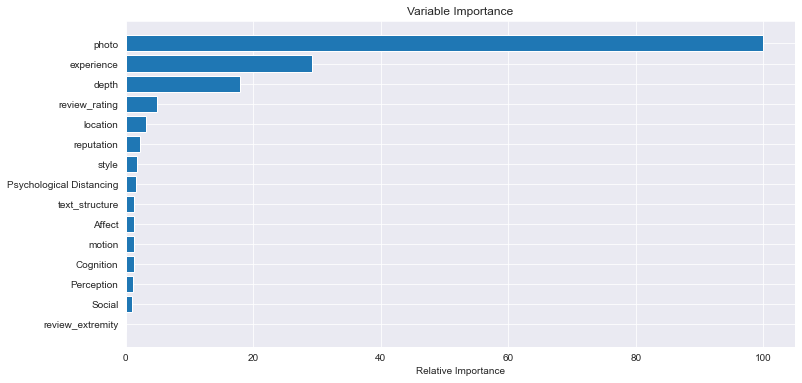

In [10]:
pred_xgb = xg_clssifier.predict(X_test)
plot_feature_importance(xg_clssifier, X_train)

In [11]:
get_clf_eval(y_test, pred_xgb)

[0.9197152003532398,
 0.6632855022266205,
 0.311998138019318,
 0.42437673130193904,
 0.9834018317743332,
 0.6476999848968256]

In [12]:
svm_clasiifier = SVC(max_iter=100)

svm_clasiifier.fit(X_train, y_train)
pred_svm = svm_clasiifier.predict(X_test)
get_clf_eval(y_test, pred_svm)

[0.25824042388784635,
 0.1096724346934154,
 0.9581054346561154,
 0.19681575864789272,
 0.18489700842713758,
 0.5715012215416265]

In [ ]:
svm_clasiifier = SVC(kernel='linear')

svm_clasiifier.fit(X_train, y_train)
pred_svm2 = svm_clasiifier.predict(X_test)

In [13]:
rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train, y_train)

pred_rf = rf_classifier.predict(X_test)
get_clf_eval(y_test, pred_rf)

[0.918578209515399,
 0.659418391406864,
 0.2929128360293262,
 0.40564061240934735,
 0.9841457614302962,
 0.6385292987298112]

In [14]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)
get_clf_eval(y_test, pred_lr)

[0.9074401148029584,
 0.6947565543071161,
 0.04317467706272547,
 0.08129724991782622,
 0.9980121223947218,
 0.5205933997287236]

In [ ]:
##리뷰 피처

In [ ]:
review_related = pd.read_csv('review_related.csv', encoding='utf-8-sig')


In [ ]:
review_related.to_csv('review_related.csv', encoding='utf-8-sig')

In [15]:
X = df[['review_rating',
       'depth', 'style', 'review_extremity', 'photo',
       'text_structure']]

y = df[['fake']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 215, stratify=y)

In [17]:
X_train.reset_index(inplace = True, drop=True)
X_test.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)

In [18]:
xg_clssifier = xgb.XGBClassifier(n_estimators=100)
xg_clssifier.fit(X_train, y_train)
pred_xgb = xg_clssifier.predict(X_test)
get_clf_eval(y_test, pred_xgb)

[0.915178275747875,
 0.7786633966891477,
 0.14779471662981497,
 0.24843505477308295,
 0.9955973999048746,
 0.5716960582673448]

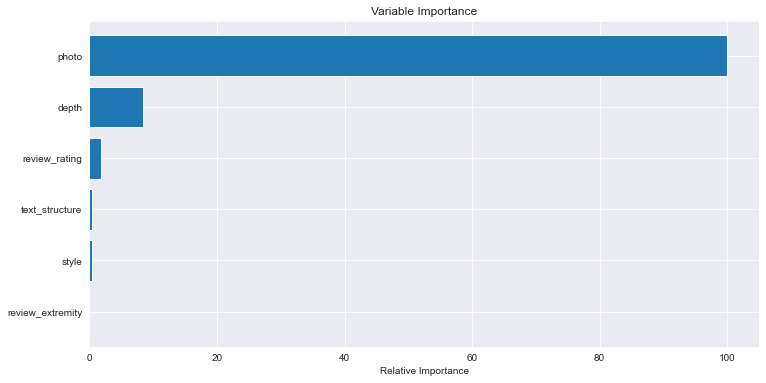

In [19]:
plot_feature_importance(xg_clssifier, X_train)

In [20]:
svm_clasiifier = SVC(max_iter=100)

svm_clasiifier.fit(X_train, y_train)
pred_svm = svm_clasiifier.predict(X_test)
get_clf_eval(y_test, pred_svm)

[0.3189976818633403,
 0.11745889947120441,
 0.9486791574537414,
 0.20903636083901736,
 0.2530092564362111,
 0.6008442069449762]

In [21]:
rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train, y_train)

pred_rf = rf_classifier.predict(X_test)
get_clf_eval(y_test, pred_rf)

[0.9099569488906061,
 0.5961199294532628,
 0.1573373676248109,
 0.24896418377681614,
 0.9888288595924241,
 0.5730831136086175]

In [22]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)
get_clf_eval(y_test, pred_lr)

[0.9051440556352799, 0.0, 0.0, 0.0, 1.0, 0.5]

In [27]:
#reviewer_related = pd.read_csv('reviewer_related.csv', encoding = 'utf-8-sig')
X = df[['reputation', 'experience', 'location']]

y = df[['fake']]

In [24]:
reviewer_related

NameError: name 'reviewer_related' is not defined

In [ ]:
reviewer_related[reviewer_related.isna( ).any(axis=1)]

In [ ]:
reviewer_related.columns

In [25]:
X = test[['reputation', 'experience', 'location']]

y = test[['fake']]

NameError: name 'test' is not defined

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 215, stratify=y)

In [29]:
xg_clssifier = xgb.XGBClassifier(n_estimators=100)
xg_clssifier.fit(X_train, y_train)
pred_xgb = xg_clssifier.predict(X_test)
get_clf_eval(y_test, pred_xgb)
#plot_feature_importance(xg_clssifier, X_train)

[0.9053096368252567,
 0.8260869565217391,
 0.0022111020598161294,
 0.0044103992571959145,
 0.9999512177274779,
 0.501081159893647]

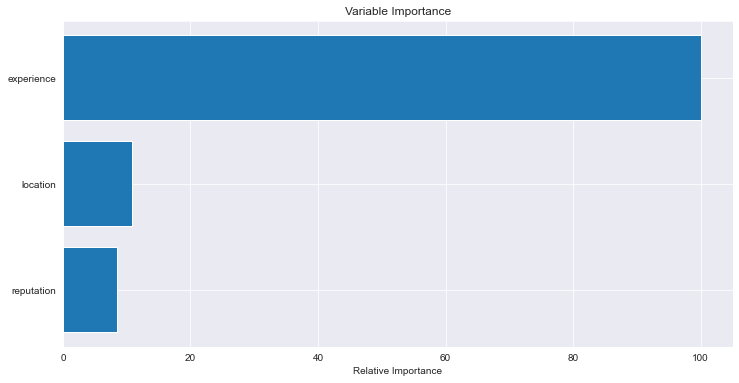

In [30]:
plot_feature_importance(xg_clssifier, X_train)

In [31]:
svm_clasiifier = SVC(max_iter=100)

svm_clasiifier.fit(X_train, y_train)
pred_svm = svm_clasiifier.predict(X_test)
get_clf_eval(y_test, pred_svm)

[0.1886742466055856,
 0.10380779138333068,
 0.9895263586640288,
 0.18790329709184125,
 0.10474773467321975,
 0.5471370466686243]

In [32]:
rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train, y_train)

pred_rf = rf_classifier.predict(X_test)
get_clf_eval(y_test, pred_rf)

[0.9022298266916878,
 0.3125,
 0.025602234376818342,
 0.04732709476175111,
 0.994097345024818,
 0.5098497897008181]

In [33]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)
get_clf_eval(y_test, pred_lr)

[0.9051440556352799, 0.0, 0.0, 0.0, 1.0, 0.5]

In [ ]:
linguistic_attributes = pd.read_csv('linguistic_attributes.csv', encoding = 'utf-8-sig')

In [ ]:
linguistic_attributes.columns

In [34]:
X = df[['Affect', 'Cognition',
       'Social', 'Perception', 'motion', 'Psychological Distancing']]

y = df[['fake']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 215, stratify=y)


In [36]:
xg_clssifier = xgb.XGBClassifier(n_estimators=100)
xg_clssifier.fit(X_train, y_train)
pred_xgb = xg_clssifier.predict(X_test)
get_clf_eval(y_test, pred_xgb)

[0.9114913345843912,
 0.7213240954580447,
 0.10904224368672175,
 0.18944601698342095,
 0.995585204336744,
 0.5523137240117328]

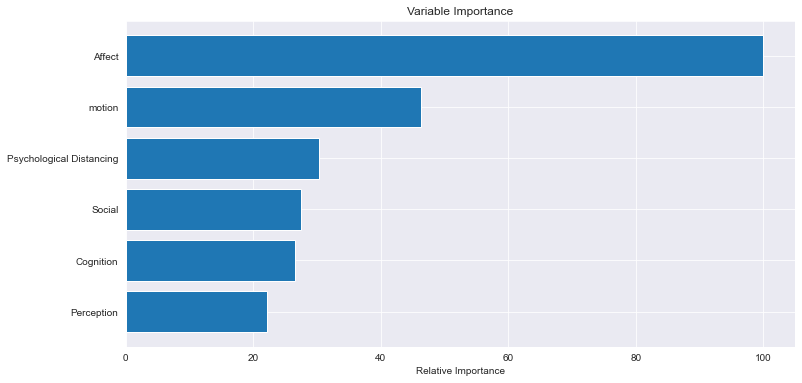

In [37]:
plot_feature_importance(xg_clssifier, X_train)

In [38]:
svm_clasiifier = SVC(max_iter=100)

svm_clasiifier.fit(X_train, y_train)
pred_svm = svm_clasiifier.predict(X_test)
get_clf_eval(y_test, pred_svm)

[0.7066674025830666,
 0.06791310198981063,
 0.1644361689747469,
 0.09612571856185584,
 0.7634913472444114,
 0.4639637581095791]

In [39]:
rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train, y_train)

pred_rf = rf_classifier.predict(X_test)
get_clf_eval(y_test, pred_rf)

[0.9018545093277404,
 0.45528211284513803,
 0.17653904340742466,
 0.2544234800838575,
 0.9778650438430674,
 0.5772020436252461]

In [40]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)
get_clf_eval(y_test, pred_lr)

[0.9069323324870294,
 0.6646341463414634,
 0.03805423018736181,
 0.07198679141441938,
 0.9979877312584606,
 0.5180209807229113]

In [ ]:
#decision tree
# 최종 예측 - StratifiedKFold를 사용하여 모델 학습 후 predict 메서드로 test데이터 예측

dt_clf = DecisionTreeClassifier(max_depth=6, random_state=num_seed)
skf = StratifiedKFold(n_splits=num_cv, shuffle=True, random_state=num_seed)


score_dt = []
for train_index, valid_index in skf.split(X_features, y_label):
    X_train = X_features.iloc[train_index]
    X_valid = X_features.iloc[valid_index]
    y_train = y_label.iloc[train_index]
    y_valid = y_label.iloc[valid_index]

    dt_clf.fit(X_train, y_train)

    pred = dt_clf.predict(X_valid)

    score_dt.append(get_clf_eval(y_valid, pred))


In [ ]:
print(get_mean(score_dt))

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)
[accuracy_score(y_test, pred_lr),precision_score(y_test, pred_lr),recall_score(y_test, pred_lr),f1_score(y_test, pred_lr)]

In [ ]:
#LGBM
# 최종 예측 - StratifiedKFold를 사용하여 모델 학습 후 predict 메서드로 test데이터 예측
#decision tree tuning

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=num_seed)
lgbm = LGBMClassifier(n_estimators=10, max_depth=6,  colsample_bytree = 0.9, boosting_type='gbdt', n_jobs=-1, boost_from_average=False, random_state=num_seed)   # boost_from_average=False --> 레이블 값이 불균형한 경우 사용

score = []
for train_index, valid_index in skf.split(X_features, y_label):
    X_train = X_features.iloc[train_index]
    X_valid = X_features.iloc[valid_index]
    y_train = y_label.iloc[train_index]
    y_valid = y_label.iloc[valid_index]

    lgbm.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=1, early_stopping_rounds=10, eval_metric='auc')
    plot_feature_importance(lgbm, X_train)


In [ ]:
#xgbc
# 최종 예측 - StratifiedKFold를 사용하여 모델 학습 후 predict 메서드로 test데이터 예측

xgbc = XGBClassifier(n_estimators=500, max_depth=6, random_state=num_seed, colsample_bytree = 0.7) 
skf = StratifiedKFold(n_splits=num_cv, shuffle=True, random_state=num_seed)

score_xgbc = []

for train_index, valid_index in skf.split(X_features, y_label):
    X_train = X_features.iloc[train_index]
    X_valid = X_features.iloc[valid_index]
    y_train = y_label.iloc[train_index]
    y_valid = y_label.iloc[valid_index]

    xgbc.fit(X_train, y_train)
    pred = xgbc.predict(X_valid)
    
    plot_feature_importance(xgbc, X_train)
    score_xgbc.append(get_clf_eval(y_valid, pred))
    
    
    
print(xgbc.feature_importances_ )
print(get_mean(score_xgbc))


In [ ]:
linguistic_attributes = pd.read_csv('linguistic_attributes.csv', encoding = 'utf-8-sig')
X_features = linguistic_attributes.drop(columns=['Unnamed: 0', 'review_res_url', 'fake', 
                                 'review_rating'])

y_label = linguistic_attributes['fake']

In [ ]:
#xgbc
# 최종 예측 - StratifiedKFold를 사용하여 모델 학습 후 predict 메서드로 test데이터 예측

xgbc = XGBClassifier(n_estimators=500, max_depth=6, random_state=num_seed, colsample_bytree = 0.7) 
skf = StratifiedKFold(n_splits=num_cv, shuffle=True, random_state=num_seed)

score_xgbc = []

for train_index, valid_index in skf.split(X_features, y_label):
    X_train = X_features.iloc[train_index]
    X_valid = X_features.iloc[valid_index]
    y_train = y_label.iloc[train_index]
    y_valid = y_label.iloc[valid_index]

    xgbc.fit(X_train, y_train)
    pred = xgbc.predict(X_valid)
    
    plot_feature_importance(xgbc, X_train)
    score_xgbc.append(get_clf_eval(y_valid, pred))
    
    
    
print(xgbc.feature_importances_ )
print(get_mean(score_xgbc))

In [ ]:
reviewer_related = pd.read_csv('reviewer_related.csv', encoding = 'utf-8-sig')
X_features = reviewer_related.drop(columns=['Unnamed: 0', 'review_res_url', 'fake', 'reviewer_url',
                                 'review_rating'])

y_label = reviewer_related['fake']

In [ ]:
#xgbc
# 최종 예측 - StratifiedKFold를 사용하여 모델 학습 후 predict 메서드로 test데이터 예측

xgbc = XGBClassifier(n_estimators=500, max_depth=6, random_state=num_seed, colsample_bytree = 0.7) 
skf = StratifiedKFold(n_splits=num_cv, shuffle=True, random_state=num_seed)

score_xgbc = []

for train_index, valid_index in skf.split(X_features, y_label):
    X_train = X_features.iloc[train_index]
    X_valid = X_features.iloc[valid_index]
    y_train = y_label.iloc[train_index]
    y_valid = y_label.iloc[valid_index]

    xgbc.fit(X_train, y_train)
    pred = xgbc.predict(X_valid)
    
    plot_feature_importance(xgbc, X_train)
    score_xgbc.append(get_clf_eval(y_valid, pred))
    
    
    
print(xgbc.feature_importances_ )
print(get_mean(score_xgbc))

In [ ]:
review_related = pd.read_csv('review_related.csv', encoding='utf-8-sig')
X_features = review_related.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'review_res_url', 'fake', 'reviewer_url'])

y_label = review_related['fake']

In [ ]:
#xgbc
# 최종 예측 - StratifiedKFold를 사용하여 모델 학습 후 predict 메서드로 test데이터 예측

xgbc = XGBClassifier(n_estimators=500, max_depth=6, random_state=num_seed, colsample_bytree = 0.7) 
skf = StratifiedKFold(n_splits=num_cv, shuffle=True, random_state=num_seed)

score_xgbc = []

for train_index, valid_index in skf.split(X_features, y_label):
    X_train = X_features.iloc[train_index]
    X_valid = X_features.iloc[valid_index]
    y_train = y_label.iloc[train_index]
    y_valid = y_label.iloc[valid_index]

    xgbc.fit(X_train, y_train)
    pred = xgbc.predict(X_valid)
    
    plot_feature_importance(xgbc, X_train)
    score_xgbc.append(get_clf_eval(y_valid, pred))
    
    
    
print(xgbc.feature_importances_ )
print(get_mean(score_xgbc))

In [ ]:
review_feature = review_feature.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis  = 1)

In [ ]:
review_feature.describe()